In [1]:
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os
#Load pandas library
import pandas as pd 
import seaborn as sns
df = pd.read_csv("L:\\محاضرات\\Master\\Ankara University\\Semester 1 Courses\\Veri Görselleştirme\\final project\\911.csv")




In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [3]:
#Here we can notice some things of interest. First of all this dataframe has 9 columns and 663522 rows. 
#Also, we have only 2 columns where there are null values: zip & twp. 
#Finally another interesting thing is that the timeStamp column is an object so we would have to convert it to a dataframe
#in order to work with it.



In [4]:
df.head(5)  

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:

# Column e unique values
df['e'].value_counts()


1    663522
Name: e, dtype: int64

In [6]:
#drop the e column since we are not gonna make any use of it. 
df.drop('e',axis=1,inplace=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [7]:
#df['zip'].value_counts().head()


In [8]:
df['twp'].value_counts().head(10)


LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

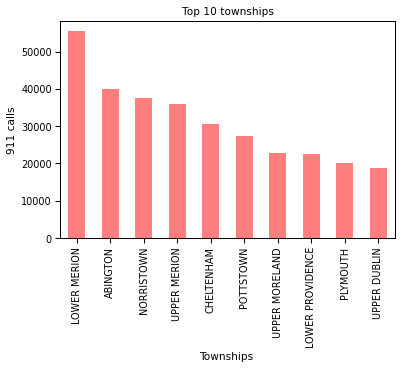

In [9]:
#let's now investigate about the town in which the calls received. 
#First we do a barplot about the top townships per emergency calls.


sns.set_context('paper',font_scale=1.1)
df['twp'].value_counts().head(10).plot.bar(color='red',alpha=0.5)
plt.xlabel('Townships')
plt.ylabel('911 calls')
plt.title('Top 10 townships')
plt.xticks(rotation=90)

In [56]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day,Year,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015,2015-12-10


In [10]:
#Now let's focus in the title column. How many emergency topics are?
df['title'].apply(lambda title: title.split(':')[0]).unique()


array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [11]:
#finding the types of titles of the 911 call

df['Reason']=df['title'].apply(lambda title:title.split(':')[0])
df['Reason'].value_counts()


EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

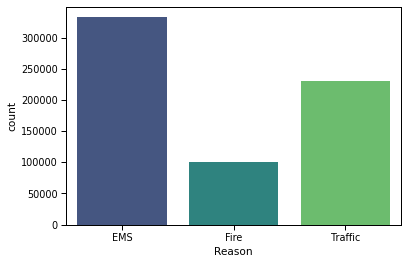

In [12]:
sns.countplot(x='Reason',data=df,palette='viridis')


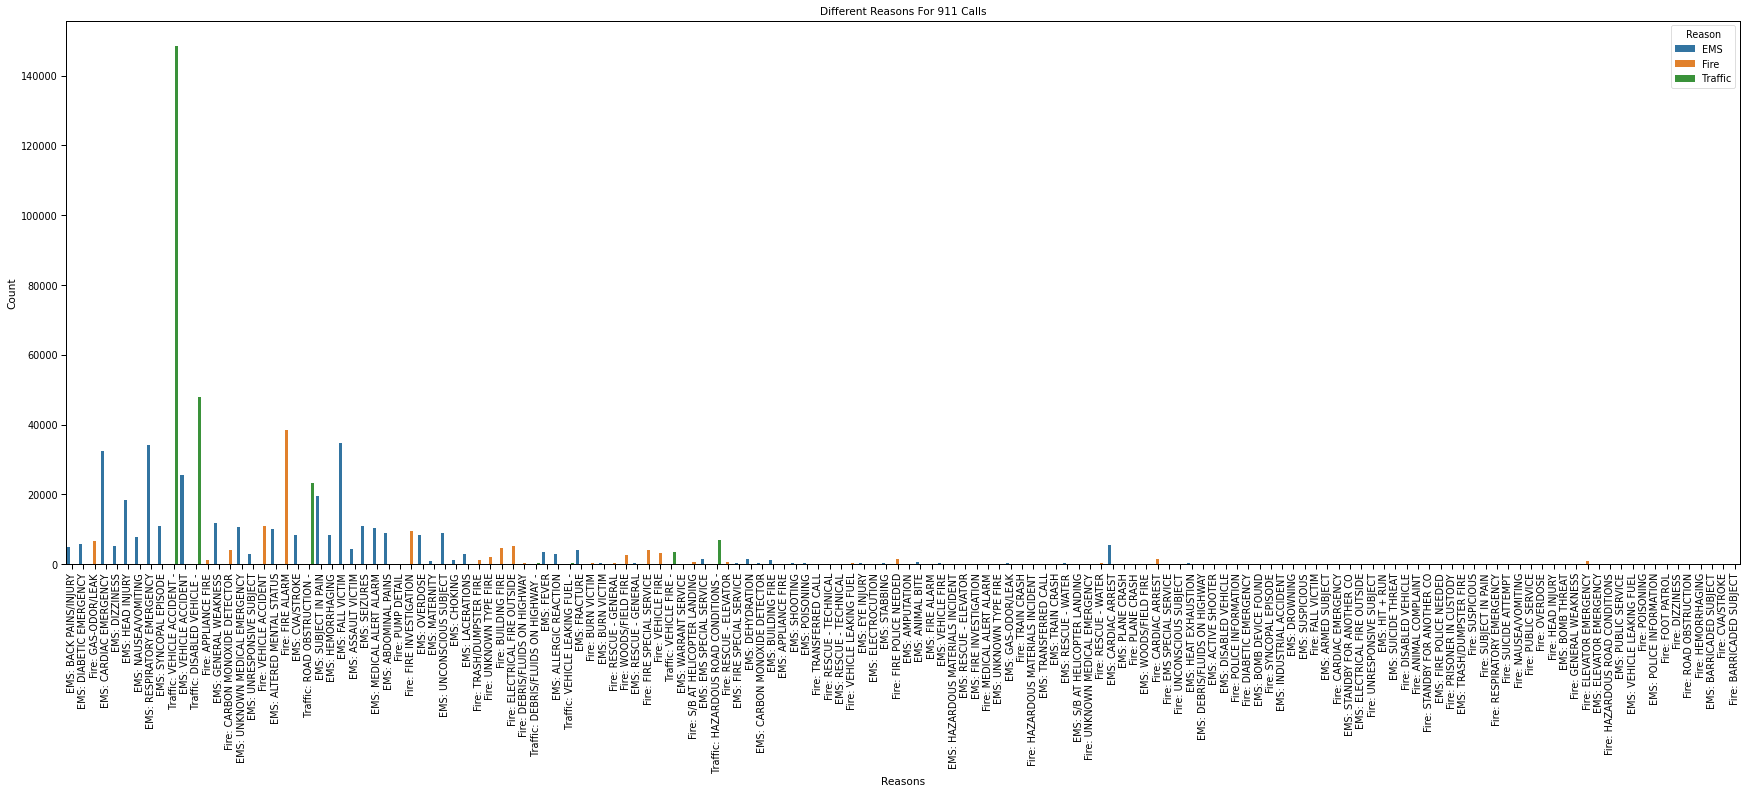

In [13]:
#different reasons for 911 calls
import matplotlib.pyplot as plt
import seaborn as sb

plt.subplots(figsize=(30, 10))

ax = sb.countplot(df['title'], hue=df['Reason'], data=df)
ax.set(xlabel='Reasons', ylabel='Count')
plt.title('Different Reasons For 911 Calls')

plt.xticks(rotation=90)

plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABtMAAAMaCAYAAAD0vbl7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzde7hfZXkn/O+dg0CxCeHgYEABC8ghmI1YhYlWRVGhwUNF4gEZnRalFWRUrOC86HZ8BS2+vVq0KgOdWgGVMY5ytGrVVIlggTFyNFdAEEmwlkAM4wBCeN4/9krcxL2SHczeO4fP57p+117rXms9614r/PfleVa11gIAAAAAAAD8tkkT3QAAAAAAAABsqoRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAABs1qqqVdWiqrqpqhZX1aer6inDjl9ZVTO77T+pqlur6odV9ftVdVa3f/E49PmiqnrROo7fWVW3VNWPumd59Vj3tLFU1Vuq6r7u32FRVS36Hcfbrar+qXsX11fVYcOOva37N3ts7ffZ/dsvraq2nvEnVdV/7f57ubn7nTGKvtpI2wAAwJZNmAYAAGz2WmsDrbVZSQaS/DrJt6tqSnfsqNbasu7UE5K8q7V2cGvtgST/JcnBrbV5o71XVU19gm2+qPuty1GttdlJ3pXkgtXPsJm4tPt3GGitDYz2ohoyea3yXyf5Wvcu/iTJp6uqumM/SPLKJN8dYbgvJHn2KG77gQz9WxzaWjuwu2b5aHsGAAC2LsI0AABgi9FaezDJe5I8OckrkjUzvvasqo8meUGST1bVxVX1z0m2TXJNVb23C3UGq+pfu9lV564Os7oxzqiqf0lyWlU9raourapru1lur+nOe1FVXV1V/1hVN1bV96pq56p6ZpITk5zYjX38eh7lqu4ZduzGfUE31vVV9d2qOqCrv6yqrul6uLaqntPVf6+qvlJVN3R9fKyrT++e/cbu2KtW37Cb4Xdad49bq+p5XX2/7pl+2M3geu1o/z2q6sCu7xu6v/uv9Z7OT3JdkmeudemsJN/o/k1/muSxJM/p9n/UWlsy0v1aa99trf3benraNsn7kpzYWru/u+7h1tqn1vVO1zHeiO8aAADYcmxO/5cjAADAerXWHq2qHyU5MMnlw+qnVdWhSQZbawuSoQBp9SyqqnpLhgKs57XWWlV9JsmfJjm3G+L3Wmsv7M795ySnttYWVdWMJNdV1YLuvIEkb22t/biqPp3kba21M7vx0lobHMVjvDLJ91prv6iqHZN8PMkrWmv3d0se/n2Sw5Jcm+Q/ttYe60KfTyf5wwwFife11laHfDO6cQeT/KK1Nq+q9sxQkHjNsADqntbaIVU1L8mHk7wsyV8k+VRr7YJudti0vp7rN8s7frO19t4kFyb5f1trX+5CuAuTHNKdc0iSE1prN40w1vVJ3pDkA1X1rCT7J3la97y/q32SPNxau73neN877dP3rgEAgC2EMA0AANhSbeg3rf44ycFJXtqtKLhdkgeGHb8wSapq+wzNcPvsb1YezNQkf9Bt/6i19uNu+7oMhV6jdWVVbZPk6RkKstJdv0+S7wy7347d312TXFhVeyR5NMl+q3tI8vGq+niSb6eb5ZWhpQ3fmiSttTur6pokz0tyaXd89bfjrkvykW77qiSD3T2+3lrrC7Quba29ZfVOVU1Lsmdr7cvd/b5cVed39WToPY0UpCVDswv/tqp+mOTWJN/vnm9jWdd/G33vtE/fuwYAALYQlnkEAAC2KN3SjLOT3LKhlyY5bdh3v57Zza5a7Vfd30kZ+i7bwcPOfXpr7bru+EPDrlmVDfufGI9qrf1BklOTfK5bkrCSfH/498haa0/vzv+7JP+z+17cC5JskyTdrKuDM/R9sf+U5Iph91g7SFqz31pb3fuavltr/zNDs6/+LUNLZJ4+ymepEe41/H6/GuHY6j7+vbX2xu7bdm9M8h+SLB7lfddnSZJtq+oPeo6P+E7X0eu63jUAALAFEKYBAABbjKraLsn/l6EZZf+0gZdfnuQd3cyzVNWOVbXX2ie11h7I0DKEfz7svs+uYdPGeqxM/xKJa9/jb5P8NMkJSa5OcnBVPbu716SqOrg7dYckd3Xbbx/Wz+5JHmmtfSnJu5I8tzv0nXQz06rq6Rmalfav6+qlqvZO8rPW2nlJ/nbYWOt7hl8mubOqXt2N85okt3fvb52678xN7rbflGRZa22jhGldYHh2ks+sXpKxqp5UVe/uThnxna6j1753DQAAbCGEaQAAwGavqhZV1U1JFmVoycXDW2sbtCxga+2zSb6Zoe+I3dBt795z+puSHFFVN1TVzRlaEnF9YdpXkxxeVT+squNH0dJpSd6boWDwdUk+0X0L7uYkr+3O+X+SnF9VVyV50rBrD0pydfcNs68lOamrfyjJU6vqxiSXJTlx2PfS+hyb5KZuycV3Jvlvo+h9tTcnObV7n+/u9kfj+Ul+XFU/TjIvyZr3VVVvr6q7M7T85ZeqavGwY5/tjqWq7q6qz/aM/6Ek30vyg+6/m+sztKxn0v9O+/S9awAAYAtRrW3oZwQAAAAAAABg62BmGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9Jgy0Q1sKqqqTXQPAAAAAAAATIzWWo1UF6YN05o8DQAAAAAAYGtTNWKOlsQyjwAAAAAAANBLmAYAAAAAAAA9LPMIAAAAAACwFXnssceybNmyPPLIIxPdyribOnVqZs6cmUmTRj/frHwnbEhVNe8CAAAAAADY0t19992ZNm1apk2bNtGtjLuVK1dm5cqV2X333R9Xr6q01kb8cJplHgEAAAAAALYijzzyyFYZpCXJtGnTNnhGnjANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAgFGbOnVqBgYGcsABB+SNb3zjBi+buLkRpgEAAAAAADBqO+20UxYtWpSbbropv/jFL3LxxRdPdEtjSpgGAAAAAADABps0aVKe85znZOnSpUmSxYsX56UvfWkOOeSQHHXUUVm+fHmS5IMf/GD+8A//MLNmzcqpp56aJFm1alXe/OY358ADD8xBBx2Uz3/+80mSK6+8MrNnz86sWbMyODiYJLnzzjvz7Gc/O8cdd1z222+//Pmf//n4Pue43g0AAAAAAIAtwkMPPZSrr746L3/5y5MkJ510Uv7hH/4h119/fV7/+tfnrLPOSpKccsopufbaa3PDDTfktttuyw9+8IMsWrQod911V26++ebceOON+eM//uM8+OCDecc73pErrrgiP/zhD/PNb34zCxcuTJLccsstGRwczM0335yrr746S5YsGbfnFKYBAAAAAAAwasuXL8/AwEB22WWXzJgxIwMDA3nggQfy/e9/P0cffXQGBgZy9tln52c/+1mS5Fvf+lae+9znZmBgINdcc01uueWWPOMZz8hdd92VU045Jd/+9rczffr0LF68OPvvv3923333TJ06NfPmzctVV12VJNl///2z9957Z/LkyXnWs56Vn/70p+P2vFPG7U4AAAAAAABs9lZ/M+3ee+/NC1/4wnz1q1/N4Ycfnt122y2LFi163LkPPfRQ3v3ud+faa6/Nrrvumve85z15+OGHM2PGjNxwww258sorc+aZZ+a73/1uXvWqV6Wq1lzbWluzvc0226zZnjRpUh599NGxf9DV9xu3OwEAAAAAALDF2HnnnfPRj340Z599dqZNm5YZM2bkG9/4RpLk4YcfzuLFi/PQQw9l0qRJ2WmnnbJixYpccsklSZJ77703rbXMmzcv73//+7No0aLst99+ueWWW7Js2bI8+uijmT9/fubMmTORj5hEmAYAAAAAAMATNHfu3PzqV7/KD37wg1x44YX52Mc+ltmzZ+eQQw7JokWLssMOO+S4447LgQcemGOPPTaHHnpokuTuu+/OC1/4wgwMDOQv//Ivc9ppp2W77bbL3/3d3+XII4/MwMBAXvKSl+T5z3/+BD9hUsOnyG3Nqqp5FwAAAAAAwJbujjvuyF577TXRbUyYkZ6/qtJaq5HONzMNAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACgx5SJbgAAAAAAAICJc8h7P7dRx7v+7OPXeXzKlCmZNWvWmv3TTz898+bNy5577pnZs2fnkksuSZKsXLkyT3nKU3LSSSfl4x//eG699da8/e1vz8qVK/PQQw9l3rx5+dCHPrRRex+x3zG/A4yROZ+Ys2Z74ckLJ7ATAAAAAABgtHbYYYcsWrRoxGPLli3LypUrM23atFx66aXZd9991xw75ZRTcsYZZ+SII47IqlWrsnjx4nHp1zKPAAAAAAAAbBLmzp2byy67LEnypS99Ka997WvXHPv5z3+emTNnJkkmT56cAw44YFx6EqYBAAAAAAAwblasWJGBgYE1v+9///trjh1zzDH58pe/nJUrV+b+++/PHnvssebYO9/5zjz/+c/Pa17zmnzqU5/Kgw8+OC79WuYRAAAAAACAcbOuZR732GOPLF++PBdddFFe+cpXPu7Yn/3Zn+XlL395rrzyylx00UX5whe+kO9973tj3q+ZaQAAAAAAAGwy5s6dm/e///055phjfuvY0572tLz97W/Pt771rdx000259957x7wfM9MAAAAAAADYZBx33HGZPn169txzz8fVv/GNb+Twww/PlClT8pOf/CSTJ0/OjBkzxrwfYRoAAAAAAMBW7Pqzjx/X+63+ZtpqJ554Yk488cQ1+0996lPztre97beu+9rXvpaTTz452267bSZPnpzPfe5zmTx58pj3W621Mb/J5qCqmnexeZnziTlrtheevHACOwEAAAAAgM3HHXfckb322mui25gwIz1/VaW1ViOd75tpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPaZMdAMAAAAAAABMnLv+20Ebdbynf+DGdR6fMmVKZs2atWb/3HPPzfz583P22Wdv1D42FmEaAAAAAAAA42aHHXbIokWLHld73vOe91vnrVq1KpMnTx6vtnpZ5hEAAAAAAIAJs2DBghxzzDFJksHBwbz5zW/OS17ykpx66qlZsmRJjjjiiBxyyCF52ctelnvuuWfc+zMzDQAAAAAAgHGzYsWKDAwMJEnmzJmT173udY87/pOf/CQLFizI1KlTc8QRR+T888/PHnvskYsvvjgf+tCH8pnPfGZc+xWmAQAAAAAAMG7WXuZxwYIFjzv+yle+MlOnTs0DDzyQhQsX5lWvelWSoWUf99xzz3HsdIgwDQAAAAAAgE3G9ttvnyRprWXXXXf9re+rjTffTAMAAAAAAGCTM23atOyyyy658sorkySPPPJIbr311nHvw8w0AAAAAACArdjTP3DjRLfQ66KLLsqJJ56Y008/PY8++mje+973Zv/99x/XHqq1Nq433FRVVfMuNi9zPjFnzfbCkxdOYCcAAAAAALD5uOOOO7LXXntNdBsTZqTnr6q01mqk8y3zCAAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9xixMq6r5VXV/Vc1fqz6pqv51eL2q9qmq66rqtqo6t6qqq+9SVQuqaklVfaWqtuvq23X7S7rjuwwb+9xunOuqau+xej4AAAAAAAC2fGM5M+2TSY4fof6nSe5Yq/axJIOttb2T7JTk6K5+epL5rbV9ktye5ISufkKS27v6/O68JJmbZKdunMEkf7VxHgUAAAAAAICt0ZiFaa21BUkeGF6rqh2TvD7Jfx9WqySHJbmiK12YoVAs3d8LnmD9iiSHrZ7lBgAAAAAAwMQaGBjIwMBAdt111+y+++4ZGBjIi1/84lFde+utt2b27Nk5+OCDs2LFihx77LGZPXt2Pve5z+Woo47Kgw8+OCY9TxmTUft9JMmH16rtlGR5a611+0uTzOy2p7fWfjlCfWa3n9baiqqaPkK9VdV93fj3buwHAQAAAAAA2BLM+cScjTrewpMX9h5btGhRkmRwcDA777xzTjrppMcdX7VqVSZPnjzitZdcckmOP/74vOc978nPf/7z3HrrrbnxxhuTJMcfP9JiiRvHuIVpVXVwkhmttQVV9aLhh0Y4va31d+1632yzdY01vJfBJB/sbRYAAAAAAIBx8Za3vCXbbLNNFi9enKOOOir77rtvzjzzzPz617/OXnvtlQsvvDBXX311/uZv/iZTpkzJVVddlZ/97Ge5/fbbMzAwkAsuuCBHH310brrppjz5yU/Oeeedl3POOSeTJk3K3Llz85GPfOR36m88Z6YdmuQFVXVnkm2T/H5VfSrJO5LsWFXVzU6bmeSe7pqVVbV6dtrw+tIkuyW5t5uVtmKt+nXd8o4zkty3diOttcEMfVNtjar6rdANAAAAAACAsXf//ffnO9/5Tqoq999/f1796lcnSc4888z8/d//fd75znfmxBNPXDOb7c4778wxxxyT66677nHj3HDDDTnnnHNy1VVXZfr06bnvvt+KiTbYmH0zbW2ttU+31nZrre2Zoe+mfa219hddgHZNkiO7U9+U5LJu+/Juf331y0eoH5nk6mHLRwIAAAAAALAJeu1rX5uheVLJXXfdlZe+9KU56KCDcv755+fmm28e9TgLFizIvHnzMn360BfCdtxxx9+5tzEL06rq60m+lOSoqrq7W+axz/uSfLiqbsvQLLMruvpZSY6tqiVJ9k1yflc/L8m+Xf3YJB/t6pcnWdGN8+Ekp23MZwIAAAAAAGDj23777ddsn3zyyTnttNNy44035swzz8zDDz88gZ2N4TKPrbWXr+PYgiQLhu0vSXLICOf9e5IXjVB/MMmrR6g/luRtT6RfAAAAAAAAJt4DDzyQpz71qXnsscfy+c9/foNmlx1++OF5wxvekJNPPnnNMo+/6+y0cVvmEQAAAAAAANbnjDPOyNFHH50Xv/jF2XPPPTfo2lmzZuWUU07JnDlzMnv27Pz1X//179xP+aTYkKryebXNzJxPzFmzvfDkhRPYCQAAAAAAbD7uuOOO7LXXXhPdxoQZ6fmrKq21Gul8M9MAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAALYiU6dOzcqVKye6jQmxcuXKTJ06dYOumTJGvQAAAAAAALAJmjlzZpYtW5bly5dPdCvjburUqZk5c+YGXSNMAwAAAAAA2IpMmjQpu++++0S3sdmwzCMAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQA9hGgAAAAAAAPQQpgEAAAAAAEAPYRoAAAAAAAD0EKYBAAAAAABAD2EaAAAAAAAA9BCmAQAAAAAAQI8xC9Oqan5V3V9V87v936uqr1XVj6vqpqr6i2Hn7lNV11XVbVV1blVVV9+lqhZU1ZKq+kpVbdfVt+v2l3THd+nqk7rrb+vG23usng8AAAAAAIAt31jOTPtkkuPXqn20tbZfkkOTvLOq/qCrfyzJYGtt7yQ7JTm6q5+eZH5rbZ8ktyc5oaufkOT2rj6/Oy9J5ibZqRtnMMlfbfSnAgAAAAAAYKsxZmFaa21BkgeG7f/f1tq/dNv/J8niJDO7WWiHJbmiO/XCDIVi6f5e8ATrVyQ5bPUsNwAAAAAAANhQE/LNtKraPcnsJP87QzPRlrfWWnd4aZKZ3fb01tovR6jP7PbTWluRZPoI9Zbkvm78te8/WFVt+G9jPh8AAAAAAABbhnEP06pq2yQXJ3l3a+1XSUaaOdbW+rt2vW+22brG+k2htcHWWg3/jaJ1AAAAAAAAtjLjGqZ1Sy7+Y5LLW2v/qyvfm2THYcsxzkxyT7e9sqqmj1BfmmS3bszpSVaMUK8kMzI0Ow0AAAAAAAA22HjPTDsrya9aa2etLnTLMV6T5Miu9KYkl3Xbl3f766tfPkL9yCRXD1s+EgAAAAAAADbImIVpVfX1JF9KclRV3V1VL0jyviTPq6pF3e+l3envS/LhqrotQ7PMrujqZyU5tqqWJNk3yfld/bwk+3b1Y5N8tKtfnmRFN86Hk5w2Vs8HAAAAAADAlm/KWA3cWnv5COURv03WWluS5JAR6v+e5EUj1B9M8uoR6o8leduG9goAAAAAAAAjGe9lHgEAAAAAAGCzIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoIUwDAAAAAACAHsI0AAAAAAAA6CFMAwAAAAAAgB7CNAAAAAAAAOghTAMAAAAAAIAewjQAAAAAAADoMWZhWlXNr6r7q2r+sNqhVXVzVd1WVYPD6vtU1XVd/dyqqq6+S1UtqKolVfWVqtquq2/X7S/pju/S1Sd119/Wjbf3WD0fAAAAAAAAW76xnJn2ySTHj1B7Q5JnJnlFVT2rq38syWBrbe8kOyU5uqufnmR+a22fJLcnOaGrn5Dk9q4+vzsvSeYm2akbZzDJX23shwIAAAAAAGDrMWZhWmttQZIHVu9X1cwkk1trN7TWViX5YpK53Sy0w5Jc0Z16YYZCsXR/L3iC9SuSHLZ6lhsAAAAAAABsqPH8ZtrMJEuH7S/tajslWd5aa2vVk2R6a+2XI9TXjNVaW5Fk+gj1luS+bvzHqarBqmrDfxvh+QAAAAAAANjCjGeYNtIMsbaO+vC/a9f7Zputa6zfFFobbK3V8F/PeAAAAAAAAGzFxjNMW5pkt2H7M5Pck+TeJDsOW45xdT1JVlbV9BHqa8bqjq8YoV5JZmRodhoAAAAAAABssHEL01pry5KsqqqDqmpyknlJLuuWY7wmyZHdqW9Kclm3fXm3v7765SPUj0xy9bDlIwEAAAAAAGCDTBmrgavq60menWT7qro7ydFJTkryxSTbJLmwtXZjd/r7knyxqs5J8u0kV3T1s5J8qareleTmJB/s6ucl+UJVLcnQbLTXdfXLk8ytqtuS/DLJ68fq+QAAAAAAANjylYlbQ6rKJLbNzJxPzFmzvfDkhRPYCQAAAAAAsDmrqrTWaqRj4/nNNAAAAAAAANisCNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoIcwDQAAAAAAAHoI0wAAAAAAAKCHMA0AAAAAAAB6CNMAAAAAAACghzANAAAAAAAAegjTAAAAAAAAoMeowrSqOnw0NQAAAAAAANiSjHZm2sdHWQMAAAAAAIAtxpR1HayqZyU5OMmOVXX8sEPTk2wzlo0BAAAAAADARFvfzLS9krwoye8nefGw395J3vpEb1pV79G5fJIAACAASURBVKqqm6vqlqo6p4Yc2tVuq6rBYefuU1XXdfVzq6q6+i5VtaCqllTVV6pqu66+Xbe/pDu+yxPtEwAAAAAAgK3bOsO01tolrbW3Jnlta+2tw36ntNb+9YncsKp2TnJSkkOSHNT9PTTJJ5O8Ickzk7yimxWXJB9LMtha2zvJTkmO7uqnJ5nfWtsnye1JTujqJyS5vavP784DAAAAAACADTbab6YtrKrXV9X7q+oDq3+/wz2nJNk2ydRhv8mttRtaa6uSfDHJ3G4W2mFJruiuvTDJ3G57bpILNqAOAAAAAAAAG2S0Ydr8JG/OUABWw34brLX2iyRnJ/lpknuS/FOS/5tk6bDTliaZmaGZaMtba22tepJMb639coT6zNVjtdZWZOj7bo9TVYNV1Yb/nsizAAAAAAAAsGWbMsrz9mmtHbAxblhVO2ZoqcY9kqxK8u0k3xzh1JaRA7u21t+16+sN+Vprg0kG1+pLoAYAAAAAAMDjjHZm2uKq2mkj3fMlSZa01la01h7IUJj2R0l2G3bOzAzNWrs3yY7dco/D60mysqqmj1Bfunqs7viKjdQ3AAAAAAAAW5nRhmmTk9xYVZ+vqv+x+vcE73l3kkOr6klV9aQkL0jyL0lWVdVBVTU5ybwkl3XLO16T5Mju2jcluazbvrzbX1/98ifYJwAAAAAAAFu50S7z+OXu9ztrrV1dVf+c5EcZWprxq621q6rqpCRfTLJNkgtbazd2l7wvyRer6pwMzWK7oqufleRLVfWuJDcn+WBXPy/JF6pqSYZmqb1uY/QNAAAAAADA1qeGJn9RVc272LzM+cScNdsLT144gZ0AAAAAAACbs6pKa61GOjaqmWlV9Q8ZmkX2OK21//w79gYAAAAAAACbrNEu87hg2PY2SV6T5LaN3g0AAAAAAABsQkYVprXW/nH4flX9j/zm22UAAAAAAACwRZr0BK97UpJnbMxGAAAAAAAAYFMz2m+mfSe/+WbapCTPTPKZsWoKAAAAAAAANgWj/Wba4LDtR5Pc0VpbtvHbAQAAAAAAgE3HaL+Z9i9VNTVDM9Jakn8f064AAAAAAABgEzDaZR7/Y5IvJrk3SSWZUVWvb61dM5bNAQAAAAAAwEQa7TKPf5PkT1pr1yVJVR2S5NNJnjtWjQEAAAAAAMBEmzTK87ZZHaQlSWvt+iTbjE1LAAAAAAAAsGkYbZi2rKr+S1VNq6rfr6pTkiwby8YAAAAAAABgoo02TPuzJH+U5M4kdyR5QZI/HaOeAAAAAAAAYJOwzjCtqk6oqv/cWlvaWvuT1tqOrbWdk3wnySvGp0UAAAAAAACYGOubmfYXSS4eof7ZJO/Y6N0AAAAAAADAJmR9Ydrk1tqv1i52tSlj0xIAAAAAAABsGtYXpv1eVT1p7WJVbZvkyWPTEgAAAAAAAGwa1hemXZrkvKrafnWhqp6c5NzuGAAAAAAAAGyx1hemnZ6kJVlWVf+7qq5PsrSrnT7WzQEAAAAAAMBEWud3z1prDyd5S1UNJpnVlW9qrd05xn0BAAAAAADAhFtnmLZaF57dOaadAAAAAAAAwCZmfcs8AgAAAAAAwFZLmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPYRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPYRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPYRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPYRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPYRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPYRpAAAAAAAA0EOYBgAAAAAAAD2EaQAAAAAAANBDmAYAAAAAAAA9hGkAAAAAAADQQ5gGAAAAAAAAPSYkTKuqZ1TVgqq6papuqqrtq+rQqrq5qm6rqsFh5+5TVdd19XOrqrr6Lt0YS6rqK1W1XVffrttf0h3fZSKeEQAAAAAAgM3fRM1M+8ckZ7TWDkjyR0keTvLJJG9I8swkr6iqZ3XnfizJYGtt7yQ7JTm6q5+eZH5rbZ8ktyc5oaufkOT2rj6/Ow8AAAAAAAA22LiHaVU1K8mvW2vfS5LW2n1JnpJkcmvthtbaqiRfTDK3m4V2WJIrussvTDK3256b5IINqAMAAAAAAMAGmYiZafskeaCqLq2qH1bVGUlmJlk67JylXW2nJMtba22tepJMb639coT6mrFaayuSTB+zJwEAAAAAAGCLNmWC7vlHSQ5O8m9Jvp7k1yOc15JUT33437XrI13zON032T44il4BAAAAAADYik3EzLS7k1zbWvtpa+2hJJcn2TbJbsPOmZnkniT3JtmxW+5xeD1JVlbV9BHqS1eP1R1fsXYDrbXB1loN/228xwMAAAAAAGBLMRFh2rVJnlJVM6pqUoZmqV2fZFVVHVRVk5PMS3JZt7zjNUmO/P/Zu/O436a6/+Pvz0HG7iMydMzdhqgjcedXnRJRURpl6K64U9JAEzp1J85NKY6UaJAyV0KGDBm6lVDKVIQ4pAiZKqobFZ/fH5/1vc76rmvv77XXNZzrDK/n4/F9XHvv7/rua+1p7TXttdNv3ybp3DR9Xpofafl5E7kxAAAAAAAAAAAAWHjN88Y0d/+XpP+W9BNJN0ia4+7nSdpL0qmSbpV0sbvfmH4yU9LBZna74imz89Pyz0rayczmSFpf0jfS8mMlrZ+W7yTpcxO/VQAAAAAAAAAAAFgYWTz8BTNz9sWCZcZRM4amr9z7ykmMCQAAAAAAAAAAWJCZmdpeCzYZwzwCAAAAAAAAAAAACwQa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0WHyyIwDMj2YcNWNo+sq9r5zEmAAAAAAAAAAAgMnEk2kAAAAAAAAAAABACxrTAAAAAAAAAAAAgBY0pgEAAAAAAAAAAAAtaEwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALSgMQ0AAAAAAAAAAABoQWMaAAAAAAAAAAAA0ILGNAAAAAAAAAAAAKAFjWkAAAAAAAAAAABACxrTAAAAAAAAAAAAgBY0pgEAAAAAAAAAAAAtaEwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALSgMQ0AAAAAAAAAAABoQWMaAAAAAAAAAAAA0ILGNAAAAAAAAAAAAKAFjWkAAAAAAAAAAABACxrTAAAAAAAAAAAAgBY0pgEAAAAAAAAAAAAtaEwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALSgMQ0AAAAAAAAAAABoQWMaAAAAAAAAAAAA0GLSGtPMbBkz+72ZHZ7mX2RmN5nZ7WY2Kwu3npldk5YfY2aWlq9kZj82szlmdpaZLZ2WL53m56TvV5qUDQQAAAAAAAAAAMACbzKfTPukpJ9n80dLequkDSRta2Ybp+WHSprl7utKWlHS69LyT0g6w93Xk3SHpD3S8j0k3ZGWn5HCAQAAAAAAAAAAANUmpTHNzNaT9BxJF6T5aZIWc/cb3P1JSadK2j49hfZiSeenn54iafs0vb2kkyuWAwAAAAAAAAAAAFUm68m0w9X/xNg0Sfdk8/ekZStKetjdvVguSVPd/ZGG5UPrcve/SJo67rEHAAAAAAAAAADAImGeN6aZ2Rsk3ebut+WLG4L6gOX533J502/KOMwyM88/I/0GAAAAAAAAAAAAi57FJ+F/vkjSLma2o6TlJC0h6U+SVsvCTJN0n6SHJK1gZpaeTustl6RHzaz3dFq+/J60rofMbKqkv5QRcPdZkmbly2hQAwAAAAAAAAAAQGmeP5nm7p9w9zXcfW1J+0o61t0PkfSkmU03s8Uk7Szp3NSAdpWk7dLP3ybp3DR9Xpofafl5E7k9AAAAAAAAAAAAWHhN1jvTmuwl6VRJt0q62N1vTMtnSjrYzG5XPGV2flr+WUk7mdkcSetL+kZafqyk9dPynSR9bh7FHwAAAAAAAAAAAAuZyRjmcYi7n5BNXyXpuQ1h5kjarGH5g5K2bFj+mKQ3jmc8AQAAAAAAAAAAsGia1MY0AIueuw6aPjS95gE3DggJAAAAAAAAAMDkm5+GeQQAAAAAAAAAAADmKzSmAQAAAAAAAAAAAC1oTAMAAAAAAAAAAABa0JgGAAAAAAAAAAAAtKAxDQAAAAAAAAAAAGhBYxoAAAAAAAAAAADQgsY0AAAAAAAAAAAAoAWNaQAAAAAAAAAAAEALGtMAAAAAAAAAAACAFjSmAQAAAAAAAAAAAC1oTAMAAAAAAAAAAABa0JgGAAAAAAAAAAAAtFh8siMAAAuDzfY7aWj62tm7TmJMAAAAAAAAAADjiSfTAAAAAAAAAAAAgBY8mYZxw5M5AAAAAAAAAABgYcOTaQAAAAAAAAAAAEALGtMAAAAAAAAAAACAFjSmAQAAAAAAAAAAAC1oTAMAAAAAAAAAAABa0JgGAAAAAAAAAAAAtFh8siOA4Tbb76Sh6Wtn7zqJMQEAAAAAAAAAAFi08WQaAAAAAAAAAAAA0ILGNAAAAAAAAAAAAKAFjWkAAAAAAAAAAABACxrTAAAAAAAAAAAAgBY0pgEAAAAAAAAAAAAtaEwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALSgMQ0AAAAAAAAAAABoQWMaAAAAAAAAAAAA0ILGNAAAAAAAAAAAAKAFjWkAAAAAAAAAAABACxrTAAAAAAAAAAAAgBY0pgEAAAAAAAAAAAAtaEwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALSgMQ0AAAAAAAAAAABoQWMaAAAAAAAAAAAA0ILGNAAAAAAAAAAAAKAFjWkAAAAAAAAAAABACxrTAAAAAAAAAAAAgBY0pgEAAAAAAAAAAAAtaEwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALRYfLIjAIynzfY7qW/+2tm7TlJMAAAAAAAAAADAwoAn0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgxeKTHQEAmAgzjpoxNH3l3ldOYkwAAAAAAAAAAAsynkwDAAAAAAAAAAAAWtCYBgAAAAAAAAAAALSgMQ0AAAAAAAAAAABoQWMaAAAAAAAAAAAA0ILGNAAAAAAAAAAAAKAFjWkAAAAAAAAAAABACxrTAAAAAAAAAAAAgBbzvDHNzNYwsx+b2c1mdoOZ7ZCWv8jMbjKz281sVhZ+PTO7Ji0/xswsLV8prWeOmZ1lZkun5Uun+Tnp+5Xm9TYCAAAAAAAAAABg4TAZT6b9S9KH3X0jSa+SdKSZLSPpaElvlbSBpG3NbOMU/lBJs9x9XUkrSnpdWv4JSWe4+3qS7pC0R1q+h6Q70vIzUjgAAAAAAAAAAACg2jxvTHP3+9z9l2n6j5IelrSSpMXc/QZ3f1LSqZK2T0+hvVjS+ennp0jaPk1vL+nkiuUAAAAAAAAAAABAlUl9Z5qZbSppcUVj2j3ZV/dImqZ4Eu1hd/diuSRNdfdHGpZP663L3f8iaWrD/51lZp5/xnGzAAAAAAAAAAAAsJCYtMY0M1tR0kmS3iXJGoL4gOX533J502/6A7rPcnfLPx2jDQAAAAAAAAAAgEXI4pPxT81sSUlnSTrE3a8ys2mSVsuCTJN0n6SHJK1gZpaeTustl6RHzaz3dFq+/J60rofMbKqkv0z8FgFYEGy230lD09fO3nUSYwIAAAAAAAAAWFDM8yfT0nvQTpD0Q3f/tiS5+72SnjSz6Wa2mKSdJZ2bGtCukrRd+vnbJJ2bps9L8yMtP2/itgYAAAAAAAAAAAALs8kY5nGGorHszWb2y/TZSNJekk6VdKuki939xhR+pqSDzex2xVNm56fln5W0k5nNkbS+pG+k5cdKWj8t30nS5+bFRgEAAAAAAAAAAGDhM8+HeXT3K9TeiPfchvBzJG3WsPxBSVs2LH9M0hvHFksAAAAAAAAAAABgkt6ZhsnDO6MAAAAAAAAAAAC6m4xhHgEAAAAAAAAAAIAFAo1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0oDENAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCxjQAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAsa0wAAAAAAAAAAAIAWNKYBAAAAAAAAAAAALWhMAwAAAAAAAAAAAFrQmAYAAAAAAAAAAAC0WHyyIwAsjDbb76Sh6Wtn7zqJMQEAAAAAAAAAAGPBk2kAAAAAAAAAAABACxrTAAAAAAAAAAAAgBYM84hJwTCI87+7Dpo+NL3mATdOYkwWbVwrAAAAAAAAADC5aEwDFjA0rgAAAAAAAAAAMO/QmAYACxEaWwEAAAAAAABgfNGYBmBUaLQBAAAAAAAAACwKpkx2BAAAAAAAAAAAAID5FU+mAQAm1F0HTR+aXvOAGycxJgAAAAAAAABQjyfTAAAAAAAAAAAAgBY8mQYAi6hF4b13i8I2AgAAAAAAAJhYPJkGAAAAAAAAAAAAtODJNADznfnlaaL5JR4LO/YzAAAAAAAAgPkZT6YBAAAAAAAAAAAALXgyDa14WgQAAAAAAAAAACzqeDINAAAAAAAAAAAAaEFjGgAAAAAAAAAAANCCYR4BAACADmYcNWNo+sq9r5zEmAAAAAAAgHmJxrRJcNdB04em1zzgxkmMCQAAAAAAAAAAAAZhmEcAAAAAAAAAAACgBY1pAAAAAAAAAAAAQAuGeRyDzfY7aWj62tm7TmJMAAAAAAAAAAAAMBFoTAMAAAAAAKhEB1sAAIBFB41pCwEy8ACAWncdNH1oes0DbpzEmAAAAAAAAADzNxrTMjRKAQAAAAAAAAAAIEdjGgAACwGeNAMAAAAAAAAmBo1pADCP8RQsAAAAAAAAACw4aEwD5jM8XQIAE49G7XbchwAAAAAAAPpNmewIAAAAAAAAAAAAAPMrnkwDAADzDE+EoWfGUTOGpq/c+8pJjAkAAAAAAMBgNKYBAABg1BgWEgAAAAAALOxoTAMWYjwBAkwMrq15h30NAAAAAACAyUZjGgAAwAKIJ8IAAAAAAADmjSmTHQEAAAAAAAAAAABgfsWTaQAAzKd48ggAAAAAAACYfDyZBgAAAAAAAAAAALTgyTQAAAAs9Dbb76Sh6Wtn7zqJMeluQYwz5n889Qygh/QAAACgOxrTgFGg0AEsfOZVpTXpB4D5AQ11AAAAAAB0t1A2ppnZ6yR9XpJJmu3uX5/kKAEAxgGVvwAAAAAAAIseOidjsi10jWlmtrikIyRtKekRSdea2Znu/tCkRgwAAAATIi9USZNXsKJwh0URHV0AAAAALAoWusY0SZtL+rW73yNJZvYDSa+S9O1JjRUAAAuo0TYQzDhqxtD0lXtfOa5xqjHe8Rhpf4y2Ynm8G2Ko4J4/TdRxmV+Od2085pd4j9ZEpQddLOj7biQL+/bVWhT2x/y4jXSSmDjz4/EGAAAYxNx9suMwrszsLZK2dPe90vx+ktzdD8/CzJJ04OTEEAAAAAAAAAAAAPMbd7em5Qvjk2lNG9rXYujusyTN6rQyM2/beWMJO5HrXtjjTDyIx3iFJR7EY7zCEg/isSDEY0GMM/GYP+OxIMaZeBCP8QpLPIjHghCPBTHOxGP+jMeCGGfiQTzGKyzxIB7jFZZ4LBzxkKQpXQMuQO6RtFo2P03SfZMUFwAAAAAAAAAAACzAFsbGtF9Ieq6ZPcvMlpO0naSLJjlOAAAAAAAAAAAAWAAtdMM8uvu/zGxfSZdJMkmz3f3hSY4WAAAAAAAAAAAAFkALXWOaJLn79yV9f5xW9z8TFHYi172wx5l4EI/xCks8iMd4hSUexGNBiMeCGGfiMX/GY0GMM/EgHuMVlngQjwUhHgtinInH/BmPBTHOxIN4jFdY4kE8xiss8Vg44iFz98r1AwAAAAAAAAAAAIuGhfGdaQAAAAAAAAAAAMC4oDENAAAAAAAAAAAAaEFjGsbMzBab7DhIkpktOdlxmJ+Y2Y6THQdgspAeAACamNn282q9ZrbORPwvYH40UdfW/IxrfN4ws3+b7DgsqBbEc7S2HLew10dRr4MFwfxS/7IgpnmYd8YrPaUxLTGzY8xshY5hLzKz9SvWveqA715RzL+k63ob1vVMM3uzmW3W8F3n7RuF68xsqy4BzWxGNr1m8V2nApiZfbPlq591+f2A9dpYfj9gvUuY2aZmtkrFb6Y0XeSVx/ETFf/v0K5hU/jXmdla2fz/mNkNZnaumf17EXajQZ+2eJjZXsV3X+8QrxfWbMdkqNkfDb+tPpcGrGsZM1sim9/QzD5qZjtUruczY4zHjtn0i4rv3lPM15z/Y0oPagxKeyvXU3X+V+67zmnveNwvatNTM9vazM4vli0z6NNxve9rWd5539Uys9cM+lSs5zPF/LjE2cxua1i2Tja9ePHdpsX8WNPpxmMyVma2mpmtmT6Lj/yL6vX/oDL8VDPbr1j2oWz6zcV3sxrWMer7RbaOYddWjZpzo+X3E3pc0v8Ydk6P4CsV6z5xjOs938wOMrOlKtYzIczseWb2BTM7P32OMLPnjXGdrRUnNqD8M97rNrP/rVz3Yma2Ujb/NDN7t5nd2BB2zPeiljhU7Tsz23nAtnxjDPH40MihOuu7Bsxs10GfijgOu35SmrJFNv9RMzsgfdYtwo66fJ2tYz0z+3LDV98b67rnNTM7uSJsTV6zqjxZ6Roze+dYVtB2DGvuzTXpgZm9dRRxXNnMPmRmX06fD5rZyrXrKXQ+R81seTN7Tja/Y3bNjqn82ZQntvb8cW05rnN9VBGn5cxsuQHf1+Z5J6r82bleRxp9vr7juqeZ2afN7Iz0OdjMpnX43Ur5fbfh+87pdOX2rWVmU7P5bczsS2a2z6D7cMd4fMKy+pQRwtbmU6ab2Ruz+S+Y2XHps1kRtiYNq8171Nw/O5//VlGfmL6vqYMfdd7bxrG+bYT/c2IxX5Onef+gT2U8Lh3DNlSVUyu3sSafUtvGUJWetnJ3Pu6StKekWyW9X5KNEPbVkn4p6TBJy3ZY982S1mpY/g5Jvy2WXSHpJEmrdFjv+ZKem6ZXk3S/pPMk3SRpn9FuXxZ+32z+D5IekPSwpA8UYZ8r6WJJp0lafYT1Xtc03TTfZR3F8uvHeA60/n9JJ2fThxTfnVfMHyNpozT9jLTfb5R0j6S3F2GnSvpvSV+WtJ2kxSV9WNKdks4e43naaX/Whk3hb5C0TJp+o6Q5kv5D0u6SfliEfUrSryVdmj4/yj6Xjuf5McIxfDCdww+k6Xz+/iLsmyW9P5v/uaTfps+ORdjTBn0a4lGzP2rOpXx78m18UNIDDfG4QtK6aXoDSX+RdLSkSyTNrjgX7irmTx+wP7476JiNdMwrz//O6YGkl0vaNZs/Izs+2zSEr0l7a9KOqvO/ct9NyH6uvRYlvVKRXvxd0qmSXijpeklXS3pTEfZOxTV3Z/b5raSHJD05xnjU7I/aa+spRR7huPQ5PvscV7EPy2trzPfPFPbueXUu1RyT9N3/ZtMnjBCPT0naP5v/vaRfpH2/fxG283U4IG6NaYqkNSV9XZEuvFfSv0n6oiJd+OJY9p367w9D9wlJd5fXQOW1NZHpUs1x6XyvrT2nxyt8eR3WrlfSkpL2V9z33zTC7yckn5K+30qRl99f0uvTZ/90Lm1ZhJ2tKOM0fQ4dcH5c3OH8aFvvYZIOG+26VXfPf5ukRyXdK+lKRT72XkX+5QUN4TvfiyZq+3rbKOk9xbJlJV0o6cSWc+lBSf8ozqsHRvpfo/2U10A6l3qfPxbzhzX8fjVF2vW0NL+KpE+X603fnS7pldl8L9+yr6RTi7A15etNFHnhmyR9TtJaks6WdJekDzcdl4r90zt3ys+dGl4ncMCgTxG26h5Xc8w1yvxBx3XXpHkrSzpW0k8lbTbOx7BmG2vSg29L+rGk53XcH5uk6+RYSR9Mn29Iuk/SxkXYGL7unAAAIABJREFUmvxSzTl6nKS3ZvNzFOnX0ZK+0RB+D80tT05J19lfFeXV/yjCds4f18Q5he9cH5XC76O4Jz4k6U+Ke+GHVZR7as6NUezrUd1rO657Qq5bSduk6+gAzc1LHKjI623dEH6xdA3+WVGP+Kf09zOSphRha9Lpmu37haRpaXqzFId903l3QsO6a47LIelc365DnGvP6QuUpXWKOuXXSHqLpO+Px/FWt7xHzXGpOf871yemMJ3r4FWX966pb+uc7nbY/qY6tK55mgOLzwHpXLxL0uOV8SjzbTVp+o8aPo3l1FFs44TkU0ZzrNo+E9JDdEHk7seY2XclzZL0czM7SXHD733/lWz6IjP7oaS9JV1rZucVYT9WrH4fSZeY2evd/TeSZGaflLSTohI3j8dLzeztkn5kZscqMlP5uv8vC762u9+UpneXdJG772pmy0q6StLnR7N9ybsVN8ueB939BWb2NEk/VDT+9H57k6RXpZ4TvzCznxbr3ilbj7VMN823GdZrNJlmZoe1/ajhuJQG/f+85+62igawntWKsC9z9z3T9O6SfuPub0i9Gy6WdEoW9luKgsNVKewsRQH/9e4+bDsrj+N0M3ugYVssgnrey21pM9tQLfvA3W8evmjoXHyDpK+7+zWKXoN7FWHfJ+lNad1nSjrT3R9s+j/joPUYuntfT6h0nbwnxe+HRfD9FHHuWVLSdEnLKDLpp2ffzVBkxE9XZDZ8hDjW7I+ac+mHktaQdJGk03tpzQBT3f32NL2bpFPcfa/Uu+p6xT4YjaMblm0q6SOSHmn4rnOaUHn+16QH/6NI83o2kLSL4nh/WsPPj85pr+rSjlo16elE7ecuccsdrsik/UyxP36iqNg4pgzo7n1DNKSeRvsoChKtx7ZjPGr2Xe21tZ2ioLOxIkN5urtf1y26A43H/VNqTqPGa91dDFpf/kTkxiP87k2SXpzN/8ndNzezKYrz6tPZd+NxHV7YsvwUxXH+nuYW9H4iabq7l/fgqv3s7n29rFPv0JmKyrZ9iuCdry3V7Y/ac6PmuNTcawcZ6b471vCjXq+7PyHp02Z2jqQrUt7+KTXkxSYwnyJFI+cbU16t5/tmdpGkQxUVvj2/bti2ZykKvEspzsGhaGbTZY/zpvNjb0Xh+XuKyrdB6UHNup85qDducd/6pKLR7I7Ug/3nkt7g7he0/LbmXjRR2ydJr5B0nplNdffZqQf5BZLOd/dPFXHOn7q73t1fMCAeU8xs6ba4FmXPkfRdA+4+lJc0s23y+ZKZ7as4t26XtKzFSCQHSvqmooGttI67X5LN/7l3nM3s8iIeNeXrYxXl3F5aen2a38nd/9EQj7XN7LS27SrKwb201xQNuYN6/D+cTc9UXKdtau9xU23Ak/LFtVBzD6gqT9akeel+uofF03E/NLM71J+Wbp4Frz2GNXnkzumBu/+nmb1U0nFm9jMNP+/K8vXBknZz94uK/7GtoqI072Ffk1+qOUef7+67Z/N/65WZyusq+bCiUUKKjgrPk7ROitORinJyT03+uKpep6Y+yswOkfQcSTPc/fdp2dqSjlCkxZ9s+78d1MS75l5bU6/TW9403TRfc90eJunV7n5Ltuz76fz6tqTyXvNxSRsq8sR/kCQzW0NRX/BxxXnd+z816XTN9i3l7vem6bcr6q0ONzNTNOiUOh8Xd//vdK/6vMXIG18v4pynpTX5FElayd2vzeZ/01ufmX2kCDvaOoER8x6Vx6Xm/K+pT6yqg6/Je6uuvq0m3a1Vk6f5n6F/Gk9dfkDSjoq8/xcq/29ZdumcpleWU6WKbdTE5VOk+vS0EY1p/R5T9FRYTpGwPDUg7AqKE+phRa+n1rDu/gMz+6ukc1NC9C5J/664cB9tCH+Kmf1a0mWSPqTswpf07Czov7LpLSV9Nf3+72b25Bi3bzF3zyu+j0zr/kfK6PZJj3HuragoOWbAur1lumm+eQXuu7V89bjiWIzWcYP+bcV3T2TTr5D0HUly9/vNrAy7lrtvL0kpkX9A0pojFFy7Hsdfj1B4zq2uKGQ0JTaetiP3lJmtqOilsI2iF35P3+PUqSLvGDN7pqIn9UmpUm2Wu5ePgvcyc1MkLZVl7Kxcb4sRH2tO8fiQorHkO4qMdNmYtYS7/zGbP83d/y7p7+X57+6rpUeLd1L0ZPqZpDPc/SdN/79yf3Q+l9z9rRaP7b9G0gEWj81fKOn4Xua1jEo2vaVSZtbd/1mmH9Y+nJipuI+4+2XZ77ZW3FCXUjzReu4I8eiSJnQ9/2vSg2WzhkVJuqzXWGbN72ioSXtr0o7a879m303Ufm7Tlp4+6e4/TtPnmNkfWir7h1gMQzZT0vMVac1+LZUhTTZvWd55f9ReW6kS5CKL9zdsLem9FkPQfryhgqTztVUTZzOb3RCmt96pDctrzo+xptNtx6Tpfw36brFUWOqZKUnu/pQNH7KnZr3NgdzbhoSY6u6z0vRFZraLpD3c/Z8NYS1VWk/Jpnv33dZCmJm9VlHp8H+KpzmahoqpubZq9kdt2lFzXDrfa2vPaTN7cED4ZxRh2wprw87pEda7fONKzN6r6FAyU9Ix7j7wnBvvfEoyzfsb0iRJ7n61FcMzufvQ0DMWw658TNIWijxOOZxg7fmxsqIn+46K/OM5ijzTXQ1ha9a9uKRnqltlxuPufockuft1ZjbHWxrSch3vRRO1fXL3P5vZKyWdbTHE1SslfdbdB5VfGtdV2FCRX8r3nau57Fl1bVXG412SNnD3P6XK1jsk/T93v74lfF/+zN3zIQiHDc9UUb5ewt1PSNO3pkrLA929LR/0kLJOpoOka1SSZGZP5vMNYb+chX13Pt8UvPK75RWNGm3lvguK+bZ1lfO15UlJndM8mdmrFenQMRpc31B7DKvvzV3zpu5+hZnNVIx68XzN3WdN+2P9Mp+Y1nGhmR1ZLm7ZlqbvOp+jkpYu5rfOpp/ZEP6f7t4rF22nyBs/JOlSMzu8L1IV+WONol6noj7qLYonUYbKc+7+O4uhdG9Wf2NabZ63c7wr77U19TrSxF23SxUNaRHI/RZrHj5wF0kvcfe/ZmHvthjm9wpljWnpu67pdM32TTGzKen630qpkt/d3RreSlB5XOTRMedMxdN2O2rueVempTX5FKnIU7p7PnxjeY+rScOq62MrjkvNddu5PjHTuQ6+Iu9dU3dbda+tKV+oMk+T8u4fVeQ5j5f0Qnf/S+M/a2/ENcUIB7nOaXq2/i7lVKluGycqnyLVp6eNaExLzOxNisT8u5I2dffHB4T9iKLS/jPe33OnLfwykq6T9E7FMEA/krSDpH+Z2TJ5w0kKe4Ci0m5nd2/rCS1Jt5jZwYqhSaYr9ZpOrdN978Or2b5kOTNbqheulyFN8eu7CFLm7uWSPuLuPxphvRuY2S8UF0VvWmm+83voWvwpv/nVcvejBnw91cy2U+zXvJXcVOwPSfeZ2bsUQzK8WNKukmQxZu/TirBPFje7P0jytJ+H9QYdxXHs6nZ3byzgtJilOKdN8bjzr1L8Xibpdy2/eVTRS+FBSetpeGZdimGxvtIw3ZsfqKExaohFj7N9FZn3r0naZEAhdnkzs95N190PSetYTNKKDf/3SkUPU5nZbpLOMrOD3f2LZdhMl/1Rcy71euGcZWaXSfpPRY/euyQ1XReXW4zV/EdFr9VL0rpXUX9jkTS4AHZrPmORK91B0Wv+XkXhddD42Rtb9AwxxX7v9RIZVkFaef7XpAd9lT/unveGauqZ0jntVV3a8UfVnf+d950q0t7xSGcGpKcrFRm6pfJ5z3rlpfRkpuL4HKYYirPqiZKWBg2pbt/VXls9qyh6vj5bMdzBww1hOl9blXFu6lXZ88GGZetY9Cq1bLq37rWLsLXnaZ8Bx0Sae36Y+s8V0/BKnCXM7Bnu/ue03oslKRXMygJ9zXVY62nW36P3L5LWTWlh2aN3efVXWt+s/krrPmb2DkVB6RZJe/XutS06X1uq2x8154ZUd1xq7rVV57QXTzyMYNCLqPveN1e5XpnZNZKuVVQmNaUBedi1NUH5FMXwn22GfWdm/6EoGK+teNr6fe7e1FFvNYteyJZNK80Pe4dKqlD7lqRvmdnTFb1erzezme5eVlLVrPs+dz9owDY2rbdnxXzeiyceau5FE7h9eWXIhYrhiy5Tdp17t6fGm9xcU6lQew1UeMzd/5T+x91m9psBDWmSdJeZbelzOxFIkizem3R3saymfP30ogLsSUnb9ipdGxpe/+ZZR7IJMlLep/Ye9/sudRhJTd6jqjxZk+ZZPGGwlGIY2zJ/VKo9hp3vzTXpgZmtpkg/V5H0cncfdB+TpL8N+K7cLzX5pZpz9BEzm+5phJzeNWlmz1fzCCNPWDQ4PKxo4D8w+66pbCt1yx9X1etU1kdZ3pDW49GhtFxcm+etjXfXe+2gdSzp/Z2YpLq8W811+4SZbVBegykfXMZBijarvzYsfMSKhorKdLpm+05TjBL2kCKN/FH6f89WNOQM0/W4WDzdfpTSEIXuPqgcVJNPkaRfm9ku7n5q8T//U8PzxDXli9q8R81xebji/J+livpEq6iDr8l7q66+rSbdlSrKF6rL03xTkd59RdKLFI2YvWPVNKLAoHzbl4r5zml6ZTlVqthG1eVTJrKNoZVV1ksttMzsXEkfcvffNnw3zec+GiwzO0rSJ73hqbKWdd+puYlYL4EbStzc/dlZ2NsULcuf9xF63qeL5UOSVlWM2Xp9Wv4SSf/u7idnYTtvX1p2oKLVf+/edylD+CVJv8pvBGa2j6QjmzIlDf9rrUHfe3rUfjTM7Hx3f+1ofz/Cuo8f9L27vzMLu6pi2LhVFL0gfpCWb6noMTA7C/s7ze3Z0bBaz3t69I7jB939zg5x3tNHeOIjCzvSEDBNv1lc0tN7FWZp2bKKdOVv2bI3KG4ka2nuMGmNhSAzW6wtA2lmz3L3+2riWPz+n4qb5JmK90f0yStPUoZ8McX7r55Iy5ZSDKP1pLv3vaw93XB2VAwlcq9ieJ/z3f2xhnjU7I+ac2lFxZBPb0pxP0vSWT58mLFe+CmSdlakH2e4+91p+QskrewNPSO7MLM5igrTIyX9RkUGrqEAW7PuSyTt2ZSONYTtnB5YNCre7O6HFss/rui5uGuxvCbt7Zx2TKSatLftfpHO8516lbajjMeBg773/mELnlKMV36Vmnvp71QumwijuLY+pOgl9qgiLTinqSDZ4f82FY7HxOLJoNe7+7eL5S8f9Lt5UFHYi0fN+fE+RUX1xzR3mJaNFZVbp7j717KwE3YdmtmgShuvqVhsWPdTioqce9R/DfTyj5tnYWv2XU2epurcqDwuVffaNmb2GXcfcVgmM1tB8UT4Tu7+qo7rXt2zJ1DNbIZHBxqZ2ZqePXFkZtu7+3nF71/o7lc3rHc9xTCcH8iWTWQ+5e9q7i1skjZ09+WysJdKWlfRS3hYpYlnDcQWHYhaNVWqpHTodYoepysq3jl6ivc/aVe17pp8bG2ca+9FE7F9Kfyga9yLslnvSU5TVAydWATOz6XqMkAbM7vN3dfP5ntPsZmisu/PysrCng2lY2Z/VurYlcJsk8037eeNFe/B+l9JvQqc5yt6lr/Rs+HyK8vXg9JHLyt3zOxYd99j0DqzsHnF28clfbZYed6haJnsq58qKvksC5t3xq26x43nMR/LeivTvB3c/XvF7zdWlGXe4u4bZMurjuEIcXymR6/83nzn9CCddwe6+3c6/q/8Guj7SvE+qhWysDX3/JpzdEtJJyiGcsuvq3crhqD8SRF+Rgq7oqSvenpS36Jxdzd33yUL2zl/XFuvU1kfdZqkn7v754vl+yqehh1UAT7SumvKnzX32r56HYtXr2yrOP+3dPe+4Vxr8m6V989XKobe/YaiIUSK95DtLml3L55IMbNbFPmusq7LFHUgG2Vha9Lp2rzpixXl9kt69VRmtr6k5bwYarTyuFyrqC/96aD4pLC16eOaiqfbH1L/tbiiYmjqsvGh63pr8x41x2XY+Z/qnF6hyHu/p/iuqT5xGcX79P5WhO1cB29mmyuePiofTFhG0hN5fWNW37aqpK+NUN/WOd2tVZmn+Z3m3n+GtTN4UYdcGY+aNL1zOXUU21iTLlW1MZTp6WjRmJZJFaGrSbrc3f9oZpsoeku9zN3XysLtoEh4y4RmV0mPuvvZY4jDmoohcu4slq+t6OnSmnhYvOtouqR7vKFXRNftS2FN0cr8UUXFuCmG/TpC0hc8O3FSxclT5QlpZnsqLqKvN8TlGYqblCTN8fZHUg9195lN3zWEbRsuS9Kw3uHzVKrA+bOP8YJLGYeV3P2MYvlbFC9qvjxbNkvRO+SoIuxekp7h7gdnyzYtMxIjxGPXYpErbvTXeDEsR0pkb5R0WxZ27g/7Cx3nKApEfU8upGP7fXdfV6NkZv9V/u8iHnmlzJKKCqm3KnrGmOKdSd+R9DHPKrjN7HpFL6czFI8b9zWgleddzf6okQqkNysKpA81rHe0PZZlA8YrTuu+IAt7Qvm/+4MOq4RYRvE4+T/T/IaKR8p/5+5nFmFrbqo118ozFBVNG2juOxk3VvSy2a0tfZpXLIbL/GhF4WyqpPfkmb/su05pbxb+2UoVFYonFs/xMTSm1agtKI2wrmGV3C3hhu272msrXeNzFJUFagjfOszhSIXjrnEuvl9WUbG7k+JdBpc0FGamSlphNHmPLGzVeToeUn5sH0UPZ1dcs0eUacc4/J+B+auK9Wyh6KxQpks7SHogT5fS8gnrgDQerL2hqNNxqbnXjhCPu9x9zZbvnqFoCN9Z0ksVT4Oe46lBrOU30xRp3s6SVnT352TfXefum5bTTfNp2SaKhsTVJJ2rGBb4SMW7RI/w7An2mgqO2n1Xcy6Z2Y81+D7+iixs53x6Cn+WoufzeYp8U985XFZ8DFhP2dFxmUHh29ZraejRstKmCFNTKTkh29ch/EvyyrzKc+l13jwMdzUzu9vd1xjlb6vv+em4v12R1kiR1nyroQJt1OXrDvHeXNJdnhpLzeydijTn94oh3B/OwtY0gPQ643bqcFkZ574OihbDLG6h6Al+bRF2uqRVvf89J71K9Xt97juEZfE0x8Nd93NtpW76zfMUafMOio6J+ynS9HsGrWu0yvtLZXqwpqRVyvtk2k9/9GKo8PHM9xbrfa0Gl4H7Ojqa2eqKJ0Dy6+orY93HNfnjmnJcWt65Psqik9wJiiFuf5kWP1+xne/04kkWM1tZca/tdRS4VdJ3yjqP2njX3GtT+CUU7+bdWdLLFE9HvlXxVE/nzndmdqJnr00ZRT3Q6or3Gm6YFrWeHyNsozx755LF8L73K+oB8n19oXcf3n9Y3jRdh33/VpFOteUL8jiXaXCZB9pYcY2X6eOrFGWGPH3svRPy3xXlymPLOq+GuJji6aD8WvxhWadYW75o+D+tdZVmtoY3NNyZ2TaKJ0GHlftSvLdSnKuvl3S5Ip3+Vham870z25ZOdfBmdrSk6939m0XY3RVPQDeN0jLu8jyyme3l7kdn3329oTzeKU8zyri8WVE263U8uUXRQDqWtovqcmplvq3T/dPMdnb37zb8rymKd/G9u1g+Sx3ryQdydz6RZhyRDuR3FI+EfkHxhMkHFGMD52GvlbR8wzqmSrq64//bWDGu7q3F8pMVvcbL8NtLOrFYdoziqQkpbqa3KiqC75H09tFuX8P/frqkfxvw/Q1N61AMxfCrYtkykk5V9Ey8Ln3+rBgSZemGdVxXcQx/1PC5VPHI6JNF2HWy6cWL7zZtWf9iisxRb/5pil5aNxbhDpT0nGwf/ETx7qEHFC9sLde7dFrP4enzrrZjouiZuHrD8mmSriiW3aTo1dG0HWWcr5b0i5bPzxvWMbvh801FA9GbirAvH/Qpwn5a0VNh2WzZVorh1F5dhN1o0KfreTPCObWs4lrdWNIyLWF+3HLu/UjSpQ3ha/bH/2bTJwy6NhSPyh/Y9mmIx4PpnHwgTefz9xdhjx/wOW6M+/gKSeum6Q0UQ6QdreiZefigbR5hvZ2vley79RUZvtdLWm/Aumuvl65pxysVhcy/K9LJFypemn61iusqhV9T0XPofEnvVQzl88V0DL9YhO2c9iqGtPiYpGsU7wDcR5HZbdsfxygaYrocl5Oz6UOK785r+c3SipffPq+Ma8X5cFcxX7Pvaq+ttQZ9GsIvobjHn6yoFH9EMZTGkmOI89KKxrPvSbpdMQTJPVJ0omo6Luqe9+h8nko6NJveq/ju6w3/b5aih2e5fC9JnxrNsU+/f6/iqdZy+Z6Khsimc7pT/iqFmaa4f52RPgdLelZDuOp0KX2/bjoW2yuefm0L92bFkMMPpc/lip5+TWG7pkuLKYY23U/SxmnZGxRpd+c0eYTjM+K9doTf392w7L8UHVxukfQ5Sf8h6c4B61hVc9+18ivF8CbPbQh3fdN003xadnWKywaKJ5r/lM6Pp42wTcspKg3GZd9pFPnejvu+6hxQpHF3ps9vs8+dkn7bEP4liqf5V03zmyheBv/7Ityd2Xry9T+kogyQwn9UMbT6Q+mY3K146XpjGpl+M+K9aKK2r+V/vUhRvvutpIs7hF+hafsUL6w/reXz3crjW95rl1G8v6o3v2Ha929u+O2SA9a76mjP0fT7mntc7X3rekXlixRllvsUjfGzJJ09lnhXbmOnND19d75S+qZo6L9f0QB8k+Jp1zzsD9VQrlJUhF0y2v3cEGZgmpf2542KcuJ7FaN23NkStuoYjhCvYfeXtLxLenCO4v1v5fIXKUY4GOsxf7VitISb0udMSa9qCHd88Tkufe5SQ/pYGYcDis+nFA0t0xvCds4fqzK/pIr6qOy79TRCuU+RJv9Rkf/+YPp8I13nz28IP6p8Xof9fILiPZLfVHS6W6Lt/O+wrjKd7lyuVdR3rtOwzrU1oL6wY7zWUdwrL1Hc245QpD93SFq7CNs5b5pt39XZ5460bEx1RqpLH8+QdJKi7HGm4qmfQeteZtBntOedhtdVXqbBdZXbqHu5b0vF0IO/TWF3UHSQbtq+qnunKurgJd3U8j9N8cRavqxzHkiV5dT8XGw4L8dUhlJdHfJH0jnyckX9wdPTsfqpYjSiPOzrlKXHiqf2blB0CGwsg6pjObVy+zrfP9O59J5i2bKKJ0uH5T1UUU8+MI7jsaELw0fRO2DJNL284uV5a7eEvWHAegZ99zxFAfrmlBi9X9JqRZhfD/h9WcFxcza9j6K1X4rMZdmI1Xn7Upj3D/pUxLlMrA5XjIm+dLZsmbTs8Ibf36IoeFU3mCgKqOcoEvqdiu+qEjbFkEWPKhogr5T0xjR9uqQXNOzr3lOf71M0tiyuqEi5pgj7AkXB+zjNzaAdr8hIbFJ5fg075oPO92K+zNCuo0h075J0QcV1tKKkayvCv7Bh2T6KCvxnpP1+p5ozqz9q+DQ2nqbwg26UpxVhXzPo03X7xvpRf6VdeZ4Oq7QbsJ6BDeYpzLLpmN+m6F3Wdd1NGbfNFJVB16TPyWpvpL4xmz5E0tFpegkNTz/uV/Twb/wUYWuulaqG2ZrrRXVpx68UGZslFQWCx9TQAJCF/4kiU/dqza1QO0HRM60M2zntVQw9e7mkDbJlwyoBs+/2VDQ2vF8DKiJrz+m0H45SVGpfq2gAfFDRgNRa6dbyf+8u5jvvu4n8qKJwXHm8/56O4Raaez9qXG/6ribv0fk8Vf29tqYTyGy1pweHFmGrKllUl7/aRnHtH6i5lTIHKnpWbl3GY8B+borHiorCy+2KgveZ6Xw5R0UDtuoKSjXp0imKysvPKvIzZykqNLdv2Y6a49L5Xqv2NPq5iqcjyng8prgGXpota0zHFBUJNyoqATccdL2M4pz+ZTH/u6ZzPPs+b+R5WC2NPDX7bpTx7tpAPOp8+kgfRce/0XYEXFPxBOAcxZN6+XeHKK6ltbJla6dln2lY17jdi8a6fZI2V7y/5TZF2nC/pKkN4Q5Ux8oyNXfu6uVpmhpi2q7x2ZIeKcKOqsOUisbBlnM07wRWfspOYTX3uNpr5VfZ9FeVdbLR8Ot/j2x/TFGMivCoIv3ZrAi7Vn5sFfeaLymNGlOE7Zymp/A3ZdOfknRSml62YX/U5Kc77+dsedc07w+K8uHbFcOCSe1p+rhVYGp4w0Pn9KBtm9v2q+oaNd6iyHu/XXM7VLwjLdthwP+domiEuE7R4Wrz0cYhhf9Aw+dTivLfe2v29WjPuw7nXlme3EIxEk4ZbgfFiE35snPV3MCwrRo6AVZeL7sWn3conspaqeG3Vynek7W/Uvms7fwfxTm9lrqXa6sazJXlP1V0olA8fZTPnyrpvxrW8U4Nb9Soypu27IeXSLqsYXlN3rTmeOd1HotphLoc9XfKyaeHdRKqjEdZV3mZWuoqe79X93Jf5zoEVdw7O2zjDcX8rQPC/qaY75wHUmUjjCruRarL09TWIf9GDZ1VFOXF8uGeG5QaaxV5iTmKDom7K56KzMN2LqeOYhs73z8V9cZXStovza+quMcd3PL7zvXkgz6LCz2Pe3o82t3/Yma3uvvvWsL2vVy9Jz0eu0QZOD1GuIPiJDld0fJ+lTcPu7bUgDiW3+WPc79CURiTu99vxQs9Vbd9UvNLCpdUZNhWVv/LV5+04r0R0tBjn+X7r16jaBgZeqTZ3f/PYgzt6xXDTuZWVwzJ0zjEhWK7+6ShDD6uaDA8zIuxm3vBWqab5iXpk4rCyB0WLxr9uWKs4qb3Pz3h6UpUFHy+5TF+960WL4bPHa3o5X5FsQ29oYhmFOGXtob36JjZ0oqK8dyjZraxu99QhH2+5g6vIGnuI7hp+IBdFYWY6yW91rOxa0fi7g+nx2nz/7eY4hHv1SRd5O43WLw3bL8U502LdXzeYsz46xVPaLzMi2EwUrit8nmLYUxnKnqP7dMQvaMblrUpx0rPj+dqihu+vvZaAAAgAElEQVRm7/++ZtCKynPEzK7W4OEO8iHgWsM1fWfxXsNpiszJP8xsFUVP+90Uwz8Nk4Z2+ZCkXRRpyAxvGLai+E3fEFia+5i2zOytigr/QxSVK1Ic4++Y2YFevES32I4t0+/k8RLoMv14XM3vfGlSc618uSVO6yn2Z991W3m91KQdT/rcF7KeY2Z/8MHjOU/1NI61pIvMbBdJe3jzkBE1ae9rFNfARWb2U8V9q++6zrn7MWb2XcVx/7mZnaTITPe+z+8XNef0lxTv0FjT0wvp05Bcn1VUZLxH3ZXr7rzvbO67Z5pXnL3TI4XvvSNm2KpUvCNGce08pvQkQzrv2/5XzfHeR3EMvy7pe2Z2xqBtUF3eo/Y8rWHu/lS50N2fbLh/li/flqRnKRp1l1LcD3qmuPvjDet9vGG9Ul3+6jBFRcst2bLvW7yT49uKAk9PTbokReHyMkXFhaewprhev6Z4+rBnT8XLz/Ph6n5sZtsqKseOzJbXpEubSnqeuz9l8U6uBxS9ktte6F1zXDrfazU8nc41vXd0ZUUhcGZKk85V5GOb3KdoTFlL0uoW74dou15qX3L99CKf8KSkbeMwDhsm+RBFmjAju8+srWg8X0lx3Hpq9l0vfk3Tw+bT0D3HKRr5T0qLXyDpKjMr34lSnU9vYg3vkFN0HNjE3Z8ws+UVjQMbDSq/WAwBN1MxZNcXFQXrcniot6T1DL1bx91/Z2Y7KyqZyvfvjfleNB7bZ/GOjHsV6cJB7v6Imd3p7o80BN9ZUu8dar33Za2sGF7qW4p39va2PR+WbmvF/ltK0ge8efjHpmu8pxw6aaq7356md1O8O26vlH8q8x75OVSWQ4edX+7eFyYbQut9iqcFcjX3uFqW0sYnFNdfPhR+WS/wYUWFlxQNYNMlPVvREPIl9Zf7TlekYY+Y2WaKzn+HpN8co3jitacmTZdi2O6eLRXnlNz97w1572XNzLKybW+jpyga33JV+7kmzXP31c3sZYr73kFmdmOK29N9FO+lLeJxutrzbSsUy2rSg6b7ek+576RIm3JTFOfARzT8uvuoouFgTrbsBjP7uaKRtny/3FKKpxg+oOictXPx29HEQe7eeG82s88rOvPk70mtyR/X5pdq6qM+p/78U8/PFNfZS7Nl63vDe8Td/UKLd5eWauI9veH3K0g60sxmuvtZ2f97kcUwiDtJOjGtb6qZPcfdf1OuZED9hKm4FivLtS9w93eUK3X388zss+VyRbrf20/7Kyrbe16vKDv2bOLZ+5iydR9v8R7zXG3edBh3/6mZPb3hq0HvzHPFqAc9Nenjk+m42dxgc+e9GObO3dcp1rmmonz3Gs2tY+mpOe/KuspTBtRVSnXlvg0V5+jpZvY3xX2src2h5t4p1dXB/8HMXuHulxZht1KMMjKkMg9UU06V4rhsqEhHl0rTpubrsCZPU1uHbN4wnLm7P9orj/QvHjoX36B4mvsaSddYDIOYqymn1m5j5/unu//ZYujps81sHcUoOp919+Naft+5nnwQGtPmGlYgzgrLXlRwf0nSBWb2McU4y654BPxQRcGt9G5FL6vjlV60OqCy7Ndm9jbPxpOVJDP7Tw2vRL7PzN6lqAR4sVIClBKlp41h++T9Y7ZPVWS83q5IEL9QrPsgSZeY2WcUN15XFLr/O31y/2iq+EsFyaaxkG/3YrzoNmb2DkXG8hbFkA6/GhDcW6ab5qVojLwjxfU6M5szoIDyqJm9QtGos5VSwTIlsEsXYZ9RJoLpf1yRbgylkyWdZjHm7t1pvWsozsmTi7AzJZ1rZt9U/3HZXf03q14h4L2KHpMXKDJPd6mSme2o6CWbO1FRkfYLSV+yaChbV9InvHiHkc1taDJFD4PHJZ2ZEuVh52n6TZfG074bZfH7dRUJ/WVZ2Hdm309RNDTtq6iQLAsZNRkuNfx+kJUsXlZu2bTS/DPzgBYvTZ6p6BmybDruByoqw15YrjgVVveVtLXiZrdJr1DYxOLlrDumz1RFBdoWno0FnuyveNfTfdmyG8zsYkVP5LIx7XIzO1FxvayWwsiiIbB8ifSfvOH9CS06Xyte2TBbeb3UpB35MZYi0zU078M7YDwty5RJ0eN73XS9yPvf19c57XX3CyVdaPFS4Fcqro9lLRrMzvbmF6k/puj1vpyiAmRYRjOZavEC2ylpulfYM0XvqNwr3H29Im5/M7MPau47B4eMUEhfvlhWs+8GVRw2WcMbGm6aVBaOO8fZ3b8m6WtmtpIizTlC0rPM7FDFMfxZse6avEfNedq5EJHUdALJ3/mzrmJo0i0UT0d8o1hvTSWLVJe/Wsr7G9J68bvF4r1WuZp7uBTpclkQcUmzLRp8+janoqBUky493is4ejQ+3j6osqLmuNTca8t0Otewn5UqV0+WdLKZ/ZviPQzrmtnvFe/f2DMLu0s6tq9V5Nm/qbgOt1UMt5ynnRu1xaPFT9SfT8jnyzxC50aeynxK7381TTfN1zQQd86np7huojgXpqnhHXJF8M4dAS0q2Wcq8o6HSdq1rNzKg+f7uMejM0NT+M73oonavuRURaX2bor09Cy1N/p2rixL95AdFJ3c7lX0Di/vEfm2N+bDUt7o9WXwbHpLDe4wVVs26/3fLp3Cau5xtfetoxQ9oB9RDM/5s7Tu5ysqeHP/zM697SQd7+4PSbrUzA4vwi7lc9+b93ZFhdbh6XjdUIStSdMl6RYzO1hxvKcrhkLqlfnLzlPnSfqqmX3E3R9L4ZZWjHhwfhG2Zj9LlQ3bHu/9uTxde1so8k43mdkt7v7qLGjtMRzU4bL8riZveqWZ7e/un84XmtknFL3o+3hdo8by3tAY5u63WTTO5//vU4qnns5QvFKgPC9HG4dWHh32yuu2c/5Y9fmlmvqo5by5o+69NrxxpfV9mopRIEYdb3ffr2mlFu90u1jxtFUe/m7Fk8mfT/nXnZTyOO6+QbGaQfUTfddtZbm2tmNCTQf2Qe+FKvd1Vd60iUXjVFNe4J0NwXu/Wb1YVJM+Lq9IB/Pt7pXdXNGxoul/dukkVHO91NRVShXlPne/VTGSwcFm9hxFx55HLBr5z3b3vMG15t4p1dXBf1jR8Pdj9acHL1c0EA2pzAPVNsLcr7kPoeTTvflhOuZpauuQ7zSzHdy97GTxFsUTbrmnUhr0V0X+Md+35TVeU07N/2+Xbex8/8zOxwsVdZGXKTtPG+rQOteTD9J7vHORZ5UvzzOzNykqWXsv3rxZMVzFOS3r7/Wkeq3iEeQXKYZ5+GsRbg1JZysSlfzATlW89yJ/0d6qijFMV5F0jLv/IC3fUjF83uzRbl/6zTRF49TrFQ2BX3X3v7Rs32aKHku9zOrNihcaXl+Eu0PxpMywVUg60t3XLcJf7+4vaAjfFIenFDeFe9Rf6BrWEGPRoHNJ+m6bNN0Lu7W79yVCZna/olGoZ7d83rMnE9KN40jFcTnK04svLVrLt3P3j2Zhb5a0lbv3JaZm9ixFBc5GxXJT3Bz2USRm/5+9947apKjWvn97yCAOUZE4KCIqSRAk6AEkKyACM6AcJEpQMIBKhiGIIklMRGVAEWUARVFJIkGy5DDkbDgewCwgwv7+uKqfu7q6uu+ue2Z8v/W+7LVmzXN3V3dXd1dX7XDtaxtSPI4HvpY6DsI7/AT19/ItT4qah+fxN8QH/jyJ0ZpOQJZ3Wr+MKAg+Gytg4R57IYdKxqnVg6fHenfwNL3Om9Hivg1Soi5292OSNimC7/ic0WJmE919asG1f+nu6/dse3jXfq8Hvaehhej5MI88Crwn/Qaj9i8jR/FFCGGZnjse09cgpNz5wAUuJ/HjniCmQtsH3H25dHvbvuAE3BalY18QKYDvQvR1l0Vtf+aZIrct10q/FVDA5zj0XeYy+3oFZku+l8K5o/f7Du2vTq9db14rkNx77jWzpb1ZPL4qer2Nu++U7PswcpD9EPhyl6FsZme17Qudjh3Ej6RrQp99faTw2Y0VD+557tvdfZXhLbPHLoW+h4mo9sDbon29+9xy7jeiOW8bbwaQS3SPknnpV0Papv1YB2XCZJVbbxacfzf6ZicgB8P57t4IjpmKVh+DatU2nCweoX9D+0q/WgQ4dYh+dQewXTAg43O8Hfh+rMOMsIY/jKjaXkm2zwZMS77bS1Ex85yh9HGPHI2F89K/0TxH6O98qN5iDkleHdPrvYS2vdbazHGzI5qlbRGAY7Fhx4Tj5kNjekpHm7kQZdEkRBP5pj7nnl4xOcDf2ndfybMr0XvN7P5U/2zbV6Knh/a3ItTsjej9HR5+H5U6h8zsHwwc8IYCmZUjKtXrX0X6/01k5snY2DcFBW929xOS630O6U0Tk+2916KZdX/JcauisflhBGyqqGh/F7W5Bs1hf0BUiyu4+2+Ds+y+WBcL88wcyHZ5gKZO0xqUMaGKNw/9eReqEbN7tP+bCGTzB+Q0WdYF4nkjog9bNWpbzUuGnBnVnGTADu6+SHLtCdRBYWd6CyiscI0rWrfCMYuhzL+7PDh4gy03W2IT3Ywy0p5DgZe1qm/WFBB6e9T2XlQL6FUzuxPVMvtl2HePu68Qte09p4f2cyNH1iKoJvMdYftaqN7Jd6O2syPdeXtEXwxiu/geAka+FLXt/ZxD+95znpkdgb6rmz3KTAjr6jo+yJwYRfcYjyipUt13AgLy/TXaVjIfzIfouN+JAqCOshDvBXb2JKvUmkGNk7wlqGFmt8XfT7KvpoeG+fHvKAMk5yN5Q9S2dx9C+1z2wHxovKyWzL299eMR7bi+/qiHkW8il8VzdzLuqrWzcTnyPqPifuekZG01swneDcQYdnyJXftjYKrnA+aT3H3LZPudCJQ2DjnA14SxYNIN7r5y1Dadx8Z2kawBJbqp5TNP50c66m7eAriOjq8x8iTrZ+/5sVSsCRL6Sdv4KbEvrMBXGbYX+Sda+vdOZH+mvoxea2fUvrcPPnzP21OfD871EPSM2vXWgUrt1BIp1GlKfchLo+D88yiACSrLMh+qe/dE1PZDKHBpwFUe/D5hPB7o7h+I2va2U0e4x671cxeP4hKjjFHr6SfvkteCaf9hCRNdhaTaHA2yjTPtNiB6se6epj3O7H5+G0Xuv4UGcc056kkacsF5eztSQ/tV3P32tvZJ25JAzDpD2tYWVTPbcUj7vtkyNQmKx2HIyRdPbAcCR3g+A6Q6dt5w7Sy1hWVSvaN9i7j7H6Lfk+lAfWYWvje7+2Nt7ZO2qUI/VJE2odkrRWWaB7Rl0qZ38DS0n4C+u0ko8HcB4vFeMnPuGMH3Ve9A8JUYBqF9keOp4zxzehS0yDznu919xY7jd6L7ncfZBT9Ayu8VKGByFfCwuzcQVGZW8RXfkGxfGzjO3ddq6U+fd96ZEeD1bKL4uGHfSlFgtuR7mVlzR6mUzL3BgbMAyia9ETknb22b983sp+hbeizZvgwyrI6Jti3m7r9Nz9Fy3tOQ4b+/D9B+cyME2hyxwy7sW9vdrw9/17KQzGwzTzJh+8r/iW88KJC7u3tK41FyjlmQc+h/w+/ZCShjd1++5Zj/o7pH6MNiiO5hGAjkKpTl/FUCqj6WdD7o62QZob8bIqPqTOrr+C5I2W8LynfOS6HNlxB14Gd8ADRYEjEEPOTuB0Zt34zAEX0MpZk2L5W8l5K1NrSvgvrbAu9DDoaPIMMxdYrtqcvVqWjMbI+w/fRoW5sjdWmU4RMHKdrARDeg91Sb38zssPQRoHoXv/YE5W8FQZ4Rnl1vvdfKAsS99fTQ/s7EefYE8GbP0ObMLL3ehLidguaCO8PmlZAOsJO7Px8fW7IWzaz7axMzWw3ptVu5+1ui7SXAvil0AzV2Sa45F7Jht0XP7RfAVqiGbo7qqg0wtbC7Xx61LZqXrAAUFh0zdI2LdYk+YhGozszWcPebon27J3PNWmitWBCBVCeH7ZsCO3pEcRa+8XXRfPF2hAB/Ncz134v16RGeXW8bMdo+N6IJNZSR2uoL6KtLFM55n0Ng5NVRlspNDHTUe+KxN8I7/C4KEPwk2b4ZMNHdd4y2FemmYf8yyfN4JG0T2pUENapgQpzlUrG7jHf3NIu+l5T0IbR/PLpu1YfnUWbA0V4PfI6kH/fRlwrPdxjSj3JZPHe4+5FR2yKf0Yzot4npZ1d33yTaNgbGNbMpHgEbc3ZKoQ40mf52bWnA/AnEVpJmoYVTD3wJM0s3zbzDaow+5M0Mr+qYvow8Vfuh82OpH8MKQELJcTP0eykRM/u0u58c/t7K3S+K9k32QbmCorVzJvd5CmU6UC87NbRNs5wqG+A3nmRileg0NoIP2cwqMF0ViJyGaqDlgAmzotqk8fw9D9RZUErs1NJ7jI7ptX6WyCg6ULZt5tn9PyklxrF1109x74lgDwN6Ha8jqbq4QWtBrJJFdQTj/4moffX/mJKULHxtPONV22277qlLrLu+lLv7e6K2Y9kUZjarR5QRJca+mZ0dK80j9Pm7HrikzewYdz8o2neJu2+WtF8NIUlihMVXXdy06bk/kW6LJVGyx8aAmV3u7hvl9o0iJcdbGXIodnBU6dMrMUDwPR+1Lc0mfRUhonbz4CAys8c8HxAqQfCVOtqfRrz6bf1OjZTWOmjuvkTULkbOpcjzVoWroN8VBdYkFFgbjxwkNQosU62Gi1DALV7c10XOnhQdWPLOu5Cm7i3ZRCbKg29E+073uvOrKDA7s8TMOgMnqYJhhfX6CvsyL/Ae5LhYA1FU/QG40es1X9LjOrM+zeyRcJ4qy7EV/RPG3PHIWf44eh9LIjqAL3iSAZfMeZ1B/ELldhpyFOYMwZzx04asrNrHyvCSqFB7RQn2fURV8xHgPHf/TNS29/s2s+0Rvdjf0bM7DoFjrgeOyXyHJbpH0TjNiYmTfl/vmWnaco6rqespNYeSF1DPZc5dpNeYaF8qwwpkoHwro1v1XsNDe0MIzM8yqPf1AgpUneSRg95EdfgvehpKfaVkbIT2V9PzvRSutVNQAO1qRDn+S2SoNTKkQ/u7gdUz88ScyHm7UrSttyO15VqGsm528AixGfbl5ssFEM3MmS5K1qptLsizMtILd/Yoo7/k2WX6uzBqlK2PagUB4g49vQ3YlGZJfz3+Peq6VWIYV/aCqY7Z2Lfi7Vl9vdeimXV/cb/D36mds6q739bzPGt5Angq7Mc/0Lg4GLjO3d1a2Apajh+HUMkTE12sNAt8J/qDwkrWuFK9vrfuMeQ8i3vTEb0mCkRe4cGBZWbLAvOk63iJlNiIhbpHEaipZM5LjlucgX66FbCQu78+2l/6Du/1dpBRmgVYMh+UOs8nUwBu7Ssl72Vm9SGcu0Q/7m3HhW299bawZk939lhOCu3PEqafsUBk5httBClLdKAR73Omgu9MGZJ4hr487C/STcMxQ4G7od019GfkKZkfX0VzWwV+6rRbTGwYXd9iDBIqtS+2QkDiseeBAIY/To81AXLjflQ287XunlKGltjiRWunFfjgW76tuO0bW/bNUAl9TmUBZM/U6iKW6DShfepDnoZsw4YPuaN/4xF4N2ZcKQmI9rZTS+/RCoOtYUzvB1SsPl1jeob4yV8LpnVIm3FsedTEWHH11IC1guCK5dE9oFoy87v7LFHbokW17/2ViuURO6ugj+ovsQIa2lfo8HjyPskzwS5rBkxqRXCT9zKjjJmnPMlWGqKgpfQxvd/LCIZjLoV1DsSl/wZ3nzNqG/cjvW76uzQAOEOyq1IxIRRvQROfh22G0oFrVBHRMX0Vo00QumgD5FCeisbdhOns88soONjYRcahZWa/R07uNsd8jP6q1UFDzq3Dw/8neN05VJptWTKmxxbV8LuTAsuEXPko9cX93BbFtvid95FCZa4YHd53wS58zqXI4q5sM/cISVWqZEfHLYCCp2ug9eKfqQFmBVmfof0q6FvcmnpgLYsCCuOpQtw/6u10ACVzXoly+zdUh6gNVZkaP08itFhWEkXxWhR4vhFl3GyJ6Nq+4EmmSeH7vh/Y3N0fDc/7ZuBD3uLITXSPnGN+JOSoySn/LQbBwhOA01Gg9Rhv0isWOeb7Ssl3GNr31mvi9bNHP0amSjEFuM0juqlkf4meUzIvpXpp0rQJSJkZYmY3Ibq4H6DA14PWAogJ7buco7V9Q9rWHKlD+ljyDuYmoTiK9vUK8pSIKYBxDLAHA5S4I5qVQzMG7xKI6mtYgLgU2FQyj3XVwazpVyWGccl7Svo+dC2aWfeX9rv0nsxsDbRGb4lQ8/HzKXVa74nW8MWAC9Gaf2HXXBD0uvUQ2GYL4DoEtjk3ajNdQL8uKbSvR85GH6Z7ZI5tpQ9rab8A0p0mJu+wdI0r0ZdKxvRIY7TvnGcCjazKIJC2KALC3ezuJ0btSt9hF3Vjloqy53yQggCrd/RWYNF43I0qpqBGNW7ud/erMm1miI+kow8VXVbs2/mW1+tnl+rHpY72In9UdNww9pJSwMhMedYjPI8SHWi6QXJD+j47qhG5bNj0IKpd28hMMbN9UZAnpio8AZUkiLNPe+umYd48mx7A3dC+hJEnnR+rPm4ALJasLXsgemZDwOOLvAXUVCol9oWZfRat4QcyyC5clVCywSOfT2ifAz4ugNatO9z90KhtydpStHa22J+tPvjk2HmA3RHw8Up3/0Syv5d/ekbZqRbqInoLVe+MFmsH734UMU7E4N1R1/FOO3WEPpf48krH9Mh6Wyyzjnx3/w9ImLDPM7PPJ9vjhX5Y0XuAeCHbhHoR1FqNB08QD2Hg7wd8AHHl1pp3db9jX3Wt7P2F6/ZGUnkdFbE+cv7PCXzS3X+anPcjwGQ0sKv7WSX043B3/0FynSfDcX2K4FrL37nfpdJVmDiVkveyIXpe/U5cXwjHozoZ/00IDHVcK71u+rv3GA0ywRQEaetnZwAkKDVbIQq4jaJdvYtYWktGk4mirqEYufulwKWmtOUNkVNhHjP7ISqIel507hK00719J9wgv/eIPmKI7Aq8zXvUQfMWmokwR01CdBuxlIzpHRFdUHWtF9CYm5p7VsGgPKPnuUveeVfQ3z3UNSoV70GllPSjdcE2s6WSBbvkOZ8TGwrDxDsKJGdk4b4NzWwvZEQsgep63IKyQI71PELwMRSg3t4HWZ+t2WtBMb0dONBE9TQRFZR/xqM6Fi3ve3H55LII/95znpcV/X7Ey7Kcnvf+VCTjfYDwuszMtkP1rV5OGxa+7xc9AAvc/fbgDGrNiEh1jyFSMk6PR3U3qvpB16Js+NNa2m/TtxND5oN0fJR8h0V6DeJy7ytXeEFGiGWC4NX4D/2Mg+Alek7v51E4NoreS8la6+5rhHVwEnC2CdQx3syWc/cHMoe/YgkCP1xzKSCt35YW1O67Lz7vfH3aVeLu/zSz2neU6N4Vjcls1XavU2SWorIPRPrSCh6yX8Lz/Aaqb3dMcvzTKPNo2H2kwbK5Ue2vpzxDPdk1j5myTeK2vdct6uM/PW66bIKStWgm3h8U2jlmtjpydm2OnJero5plf0maxrbILtTnh3en53VlU55qynDcBjgReJOZHYv06RujPqyLvtlNkC4xFdi4xU6Yy0Ql2jcLvHcAqdC+fpuZ3ZI5ZZuzrMTewsrpw+ZHDthtgfeiGnwp8KJojSvs8yHek56b8jFaMufdEvp2ORpL53pSLyaS0nd4r5lt7/k6UPcl20rmg/XiRiaaz/0RkGy/RufKMkCWZlADp8rq29rMTiChdqbgvZQGVkzBvO8goOc5YfO7gJvMLKW6LtGPi6RQb4uPG0aF11svnVFiCi5/xutMIAsHndCivwm/F8qcpkQHys49M0LCOL0Kfd+V725j4CQzW9/rFOTHoGDG2pEPcAJaYxYm0kkKddNTkR9ki8p+MRsD7p6K1qgxcfftbMDIsxsa2+NNwOwaI4/XyySMQ8DTzyEQ5jbJeU8DTjOzhZAf7JxwzOR43YzO18XQRTKPldgXewDvTmz6q8P93Urk8wnXqc09Uf++D9yGgjTRZpsLJUBUf1dzTDr3FK2dI/jgCc/60+i9nIfGVspAU+KfniHzgbs/F9593I8SoGMRgAbV8LsKgZ82RmvGtah2ZKqrl6wXJXZqab9L9ImiMU3h2GuT14JpQ6TNOLZmcfW9vKW4OiMEvcxseaQErITSJD/vTfRG6aKau06b8f/NIX2OaXoMoeQ+D/wOODy3IAQ5BBWKj5FKd5vZ5Qj9UQumWbMI7gdTpSDpV+7vxu8OZ4+Rd5w8UmBIjDdx348Lf1fXMoSAjKXIcAQq9Ne+CNl5Fsre+XPaDlgsKMQW/V31Y9H0Uh33k9v3LN1jpCE9jUEzs1nSb8kUTB2XtD2FAsUo7H8XQhFOc/edbVB/ZRu0wFZyHx1oJ2B6kPglTpwXPAQF3f1pM3sgF0hrXCBDtZe2KQy+jUuUoa5rFyGtKXvnE2mKE9BfQIzwrL6tccCc0XfW+MZH6HPJgl0yd9yGlDfM7Ovuvk9XYzP7trvvGv7esctA9TJalv0QF/6FKAhyi7dkgwX5AHo3l5nZDchZlr67XP/nQNQ4S6HMy5TyMfe+K3G0JsRSOU+MuiPFGKAhOyWn3I4gvQvXArMna8CfgWXCXJY6knq/b+pzPsCC8e+MM+QhhL4835tAlVRKxukrPqCyvtgUMG0LpIEM5R8Cv/JMjaFESsbH2ujeevGsF+o18Trf7Eg9qHd05AA73yPKihYpcbYv2uUES95573nJzPZy91PC3+9sc/hGUvJeitbaEOA5ATghOIQmAd81s9e7+9uS448ErjCzL1Kv63EQdcAQlDlSczQz86Os1kPSm7B80Gs+VBQ9zb7orXtTrqdsB6wVOw6DXvEx4NdEwbQOB07DEW1CLJ+IMvSPDPfwB2BpMzvI3b/TcU+VTjuWmcMAFYyZfchDUXkzm9+j2g0t95z7O/e7FBBWuhaNyQy8v+paub8bv010/b9DuvKR7v4XE01VGkgbWYJD6k1XO68AACAASURBVBTgFBMF+TZoHMUBhKsQ2GZTH4BtcpnhoKDSN2kf0ymopTSA1Ne+foLud57Kimb2R9Tv+cLfhN/jk+tfw4A+bA8f0Ic15lUTHdIkYGmkxx+MsnJzWSIluiaU2YjXmFkvem7KHVQlc95PUUD4/Uh3XNyUsXxXRl94grJ3uA/wYzPblUwdqKRt8XwQ5skDUJbNV7yllipydKayALCXieYqdlqfgmqS1Y4x1ds6Ddm3cb9yf+d+lwZWvoIC5NOibT8Jc+z30XOspEQ/7m3HQbHe1lu8CRhZCDnwn/Q8tW6J/bkyCgRU2SKnIBtyFbSuxnImA50w/hsU7Emltw7UZk8EP9wWuX0F8iVUw2lKcu6dUZ3BmDZ9G+AdHlEYu/sTZrYtokc8ODq+RDftDdyN9r+I7OALbcDIsyvyvaWMPHOioNsnUYBiW+9mFPgr0pP+F2WpztXSriRwU2Jf1OpeVeLuf40DIcPE3V/JtJ8PzSHVjvtp11V7r51jHe/pgzcFYT+HKKVPRWOgzZdR4p8usVNbJczTKRikRKcp1X96g3cpC4iWgsJGTVAZtm6VjukSHahVXqN5DDLMOI4VFSsvev8osDcakF9jwJ1vKGV5majt+5CSPz9STn7iLS/JytJ5e99faP9ed/911/mjtg8jqsGTgQfS63gdhfyAt1BY5PZZWSHeqmaUUa8XZcD67r5A1LaLsqKBLLV6mumF7r5127El57Zy+rBvA+sg2qwpwIvJATHnfy4VOm4bozt6j9HQvnf6a8YYvAAZgw1EkRUUsTSzh9w96yDP7TOzI5HCdjsyxk5096KAYMu19hjiHE7brwi80d2vSLZvBPw2VgatoA5aUBp6U+0l1x5W5+olRKMSj9NKMXKvUynM6Qk/+5BrFxUujY6L0V+Po6ypW6L9V9ONfFmvbV9ynVpdkrDtwYzjNruvcO5opYid3vZm9nGk+D0Snt1ZKLj9JLBTahAGY7Gi0Xk3Cnbdj2qmTWm5Rpz1uRlyoqVZn3Mgqo9JyOF2DQq+/SwdNxZxZfcRG4GuM3OOXNHvdwPPeahVE22fgFC2f022rwMsnFlXtwH+x92vi7ZdTfs4ra0Bhe+79/wf2i+Jvv+JyBCaioyxezPnLulHWiPywPi3NxFrHwv9eBfwM+S8+1WbHtRXTMXmt0FzY3Vvj3W0L9FrnkNrW9s6nhauXhghUieidbEyfBsoeksodofc45OMRp80bF5qpdloaV/03fYVM5sFmMObNdrmAd7kmUCpDWhb4iLhJ3izZuASwI8RiKDhSPWojlHm23Kkn97qmSwJy9PLPYccLkd7vbh3b927VMzsbndfsc++krnUzO5CDszxqJ7dCsH5tRBwtWdopqxnZk7J2LNBLR5DTBbVeDdEZ79I1PZh5Phqu78a2GiEtWiG319oU2LnfBkFAZ5Bjp8fIWBMjqaqqgs6Ds2PW4dzGtLX35G0XwFYpKce+za03k9ENf6molpADd20xLbIHDusDmCJfT1TqOzDuUvow14AfgMcWM0L1l7rufecHtqU6gi96LlN9fQqR+o7GARmDHi7u78uaT/SnGcC/q2BavuuBzzr7utG+0d6h9ajDlTJfGBmOyAA7DRkp9xV2qdwnlmA2zyiBS7xqZS+l8K+3Z/OEW37ZqB+nMv66623lYiZ/QxRr99nqmN+O/LdLA18x91PSNr37rcJuPJNBuwNh4ffR3mGArGjj1nbu68OlBwzD8pmnoT0oCs8ofptOW4csHX6bQwZp6nNnKVUze0r1A8eBpbzPHB3mjf9XGujwOab0TPb1QPQ0Mzm9rq/7VBgB+R3+apnMvKjth9C8+hSwGUEyvKO9r909/Xb9mfa97IvzOxS4Ax3vzDZvg0KsGycbM993xUobFZ336NvH6dHrMAHbyrD8ntEp9n4lrxen7FkLi2yU62gLmKJWEGJgdA+rf9+AQNdL312TzCgg0/Fve73622nloqZ/RvZV4bGW2UvGQoOzh61LR3TRTpQax+n0z/xf42UGMdWWPTeyoIrryKn9U1kFmIfvX5QqfFfUvdhCt3OwJhL/XqEAqylIYdF6zh3XyvZPrnj3GnAcJ2ufqbGcYlYB6/q9EjpucLkFo+9sV0kk1thP0qDi2e4+8eTbW08/iXGoFEvYukoYNgoYjmCYnQ/sIq7v2jKkrvC3Rv0NaHtfMhR8ED4PZEBauiy+JsJY/Q5d/96co69UR2Go5LtVwKf8mbQfTlU9HjDaFvvMR3mjuuB3XyA/u2qJzOBnsG3knFaMneE9uk7h+7CpSn663ifznoyZvZ5jwqvRtvnQc6CTZPtvRfskrljBMdaiSFxH7CSu/87GPefBTYCVkRG29otx70OOSvWAnZGNR5SZOXS3gw0jWV9uvtO0fb/YRBAu8RFGTr0/ma0lCi3ZvZdZPD8JDnHZmi+2zHZfgOisH0m2b4oMmreO2Kfi8bHqGIKrG3NwBF8frLWloy73qCf5LjXIzTsRGBlZLD8MF3HTVkGu1Kvw/Btb6fLehsDJ/e/CHS1mfE7hf56zfTUwKioXj4JvN6bVGQluljJPP0fmZd69KM3pbiZfQPVZqghsM1sF4Q4/VSfaw7pTx9H6mJelgFScv3S9XMRlMH+FzNbE2VgPupJLcLQNjWkx3aRBExKHDjJWEqDcrmaF3FmzgU+yMzJAaxKxmkJgKxU9y4Z0zPl/kKbYjvH5EydhMAziyN962KPsousWdcpPW/qtO6tx2b2V8CtfyKwzZei/a3PwMzWytiOvesAltjXZnaEu9fWLhMQbluk02TBVJk+jwd2T/VLG9CHTUKBtfHh3DX6MFP9kS1Du3eizJVt3L1Bvz8j7VQzW9Q7ss9sQM89EUjpuYtATSPMebOgrMI10LN7DwoC3+iRYzH3DoectzdtbuF88CoKPv6WvN3euw6smd3p9WDag8iu/UfSbl4UeFs22lYCkOii4XJ3jzOJMLM7gO08CQqYMrK+7/VaNDNFPw7nmDKk37u07IvPsT6wr7t/MNp2n7u/M/x9KPBWd/9YsBFv8p41VVuul77TJ4A3p7ZvtH8xlDVxl7v/y5QRvA+wo7svMR39mAsF0LZF39cvkL6wuHvdWWyDMiOLAZcgYMDeiErvLnffMmnfVWMprXt0Pqp/mAYoP4fKXEzMHdvDFikC7prZ7Qisez2aqz/h7hu0nPtVBBR5ifw3/oak7T1AlQ2XBnxba1uWSpd9YXWK2Kom2KooYJFSxOZ0hMqPfC1wmru/1KM/DerSknk3tL+anj54E5i/y4cc64RF/umwr5edWiLWTevp7v6eqG3p2tml59WeXYmM0I89gHnd/fjw+xlgdsQudZiPmOhQOqZnlLxG8xjEC/ibPUI+9Wy/c9u+4IyLpVe2RDi2i9PaPRSTDj9631+peOQo7SH7ABeZkAXxQF8XTfjpuScX9CMOLAxDKO6p3fWMovCBu7uf3jykNd01VbIb3LH1biolfRRx9wl92w5Rhl9CdY5Odfffd43Rln58PFyjD3XjG5AxuL+ZnYOMwTnISFDYjgeOt+FFLC8AzjeznGKUQwy+6AG15e5/sm4qtxORcljVYfkSmqDnQtQOMaJ5IpBTpE9BfMRHJdvfkDogQp8eMLM3JNtKFuRSqr2iOlcF0p8fgLJ3bnX01zrejf7qqtvzEvC4DzJTNjKz+dw9po9YBFG1XJI5fi/gR+F5NRbsZlf6zR100x3UFPIgSwfDw6K/xyRRyl/2QYbdpsBZ7v4scJWZHZ90eGfkpKicPLcANyO0/28yz+OnpmD6LQhdeRMCalxC8/ktnSrH0XUX8QTlXCLWHiC7ASnwsQP8Pd6RmZTIuzyD/nL3S4KBlsrrUkdBaP+7MMbjPo8husxsK3e/KNo3OVkDe79vi5zhZjbF6wHNTsXX3Z8Kc/Xf0Zq9G/V5vfc49TJ60bgPf0X87t8zZQZ+GzlM40Le6wHfRY7Tai1fEdXG3MEH9JLxeR8EjkZ0KNV5v0SdIrZUr8nOeRbocdz9+y37F0NO5UlobTkv06yTYjf5lkrok0rmpTZK8aptLbuwUHJGkyPam0Wpv5f13H3vTPuzGNThGJMhOlD6vVQG/Q3hX2178jx+yoDmtE8GSMla1FvM7GBU3+qVMBe8HwEVNjWzDbxeawVEJ9P2rlJQ3QLZVnmpaKzGAbNandIqp+v9HtHzLIVo2h6i/T293ga06fOmz9LrtYlK7JzGOmYtgLARZKbcX/jdqhOa2dk0a+Piyjq/Dengq6H55jpEeV616W17Bumtx6b70VpyhCmQ/tmkSS1b0MzWCP3dEtXbSd9LSR3A3vfoIQhjAmtsi8bFUog+ruFwCrbHoQyo2r6PKNY+Gv5Oz5/Sh21Ohj7MRcn6XQKVLdIvlzGzp4BfeD0boGROrw5YCznEr3P3P5go5z6HWGuywRcbQs/thTWIS8TMrgXeBtyLdNLzEfjp2bStux9uCiTvG44BZYd91fPUfBVtbuOyYfuo9P6NIHqXWHcGyM3J9lOBy83sAJRRDVqbvkQy1/ug/tT8KLMDlBGZKxORo+FaBX2vOZrYLyA6wTOp20S7hH+xlOjHRWtnid5mZhuiZ1R9sycApyN2lmOS5jE7ybrIvsfd/2FmOXq5kn6n8/4rwCaWqb9nCijtj+bCeUxsRYcjPXa1TD9KahM9i97dwWg+cDPbLNjoqZyL6AlvQu93MqIt3MLzNPEp7fxYF2nSqe0FTDHV7q7qAK6Evt2dkrYluulBCEhyU5jDIALuZvqGu18V/rzIzBoU3lG7ktIApWvtQl1+xTb9e5h94e6Pm0ARFYAMlCl3Ze6dl+gIVkZdmqMrd1QWZ36attm6ffvhLSw6LVLknw7nH2qnAlgZHWlK6zkO6T+fReteLCUlBkBMdNd3XDvuc2+gI2V2KkjPiwPT/+vu7zKz2YEriexC6w62/svrdLBFY3rI/Fjzk3f04bXMtEqsOxJcPdCvuFK8S5xfw677lEeZIGY2h7dE91NHo+VRmG8CPgHM6XUkRO/7C+0rOoBGN0iQVGZ2rIfAnZnt7e7fiPad7klqePgwtmcw0KehIsI5RX8shdXMjnH3g6J9l7j7ZtHvEoTi3cDq3qQVmxMhYlZKtj9BM921jeYuh4SbA/hvZIDOGbUtpQ8bo5YwcaffFO3b3aMgoHUjWGdFKMdtPWSkWAHC3wqoG5PjKmNwErA8cGliDGJCHS7gIRAaJtePoaypFaJ2pRlN8ZiOaS5yY/o2d181+h0jPq9z9/dF+3rTW4RtjwLLpBN7GL8PeZ32taKHqsQJhahRNlEj6GQ9qPZCu01Q8G0DFFSbip7bhMw5N/eO4s1J24pqKSueqfXQd+xZGfqrK9tyVjT/XOPu+wXF+jzg9+7+yaBE/AT4kidZENH5K5qleB5rLNglc0epDPnGU4DBzWjefQ4h4tbykNFnZtPc/e1R25OQkXSj96QfCEbwexhQQ66C0Lg3eh2FFiMJL/d6FmuKUHyZQUp/7XLkg4u5fhmiA93B3T8QbS9BFj/iSaZrtK9BSWLKml0+XcuDsnm396Qpyfwued+tVIzWgnQ0oRir+XlZNLdPBX7dYlAPlRYDOu5zrvYLJgRjhXwfh9aYH7r7Q1GbqxD1zm+SY1dDdEo5p2dV/2Eicj5cFs57eaZtRY9T0XtMQ3Pk7Um7N1XKttXpcVYBLo91IDNbnIGBuzByqE71vHMPK6PYLaFPeoLp02kGByUB0+n5bk3O3f2REX6cu58f7eui183RhJd8LzEVY2fWv5VnE5WsRSW69/3IyTQ38BSij34x6FB3e0DSjyLWpGetidcp1ouymsIxfTNzup6de5NCdQ/kjKvm2AeBU9z9jNwJLA8Iu9gTh0PpmJ5Z99clqT3Z0W4DlHnxgWT7G4CPUNfDzvMMKLFEjw3bW4M27r5U0nZ19Kw2D31YHVjWM7XezOwekjqAYft4tG7FNkOJfT0ZBdD+iNbAH6EMlKyNYwryXIXARBsj59e1aH1qBX0l51gWOKDPOzexZ3zco4y3Ul0z6HmbIIf1sqG/2wJfRPr3i1HbEnruHKipmlcrf8Nh1fxbOOetBNyT2nc5MbOPICf/MdQDTQeiWlo/aDl0qJTMBxYxN1hCG29mq2T0iaIMkLC+VzR+IEq6k7zJnDE38B00Piufw9IINLibt7BEmDK19ke1vo5rswVNQew9qdtE3/Iki7tQP+69dob2vf1RJnriTzOgV/wBAt01yjaYqFkfRoHjI1Dm2N/DPHOdJ/TJhWt+7zXAlF2+trs/H573owgYmKVsLNSB9kR68WJIL70AuDBno5rZPdXcGub8PwJLejtQsiRrfGmXU/ytRGPJMww0pbppdNwwsHZOB2qlqDeztSudwcyW9DqzyWYuYGn1u/c6FLb9HgWj2gIVMWtIkX0RjlmJaM1397tb2nUlCrwEPObuvwptR6YuNQFT9kMA8TPc/SvJ/t4+eCsElQb77aP08E+H9kPt1PRafX0PJnafjwGfQevXcZ4Eqq28xECJ3yOn148BHd09Brb2tlNz/TCznTwEPq3pf41ts1RmQQwzB7v7DzvupY0hoMhP3iru/to/2QJLdfx7C/Ah4PbQ9vbouNuT89xeeN2n245HTphe50Yoo9NRJs0+wFyj3l9of1/XMR19LnoeQJWCvGrL/js6zn1H8vtgNKksHm1bImw7KGl7b0efWveNMK7GIzTMwwj1tHiy/7sIyZMetxlwdmb7dI298Lwt+v218P96qK7CIcjRuEX4+2lUkDM9zwsI2freaNtjhc9mfmC/ZNv2CN30OxTg2TL8PRVlh7Sda16Uwj7qN56O6fuT3wtEf09L9t0ErJi53krI+E63n4wCvHNF2+ZCisbJSdt5Mv+WQIjbH/R4xrOFsXRWR5tZCZlKCGn2Q+AjSZtfRn9P6Rp3qAbXjm3/MtcvGnsz6h9amO+Nfo9DdQgvCfewUcexc3f9m1l9ns77XQsZ2f8DTI62b9pnLBVcZwHkRDwKzXt3JfvvyP3d5/d09qtz/Rhy7I9RBme6/aMoUJ1uPwytO0tE25ZADrnDRn0eo95v5t4bawVCgz0d5qF1iNaJ6XzurXNBy3xwCHAXyjQ6HFH5tp37gb770NpyMcoa+U4Y97N2HP8R5MjdEWW7rYhQsQ8iOqO47VzIeL0QIYa/TjAsMud9DNXrWa3n8ysZpzeQ6Bhh+6LIsTxDvqUZ2efomA8ineIyVPsp1+aXwPsz29cjWqP+A/d3Z3jn80R/jzz/E61FjK57p3NH7hv/dPT3Vsm+ycnv36N57PDcvxn8POdCzoipCNAy6nn2DN/AexGqeV6UYXMDsEfSdifkRJ4GfBnVBX18Ro7pGX1/Pa7zVPJ7Q7QG/wM5ildDTplbUR3AuO3KCPxyBvCp8O/MMA5WylyrRI89KTzn81CG3ElIr/8kAn7GbZ8I72sHVA+DIe/l7r77KLCvkU56IwJBzhu2tdo4NPWc3wGztbRdGTFf3BfG3lJIx3gKOfPjtrMgPePzBDsD2eu/Tvs8wni5H9WgBGU+/ROY0NL2f1AW2EQS/0LhNSuKxnuibSVz3se6/iVt70O1NNM+LArcl9m+ZNe/pG3JujzDfEbT+b6Pz3yzc4dtxydtDTnlb0Z665ozsB+99eMe50rtuN7POvP74Y7rzI2CKScT+SKQXbXDCM+g1u9RxlL43Tr/Tcf7WRgBUn6FfD3Hpu+fpt5T+z2d158p3wRKNGj9l2mf1X3I6ECjjjt6+HlLngcF9gWwIFrjHkQ1xS5CQNsbgAULn8dR4fjzqvGRHPsEMG5If5ZHPtG7Ubbj7MPGR49n3duHXDiWetupw/qcafs6BDR6EOlKS/Y5b89+j/xthbnuYqQ/TpqeZxnG2ZyZ7XPTMQ+3nGshwnqO1uozEN3mnsgO+CoK9n+14HwNP3nXv9doHoP4cFqCR01c71CPjqaR0iKKM/LorUoWHnZuU2bTAYhS5ARgL09qSEHx/YFSJ2c4VYN1FHE1s0YRVzrS0zP7tiNBKLr706ZCkb+mnrb/SooeCf1bCqXYT5eYuL/3RYGBs9DClqNSKKUP6z32TOj8oxF67itokVoA0fDs5O4/80GNkUORcR0j/H9iZpchRerq5Fq9qRvbxEW1+Gk0bis5GD2TR03Frm8GPuSZosE5lIzZ4BF4kvpeOJ7/YmYreECBuPvz4fwr0aS42B/R3H0bOSocFSXdBRl4qXwepb8/bWZVn5ZAqeI1zm5PePCD/AP4sonPu1NcCOhLzGzf3H5TOvRbUIBwZ4vqXFGnBIgpn2oIPJrj8Dkvo1sqHXsNyaFOTBmNWwF/Rg7a/ZGT7THgaHf/o4kLGzM7jkHW3xZoTtogILjxZvbMzKKDmZmymGcyKN39F4gbf0wiZLEhQEA1d7Wh8PdC6PslUObbLcjxfay7/z29ZMvfud8zRAKKO5UJltAk1jpSpz/ZB/ixme1K/Rsfj+bBVI5CaLIbTRkKhhxVxwNfa3avlZqpVJ+IpY3+xJCymMoXgas9aI9R57KIrgI5Jz3nEJkNBfMbFGJmtpq73xptys2Pbfs2QoCjbTzKDAnnzdWHOQQF82N6h7vN7HLkCI1R7b3pcdz9zRayr6PrZ7Ovh4mZLe51uqTe9En/fxFT/cZ9kbN9b3e/q6P5Z4CLTTUT4u9wHeRgTs9dUnughNJkPgZZ7SCndDVfNub/IYhed/dTqrWIMt07/sYX6vGN74icgaDxfVG0bwuUxVHJ7939yJ79mC5xZURMBaYOeVbD5OPAB7xeB/o6M9saGddxxsEpiOrx4z6o5TvS+tOFNIcZen9YO6WPocyRWI5Hz6RCh19LS+YFWrN2dPfLkuttgtaGtCRBqsc6cmQ09FikU67s7i+Ftfh3wDs8X7/iB2hN3RHRh/6Ibr1gNhvQita6TrOURW/72t0XN7P3IZDEkaYMuHnMbF5PsuCCzJ7048+IjtHC+eL54wzqqP07wu9J3kTtn40YZ24BvmZmf0LI8AM8ynYYUV6sxq27/9mU+ftES9ssPbdl6ktl2iyJsgsfdWXQ3GX1jPWSOS9eH3dAdm0l6TiZxTP0TGE9nCXdjsAw1Tz+djSvV+/Twz0Mlcx8UOwzsv5Z8R8HfuXuj4SxNgVl2j4J7JzYVR9AgfEx/cfd/xns8DuQA7eSh5BNfzICac8fzz2pTd6x1jayCynQj0vsuBEkpQWcM/6d+BBOa/HV1Gih/wP9XjqyWwxYIrZjvFlv61d00zw22BtcmcinAKeY6rFtg/xncYZ5qgMR/c7pQCUZQtNj93RJOud3ipdR1Jd840V+3pZtWSm0L74M/Nzda6VIzOww5HupUS73eR5mVrFllVCXvg99H/MjX+XHhtiMJc+6tw/Z8hnV1TlTv0eJnQpldKRPA39DesLzwGYdvs229aOtxMDbzOyWjntsrHFm9kEUZ/gnYrD7Ze6ahXIucK6Z7VPZ3iEm8DXqa3rVh9ba0O7+rJlVvuzvIYaAC5DeeSfSe5f3DENAoZ+8VV4LpgVJPqJYeQINsDe6+7GD5v2dX4ljMv5QDS1IsfR2NJoojpZBUdfDwua3RZNVXLi95P5AFGd9ZS4b1EuoaicYeeNugg+o23YBLvOoiCv1wAqID7aqJxBzwxqKOMfiOSMnfHzpszwS8Xt/kbpT5qDwb2QJQZV1EBf3GsCLYXuu9kb6fBiyr8QRfQqaAMejrION3P03JiqRqci5UMmiidJN6OutpsBgKgu5e47H/0ky1I0dkn4vL7r7o+Hat5so1BqBtCBFilGhHIgCZGcg9AkITbkbMvLHxN2vMVHY7IXQzoaMsLUzDlqCsfxpMzsQBbIMeCRnqLZJMEByxmCbNCjqzOxIROlyO7C6mZ3oKvqZq3NVEtRuGK8mGoj3I2fB7snu3mPPyupSfBfVy6oQhXeijJG1kINiUx/QBsU81GkNj5ys7yPUuPk/LAeSryXYEHcf+7asX/Hj/VCQ+ULkILrF84FgGHDnG3UefaPJnX9qn/5Gfa2CorHMj7ITUr77Z8nXa2qIqybjqqbgarW+XeruV7a0d4QoO6kKYrQ44CDvmB87VZ/+tciZDObI+G8Qr3sqjwKnBYU2/rY+Qr6WV1+5jUF9qa+7+z5D2h8FTAoK/GXufreZfQg5b+euzhVkuQ7DoEYH6O47hnl6SxNV77D6MCWOuP0QYv90VAPnAlrenZl9FI3rv5voK45DusL15MEXh8U/wpy4DZq7F2TgbAPpYg3HftBRO4t8z2Ap+W7PRhkx/wbOiIzGhnHn7veY2TsZ0IQbmm/29jxFVUntgd6127ygdm2QnK4yRv2NaAirtahE9y79xkd1+Aw2mi2D1vG0psyMkgNor+s2TOZIAmkAuPvvbVAjpZJSQFhtTAcH1SboO1wXUWP1kem5P9A80yY/S36/4oO6kReb2TMtgTQQjeJl6UZ3v9TMTs5sL9Fjewdt3P0A4IAQTJiEHNWLmAA7F2d06pI6gEVAHhct7nXBUfNfoT/3mWixN06a/yHpR9wvp15nbTYf1HJ50Mw+izIdctSFqyBH0KtB7/8jCmw9l2lbKrFjzYBlw++cY20tMzuFHvWlzGwX5Kj9e/h/X2Rnv8tUuuGLwX6spPec5+6fj66zQfw7I8+Z2Voh4BH3b23kpEzPvVrU5o6cYzGSkvmgaNxZnZ6y0o9XAc4zs8O9Tk/5GQTYBa0nK6BAxoooEBYHbP7lCZAIwBXkToO414e+LR/+pX1O7fJ0rW2VQv24xI6DMn9Uumamv2MppUwu7XdfScF7udp2sVQ1Zg3Zf73fE0BYT79pot6Nt08oOQ9lgNwSoGNvKQyOFZ++5e9hv/sASte2jrpR8ZpbaF+816PyDpEchYL3NbFuyn539/3dfY3w+1rqukr8O50/rkFMHjch3X77JHiUvu8SH3wJqHQJTyiLO6TEToVueAPksgAAIABJREFUXT2Vk9EzGpfpYypx6YpGiQGafrEn6NYhx8TKgI6Hm9ncqf4Xxu1L3kzyOTKc+9agmxvKgj3R3U9MzjG0NnQU4BvvA5rPy8xsOwSYa6x7QUr85K3yWjAtSOw8hLFBuTtykKcOsyLnV3ruIVLiaByHHGCbI9RgPInUlPfC+wP4Yxo5jyWJjMdGRGrYpMZMURFXNAFPiv6OJ4Hrkra9EYrufqGJX/6ziDO7CoB81Fu4pwtkffT892GgyFT9SBE795rZ9u5+bq3DWhBzHPIrmtkfw7nmC39X5x6ftJ21cvaa2VFVwMLdHzLVnoqlBOEPcpqvEs73V6Qcnm2qP9FAiHdI+r2kRWoXjH97PUPozx54k2e0uPvVweD6JIPiydOQ8vHbTPvf0nTWZ8XyyOLFLY/YyX2D86FnnK0BUiDbIJTii+G9XUF7cKG3QuIBoWq6ofWQcbkF+l4vzpy7ZOyVoE7e6e7LB8f30+6+Tth+mYkrP+7zWCadCdGDNzOqYrmAprI03WKFtRX+QzI0oOPuy5jqba2B5r/9wxpzP6qZNiVq/oWWv0HotFjeZEIufT3eaGZ7A/N7gqij6SB35DQ5JONk/btH9QK6JDJkaihUywMkirJmRzBKe8kIhmP1bV1I/dtaIf22CsdpvB73QeJOoYnEXwY40JtI/M5soqTPJyJqxzuRszauD7Nb5pDejjh3PxU41cwWRvPqiWjsHotoQG+Mmh9Cz+zrcO6fmlB5FS//eGBx4L+8Wc/0u8D5plohT4f+LkEL2m9mibufZmZboSBjFdScBpzg7j9Omi9deO4XkDHap+2TQK72wAc9qT3gSV0vG9Ru+0O4j5HF6zUtxiO94r8JdUqT5q+akMFjh6PA/68zfS79xns7ITwCUJjZm9G3sg3S4XPreNsFFyx0/E8PKv3f1l4EvWZMB+dtBQirMoxbAWFhTFeZ+9uiAPz8CGzQu65ZS99KZApwfTzndkhJ5kWXvtOqo4W17562/UFKgjbVeW9DQIz9TejhSUiHfEvSbt0h146lt31tZkegQP3N7v4n5Ly5Juge65BIOn8Mkd6ofRSIfDVsf9FUv3VGBNKgYP1EwbO+WY77oho8r0NZTUu6ajzNhbJBv5i0/42ZLRXN10cwyK76jAeAZUaG6ab7ABeZgMeVTrIq8j1sNeTYznMXzgdLByegRX8Tfk/InL4kK/7laC7YFFH6PwtcZWbHJ+dNx10lht5VfH87Zdp1yavAIp5kZJjYk9IaUCWsMr3tuCC9/VGF6+f4lmdXnSvV30r73Uv62ixR+zEd0cxeyOiMfSXVjya6+9Tw9xruflO0b3d3Pz3tSlc3k9+9gY4lYqqD+VyBPVki1RpnZNa7pG2JnxcGTDg53SH1KZbYF9kaie7uZpbblxs7b0I0mXMS2e/uvnPu3C1SsnZCmQ++BHB2A/39OlPob6cWzTVRMKiP/NnMJqE1aCXEMvQeRPef++ZKssB7Ax0R88vCNJ/pdojWupbdFfp2AnCCJfULM3b39gg0mq0NnVyvhCEAyvzkrfJaMC2R4BD8NBoA56Hsklrx5VLnl5n9BimQl6O6Dl1olN6OxkIjourL0PsLMiwaHvejZCKcZmZHIZqPFYBLQ7/GIwM/PXfJhFyCUKyMtf/uc2IrKC7aNT6sSbVURB/m7kXfbOQ4+VeX44QChH/L8VX//oQWmbgPU8krUkYdrQTNMZ/+jiWmLJrhEgJkY1mKFrKrTMjAuIhxCb0FdKNCUsROGoivggO7e4ISaQm8Vf2YJ7P9RQ8oHBflZuP7i6S3QmJm6yLHxyZI0ZgKbOztaLKSsVeCOvkXgLu/YmZ/SPY1AvcmKsx9kVJoZvZPtNifnFFKptchVs15KX3eWJAaPbtYsTsz+U1wWC9SGZ9mdjODd7N/ZewEWcEGwffaaaBBYVAswYC/xETB9h6EwNwZfadToqYltH8TqdP6VHIKCoqkxs+Vngl2t0gjG7JDYmMmzS7P0Xr2BtBYGb0cZrYHAsFURdofRJktZyTthqIIk20l31bJOC3NruuNxC8wCkDzUV+qMShwxJnALxd7kx5nIk16nJLsa8zsGrROno/qPk0zs8dbnCIpfRLIYD4OoaLj884KzFPpo2a2BjB72H2HR0hxMzu2Gi8hUPeNaN/pnmQbm9ln0BpwIAO9ZlXgmOA0HVu3IwfqMkSUVh0O1N5iAkbsiZzAP0dBtKeGHDMzKE2qjMI+1N/PZrYtBJxlZme6ArfVORdAoLg/o2D4CShg/RjwOU+KoDOcnjLu7wT0DiehQNQFwMLuvmS/Ox6TOxD9X3zuNpR1Y121gmLz5KmnKknv7wpUH/YiF413JyDMzKYgh/nViKJmF+Ch3Lc7E++P0Lcvh7X8CoSKfrjleiWZF2+2fDZAm8O/REpAD0+igM1N4f/bg4P+VoT6Ttu3OrjROhdTWJcAef6GQBanm9k/ov7chAJrvcTyNIglqP0KQAnUQJStepuJjr5y4D7o7qnDSRdqWT+DLbA1CmZVUpLl+HKY2/4cgn/Ph+u9YGY5OtQvIiAWZrYlYpr4CMpgOQ3YoOU6nRLW13cwyGQGOUw/6QVMIDkpmQ+o2/JpJlEus6gkK/6lsHY+h2okHh7tmytpm467WGrg5JbvsA3dD7qPnM45K9I9PhxtKwGYF9lxJf4oU5bkDuHvY9w9tvcvcfeY2nY+BCZpW1vS917U76RfrcBJG4G2cSZJzHTyLeo6/54oazWWkgyh3kBHgPBNLFD5Mq2d1rDUniyREmBCyTqEu5cAzorYnVr8RoZYL9J+xKDjZVDf/wvZFzWAm6m8Tqu4+zn1n35trp2ZHUqy3pb44H10qs5hMjMzxivfTh8wYu8SA0EaWeBmtiIBLOfusc+tZNyt5+57Z7afxRCwlbv/zczWCEHBLVHd8Y2iJi+GtecvZvZY5Ld8JaNPlDAEAEV+8lZ5LZgWJBiOn0Oo+lOR0yWLxguOmEXc/YHweyIDpeUybyLgV0OOhI2AT4SJ/2oUXLvZI2oHL6g1NMSISDNcJtDz/sKxvScgE/XahGoyDE7pCuX0fXd/JGq+CwrmLYcc7BUa8p1oQs6df3lgVyLjAPh26kzyguBiR4CnOlfq+P86A2Xhx9QVhyOJaPHM7Jvu/snMNd+EUkbHjvVC+rASBxhl6I0SRQDK0vC7aAjSfe/IOHnbZJy1o5Bz2SK966dEx/TJriqiTUBZMn0d/qe5e6qIV31bMTGSuwyUtE4TNNFTMbLKvU6vVaKQXIUoBTZ19wdDX7vqLZWMvRLUydLWEw1qZsegOWntyLk7AWWYLIwUlVh6j/8wPx6CaF+G0edZy9+53yDnUmykzoGMhbmR8z0Opt3rw+kaqz5XdIkpcg5oZIhiZjujmmlrIiDALQgR9zGaQasS2j/zDPVRUKJyNKc/jc59obtv3XHuS81sx3TNDUbAX2OltdCYAbjCk4ymDulNL2dme6JnujdCZDlCfR1rZuMS51ZvFGGQkm+rZJx2ZVPnnIG9kfjWg746OW/f+jCVIfpO5Ngb5ojbADjOFMw+H/hp0AO/QXONK8m+BtHmTkA0lIub2UO0rGPBgOpLn3QcovyoAlvfR9/q3CibIK6fsiGD8bJLck/vzpx7T+DdXs/uvdpUf+nW6JqY2YIo2P52BijDlczsXlTzpUHHVSC9aw9YGaVJkVgB9beLajl3jhPQ+IvpxX6A5toKIXsmWrPWDn//V3yOEicECshdD2wfreMNvbaH5NatLqR1mnHVu85b4f0dhXS3Q81sGvpuf+QZQFiQ5VBg+nHgcXd/2dprrM2U+wNw931hLDi7ETA5OLbuRDbllZV9UKi35Wp/VjKMSmyY9M5aQev3mug7+SJaPx4hOPW9DhCCfHDA0Zy8GHV61t72tbuPZfWY2eKhP2ugQPtCJGUGzGxD9H0PpUH0ApCoFwAow1x6CQJfVOv/8mb2LLB5uo7aIEt2sXDcFUi3+DSit4+fdUmW4+ttUJ7hddZdniEcPjYHfgg43YUQ/40payTuc1w2Y6g+4aoJ9isG9PPTMut3de7KL5DaDNW5Yru293xQEhgIUkJPuS9ykC4IfNNDYD08/5SBowScXPodvtkD4Di55k1m9pZkc4l+3NuOg2J/VExfuQn1Eh8pbe+T7l6SgVzU70QawMlIimgbk2+vkV2X+AnbfIpGkyKz1FYtyRDqDXQ0s+1RMKwPrWGRPWlD6pt6nWGkBkww0eVX50ypiUv8XKWAyxL7ogtck6MJr9bsA9AYPgHYy5sUflBW2/JME6hoDPhiAnScHq6T1nTr7YM3s3WApTwE70wU/BWI/5jE17po6uuIJXl2My1j3ET7PJEeYEQKSgyEvh4errE88mtujWzLz5MEmtIxPUSyeoq7e/BbN8REHbstYtd7ENUkXdabCUcltaEPya1DHTJDymyYF9WF/79XzOxlpGxdRECUxBJ/RGb2HaQMnBd+PwL8CH3Mc7p7jjIovtY8CN28EULwP+Pu24R9vTMNzOws2sXjhb/k/kL7LlR7+jymIuX3ivD7QeS8nws5VLbrOleXmNl6aBI+lYGjZUVgD2AHHyDlSoOLDZqOpG1N+bWobpAlNYQyv89Gi+jHqsk2OOV+gibvb0dte2e8hW0nAU/4AMn6OFI85gIecPfYATbTxMweJk+NBfQzHixTe8OahWi7jn8J8SzHitsYytrd0wK4aU2cWv0Ud4+5h9elmV11orun58DMTkcI51/lFLVM+0eQA+F84ALP1FWL2r6CkJn7eVITpvBZ5Qyzxr3EklEON0ZO0jiofaq7X560ext6dhMRddBU4LNeiGgPytTWyZx3Nd0B0fdHbXt/48FB/Q5PqJNMNC73u/tbk+29x7+JTu4qhO7cGI25a4EveJM+b+ydpu83977N7Dfu/u7o90HV92Rmt3gUEE3nqS4xsx279qdOqTAvVUb2sMyPeC7tHMOmYsa7e4KsNiGvT/MBP3vu3J33a2a3odp3f062j0cOybh+xkPoGz/fE6q1lnNfBSyN9ILzPaJA6XFsRS+3KHCcu58f7bsN+IAngB0LQI22Z2l1FOE3gTMz88nV9P+2isZpiZjZvxk4jAwpu3+ixVmWHFujr3b3T0T7/sHAwWgoiD9WMN2766P06fesCKw0EX3nVWDtEq/XNCj6tsIxcwIfRPNqFbDeFjEdvBy1651BZmZ3AKtGOkr87Vzv7mtHbUvnpQe9jnBs3RecTLcg1KWHbYaCeat5S0aziVITzzMrVG0m021YHhG1fRWty79NjmmMDysDNWGiFB8L8kbnDd2o6yod95Pqmne5+0rVNTwKJpnZne6+cnJ8b2omU+BzIhrTNxAoKb2cmeOp0rU/Ob5E9y7K8g3HGAo+TkTBq2nAD1u+wyUY6DZzIbrVtT04dUaRkvsbcp53IZtyPXffJGybzMyjtcKUAbApdZ3wUlc9tbjdxSjL8/pk+xrIro0BQek15kO1iD+FnGKttYKDzrgdmjseB45191ui/SWZ/JhqeazKIJC2KJofbvZmXY+7UBCqokH8AS00iCZQjKf7TFnnnnyHK4Q+X5G03RD4nddp3M4Ankrfq4k2dklPfBNmdgnwv0h32wBlkP4VZdLdk7SNM54aksylXb6JRlAnrEUbIODDo8BmHsAMZna/u5eCPavzxkCNu9CcuxKiA28ANUbwC/SaD8J7nddDgNbMnkHrxSzAYZ4AKEz0bBchu6GRFe8jlqKwguBA5tjO79DMHnX3NGiW3VeiH4/wTnr7o0r0mpK5eJR+J8f20qH7tBvyLbrX/YS9v9uZbAOsjuaxP4TfOzOgfZ3sUdDCzO5HQIGhtIYj2JPpnOcoqPjfwBvcfc6o7aHoeR4dfj+JsmJmR36eo6O2Rc8n6Kb3o+wnoO7zSmyzYvui5ZpzelI/LHy3ywBfJbCKJedu6FfhuGG2+FIos/NId/+hCWR2IVqbdvUkI9YKfPDBrt3NQxDdzO5BOsLcwNEe1T4N76xWozq5vzgzb2Q7dZiY2QM0wYiY2euBW3O2lQ1KDExCusrXaJYYqHTCrdFYmoqe202eAQxbHaxa20Vyj2b2S+CL7n5Vco71UIBr/WT7EyjIfArwE3f/i4lxJdePEt1juuaeUeW1YFoQM9uJbqM7/ohuc/dVo9+xMXSdu7+v4LqrI4X4mfD7RuDD0SJyJzL05kZKR+8U9uQ6O9Hz/kL7F5BhdCFawKytvTUdujdVi1L6PKw7OwhPHFph8v6CBx7TaPtqyFCKF5HeSkOplCoOZvY1FO2fiOjOzkGUWZcl7UrPW+IAq6GSYaz2xiOZxan3pJlet0QsU3vD68G0aYhCqy3b7P6o7ah9SOunHJcxHF9FyKbdfIDKfswzTi9TJss2iJ7zZ8iB+ivvmFyD0jcRLWpxYC3llr8PIUY/hIy/G6N9wxSUNdDCuiV65xu1tR0mZrYNQiceRZQ9gJDUB7n7hS3HLcfgff8TLe5fStp0omPdvQsxPUPERIXw1r77SsaeRQ7P8Pt3yBhtUKaYeLevQON/g/A34ff67r5A0v4R4K3pWDOh7B5KDNg9vJ2W5z8mXXNepu06aO78NnUa3F0QWCGlprkTBRvGoe93TaK5xOtBjbvdPS2End1nQrtug77Z+ZASer67pzXa4nMsjOayidQdBzlKU6wHvZyZ3evuaTH4at997v7OZFuKIjzf8yjCIikdpzNbrElf/XVPgixWDh4oWhOTY2dB2VzHAm9x99e1tS0VUzb25mhcvdfd3xTtK3EO3eMRBY6ZLV+N53ScRevyODT2t0bPwYCpnjg7zexS4Ix0XQjryMcTA/Yhd09rSmT3hef6RQSmejVc3xHY6lDvAWZpk5LxYU1Q02NEWX0+HaAmy1MEzoeoymrBxRH0x2IHmClwuCHSJTZDDt4fV46M0KaLynvTPuPfWqhmhszpN3gUMDRloLSJewcFlikQsyGiKnuru7dRNVbtlwr9nQi8PufgSNpP9/0NOf9bUfDmk9G2+1DNy1eTtrMAdybffxFduZktjcbCIwxofFZEa936HmX9pnNNcp50rX07g4yYZREg6zfISXqLZ9DfJrDBbkiPvBY43jPUlyX2tYmlwVG23y3h2o1yAVH79Hvq0invBlb3prNyThSoi/XFK4FPeZPueTm0zm0YbZvm7m8nETMzlJG1XLJ97L2E8f9HFHSbLgrEUjGzDyHnnwFXeajXZWbvQzVoYqBjCT1xEVDDzObwkL2e6eMiqX2W7G+dD8K3tUHU5zvc/V2mYPSV7p7a6tU6ENNTTgPOTd+NFQTIrMwpWfQdmtk5yOY4Otl+IPB2d/9Ysr1IP+4rVuaPehTZmuPQ+KtYMgzR+y8Tte18/9MrJv9VBQbeHIGvq7k367saZj/NTLFBMCEOJBB+j3f32ZP2vSk1TX6u97vKT6yHWBP2QZmEK8c+gcy82xp8L7Unk2MrP8XO6N2c5MFvW/UDWLOaP6JvfBxwrbu/N2rb288V2u+BgomGguwXpfbNqGLKoFsU+Vr+ZaKn3wfY0d2XSNpeTR0U1hrUS47rE/R9I6r39QOka/7c3bOBLSvwwZvZrV4Hxn7DAx2hmd3o7mvmzjOjxQSKeYsHxptgQ4wPu7/pKjtUte0NRmxpU5UY2NqbtaCfQYwd30T+179Zi2+zRML9XYxY9+Jvax0U3L4vaf9l5Jt8BgGVf4TWlentR2mgurefvEteo3kM4u5TCpqnPNRxxLVRaywYLtsiZ/Fl7n53UB4/D8ydvPjZkgX7fBcd4z9MqOv4vNOAwz1Crkf7alkJhfcH8AaE0pyInGUXI2d/LuugRtvgdXTHG5O2pZR4i3oSSAvXuNVEcxJv601hYOW80yXFRXH3T5nZkQilOB9C2uV460tT5WdNDOMdor/HJ21z9GkLAEua2c7u/uuovyUc5lCWhj+B/rU3FkeTfO7es3y3Bf0oqZ/y9tDfqWZWZVe1pTGfA5xjQo1sgZy6Z5nZzxDCuYFAc/Gh3w4caEIUTwSuM9UhiBe/l9x9fzP7CTDFzC5ETsNXyIxf6582XSr7ojEcOyjuNiF7z0ZB94a4EJpHAEeYUOO5LINzGaBjd0G0Rn8FtvBmkLN3fRFT1mb8jKpF8lrgKA/FToPcYWb7ufsJyfU+h+iTUmmMf1P9mq2BiV4PXJbQ55XWVvgZ8PXQ90qJnxM4noh6NsgaZhZTmY49D3f/WXIvpQjumHpnfLhHIBt46E375+7XmNmaiJpwp9DmfoT+zWV0DqsJFCtqs5nZ/C5ar/heFgBmi7eFeeJE4ERTYG1rVEtlPFqjjyCRYOycBpxmCvZshYr4vt4j9JWV0cv929qpbVOARIwirIySt4VhlzPYSmr3lI7T3mIF2dphbelLXz3O3R8Px83qURaqCdyQUlos4Ymzs2f/10Lz+YcRyj5Fnf/SA0rPzKZ4cByG30MNAVdG4fkmR/ABpf2L5JX4+fogkDaBZk2PmHc+rU2bczDvBfzIRAsYI+vno05LGy5ps3gS5DWBXtI6ngegtXkFHwDQlkBj7gASOjVTRkaruPuR0d8llCbrovup5C8eHLNm1qAYsbKMqZQi8FXktLoWBRFjKdJLob++WY3T8J38AvhFeCcbIz0+piguofKOrzGUaoaCOm+p42CYBNvs/Ugv2RSN1eMRlXunhPHyFeAr4ZvJnX+G3l8458qIyqqiEzwF0USugtaoWnPvT2tVapt9CTgitS1NWQTHovuupCswmdbzvQ85Y04G9vGW4EZ0vUORHXQBsI4n2f6J9Lav0bNdHb2vJRHF7k3I6ZgL2pfQII7LrS0uuqj0vbwhXatD2wfMLAV0vJC2C23dBJBN5ZVEn3gGcMvQz1qZMzyddytd89epTh+uc3Gwl+ZN9LHbadoMKT3xeUTsLNTpiVf2JGDm7o4omdN6kiB7vQIbXJ7o8T+nnXpv2HwwS2KDnRyO+Vdm3GFmq7koUc9I92Wkt+2e01M7pOg7RBlrU0ysHRUF+YqELMBMX/rqxyV2HJT5o65lML7SenJpYOUea9J4voyytj/jSemGEfo9uToUzTuTyej5VkDbGNqXsBWshfToN6N1aNfc9xquU+o/LqHUHBfNA5MQA84FwAVB742lN61hsCfXQvrpTgy3J7H+tW5nSb6R/cM1Xw2+p1iK/FwuEGz8nZxjCtJN9mbmUW/7Ivg39keAmHlMdOSHo2DjaiTiBaV0SiQawyeioPYvgZuq7emYpswHP3/8w+t1vdL1s5UlKtPnIlYxpBMdGv3eGK1Vc6NnvkW073Ez29rzYMQnkm053epvwHfCv5q4++ImkMok4EhTpt48ZjavNxk19kffXsN/aGaHeASccPd7TAxsFQDE0Hq6tycsOKH9AcABZrZq6MsNwCJmthcK8o29CxsADcYOp8V3Rd0OqnWZDCiMAj95l7yWmRbECmpomdBtu6eLjLWnCn+PQU2DNRGCYxmEuEpp/EoyDZ5Eyu9TiLf2z9G+lC6ktEZYfO150QfyReRITQtNXonSZa9Otreld34YeAuiT2ukYidtawiErn1WRp1RIfiNDO+0N6PoJajlmHd9faTgPxO1nR5k8Z0oyPBUsn0CmoBWYoiYssPO86hGmBVQiYTtJWn4JVleJRk/WyBUX4rUmxsFoVLn3J+o109JHTFZigvrkV2VOebdSCFZ3rtpaeZAiuUkVJvtV+6+fbQ/Hh/zoHo4q6HMurOT8fIEPdOmS8W60V41NKyVcdZjBejYku8lZ6SiRXJ7ZGTHdB8xHUylrK+MFO2dvb1m0/xo3G8LvJcB2uf6qM3VtM+97kng3hRcfQtCEufqXsVt50DOv48gJcuAJZCD4Quxcm/KfEplgdD32z1Cgdl0ZEiXfMOjSBgj70cUsbsPa99xnr3Qd/QF9M6dUH8M+K67n9px7ILIqNkH0WUt0dF2MQb0CwsjUErsiCqhl3uCQUZOJVlqWytEEZauRR33e7a7d1KNDDm+5BsvoeceOYunR5/XRu/3w8gwnYrecwM9ah00p7lvx4Y4z939q1Hb3hlkwTA7Eul1VQB3JVQf8hCPgqmjiJlVWYsxsv7KjG77JRT4+Yyrhmy1hpyEdN4Do7b3AGtljL7xyFG7QrI9rvG1P/q2x8Qjei1rOr/GdtH8tnpn9YVtI2dMdUmJXhrazzRaq5b+Nai8w/bJ9KSaGXL+hdz92ej3VsghnzJtNOpgmtmZwAeQw34q0utaQUdWRsE/Q+6vpR+3Ij2johM8PPw+ypv0ir1prUxB6da6Zh6h8MP2BzzJdIr2pVSuvbNWwnpZZcSsguayuxDY6iYPgIio/asoa+Yl8utnTEXU275O9i8T+vMepKc/64lj0bqzftyjwL2JEnLzjB23FNLd48y0R4FlMn0eF/ocZ888jYKcjVtAY7QGYGzRJ+I+x3Ne73XL8rUVF0AMG2emulX4PmvXRs6y36RrqJWxszwMLJexBWdD+vUyyfYSStnWmsnQsPMfAlb0Zibi3Cg4mzJfxPN0LXsiJ2GtXTCeC1vaTaYn7WvpdxgdtwwDZ+r9qb2XaT9MP+5tx4X2Rf6o6ZHw3LdDJUc+kOwr6ndybOvaa4UMTIVr/u3IwX89ohX/hLtv0HG93lLYj7tRQPEl4CGUNXZj2Fdj4LAZRGvY0ue41u0UQq3b6Nwx2KAKyqXgzAWRbhr7SEZlVZodrfnboJraB3uTVq9knp4W+vx8WP8fBd7jLTSyVlZKp1bbknrmYroul47p3j54U9md+9392KTtAai0R6x79Aa9jWBPphlyF7n7VuHvdN2qMnWfJwNG9HrW/6vId1CBaVM7vzXTK8xf/4Xm3s3RmhizhvwNAd339GY5lxmeFWtinJuEqIzjWEeX7+oOdz80ansf0uuzktpEHX1p+Mm75LXMtIGUoKkPBH5q4iePnRC7oWLSqayCnOqvmrIG/gjcT2T6AAAgAElEQVQs7XkHbUmmwXPA+xAi93Yziwd86hQoRoub0BSbo4l7QaSkp30AoTZ+bOJMjZ/H+0mKWpvqS70VKWSHmdma8YeQkeWsPcqcprp+Ai3AqZyNqAnGgmle55l/wYc4rSkroP2Nlr9zUoosPhq41MyyDrAh1wLA3R8Li3IsJyFkWSpPA19H9DexnEZAzwQl9RgGafjfpv7eP4AQX5eZWVV7I0WcjyIbIeU7LZS6HXKKp/dzMvouxpHJIG0T75ddhYlmZ2L4Nw4hZRvF0U0BkE0ZBNCuQc9k19TYIloYXQja3YNC8xP0TcbyA/Tcd0So2B/REUDvEms6xLOI15Z9VeH1SvZgwFl/NHo/sfRGx1JXFDqR9Z7PUPkH8OVgNMRtnwM2D++wUnoP9AxVEICJNncSsDTK2j0YOau/kLZNnS5dYspm3RYpUKub2Yme1FNIzv0SsE9QDCvl4xHPBCK9ieCprvl94DbqXOElCO7GpYbsL5ag9K2Hns0WCDV68fSc091PMbM/oHWteuf3I4rFxrlNqMAPo/e+bLj+J4EGcsnMFqfuILgQUTXdlrZFY6hvnye07Qv9i9uu2/e81Sla/s797pKUVmJp78gIc2XpjtqPzvq003Hetm1tcgyiqljNO6jAgnR9H7l9Z1B3nt8Rfk/yxHmOdJFeGWTufkFwpu6LiliDAl47pOPUCoIU0fndhOSusjheTR3CQQ4K178prI2gNeWrSC9JT/s3mhv/Yk3UeBos261rLmWAnDbkTFqro21JVl9RxlTJs84ZhhaBDVD9wFi6soJTZoO40HdDvB181KDyzjTbDemWZzGgmhll3bgdZQ1VcjB1lHIlFwNXUs84ux74nOdR5jn5PPWsyjmAFQgAE6TDVdL7/kyUPAcRAIaornJXn2bzQTbYg6Zi9Yd7Pltqf2SrZmmtkrbfQJk1qcyKbIA0o7SLCjDVvXpnrbgyPC4I/zCBOXdFQf+lUJ2puH2JLVFiX1dBtpVQQGFNFEwbh95tTbwj68eUDRHLkcAVwY6L38tB1DM2CP06xcw+6wHhHfTl48P9xHIm7ZlKqZ3UqU9kpPe61TbPmtkJCIGeApVyFKALACeb2f7u/qNoewk7ywUoizsH1JhKU1L0e9s+ELjs2XCeX2f2x3IucK6Z7eMBcW8KIn0N1YRPJdY95szsHzQUy9G3gX9JTeYj3l6PayL5Z30KApSNBdNKv8PEEf1o+H/2anviiO6tH5fYcUFK/FHpHJhe+5wh+x04z8w+PwP6HUsX88/PPWEGmZESBWcuMrNWn5KVsZGAsug2RfNnnFFnJNmEaL25HfgL8GQUSFuJQd2wqr+9g2VWSGWMdAlHvq29o7aE7XGg4utorf0Cg1IYK6I19WTqUqTrhG98IvruLkO1qR5saV5iX7zgoW6kuz9tAsh01WNs+LOSc8fJEb2ZPbyDVSzMFamU+OA/A5xtqp1YBd9WQEkOOyVtu+yDNGOw1J6cr3ayEEgL8sZk3+MmUHUMRryMDBgRAQTXQ5nE56M62v+mRRJ98z7gS66Mzb1R4DiWR9DzPMeUBLNf5FtKmSxyZRFaM3dzEvzrtyJdO94+zHcVxxD+1TdgNqQvOT95q7wWTBvITmiwXtES5BoTd7/azN6LgjdVxHwaql+RGzAvVsqfi8bhkY5rfAEpyb8Njg6QsXhe2Jf25VXgGBNFwtlmtiV1moOqXZtylZXgiF8UKfKHEFEgmdncsbPWRVu5PCrKWSEVbwE+nXHqroUQWq8Gg+B66h9CKiWFh0uoM0qlt6HZ9qwtoHRR8KSSosLKLQ6w+8k4wNrElFWWOqRKqESgIA3f3S9FAcC49sY8ZvZDktobJM5RE4JwBeC3GSflel5P2a7kLAaLZtyPyZm2WbEmj24sKRLoEAYBtKnImOkqSP8U9QBaV6CqYaC7+89NqdG7J9t7p033kNT5t1LkeIsl54Rb2usZjn+qjGszy3GSpzRHRL9ThdXCvDEu+rs6rpfzOzhPUkOwcsi9RETrWG33Jh3oKcjg+biHNPAOZ1kJfd42wEphzpof1aJqVfAsjxRb3AZUfp2Zv6HNK1X7SOYzM6sUNw+ZBWEeTYO4M03MbF00ljdBa8pUYBPvyKQukeCkiR01mNnrzOyj7v79aNuVCLxxMQoIX9sSGKjkWuSE+LQnAIyMlNIPtknNsVw47sLm6fu2WuRCBvRIt1CnSjqTJnVSb4dWmyFtAgJtkWwucZQBLGp1+pj6AfXA+cHRPDCM8qOiAzPq1GBGHuRR4jw/xKOs2GHiotD+aI+mJUGKFFlZzadbm9nxJMjK8B0dDxwfHHbmTQqkSmazOmXu2CUZbs90OjBi55eZvdLiDKtkukFNHVL0rKE/2MDLqJlmReNx6LdvCiL2pfIuopoZdunk92y5QJQr2DpHsnm5qq0Nob+Kzt0LYFJ4f9/7/9h78/jdpvL//3kd5JgyfSqZSaMppGQoYyiR4RwiQ0r0QTKUVHJKSJKpkkooZDiSUOaQWSHDUcZj+NCnpIGSyPX747X2+1577bX3vdf9fp8+38fj53o83o/3fe+99trr3sNa1/C6XhcKlJ+AQFbfRNkLbTJfsu7/G9gkt+Z7GU3ysrm5w91vMrNcxlZKr1WJIdsx7uMvwAesR9ZKmDuqjJg1ECXWbYiy6Ma0fU5MVM1bIcBBTNXX2742s2vRmn83AmOeA+zrQ7J/ouNrNYsR+A8Adz8vnH9fRAtvSOfdPuPM/BTKTH7MxEbjYcynI6fimHh3QG+PnuPO1vajzBmeFXf/R05PdvdGMCKMZWFUsy7W0UqADCVADRg800b9+c4904vZICP9KPRsTvfAyJHIl5DNfms0jn8iWrPcOCaHdW4SMGe65iW2+pdRtvZ9JnDvcSjQl5PetK8jvIcljugS/TgrOTsOiv1RcWBxR+qBzV4BDzNbYHirWvvsuGNx9906dh9EPhDcJnNFz9Lk6FkymoHalKq29t0jAI1HpUGsX6ZVb0pNd/+umf0M0fDFtPd/IAmWWBltehGVsReADVzgzD+g9eVNCET2W8QekbI8/Dk9foicj3xa9yE9c6XYZk/s4RL7YhkbZNgasET0vcFY5gWldJD/aaTMJRO15jZoHVqYwXtcjaO3Dz74KTc3szdE/dzrGaC0l9GEl9qTd5vZdu5+VrzRzLZHOka8bW7gheBHuzy8s5sC8yEWlnjMB4VjqnIxXzKzu1Gd0IZPlxZ9M9hhV6e/I8ynqyMQxW1mtou735T+Rs+UCgp2yXYIEJpm7rYxgVT9Da2d1uK7+umw4/qI5f3k7e27/UH//5GgQL4HRYLnQZP9ZcD13hHlzfRTcV3H2+JCnTBIeW1DcBCMs85Mg3QBMwUevoyU9/ncfdH0mILfMZP8ZFGNeeiDbkLIbu11+pOR6aN6nK+EOiM2BOLCs0DTCW0FBbSTfQ2UrkeUN7EiMF4xs0W9zjObQ+EsiNA+u1RGSGjbm0okbO+dht8y1rHaG4nycxIq/DvDFEy4CdF3LYRoSk6P2nYV6WxQ0HQ5RqHuHDVRdVayAeJwjprWKDy+iGqj5Rau3Njmzr3PLW1Laq3kjs+mTfc476NtjrAex97n7rmsys59PfueSX+auxyqfgFENfPDxHlWvSuGnD0zonO4J4i14PT9ALq2yyP6tW3cPeV+r81xw+a/0vnRmvQI1fu7IbCYRxSjLc/SAshxN7u77x61PQ4ZfDkE97/dfZ9kHEcxuH47oWzgwaAyGXt9xAooYscjYb19P7qfqyBQTVxLYD3g6nR+nKBzTxS94mMe0U2W9tvyblWSvlttNAoGnOJ1Co/e1Elh298ZBNPfEj5Xfb/Z3dP6A9Vxw+7hn1Fw2tD7UQX8DdjA3RdK+nuEerZmTTwK5BW+4110YA2HaFibY/3khPi716lVSp6XLupvd/dto7ZdOk5jn5ldgui8pifbp6B3OaYSeT9wpwc0YVhPK8roT7r7g1HbqzvG3DCGrV5P4AbkHIydktl1uM91DI7L/YgMdOQ46QVq6ui397W2PNjg6DYnkOXrK4yJ12mLSp6lkefpYHC3Us0MObamp5hoi9b0fB3M671OtVQ6P45KEdj5+8zsDnd/a/S90zGZWfNjcU8okfqKmT3Y8Rsa+2wW0WuZaPxuZEAnl6ttlTtuKOV21LaPfb0ycJfnQQttY3g7s6ZmcfXuvg7NX9kxDzm+Vae3fG2/CzxyTA557mqO1pZ5ptI1V/cCMFRGZxiJntiGAzXG9UyHY7+O6FaP7WjXZxy9aYFLdEYro329Hb2DN1LwHk60lNhxQ/pp+KOS/cPm3crGiWVBxA71+YyuMyHjzoyjyGdWojOV6qajjmmYWBPMXNG+PuDuaW3oUtr0kjIz4/K/RP1M9gjoP8I9TDOG0nFcE7XtfQ9L+i2VYe9Tpv0iDJid5kfB+3f5cNawtJ+GD76l3euRfbFnsv3VqGxG5af6HaL7S+mGi+xUEzD7AvQcx+vWwsAWHjKnQ9vrkI/2ATN7IwLznI7APXd4O/hkJXT9tkesC+dn2vTWNzPv09ooC/rHyNe+Qu64Yf2EbRUALcsE4nVwY4nvqrc9Gfb39pN3ycuZaUGCcnEnQsdORgvkZijr60/IMXMCjBlP26KimZe4Cu9tgRTQuUmi8V5eqLN6kMYUHjPbANjP3WPu0IuTY14ADjSzCxknOrbNGM+JqV7Fnuh6XIjQs3ui9NrfUEfRVDQzQI1qJhtYtHzqKC3tS6gzYlRMipJJ05WhoIC2laF0F8ps6xQTZchiwC/d/femmioHoGc2rqGRonAc8aXnENclVCJQkIafk/CsXkSTWmWdaGLcFfitu29hSk2+DC0olTxuZut7kzN6PcQhnErvRdndx56HsNi0pre7e6fykmlfYgSXoP1y58qmTQPDHOKd1CJD5FEzW9fznPUNehwzm1IZOGa2hgv1Uu37mEe1DoH13f2hnuNIkTKOQA0fc/ff1HbUuaxv9ybdA0n7ZxCK8Ydm9kq0WC9nZo8CP48Xd6gFJ4bRAaRUrzENrKfjShwYkxAK6AB0z9P3P32WqutxLaJtjSVFcBtRLTaaEiscIwXOWuTNaB4918yeRWtJ63pqyn6dp3JemdDhVar+7R5lBYT57f1oLV8Z+DmicVo8dZi6e5dzY7xSShfRJuk6WdRvyZpPN91Hul6UIvh6Z2uX3EPqFD+pIyPn2Hi6wCHc+1q3OSQ6JNVP4u85XaWv5H7zqihbInX+zmFmC7YEKebI9LN06lwCcPdzzezQZPNhCPmOiVlhe2TMroTmpQ2j49ft+kEZuYdBkB8EkhgDXxBlPVsdwZsitGuo7PC9b1ZfqZRc66uQIbqpD4JYR3X0nV4PwvdXIgMyRsyXzD0jU3mH9/Qa4BrLUM1Ye9DXaOrPxwM/M1EtpXUwUwd3abZtEUVgJcN+H83Mk9r31GHnZejwErnekqLyAKa6ZrmMtZGCZcOkxAEHYAWU29E5htrXqY7YYxwzGdQs/pIPahaPO5AWxvMPMowbJUNsbGjW9lsPBU4aFK6Fz106z1S65jWI9r3fgAW+GA89cYPGz+oZHSmN3wsIePtsz/Eth+a9TdC93528vVz5jRaqnLImCqmdUMZUDajrZRkSaYZo7XvyHvSmfY0CFHMBrzMFXB/0FiaV4PT9KgO62gO8yegxivS248I4SvxRab9dkjpVq3F83vPU3kXjLpAVrZ0lpuFDAzb2qHZ2l4ygm/aWluBidGo/Mfq+d6bNQsCSZvZhDywQ1bFd/SZjKC0zU+R/MVG3LorqIP4r+K32Rtl0cV3thn5Z67ipa14T+p+LAQgk+y4W3sOb2p6NENwaj/Rm9jCza9D9PQfY3d3vDWtn1mdX4oO3ITWnk37fClwS2lVr7UrAQWa2SfLelrKKPWpimtmIAQCvjbpxfh9k7e8MnO7ue5mSEG4n8ucFn+sUBPq/B81vX/T2JKASfTO1Xa8Lv+EYev5+a8nc9TImkBLfVW97MkiJn7xVXg6mZcSFILg8/BEmxLhm1GnAaxES9AQT4nk5VGOn1agysw0ZvEQz0iBAaLMRqnNRvfhV/aEXUV2OWO6yhBYqjP86G1Ict4+EiXsH6sjbM7xJpXgGKlJ4E+LU/iLwN2BzTwpElgYWPZM62tG2N3XGCAZpiaH5UNi2Q+TgyBVkhsK6FGZ2DFLc70CUfteiReUwmvVj/ohShV8Ix74Z2MbMZnoTvdebSiSMq3cafqHEC/v6yHmPu/+vNelBPglcYEJexYbBuxH6Kx3zqMb//1n6bqFRVSolDvES6c1ZHySmrfgWdTDCHtTrr02nJ3VATqkMDslhFAtF99uFMD0N0ewuAKQUHWb96fOKFLTQ+WT07u+JlIttfZwUBl5Qiy20HxWFXqPTSr+H+fNQ4FAzexOa6/5qZjcjitgjki6PAmYy4Kg/E9Fxzo0oN2IK5KcQIOBzCJjgJkq+//T73jvYVOhYLnnuMGVw/yUKRG6IKONmAt+Mja7C9XOZoI9Y9Lkaw9JpY0/4zk214N6FQBtp1k/ve+gJytK6KYRBzrG+UnIPdwN+4UIdTkK0xBVybpf0NxZe6zgYXzstSTDe62jWDZCjbTKwp7tfmBxfEqQIXdo8qUFiQuWnQRaP5pUtgO+EQNWvQvAhPr6IutTdl8mMrU1iXbOr9lDXexhOO8jqC+1LACMl17oIbJBeDxNadn8UDEsdHx+wAf0xDIzMXD3OEirvVgnv7dXJ5i4Ef22fl9XBjKnUhtFfQTnApCEtvy9X27D6ngVMmai896Vumx3jzfqTJdK7rlkYQwm91qyUEsrtEvu6VCasZvGoYu2Zp22B45Lafr0R34Xzbhto9gXkU0jpVkuADKU0fhsCXw1r6DnAhW1ONVPmVlUbez8GtaOXMbOaU9LMdkDP6bMmequj0HN4Pc3ahaWSzj1dQeRrrCftq4mO8mvIEflIaLuEqU7NpzNO+FPQunk98D40N6dU28Uygh3X2x9VOI7TwrmHBjRKx21RXeEecreXAQ5mBlv8HBR4SOvsxuMoYe+J2UgalL/eBDPk9Kk5ER3nq9H7UR2b9U2YmJ5+hABzY/1af1rDojIzJTazmR2AdOgHkO5zMnAIyuRZPWnem0I79F29i9sje6x6F89AjE3PR21L7IsbCf4UM7vM65TIP2NEmsYg/6Q/gP1JZAsuhcpU3Ef32lnigy+pOX0osLO7XxpvNLNNkI91s2pboZ0ar83XUa+zPldYL2K9Ov7t6xJ0E3d/wcxSKuPbUeDvKqTHbABsYAPa7/Q9jOtqQ7e+2bj/YT38mCWgSBuSuZv2UyKFftDe9mSQEj95q7xM8xikZAIysxnACmFCnowCCMt4Sx00y9ePWAWlKdbqR5ioCvdh8OKfhRTVNPqKmT3PoF5WyrmaS6vcHfg4QmaA0ldPdPfvZvpeJYz5qmTM64Yxx3WFxigQw7X7A7Bkzug2s7U80G7Y8NoimNmKwCJer8FUGUVPeIRcMKEV5kzPGyax593939G2I939wPB5aL0Ek5P8VETp1jA0PUIfhom3QgpUKN1jPIP8N7MnkRKRXVRThSw8e6u4+/NhTE8Ab4mfoahtcaqwjZNKZLxiCtCdhxbX0xGtzp/Ce3abu78laV8FfMfqMKCAb1cdstIxjewYMLOF03khfvZ6HF9a92hCxMwWd/fHx3H83NQ566tAfCddrQ2hgUu/DxnDIYh+87fh+bkUGdcvojnz0pbj+lB8xcioS1280mPIKK+nxs+kPzXlSUghfLrnbzwYOQmmA8e6e2dWaF8nnLVnLWrwTRrcrdA8/a3w/WYGxtOB3k6tslqytta+d/yO5RGtZjo/3g6s5oGaKXm2rnf3taK2e6B5ejE050wHzvMJppAcJlZAP2hldB8z6UnbGNrfAnzA3Z8Iz8nlSIlfHumKu0Rt9wh9nJT0sXvY/p1oWxGViKn+66fd/R4T0vM2lGm5DPB9dz86GUeve2gFFMKhfW+KFyug/DCze1BdxBfNbEf0Pr4H6ROHxs9odMwKyDEUU4+c7AlyM/Td+u7GBqDJ2toazVlPoIBDa00iCwWoqQcpvubNIAWmum7bAJ9Bxh7IMDsCZY0cG7W9HT33zwAPApt5QICa2Yx4zbdyar53oXqwKQXT1sAf3D1Xw3OotDzTY1l9nmQajDDuXtfazOb0QZZUBTbYBvgHebBBddwKyPGzMgrQnZ46FqxOfVzJQsCfkF45jGJ6DvRcT4nnjlIxZRos5Imz0cQA8bR30KUN6bcz27jNgLceFIGF43hlyW8wsw8C09DcHL9bB6Faime1HNq3/6F1zUK73vRaVkAvOsJ4Syi3e9vX4xhPVbN4S0RVtT/lNYtHPffDNN/Zse+eCXLZoLbf+5BTbg1E+f9M0u5OYA1X3bMPoIBQhfje3t03jNq+HXjUQ41BM/swA3/KtDZfSc/f2AVkwFsoJPvaDiZAwAZIr9iYQb28i7xOg3t1NI7q/1gmntepGGcgWqwHTcj+mxG116hZ5SNJyVwa9KV/AZ/xEFA01aI9AvlZUh/JyLZa0s9p7r5z9L3IjrMyf1QVxDUG5VdgYJvFdOXZ4CIK3tUCGqXjLvExlF7XcO4qc3wd5NM7B9mtKWXic0i3PC/6jWPidWrz8VCiVtmDH0Y1jo7p62/IPGcltIazsszMvSgo/bSZLYF02Xd4swZm8XlL3sUS+6LE9xJtz9EgnpX6Hkb4jZPRGjQV0bHPj/TZKzPPaW8fvDVpDWei+rAN+mbrLh1T21dip4b21doMjDFjQGCF8HpJjm8C86LA13aIKvp5U2LPz9x9tajtLKHbDn0/hwLCR7k36M3TdykdR5U9dqtnwKpWD3p/Bj3L8bi/FbUtKQXQ254M20ai1GyIu7/8p2fkHsS9CXJO3oaQA+sjrv247W1d3zN9X4KU+3T7FLSgdfV9f0e/t6MCgg8jNJLF+5K2e6DAztro5Z0PLaw3oLTatO/rUTHHdPvametxBzAXQv/PnX5v+319riNK0X9LZvubEPVmvO0bwEcybXcFjh/POKJ9yyFaqc2RwdF132cP9+cUFP0+G/hgybOT6TMd6+0dbe+KPh8OfCN8ngOhm+K2WyFERtrHTsjBOp53a63o85LJvs2S74ugVNwLEHVRtX1d4FPjGUfhmG9FqJdbgb+Hz9X3Wwr6eXTYPex7v4c9p4iHfTy/eVGETr4e0Wum+7dEmT3vneBrXfIb/4wMgexf0nYGjAFGPo4oZmZHi+Svkrbnhj7OzZ0jM+bTUR29IxDS/HwUWN8s03bZgmuxO1JO/5toPu9o/xJCXf4RKZTV3x+Rszhu+8HQ985IsV4JoVN/B2yXtD2l4+/7mXHciIJp1fc7EP3tqxBIZdjvWCj3exEFTvV5q2TftEz7u5LvK0Sf724596vC8/ELhC4+Enhn0ua/u/4yfVbzR+7v5qTtu7v+krZzdlzDRdr29Xz27ow+HwN8JXy2zHW9E5ic6WMyojjpe87TMtvuiT4fDPwgfJ4nHUfhPZwRfa4cnACvyY059NX2d1XSdqmuv6TtHdHnM4G9o+85HWg94HGE7ts8/H0eZRSsm7Rt1Qcy/d4PPBquxfuQw2XsbzzPUuh/G7SWPB3+rkM1S9J2WyCj6FHg1Gj7OshwzP6+9LfmfjvSbxfPbF8UuC7ZNi2+F9H2vYCDO37nBoiC+lrkMM21KRp3wTXO6hIoqDAts30dREl4fbjuQ9eYTB9rAtck297S9TfO5+iHKKsg3b4ZyfyBHPxfbfk7suCcK2e2vbfrL2k7peBc9yFAXt/29wCvbXmm70m2VXpN7u/s8dxDyvS2hxFjx8PR30Mos/jfPX7zYj2vzSuRfnMxmlNOGjKuVvu6pf+TC9uvHp7JB9NnOvp8eLLvorZnCQWz4n0fKxnPkLEa0jm+iebi1Dfxm+jzKUT2WOa63o4chKD160m0HkxDQf4+41kJZQP8LtneW1/quvc9xzAbCrr+Bnh2HNc2vT4zRu0r0/eV0edTh5y3ZC7NvhvhOWnsQ47LeE6sfS/4PY8m33vbcaFNiT+qocN2jOskVN5inmjbvGHbdzLtS+zPEr2t4a8rOHYysuPPDO/4Kcn++RA4+SdhvPuR+Gyitr3X0+iYRVFA8j4E/lig8Pi3A9cm2/YpOP5F6jbyC7TYyyP8tvRdu7OjbfZ+I//iZzPbe7+LFNgXlPtj34oCPN9FvqJPoGzUJ1HGX9z24nFcy7mQf/xc4Mke17rLZ9t7XgJ+XXB/i+3U5PglEYPO/SgoF++bhPw1+wJLRNtXQbStvd+3cT7T9yPA0XUoWDn0GW7pZ/XMtkO6/pK2dxLmbgScuh94G/LtX5G07W1Phu29/eRdfy/TPA7kBR/QJW6KFpmngKvM7OikbVHdL8rqR6RcupPj716n/XN3/3lAwn0L+KWZ7ej5dPHd0MQRR4h/GRC6F9PkHV3Q67zE1QmvM6Wqx7IAA1R2JdV3J6pLkbRJEfM5BP2rPYOAdaF90uu8nrvn0jhPYXxc8ylKvYqCv6La3jLGF1ENl58HlO7GCAkeU970SvOOJK2p9AZrr6nk0ed16U4V/hxyCqVyAQpo/qRwnLGcwCBd+CfUU4e/RL3exMfQ/brZw4wWxnw1CT2OtVOD3IDQCv+TtB/L8uohKY/uqJK7v3NZnbO4Jt7OWTzsfVm+eHA9i75aAdd4y32pxpubH1eK5s8Fkrl1/qTtU3TzmMfyfPQMbYjQ9y8CvzNllsXyjZbPbbIq/bOTS6gpTzJRY00DbjazH6CAWbU/5VLvVZcmyOeR8/3JaNudZnYZykIaQ7R7OQ3uHB5QyEHOcSHo/m6DQrNAFrF5GbAC8GJYv2Kk6c4MKBs/jwrfVrI5uk6x/NuijGcPGdsBeZvOeYQ2f0TZwScG5Nc2aK6MMxNy9Q8mM6AoSWuMpPPHJKQE7ktSe8HLiiKWlvUAACAASURBVDz3puUwZS4v4u6/Dd+nICMF5ChL0WKTzGySC7G3HqEeibu7WWOqmuRNumfc/Z+Zd6tLctkfMW31ugT6F3f/e2bdqs7b5x6WUAjjZbSoj7TtM7OrqFNnPB+yP/6EKPEOifbNRVMORoCWX0Xbfmpml6Kg4dXx9r5jRgEVR+9eWkjaiWqxWZ7CY6ytZzKtg87b0Hsz7S4IKM/5vF4n7DaEUo3FrIC6FJjXM4hnV/blfMnmKdRpwSo5ETnkxnR1s0ZW3yHekdVHAQ1o6H8r5MiKM4iPdvdUD2vTIe4hT7FzDaonexNymu1g9RpC2ayOpO8bMtfubuQ8jNfusUNo1hYpYYZYxd13zIzjIjNLM+9yxcJfi0APk1E2Xh+5EDk7Yumixa69L9Spq4fJ2sBhJnaUvX14ZvZsyRquAeiZ7tJrKmmri5irSwHS+xalXk8PCui1vIxeNCcX0kOH8jrl9oLI2ZIbcyVd9nVOijJtvL1mcTzfbkK9pneaUdebBt3K6GTTsTrdtf1eMrOFEeJ7Q+qUsykt6qRoLp8KfLtaD8zsDlrElDG7LZpbl0LXrTZ3FOpLI4upNvkUFHx4kJ52h+Xr26c0eAtbe12z0vsY+2NWSoeTfC+ZS9vWFreMQsisq+1aYsdBmT/qBvpT2a3v7q+PN7j7s2b2CRQcGs+4l7aO0izxuuzjyKIN+nkFang7g+yiav8zKNPujLDG7wDcbmYHuvv3ku42ov96ion28N1oDlsD0QCOZS17PeuzyoqPZUG0ZqW2aWwjdooXlpmxMvrNZaxOYb9EfE+TexhngC3LgFHgReRzawwld8KWd7HEvqjmpZSq09Can0oXDeLh1GkQ30dPsYhhIRz7HFrzzjWz3DhKfPAl89KyLe+h0SxJUGynwtgaF7NCfMoTVohggzeo0T2T5Rj6XBPpDb9099+bar8dgAJIS7WNpYc84+7bmdn2SC/4crT21N5PG8LWRDLPekdtv+AXSpr3pm68HTFH9LEn09+xLt1+8lZ5OZg2kK4JqHZjSydkZHv3rR+R1mrorN0QxvM0UD3wV5vZ4TQXojkzzjPc/UlT+npu0K9JjzGz16Z9e4a+sGu4LZ9z30HcwxYpJdU4JiEEQCzZ+xIWnHRfFdDoWy+ht6GZU4RdacoXZRaGvaPjhtJeUlZT6ZdmdhpCkixGvQZgWpxyDnf/S9qBq4h29vloEzO7z91jJa0kIHQHclAfZ2aPIkf7ZTlnpWfq6QXFYjuEnEnprkqUrqxzNDx3WyPkQ6+uMtsWR89Tln6NuvFY4jyc3zro+bxJzXcN/Yu+lnCNL5FztHeMq2Q+fbbAmP6bma2Pnv/1EIqqWvRTpfIOOuhPMn3/Myg8lYHygLdT15QGzJ8L55wXzf0NOoJofHN3deR1apPeTjjLFG5PjkkLty8Qz9PufnjoZzZg4aTttiiIDjKMXkIBqdchQy5W1EvBF19GtXsOo16v73NkeLstKQqPshKfJ1lzvU4VUlGUVMi5Y9J+fUBHMAfK7v0kUvLe50ndBhM14nzu/rXw/XHgFWhN+YK7x2tP/JvT+S+9Hl9Hc/5vw/cjUAblXIjbPa2xeTZwuZk9heabX4TxLIscaLHUgpbRb1mKlqBlgdxrAhk9gYIbl4S+56epLzUk6CzfNFFNxfKkmX0EoSjfSahVEhT3V+T6sjylyY+i56WPvD75vi8Kei2MatHdH861KfX6o5Us6vVAGiBHbUafGNNdbEiQwsuo94qCFGb2ha7O3P1LUdv3Rp9zzeN1K3WUzWBA05STuVJDPZynQqrXNnuG+sXd/51xft2H6n0ch96vBePfka61FABGTBSZU5ATvaoFuxpwuJkt5XVAUO8i70F6B4jbxBQISfXHjyOnsyHAw4+HvCOxI25X6kGftyVtc/p4dp/XaaiWQ4wd70LZQakzsEtyz9PPvIWueDziokfazczWAK4wswcZ0PO61wFyAH8yszXd/YbagM3WItFVvKAuoifggeCgORDpT/tnhh7bpqmdenLut/ZxJLVIqQ6Fu//ZzPZBddFyY859HybjAmVG0gZMyO0r0YFK6g+3D0B63NXJ5mnIIWUoG6qiTloH1fGpjSusq8+jQEKsT86Rns/MpiG76g9h/OsBN3kmuGmiZ229fl6nV6zR+EVzcPUza8C+8A5VFJ0PhLGsnpvLrKz+Xu+6ZkFK7mPJs9R7LgWuNLPjEYXhczBmbxyJqALrJyoA4HXYqTn/S4kdV+qPKplXSoOLJeMuAYkWS3CuT0UBm6eRzb+euz+WaTsvYl/aBumoR1AHPFdSAgoGgbUd+bxiB3guyJmCER3Va83VL5yU+EXSccRBurlp1kfaFJjp+fpI59E/2JrWg28F5Qa/wtTw9wICnb3K3VMATyUl72KJffHpls+QD5S+IQ2kAbj7JWbWF6ieky6Q6EU0AzG9fUYl8xLNexhLej+L7NSwTh6IgsJfBXZK/dpR2xiQPrZekQkWmtkxCJBzB/AZM7sW+VgOo2njlwaIdWL3M020xiebKJ5TkBLU69gdb9117KqxLIbWz9+4+7+Cb3pv5KtdImpaAuQ5NvR5iwko/gt3/3vL3AFlfvJWeTmYNpD96DkBWWHdL+DbwGVmlqsfkWYatEZrM1JbPKIH/vvIWInlxY4F54XMti+jSPThSIEGGfQHoYKug0GUoaiqzCojk2WVGcdFCG2+b7SIzIVSxS9O2j5uZuu7e21xMbP1EBo3lrjoYq4AeE0KDc0SRfh4+mdtgRB/D4cxzO6DbEpMXOxxkGdvNKkugig7K4fSotSRkABzmNmCXo/kY8pCbBg/QyRVFHsHUN39pwR0fXDMvgc4KjhwbkWBtQtpkbA4/cjMcjy3JUpX5TBfDN2Dy5ECuA+aD86N2rZx+Bt11GAlD8QGX+0AFTGNJec8HBtypu025H9fDhlYUvT1X1Hw6LkWp2clJWg/woJ3NnLAtRWVrqThVA7P6NaIDidWwnZHzs7XIKdNNQesT/NafAPd01TJWAE5NndOtpcgo3qjDk21cg5H12PVHkHJe2h3JqcGSm8nHOWF2y9GhYD390ENn8lonk7nsBSxeYa3IzbNCjJR3H26iRN9Pwbz8r2oRkEN8W/dReEb6N0QuNgPZcSdgpwsDQBCaDsvmut3Q8/a+9LAUyQfDdehkj+6+ypm9gqUFRwb2SVglJXdPVZ6n/HA/21mjVpR7n6omV2B1ovLo8DC7NSNX9DadLkpaFk5/FdB60ptbSl0nIAU9X1QVs7G7v5s2L48ukd9JQ0c7Ip0l9cAO0TB7zXQ/awPTg6IS5CjrHKirgQcZGabVM7EHpKucTeQAcW4+89RJnsqbUZAbl/vIIXVMzQaEjsyRwhSxMCCA5HR3ya9M34KHWWgeescU2DxMQBTPYvjqc9pIOfXSu5+Z7zRzFZGVLqx9M7qC+MusbV2B94WPfcgkNwmSAeKnRYlRd6Lsjpa9JoFkc5QM9JdaPmTgv6yFfADE/Bomndn7PWRu81sB3c/Ixnf9mR+u5m9DdVgWBo5uD/uUb3knpJb40qyzVaM9IPa8Mg78TdG79JJ4a8VQIP0+h+bMl5j22xddO3jfkszKDGz96Hr9w9UR/HKXLsuW9USZHGJI6lFvlzQtnbq+Euhfd0Qj2o5jVPmD76FSdRBcIaoKmunbfmc+14KPuotXpZBfELY/lfgkeqZC3Np7r34KKItPgXRLz9jmWzxIJUuYuh9bGUR8QzgcohUuvfqngEfJ/I1pN9V9feupaX+npfXrSm5j70zRCmbS/dBv/HxoB+DbMUfEQJDSR+969rQveanfp0SO67UH1UCRikKLhaOuwQkWiRmdj8CCZ4LbOTdLArnI//QRQh8+Ei0b26vgzNLQMGlutsrEavG5fFGUwD7Ca8Dft9MMxNxLPBA3Qa+DJU2qOoj3YhKNmwabOMDknGUzJk3eQLaisa9SLLpIaRD7uDuvwtt9uzou/e7WGhfvAD8NNE1u6SrXZedMkxKQKJFPngrYEEofAdL7dRr6MkKUbhubQy81VVTbQGk573F3We2tC8JEI8N0FXzddOwvtxCE4xYwtaEmR2AdMIHUNLMySiJ6WREjx3LNHoCedx9q+BHegfyHx9gZi+gOfqy1A9EmZ+8VSo+35elQKywmHjYvg1CDMQFxY9x9/OSdj/0kIZvZoe7+2ejfRe5+2bR98W9pWhnRomYyQDt2BDPFyZeHSHq4zEf6wlKuuR6hABJq6QLfXAoHoUmn0fQ4rgkWgAPihcvM1sRpUhfTd3B925U7PeeqG0DrdxH+hiaVlDUs6Rt2Fb87PX8XR9H6MFPI4SDI37kIxG//7cL+nrUI4SNmf2dgbLzFgZKuwFvdvd5e/Q5CVgLceJ3GtZhQbkqvRZm9jxazLJKl7svG7W9CPFo34Qc3Usih9p+3swsSelQapIu0Ln7Gu2rXbsSGeX+W8+ir2b2IoOAizEo1pxDypQWSH4XMoi3QIGPc4DzvSOwZqLw2TKMdW2k1F9QKVilYmZ3u3vqFK32jRW0HrHv+8kghCrxOnr8cpQl+NCo5+sYx6ooayDrhPN2CoGh99Pqxblnwlhx7h8hPvB4nr4GBTV+j7i4V3T3/wkK0D3u/qao7Uya69ZY8DC3bvUVKygKb3WKklMJFCVjA0qKm5tQWc+gDNmnaQZU4uK66Ty+i7ufGj7/2uvFhv8XIcAMzdeVk8ZQwHCRqG2t2K6ZLeTKYsfM7nX3al0fSUz00pVOY0g/ODp9jsysEaiKxcspRfuOb+S5NBx/IeJPz1Ga7JXoYm2BKQO+5O5pdmbJOKr1M9d3bf1M9IlhutghdIgnjudMkOIc7xGkKF0PRhEzez1y2O2ZbDekw+7PIHD7HNIpT/DIAArr+A+QMRfrj7si538jAF0wvksRhV+ODiptW1IEfZZd24xe42guu89bsomCvr4JWs9fD3zOE3BbaHcvCvxMQk6+rWGMGeLcZN5aAgHN/kr9vsyP6E8fj9pehdCwxxKQwrUfEKHlLU8lRRjDiu6eBoR661cl98XMLkDP5icqx1qPY+ZGNlE1h9+LQCnpOnQ/9QzKdB2KqVx3RGCRe1E9nKFgAetAFrv7ElG7lxg4knKUukPpRUeRjC3S274e4Vzz08Fu4KKgrLb1XhMj3TvWuwnf53f3V0RtZ4l9OIqEZ+PV6Nl4KWx7LWJBaQCLgmNsKrJH7kIgl+Vc1HNt5+j8TVaeidJbMtf3fk9oAKN9V7r7BuHzqR5lhed+Q6FPpfc6PmQu3dLzmUrzINYIUO2/rNPczO5ENf3+YcpeOArZAysB27v7hrnjMv3kAOm9pfDaPQK0ZtF7HURUgQM/yAB0WQU0Pu0FbCyZMX/X3Xfr2baEIhkryEQJ9lYueJ/zkcxK3eMKtB7OSLa/CeltG40yjtiWNyUKvNLd9zIxiNye+gCCHXd5piugAYSNn7tadlXmudsEBZQ3QODjc5E/eOmWcS8WbORe72JfMbPvo4DDLcjvcmFXnx3Xw4AN3D0HHq+OXRJRiz7k7rcl+4rWrcJ3vKRtm04Iev7f0fb7homZrdvRdzaQZ2YbMqB6n9GiS6e/ofN9KHxf/tvz2eHLAQe4+x4d4xi2Nt8LrOXuT4d16UHgHan/IGo/OwmQJ7wP5kOCwWb2SvSuvQdRHa/R1X4UeTkzLUiHMwT0Ep0YN2/5nPteddCrfgRlXOqbW3eGyFgwrW2SbhMz+yxyluzQp3nL58Z370DF5CQY7fuY2UFoETGU2fOPTNu7zGx5BkamIeTJXh6QRJHMNLMr0QJySZtzYOxH1A3NvYYYmiVIwlLay1mCPHT3E83s9yhbMg6eftXdGxzO1l5DxWjWuSqhpkzPsyhyzGwLLOx1R3tuDAsinuAGpRtajPoqf0tVhrWZfRehLJZsee5a0Sym9OF0f2tgheQemoLPf3H3v4bvG6LMmJkog/b5tmOTfhZ1IUvSsf8TIVXOM2X9vB/4CEKIvjZqV7JWFFFPufu1wLUmSp61kJJ5cFhsz04Mml2Qwb0MCpx/DjnfhtGmDJMS+hOsLDu5BHX4X14YSAsOzE2pU9E15jR3v81U4zF2wt2AKJ8az3V86LAxhOdwb1P2daXsZ+dpChCbI6xbbVmioTvfNvr+Tw9o2XBt7vdMIC1ICUUJ6Pc5chan6OBU5jWzyZUx7oNA2tw0UeoltBx/NbMVPQT/fRBIW5lmvZxicSG8PtSj3SwJlgFYedZbiZRQmnQhCY8f5zhK1s+KsnoofbUXZGlYPUhROZ/eWOmfqdMjkaHzhw0Cs3GNsGMyRvdbkZOuotY6Eb1rqyJa0/qJ3R3RsB5joc6Xtzhn3f0aM3snoq7cBcYCxGula+cQe6EWLA/ydZQhdxnwxSFOkIfNbGtvAu22oUmn1ljTJ0rC9dgSzeczOuZGTLURpiDn4qXAYd4dGPo9PZkhgoN3taD7VM/zJe5+RabfScgofz+q35GCMGK0fGld3KJsswI5w91bM9dz4nJYT0fvJMD9LWttSQblaei+vAh8N7Itq99Xo5u0MmTx+vSYB0aRjjU/xwxRYl+XSm92g5I1sVD3Lqk/jJntoVPUs6lM1NPuHTXWhknQ6/4n2dagGY/2/RJRLn0CZT1vC9xjAv5sPOIwSjNRSqSk/l5JXTMouI8l63jhXFod83dgLFvb8jXhQtPedW265FvkaQX7SomP5E/eM2sw6Od7mdmBTGBAI8hPOnTZlDa6hCIZL6B0K7W3ZqG8OqdTuupsj7rOQn2dWJfh9ZFK6Dd7Z1e5+yWoHMHs6H5ORWvo2cBP3D2tl3VN8M+dA0zP+XJGEXffNYxhA7RGHWVmN4fzXJTRKXrTIJrZrsBXUDbbV5D/9HZgFROo5bCoeWnttlmVgd271nmpuPvVfdua2TKoJMPTKLkBYGszOxqBHmZGzRsMbzZgf2vobRQwJQGnWr6UyBPofsZSwtYE8Fzlk3D3x8zst22BtNDmRQZAompb37l3duSHed2sCKRVJ3hZJOnk58j58CGErjox2Zf7nPsOgInGYw/qDs9vu/tlfY5v2dflwOnjwFiJUPjSm0jY2RGVyAvIQDi7Y1Euvh59xVSIfb6g8NwVbd8J+JsnBdlD0Ox7UbuFUDrtVK9TwC2Damp9EPhWcBadgwon5mgvSwzNEoOmlPZyll1rdz8fTeBjYmbzmtn27n5m0rxrYUnTzrMBVGupP2ZKiZ8S/uZHdALv8mYtr3QMFXL68z6comOY/NvqlHKPA26ZYrlDZL10g3cXmE/v4bloMf9rcDiegxTAFREd0C5R2/faOAqRhnfnHOT0qy2gLQtqfGx8PYqop6I+HLjOzG5ATp6vonk3NnZORFSPu7n7dWFsE+GkKaKSQjQ2felZG9SUHVL0W4LSdRVyaFXz48bIebxBonRV9+m7JefoOY6cIbh45GyPqdp+G8ZYExelRysKMDlfNhOFPE/9qkgZTgNIvYvClxqZ7j6tbZ81i+tWBb/3rowkE6q7QUXX1/APchBwYQADxPXjPkqTtrRIhgQtU8TmLHPYUUYXVCq9KU1KHFpdYmYrexOo81mUhZ+r3ZhK7yBFOF9fvbQkSJGuFw16Za9TKn8Q0XgcjuZ80Dv7IzM7xN3Pivr6LnJuVNRat4fvUz0DiLIIxY2yZVpR3Ca2gifI11ZcxN1/H20q0r3d/VIT2npv4NemzPeXov1xYPzjwPkm2p84g3gBlI0dy55mNr83wTaPoKzKYvaFSszsOyi77CbgC2b2Tndvq5N6Plp/7kNzzErWQmETvjf0oo5xVM/SDeGvtj1+ltx93b79UkaZDnC39wdjZZkcwv3ZN3FEfwbpXb0k/O4KUf4weq+WNrOfAx/1CDjoZXURS7O8PwK80Xsgi0scSSNIa22azL4S+7pUVvGQ9Vbr1P0iMzsi3jYkGO8egXdLdO/CwBsIOJA620A69830rLFmZgt7e83gIgl2wDXIgbwnYgSIzxVTYjbqRCeBh/nd/YHweWfgdI8yUZBtNKqU1N8reu5GuI9FEoJnV4D8QCa67pofyMpqwkFZXZsuGY8zHMp8JK3B3dbOk+DiBEkXsKNBGz0rJehqO1AHNp3hzcy7j0bt4+BiClwfReYxG9TgjsY2CZgnadvILAx+vz+nx1NeH6kECFvsmws6x8+Bn4c5aWP0LPwoabdc0EmmIMrvOLD2e8YhYQyXApea2GE2QoxU30d12+O22WthylSaSh04vh+yK+ZFWfFLBl1hLuQTiYNppbXbSq51VduvD8DwkfB7htY6LxXrznoj8SGfCHzZlYQT9zEF+f1i/0lpskJJgLikjMi8mTmiS5aJgnoGLBEH+VKboVQsz141IXZ69nzNueZlsUG9pA+j+k3HeJ1KpIi2zoQoPQw4lMEivDIy2j/rEQLVVHx6L/TiH4+M76rv49y9QiKO+ttWQA/X1si5/ilEj5bWFKvav5FBYONfyLl/bhxYswIaihHG+2uUPvyXZPv8wBXuniIg216iVgq44NzcNPzGtRHF3YeTNkX0lH2ltF8bpFkbUlgr53Mjzdo6qCwzzqF43zzIaTYVUUBc7gl1QMfvmRfYPA6+2ZD6Y+7+gajtNQjFVykK95rZw15I52Zmq7v7rcm2zdEzk1LhzI3qOP072jaTdno594juYMg4GlRjHY5oAzb1Om3Xne6+Uvh8TBjnZ0yeqjs9oh80s6+j5/gOpMTEhUhPThe6zOJu0Xf3KKXdBjQ9L0RtidqOi/4hKHHro2duU+REPBehtJ6J2s2HgotTETf1hcgIHBeq2AqopEL7EirXtwOPVu+bmX2YQS2BabETwgY0fllJnK6Y2VkIWXpqsv3DwCZez8TqLZYUbqc+p7s3a7500Ra5R7W7rCNrMTT+dNS2MxPF3Y/NdqJjN0CK+GTgKE9qLZpZZ0DJewSuOoJ6VUCsDwWWIcNjP0TJBQpIH41olWMqut5BrGgMe1I3jL/Vtt53/M6rPKrzaAXUtib6n7dn5p/JwM3uvnKyPQ6A/EfEzPbwhMrYCihNbILow1rWi93Rs3EccGLGQTCSlOilQ/pp6Bmmug6tRliyXtwDbOhJ1oIpK/1yd18+2naHu781+j4TWNYH9f3SsY1KBzOMpqdLf2rU7Q3bX4WcFG9Ejtc4mHZa0rbS72IavysyzqVb0Pr0hAlsczlydC6P7Ltdkva96cbM7G5gJVcNhLmA672FtqVkPugSy2Q9RM9SoznNZ6kV3R/GEdMallILldDjdDqiXcC11nMN6ftryEEV15GeG2U/PutRto2VZ1D2lsw1G9NVM227KDU9diRZeU3ykjH3tq9L3pWw7YE2+9wSCkDLU/PNSQDvekQx2jKXOspaX9DdZ4valoDesG5689Z9mbbjpVRupdoDcPcvRW1LdM3YfroBvXsXhe+/SXWP6LgFqWd9Zmvj9hUzewyxvhgKnlfBVUM1uNI1f0X614waZTwrIBtqG1r8QGb2G2SjV8CVs2ipCRfab4HeKUNlFnYJ29dBYKDOuTnqZ7zPUpE/yvLBozN9YoJCEy5WQJE8Qt+rIGDMVQwyYlZBWVxbuvsdUduK2n976tT+Z6BnOtUJS+pcHYfmw3iNmyuc70V33ydqewgC+/822BSXoWzgFxH1/aVR20kM6iNN90Ed3VXQvJtSupfQb/am4B+vhPFWftnHPQInWT0BIT4mm4AQ7V8z9LclAsac7R1ARzNblpCMga71Be5+eLQ/9pGkenuqO/SmIg3te/vgzexqum3m+Nqltc6P8ZZa5yaf1ZyZNbXhTwzbe/t6TVlab8q1a9tnCmiOzWFer1EZt5sl9Kwj6LETYjNk+t2FOnvVdDQvDvUhBxsNd/9j6XlfzkyLJBjv+yFk5ymoCG1OiSpdrPYDNnP3+6Ntd5rSaU9DNGuVXMugmO+11JHXjZoN1hNZbGbT0KL7B7QAr4cKZnYaUy6qli8DXzbVzDgZKYKzRW0m5Dkys9O8WeB5jtw9cPe/hsU8Pn4XRqCAc/d/mtlDCOX5djIZYZ4JloWFuQoAxAjnLyIE7S3eUfcp7rdAeY/TrFPUZfr9RkLGTOocQgtFvJhVFH/bIofaz1EBx8VTB04qlgm+AXEm2xkM6o/tilDof0NBtxTt8SSqybIUymy5j/Zsz9nCeBdDGYV3BoX+U6g4ZjqxvwchB09Otm+H6sONZdR5QSZKhwOngXwJUoKknWRmk4KzcD1U+wV3d2tSvG5CWSHSkpT2I8P570GBzis9QnInUkRBYGbfQ3USfo3mpgM8IO1TcQXWfgj80MSDvCWwnIn7/hJ33z3qt3dBbC+nPylBRp1EyNwws/WQs3NvpPCfTP2dLs3qe6u7b9cYnPspJsrFkcQLC7d7GZXf3midOg/diy4kamkmiqF17lPoOTzE3W9s6fsHw+a2qN8iejkroMAKYzgaONoULDaP6qsk0jV3NCQ4R3oX0e2QWi2QQkV3kmcQa2HdnS3TPqax+U/JZ2lmk/SmNGHi6MMa74K7n2Sif5kG3GxmP6AeiKnpcCYanA9S1wl/lDEQSvTS+iAHtbG2RY6W2m/sY7hEMptn6L9cAaL0+ZgvWW//DWximQzYESS+9sOKoF9lZpumeqGJDvyLJLSvZrYvyjg7PHb2tkmYE2qZumY2v5l9zN3j4uaTfUD58yFErfW1MA/m0PMldGP/CnoH7v5cRt+Ix1tk+FpB1kPhs9SVqZoi/K3lc+47tGSbtcjXkEOmWreupd0RXUof+V5gZY8YNFy0j/vQzLbpnUFpAwBN33EsY/2RxSWUmiVZ/6VSYl+XUvP1Zjfweh2rCmz4IULtnKRt7fk31Z7ZHz0HKTCpBEkOYuCoObbDOZZCc2tfqZ3P2muVPeJ5kEac1XYgsjeyUqhrFmWi2CDrc2MGdJ3LmNnPSLI+Q/ut0L2oMrruRXVjU4d1nLWWZrCl9ijoGfhED68jgwAAIABJREFUZvtj6P3YKLOvIZkgxTT6+4H+7YOM0gvM7PGW+QsAd7/AzC4mqWuDgJEpyKtrrlkw8ztWQJmwsU7zfXdvMOSU+KNagkdrA583s1rwqFSsoLZZCHS0irv/IPpaxD4Q+t8Y6R+VHt/GQPAN4EMeWF+i4ytQ+lrR5uMRwH5JD3RrIRhxBHpGUwB2ybz+KWRvPRZse0d1609HjBuxbBuOByVAvITYxF6HfE9jAbKgz6QUing7vdwlZrZzz8BUaXbVSBL8nksiH9k8NP0tn0O0jalcgLJRx8ZsZmuhd3NLZKuei/ze2WCCmS0d2k9FwOrpwKs8H/x+pZltivxK81o9ozgtX3ChKZvwFqQz3QTcmgaqIuntg/cytoLHqNc638zqDAvxu3Yc0reG+hODrOHuZ6cnDH7k71Av/2JmNo8nNIbBPzAp2bYwquP+ZiJQpAkM92FvMpqUMCVVtt7QMiJ0+3Ea0mUzmFkuSabvOIrYq4KNeRgqP/KSNpkjff9gbwFqpvJyMC1IcHa9Gy1MayCn5hjSy+tUCqVZSAskDouqn/uC0zve1ltRtHZk8QlmliKLP4omilMQguCZrgcsOse8KLg4BTkBL0ULXdymCA3XIetlts1hZgumQakw8c6RtC19id7KAJ31NAoSrOeZIrzRMRbGuS26Lr9Ei1QszyBD+rsmBMVNDBaIu2IHbqnyXui0KHEOPYWU3s8hikAPinhbIKsk+LaU968/tp0JXfQ+9MyejKg8NkEBnJiC8zRU1+sW4HhTJsFyCAWXM7jXc/ccd/spRBSiXWL5TJQiqrHCe3g2cLmZPYUW0V+EcSyLnrNY/ukBDebufzGz33UE0opS2t39oNC2QkR9KSzWR3uT27yUeup6FEArQn+GgMNpwGlhHk2d34ehuRxTQeztGRTEPgkh/9M+x+hPhkgJPeukaP6aioyY6cB0M0uNtd4c/kG65tZUERspU7WPFBqDr2awpmxIQA+lDp0gc/gg6+53wSl9SIeCcx9CNB6HqCUWjJ3vibP91wzABie4+960S1FQjwIKrFi8pZ5TJA94YVbZBEnqeP1Fuq3WOMpio9xhV9FyZJXzzHwzEZILYpXM0xNFH9bW9jmko8yL1vK2TKy3ApegAEU1h68EHGRmm3idQrK3Xhr6rmhotkW0wQui+bQRHLKyWp9/MtWvuSHpY63wm2NJHeDx9xwdUm+KF8oAEvujdXlzF20tZvY5NL/nEJfLIifF0FqFwVl+MINA05nIWbQ9dZASlIFtcr+ja1/vGghWRmEDBcGmcD3aBx3NK4WO9lJappfMbDl3fyA4QE5FTqiZyGkROylKHNEl9JGgIGeDit4FokrrpH4xbVeJCYkety0C0NDUt1qBHjmb2VrAiJQHOXvLOJ6PPvv2RrWPPkKT3SClZy0B71btV0BO2ZURhd6nUt3DCxk80LxyuYnmLx7zZykD4aTXo6tW2RruXvMhuPsY7ZSZfTT+Pk7Zm0EmytrRurMo+d/3JeAvwKLezPo8lChQHXTRKci5X1271YDDzWwpdx+rq9r1HrbIRNWMSuuPlfiBSmrC1WyAsPY48iv8KnXOl8w1JgDiD5Fzs5pDV0LUeDt6QiFb6I/qHTwysynufm74vIa73xTt+5g3s3hKaputGH3ekTq9e+3+eAFFchhbiZ9wwfRahHNeF3xusazvUbZtaPesqebhfbmhtHxufA/z2j5mdhAKihntNbifj3xOGyJKyheRvVgDY1k+iPsCAr9/MmNbfZaegalCu71IQgBtU7RWrofoFM8FPuJNoGLvBAQEXDoHrT19SqM8hPw1O3ioiWui4s1JDFz5JR3AFXdfIQSK3oF8Np8CVjXRWd6Y+NuKfPBWwFZAWa3zUn/iZ4JfbGyeMCUinEczCP5t4DITILryGayKAtUp8OFE9DxsXr0HwU99QOgnpVjfLege/009G/dEb9aGXob+ZUQWtQ7WIW+yKvVOhigcx6uRbnqgCXh6IQPGn5x8BgUiV/TAQBV8Nt8I+3KUxg15OZg2kA3QS7Q3ooGAwQRfQ3RlJuR4IagZmUG60sVTpFMJLUdvZLG7L25Kt5+KHOF3IcT8fDkHnpntENq+HQVKvgNM8Xw2yrN0UMDRRMOVyPHAz8zs0wg55CjqfySa+GLp/RKZ2f0o/f9cYKNhk7OZrYuuxyYoeHMusLFneF3d/WvRcYujxWEN9GL+F3VURm/lPey7hQ5JnBalzqEp6D6fZypu3mVMlgTfetcfM7PFgkJzXhjHXKhGy0fQIvXaqN9VgRVcNESTUZBuGW/n7s/Od2HstX1WkInSZaCH+59uS2mLKqPjWuBQj7JS3P1QU62VRRDlVeVEnZ3BPFVJUSFSa6a0v68loBH/1ttNhXr/jZx7FwGp0XcO+TpvK9Cs81ZlUW1lZvtRX9wbCM9h82NzuBNSEDsnJdnJFp7P55GyHweeUkBAKYd/Wvdr7Jw0C/f2zlQdQUqMwWcY1AmbD1Gs3G5mB7r796hLaSbK9eF8K1DPFqrG0ZaZsBbdUhrUKyquWyAXMriH57n71hPQJ6G/tnfLaNYpiHWkc+nOPCh12C2OHBlt6Pr1M9uHSoeTJeugHRIgcI9ocBHgo0JhxnVcGijMjn4NeE1mHFui+fNsYNWM8RzLoYhGNKWr2QQ5VGK6yRK99FQUQLsavbu7Avdl3r9KSmp97o3q815FvUbYuojOaEwKneFQhuLuXQTd3X9uZs8gRO2HkH7yOmAdz2eVXuuDwOIwR9zpyHCcjgzGO5BusIK7pxlMJWAbGDhIjbqz1EicB17GOFGSeQRlwabzGGTbvBnpG7Ftlqv51EeWMWVSWfSZ8H3pTPtPIh0UtGatACyDHLvHUV9DihzRhZKuiZUYSY2TRgOzNZAd8wHkmHhPV/su8UJkcdjeB4xYGuRsFTNbNHYQFdrXvd+VcGxvdgMrAO8Gu/1ABF74KrBTi52FmX3cQ701M1veh9ABuvt5JqrcfRGln6H3a/tUX7FuevrU0T6sVtmnaJcJoTEGRslEKcn63B14m7vHtVWvDmvtrUT+iS4nYzhHmslSUjOqS9IgRYkfqKQmHNRtgEoWAo4Luv35mf2DgSpYsxUCqMXz0sGIyjgGK/zUzC5FfqCrk65K/FElwaODkF4Dem9je2kPetYXzIlHwWUz29CTYHMq1p99AAoZCMzsNWlgxcxeS/O9bAO7uVkWyVM8r4d5cBjQ+W9mtj7S9dYjZAQFZ/1cSX+N5zeMdTsEmEzX1RJmrM66p16vI11KZfwI0gGrAFqX7t47AcHd3x18bDuYWR+a0/ciP+GlJtrcc0kypaK+i3T1MP9cYWa3obl2DXRf1k7bWpkP/iIURL4t15bIJ+Adtc4z0tufGGR94CJTQO0oM1sknPtiT2oRu/sxJmrgryBdwtF9+bo3M7vfmvqhw7pxlInZqyZBP/k+ms8rkPMqwI1mtqu7Xxk1PwL4oufLiByJ9LhKSlmVSpIheo/D6+xV8yNdN8teFWQ7YM14/Qs+m52A6+gZTHu5ZtoIYmY/QtzAlyIawd8OaR9zOFdSGYc1DmdTbaI7UQDrOZrKUEwPMcNb+JHN7F53f3PLPgPehRSq9yN+1Y2TNmejh/1yz6Agk7ZH0JMCrsUIBP3OU7wZiKycSfszqB8xA/iau6dGWHxMRQE3FRm9KQVcKUfvS8hR+1EfIDIe8pbaWWGhXY1BIG1RpODd7O5fj9rNIFHeo+NvT++vmd2IFITpqJ5fDensdd7dYg5nE2fsNui6rYGCmT/xhCrNzPZAi+piSBmbDpyXux6Wrz8WDblW8+IBpBRVNdNiQ3juxMgcWuciGceVwGGe1DMxId8+76E+Qth2K/VMlEPC90M9n4kS97couobbAgt7wm9sQqOkshBy0GRp+/qIjVZ/L05pT4Me34rarozu9wboPT+XlvfcCuq8hTafRM9bA+GJeLtjo7RrfnSv11a4HQWvnkGZQZt5yMzomjv7iAm5sog36/K9Dfi912ts7oacFX8F/u7uG4btK6OaWEVIw+R8KS1uTTxCy1lBnbfxSJ++TIHc96P3ZGGk8J7uSXacFdTHGGGcrTVzMm0fZFBfBURZMvbdk6CC1ettGfX6likFVsmYW+9hz+MrsEJu3yFdx3oLunrYtQttVkPvQOVknIGC5Q2n1kQ8i9Zde6nNCVBD9Wfm0xoNrkc1QIY8pzXDcoR5+kJgH3d/qOu40PZ37v7GPvsivbTRlKZeehNy1J+FdN7fDdF/SteAudH6F9cIO8MzSOTgJFmochyZ6D92Qtco7XfMaTFMCufSKjC7KkIn/wKBUv4V2qZ1FEpqt9Vq+ZjZEyi7P6uHm9k7GYBtng3b3oAKgt+WtO39jtvEMU7kxlzVEKrkoPi7twSbJnidymUQjoknwSKL6n6Y2ZkIMX1C+J7ew5LrvLt30Kdlxt17rgnt34500fcjp+vbgTd4jyzJIePoRBYn12NdmmDEoz1Dp26FNcnDMWuGcfzS3X9vAsMdgILbS0XtSuzrkdbDZFwrEerKJHPvTAb6dvV/LECc2ERVveKboOl09rqTtrdOM2Tcy6GgRlwDp/f7YoW1ypK55gbgnUT3ZjxzTYlYUtuna1/hWvscHdTm3qSR610zasjvaa0/1scPNBFioiG7zN1Xy+wbWt/eCusHWZk/agbKMMkFj66MbcRS+8lGrG3WwxZpYx94H6qT/ZukfW8/oYmS9gvI9o6BTQchZ/aPorYnIYDogV4Hgh+JaknVaB5Hmdf7iCkIdBwCop3g7ieH7RuhGvT79ewnVwfzXuRozwWmrk+u3f8gUPS5yAmf+lPi+bG0Xus5wI+RjtcGFq/afhzpw7kEhB/EukZ4ln5Cjxp5yTlmR5mXUxFA7yrkJ4yfj97AlTDmdyK/+p+QjnALymp9Nj3WCnzwJorTbdA7clVof1tH+17UvVbgT4z2zY2u9wPo+h3h7t9vGYch/+FTbWMN7e4H3uTNGm1zoDl9uWT7bSiz8N5k+5tREDWe17rm3nSNK9LNw9zbKxmicByXI5Dhjz2iuAxrzRbeDMh11fpt3ddo6y8H0wAws07Hqicp96ZgRxWlXwotbqd45EQdcRyvRxPUe4FH0cT8M8+gkc3s1zkFJezrpUiHF/bd3kyVvwFlTF2BFKEGN3Wmr4oCbgNUc6lBAVdqCHaca16U1prS3uTaZl+iEjFRVUxFv+9ZdF/2zSmqpmwgR1QXt6DaaW1c1r2V92j74mEcWyAH/XS0kD2TtOvtHGo5/2vQIrSNtzj8rWfwrUTMbFX0+7amHlhLHe2xM9AYFBuuMrFenbRfEaFgr6aeIfFu9HzcE7VNDaeZwLLekoliQplUBWHnR9kV7/LCQtHjNIDHAsRmNntsQJjZqqkCYeLP76Jmih0LLyHF/SpUayBVFD8dtb0bWCkskncA+3tAu5jZXd50eP6WJsITU0D81mShLJkfJ6Qgdk7M7ALgq544ak3I7wPdfctk+2Ioc/YO97FU/Nci5FtnNuA4xniYu38u+l6kwI/jvMOMwfMRuOAiNHfVggfjcZwUKvBdhcpr88eQdcs9CeqVOJ5yYmYnu/tHMtvvQEbHJATuKHI6jXqfLUPDN94+O87VWym3IbWXfAgauuc5Uhrco7xZ63O85xijPEudEIX9jFsn7Oh7CQY60FxojVsrZ8iOsAZsiTK7ZnhH3TMTY8KJSAd7GGWPfwu9C4d7M5ui92+2qMZJj7ZxdnmcJVXNHWnNtN6OuMgJV/U7nYEjblbRnDbEBk78LMLf6w7/GCkcX4+qbS3j0mZh4H5WiQnJvwNy9tyHnGz3h32t4MX/Swl66xPonfmpC1H/sJfTAeb6Pp0BsvidaP3MIoutAIxo5WCDY1CQ7g6UqXEtcs4fBpwc64Yl+uOoYqJjrMoHLIWCixf4iPTMJbpEl47X4zzLMpjfXwxjHorKtnzg7ZsIfPF7hPx+g4uG9DXoeq+W9JEDumTnUyuj7SoSa4KmxnYBx8WOSTO7BPiuJ5kCJlq93TwKTJkYGCpq8wXppjbHBBA5Cs031fO+BKFmlEc0yTak/pj3yDDu8ANtjLKu4gyoXK2tYf2na9wu1OvbT0dO7sa8NESn6drXxx9VEjwqDYBcTbd93eZTGWY/XYjKJeTYB/byUFIj2l6kE5qyij9JHbx+rNczAzE5wL+GMuQeRs/bkigT9NPpnFo6r5dIeH6HBh46jl8A+QjSa9E7MBXaVzXI1kRA7Onufm3mfKWB2ZVQFvmGKDP1WuRfvN7zgOZeCQhmdj3yV+RoTo9092GMLZV9tDGwtddBgyXAlQeQL/M8dN1u8aReWOa8RT54E/hnA7Qurw58JvMOtVL30gR29/YnhvaVb2Iy8HlEzRgDbGPfxAdQ5lgF3P9gm8/ABB54A6IpfSxsWxLV3bzPQ4mWqH1XcL22r2suysyBF3sEXh0mJT6ownG8C93jLVAg9BzgfE8C4lH71N4a20UH6KHRj78cTAPAVAOkTdzrNUDi4xZCdGeHoLo/rQEKU3plFV2d4UlEO9P+9cgo2B05I85J9pcgi3/o7juGz4e7+2ejfRelC3DY/ioUPX8PAyTJZQgdkV20wqQ/BV2TA0qcWWa2eNtEGPbPgxBUU9Gkdfl4HE+jigkJsy16Yf+BgkdHRPsPRujPhRAC4abw9xtPgjElyntmHLMhSrWvI8qxE5L92yMDuoHsGK/Ez1O0LRt8s8JAddJnpRBPAR5P+p1cagRbSGmnniFxhjcLS/fORDGza9C9roJ+947isAjK6c2eoDYLjp9lwZJg/HQZBjFq/wtIoXgKXee3upyqy6Lso1qtDitAeCb7OufH0GZ2koLYYR6xtvfCmsWhv5POM5ZxCEf7amiW8F58luAsRk7fovpwo4glqFQryFS1Qudoct5hxuBM6s9SfJ6a46RUrNtJ6x5lLv6/LG3X0PJZvq1O/MzxJYGqGiWYR9Q7VqcxPJ5kDUvmxzZ6qKptLUvPMoH/jjH+BtFTVRnEZ9FSe6nl+GzmQNiX0uAe0+b8GkWCA2A9Esozdz8jaVe9i4aAGtXckQv6xhmRtW6ADdw9pS5qG9t97p7Wfoz3LxXGPQV4ZebaHYzQrUPXADP7DvB6pCOth/S6Gu1J1HYG8H53f9AEurkZGa5ZB2rJujfeNbJv38PW5lFtkZ7jmIbqcqa64l7I8XpotK03wj9znnlQHayPA1e4ewk9c1e/w9aWtwOPegBemWhgtkQO6Wk+BNU95NxroSz+hVF9iWlh+6aIWnW7qG2xvVU4lirTN6ZmOiadN83sK2j+fhyhdc9Hjqqha6yZ/RfKXHnE3X+d2V+CLO4NRiyVMI5VXMGaBVDw8C3eUS84HDfMvj6Fpp7yFKJsbdRCDu/W1ug6nIuu9U197YCutailfS6IVWV8GiorEGd/NjI+zWxpdF+moqD5dJTh23lfwjxe2cCNwJsJHFLVKpseOflWQfXALm322k+sCWyq7tGGwGLuPlvUtqhOcKbv+onqzuJlUbbI09QDMQugrI6ZLeetqM0PQ47slNo8bjs3w2tGzRKx9lpbnwfSWltd/UxB1HSbRNueQ/XtD/JBffu24HqV0dTYxZCMpj7+KGsGj6q5NA0edYHvav620L712cuMIdbxhgH7iuzlQj/hbCirLM2snxuxCzRqHIe1/nXh64PeEgSxMjaX3j4jKws8HEXTFlkQUZh/3lXLPD0mDkxVdHudzFjhuJ0J5Vrc/dhk38i+mrDWroP8smsicM/lqU7XR6yQ3cwK6gZaIXAl6BsVk9fbUNBwBmIAOLXjN/TywduAMWpz5Lf9UuYd7w3sDtt7+RND296+CRP97tau+tVvQ77gbGAz2JH7I31wTvSM/hMF0471ps/5dmA7D6CmaHsuM63yGTVOS9NntDTwZ2/WyX4EBf9rc6E1GftakyFKxpFcl7XQ/L85em/PTp8PGxH00DifvxxMGyrpomhKW98y/M2GlObzvVnPoGq/TGjzNPVU2laly0TdMgU9DLcCx7t7rqhn398QIyHSybuXg83MlkcT+AbIgfKusL03BVymz2GUeHOhANq2SJH7OYoiL+7/Dzy8YdGf6i1cu8HgWQMV1lwPeMrd1432l1K2VAj2KSht+WpEr/ir9Fgz+z66X7cgZ8iFbYpOqRQ6qUYNVM+JHKRT0bX7hbvvMMoYQvvemVtD7ot7lIliZmchZG6VXnwVcH+bw8Ly2TMLICTF6aMoRaHfUrRTKY9/yVhKqKd6IzyT/jvnR4sKYlc/iZaC2Mlxq8XOo/R72Pagu7+ueXRznynt/EaEzN4UeFX8HCfHThi1lpk95u5LRN9HzlS1Ic7REmNwVkrOQRLtW9+HAFg6+v1Csql6lq7zTJaSFdRFbDnfae7euF8lBnpLv1t3OUGsJyVY4fxYSqfWu1ZZRpe535Oi6KmYMge2RY7P1swBK6DBLREroDzLHNupq5Ve645+anPHkLZLd+iwQ9cAq2exzYXQtn1RiJ10vUMcce5RHVFrRygCwzPCrDsw29sRZwXUlKViZvegQtupgT0byppuAESsB8I/avtfKLi9HUKon5Bba0t0DxsE442ELje0jWnubgfWd/c/m+h2zkSB/hVQQPcDXeedKJkIe6uj7w8C0xBaOi5OfxAC1Z2VOWY1NOdsiTJK90dzXkyjfjHKKLjHlEl/G9KtlgG+7+5HJ32OBNiy4WDEXKbNC4j+75OZebr4+vbUH3Mo64XC2G/3JOBvZo8DjzGgqnvGOqhwwzG91qKo/bAgVlHGp5VlDC7NCIG3PmJmO7n7DzLb5wYO9gRdH+2fhOaaA1B2zJHufku0P3Za1+oEl9qPLeev5qQ4EHNFzjdhPanNQ9txZd9Ze/2x3mJiJ9rZ67W2qjX8NHd/Z7I9V8foXwgks6/X60LNh4L8U4HlEavANu6+WGYcpZmqI/ujJlLM7EngSuR7ucSHlIco6HdWsg98A81tJyfbd0Xr5yeibUXPqBWwubT4jByBrhb1esC8JPCQ2lSO9LJbvYU9qkSCv28K0u2fQJlWF3sTrD1hlJcmkM8y7n56+J4LGI5Jolv1pjkN20cKAloP4HPUdl7kL10T+DC635OTNr198KZ6l5sDf0P34wJv1oes2o4E7B6vWML8Mg7daj7AuvwLJjaXk1EAOgaB7ArUaqaV+IxMjGwfcPcngr55OdJRlw9j2mXY+DvGPB7f1SSUFPRV4PXu3uljG1VeDqa1iCnNfhM0AawbL/Jm9gKKQP8YOcg6nSwmZ/H3PEE9mBA7H/U6HcAxyDF/M0oxbBRHHfH3jDtrJTyUGyAFaM9KObACCrjQvjclXlh0bgM+h/jw3SaOpmRj5ByunG+tFAYjKA6zoeDfGuh+vgNRc93oSUZX4ZifQtQ709F1Sa91Oo7Z0T2bglKxb0bK3UU+Pjq1toy67DgK+p0TBRyqANo1SBm+2Ju0AaUcvbMyc2sy4iyfiu73/GjuuNKb9fBSg7dS6H7pCd95clxnxlTp7ytcKH9Be3DgO/FvtMLiulYHG3QiPEvmx6BUprIQQnX1LYj95xbD+Acohf7LyfaDkDK8U7QtpQxtfW6tne7mlShzYLakfZsj2ZATe9Gu3xj1s2jsWIu293KOlogVoNtG6HsG4slPDewdEW3LSFlvZrZnZvNCKAD+PXf/dtJ+VtVFLKZfLuh7JrOIEqxwHKnzpKtWWe/aS1aYOWAFNLglUuLAzBz7H6G5s2ZWa1F2YeG5SozyFKG4c/w9o2veQ7OofDzuR6K2zyDHei6Y5p4B/VihM7yPzMp7bAUUL8m+ToS/ydF+ANI1v43mxFbgVqHuUUJzN1aPycxORIj3L4bvrZTq0fFdNSXHaEDNbC93/0a0b2RdzAqoiUP7e4AN3f3JZPuiaM1ffshvXB3pqVt5HfRzT3WsKbP09e6+U1jLbvImNWsRzXrLWN6CHO27DWlnSAfZ0RN6bqsHzGPnZC5gPm77Oth2v849SyYK8anIFrgL2X/Lpc67krXICoJYJgDZZd4CKMq034RB4OGGMJZjPF/LriTwVhoQPR1YBtjbA9Ai6GxfQHRqhybtJwMfBfZENsjXPAn6hHalAMOSd3wLD9kpZragt9BIhf1F1OY2Qq1g61F/rEtS22zIejBhtLZWUN/e+pUvKClJ0KXXuLtv22P88wMfc/ejku2TGdDQrRPGcw6qL5mtf9pHrJB9oMQej9eApA8D7nL3FaJtvTNEQ/vebC6Z/WsCB6J36CiPgjHj8eWYKApXBP7HM8E0K8gwNwF5JqH3+2eI2nBMvJ5NNy7KSxuwhmyBsgFjkECXbuUegRasgOY0tC+uu279gCsfRuty5Tu7Ba3RNyLwc+r76+2DD/PB/SiYRqZtrB+UUPd20esO1X+sm/mlt51jUUkIM9vZh5TvCe2WQKwrMQjkW+O0W4rqZEfHFTH29RzLbISyCciffBvSbXLlkPbxQN9pZlu5+4+jfdO8JVGmcU5/OZg2Jjbgft0WLX4LIj7gK72emTaNAieLFRRQDS9+jIJOKbBGQvibgh97ock+pmXqpBMML0JKRfQTj2qVWRkFXBElnpntgSbixRCqYDrKxMop8L1fCiukMChRbs3sWlS88m4GC8KNPiKfczKOU+lW/hpKdnTsbChCfyTwOo/QLyMorH9CfMFtjqf4ehzqAcVpZhu5e04RrNr+L4MA2kWeSZdO2rYuHN50rJUaVn2pdMyjidSErt8MTeRru/tr28aY9NNZB9CGZExFSnaK4C6i+Go5d85BUwUH3N0/HrUtDlqGeWYownMi5kfLFMQ2BTjPdvffBiPoMmTYvYgcOCm39gLAqQh1c2cYx8rIiNvVIxpHG0cNHBP39f7IKPuuu3812d+V9dlIUQ9GyWIocPt7UwHiA4B13H2pqN3SFDhHS6Tk+TAVA54vVRBNTqO/ebPyZlFzAAAgAElEQVQo8KaoGPXmHmo5mdnnCIWSPdANTZSYkNM3+BAnbXLMeAP3Mf3y8mid6aRf7tlvb0owK3M6pYH4mnh7ZvLQWmVWgMS3ETIHxiPWXvduZMqz8T47SV9tCFZDzqH5o7YTkvHWMo7eTvkhjoIGQrHNwG8ZR0nbaYyD0m1I36PWNexDT3wTurd3JttXBk5y9zWSbb0Q/sG58SRybjQQ+BldrKYzDfldvanazOxOlE37PKprtpOH+r3W4ihM+utVm6HHutXb3srMYY7qanwIUeKlqOze9mTH79wQ2M/rwIQ4EHklorKcHr4PDUT2OGcv3WNIHzlQWG/H5ETZ18OuR9Bn34Xs5s2Ae73uiOu9FllZEOsTSDdYGAWuLkW0lJ3Z7CbQ5UYEPQk5/n/i9ZpRvQNvHdckGxAN+9cBjkXsPW9C1GCfTnU2U6B3R6RHH+stjEChbSnAsOQd712fzgqpza0jqJ/pexd61h8b0k8KoCmttbUU8BfvQfPV5hOwTH37Ee7hLvT3R+X0mlWR3f9XjxzAwRY7mEF93jOBLyGAyZnu/sm2cwabclP0/qyN1tEPt7XvklJdrPCZ7srM6Vp3OjNEQ5vebC7R9vchutp/oKy2KzNtSgIPJ6H1d0Z41m5C+spCCGB7etJ37wxza9LFxaBYz9k5YQyVLnC/d5R/sJ6sIV1iSR31sK1XjbzQtuRZKgE+H4PuxY3eg0rfCnzwhfpBb2D3KNL3HpbYOV3P6JCxzEWdnrXV19qzv9I62b0Z+8zsSnffIHw+1aMst8xz9z0EZvo1gwBa6ztSur60iru//Ceb7lTgQZT+uAkwB/DwBPX9O2CezPb5UHbDf+L3ndL1l2m/Lirs/hCqQ7I1MHMCxnEWUq6+h5T32YCHehz3KpRF9guE+DgSeGfS5rbc55bvNyDkZXqeN6AJveQ3bZZ8XxmY9J+4rwVjXBNx6M5E1AMfG/XatW3rOHdr35m2iwLLZrYvjahF422PIMUp+1cyjsz3D4b3dmdEp7kSsEvYtl1Hvyck++Ye8nvnQUroj8O9+U6P67kQCAiRbH9311+m/TldfwX39/a27137/i//MuOaUV3TMM9cDcyOguK/6uhnOaQYbY4QyCDO+bjN1Wjeyv1d1dLvCsAPUaBuV+AVE/Cbj0FByh8hReMYlIm0JzA5afsCcmYci9Lja38Tde2HPR9hnAtk+pgfUXPk+l8bIdHeAXwHzXevHM+YS56lIW0no9qZE3n+5ZHxfzFynI23v9XQ+nofMmI/jqg24jYlc+ny4W+F8PwtH/9lzj8vMsp/F57RJSfwWq2D6l8+hBxP/4uCtW3tt0KOzKfC3y8RlUWfcw1dI5HT8BAUhL8Z1RBJ2xwV3rujwngn5F2kY+0ks3529HPaRD7PE/mH0LV925a8x48jkNSHqueHHnpsz77/jpC56d+tKLjddtxqXd/DtncjvekLaN3aDDkIH0ZBjbjtS8BvwjtYPYPZ5670WaJDZxrS9rK2feH7boQ6GwiMU21fGdGEj/wMUDbnndL113GO+VF91fuBoxGdfdrmemDNzPa1ELAj3rZR6OvvyPZaHQETbiWZx8L+Q9F8/wdEx1qN6c7c+aLPSyb7Upuot+7RcW0WSK9z2L5M9Hn2ZN+qfd+7TL9vyfytiQJgJxX0Y4jdJt3eay1C/oiTkX1wJsrimTnknHMgG/4wlLn1MwTKWrHHeOdAzqhTW/bPjgIDpwB/RMCbDxZcj+y6iAKApyC94xFgo5Z2L6Esgz+G57T6+yPwh6RttV6ma+dRKGt1PO94qx473j9Ua/064BMkulem7XNIL1k72la8FgGPJd9fTK5vfJ3/lTn+lmqsSId8Gulxp6TPUtd1zvT7H7EnUZD4svC+vD+z/1pEr7sxqoX1EPIbvrpn/yuH9/EBRGU9Yc/LRF0/ZCutn+ljPRQATLdPRqCRe4GTyPjUorY/QHXJ0u0HoezTeNuOaJ06E1h5yO/rrXugzJfqc0V1DPAaMnZZyXxQeE/mRuvtn1HQ5rbw+Qxgrkz7mchnuSOiBYcR/NOonux4nqVqTvgj8hG0zglonn4q7PsjHfP0LH7+i/QDtF5vhObeCpzS8LcNOWfDrz9R97DkGW1pPyfSO55Cutht4Z4cy//H3peH7zbV7d/3QY4jznF6RYYcQ+Yp0mtIIUSJvDioDCmhDJlCyJTjlZChEEJIcRBRyJS5jnkeDueUqSJSKTJ8fn/ca3+ftdez9t7r83y/p1/X9fpc1/f6Pnvvtddez372Xusz3nfiu3KO4+Awf/wU8luNCvsXQaKXhv1XQdC+6f4toOrdeF88hzWuw2H7C8j4jFrGPSLry8x4RypZElJKpkEP+BskLdeQfnLpUwFcQ3J/1DHuj4ICVnHfLoi0UjF/Fsz1CBw/1suGy8GmuaLGZrYVe5B4X4KMhLEh660PEi867wUIfuoUkvNAuOOToEV+6HINn3Pb4ywDC2HCXR6XG0OLfB+Cb6j6aITqG67QVxGwBno8CVOhKP0qlodp89y7pn0jIUdD43wq2b8sNMluF+17yQpKmiNZmOSF0NirzwjbE5K2B0EGcAylcz/Ja6CKr5iXIr4XNaxuy0BpMs8D+N/I8ACypWKKZK1iylqqA0ieA1X8xbIGtKBeBBlu2fmuTUJG2qhktzV8zm3/24WC100hHV6P7v26EInsmwAeoyo6s2JmUwFMZYAFJnkY5MSYP2qzlmNsa0JwFnNBRv+26TORtPfAz34Cghh8PcxxzwFY2vLZVl8qHfMA4nk+ZrFMtp4JgnDWdD9VKXY3pFBdCQUsN4PelzG59zGc1wWhmsPZHgdVZubghdp4EU/PjWEQoWA4l4CCaMeH57A6NpAuYap2vQvAfiGTbgvIWZPNKu0Si+CbSf7TMnDOiTyNOlfZRkpqH+ovhvBw6WJmdjOAm6kM/qpy4CEKtqjGzUhyT+i7HwDpbQY5iSaRXMhCFXyL9HHppWKqnjwMwGEM/KuZZjGU58A8lplre9bONlm7u8nIiEfXBAAzO8TRffGcZ2YLsAfpdjjF2zE7yTmsgY/BIdOh584l4b0Fe/DEd2Xa/JqqENoFSg4iFHxaw/phfotthqZniaHaPnco+pzlN2loO3fLMZjZ6SR/AeC9UCCwkj9BVa5d8q2WY7NRJO2jAIwOnxn+atVjbfYWydQ+BAXRuBd0r86C9PSmLPXdAFxC8nrUs6fXgoL/sXwHCjDeDgVlboJg9k7L9LsDBOm8JIBPWOA5hJIechx3J0F2LAD8LPoMqGIjXl+KdQ/mK2bngoJPB2XGcXF07d8m4zgj3nauid9LrmPQenQT5DguGXcsN9Y661+LJiKzFpnZVQCuYr16bHaSP0VSPRad80a43o1hbOPRcxAOQWqyGSZ8GvK/OYJe/EsAv6Sqx9eH5qu+caTSZFuT3C2M7VgAX4R0mhODHvU1i6oHzCy1N9rk6w2fAenZqRS/4wDmpJAQRgGYI9XFY92bTmhzM1uM5ErQfb2R5B/QQ/NJITzfCyEK7EfBz/8ccph6pfbsmpnXPzg6WkM+DyWGfodS3u5vOc8zrk570lnFQMg+2Beakw6xUMmckbHWQze6muRWEPRbI2QjVX07EfJXvQT9hmvbMBAy2Mwp3AdrG8Rz/74G4DKqyqrSeT8IJeFskowjrhD9mLVUiAbZHcDZJJ9AD81leUi/TdfLcwD8AQrenB7p/33f0anHxhW66yDMWWb2xwZ/79joHR8bveOEqBeGhD64uMMhuP75LFQEBRvzOCihZZ9kHD+B3vHtoHnpUgzmSxmW384zJzjnaZc47T6PfrAcgHlNlbK/ivavR/K5Atu1ktky+0bqN0ylya8JALB+CP4ToWrMhSygDQU9/ShIp/syBhAzO4LktejxZFe8zDNDAfdUJlhCfRX6uYjkEenutksn27NCdn1NRyO5k7rvoxFh8MmOij5X70nx+/IOzGMkFI5oBb8zG8TltUZweMTt3OTSFKzgnlApraEHGZfCCQ5K8NjlDGw1JC0h/6UDimiQ+xEdHwgSr6Gve6Gy4lFQIHA19F6GGhQXR5DEleTTZrbggGN24bV6ng8KUrNSwFvJVb3PHRN4nY6+qzJ8Qg6NmvJj9TL8By3C5U76qZUKk7zSzHIk4U3j+Fjbcatzb3igWYvhPkKbYh5AigNqmdBmF2iRWBdybJ9vZh9qu1bUTw3CI9pfBVxXhxwuk83spky7XNBmXDj34USZGTFy3eEIe5jW8YLYRIj9a8ip/QcosLicmT1LBdIeyj0LLIcFLg54UZA+z4Yx9i3OqWJEH/ysa26O2r07dPb3rrYlwh6sWwzphrA91szigNAjUBb+y0kf46HszqWS/dNQh9ABes+AWQOkH7shVKt+4z5fggLU38qML3XiV+37eBGdxv+VEPTRQyTnh+aRKVAywFlmdmzuXI8uUSLsQZeOgnSDCraUEKRHE9dGyfx4KNqhjA+P2g6se0TtCDkDbkz2PwrgQ+lzT3F8TLEByag988EAfXuepRHhQWtaW6LjnfCDpTISv/dIS3h+Kmf4p5FAug3QnwdusjHZBhl44pEQdsNRzw7dh4mQI+5X6e/t0ZlGah7rek4Lzr8R7e9LUVA5HQfJMyFn5fehSocaP4jlE7LGQIkcMSz2+WnbzP16wsw+AKeQPMfMtkv2FcOme95V9kMcVWvnlJwdM+g4ZsCamI67/iXKuExGAdjdzL7b0a7SPTezKHBLJb/8vrLNKC6aTaFKr0PN7M9JPze0D7kHTcbmwFvVOOYEag2IWj9//KkQvcJLyf4tABzRoH93cq1QnECXl+quHfej9o4PqnsP8tyR/CB6PPPPNM017OYfa+P5mcv8AbT42sUwX06fgIu+wKMjUIGdWSFo+EfRH1CMbTMXXH/o+2VIP77QOniwovO6fHkLtZ2fXsdrj1M+uWptqZJtzrcEBi7Yqn+HAlTxfWuFzCW5WNy3KSE1bVP8HZkEDzJtJ0ZtfwEFV54HcB5USffnoDvdndotHe94LWnG845Tfp0VLAnEUgmi97TYTyujlyC/AHrVdc9FbUaER32kpGSeHqBPzzvu0Q+uhdbf9F1eEkJQWK9wfI26Zslv6BH6YV+zOmCwYx5v0g/Zz6/Yl5BLcl4A/zQlO68GJco9ZZFfO2r7GFQZ+Gqyfw6Ik3bxaF/FjU4I9rXiRScEzxrr0/cD+LD18+yNBvAbC1Dm0f7pUBVlLnBmVkgD8U5lWiSmbJFjARwbJvOJAM4lOWfiOPFESau+J0OLb5d4K4QqSTPl0u0Yr3QbCEJsaHhpZ6ZqtCMAHBEmki0BvELyN1A23FFt5zcdo5z3p0Clnw8D+KIpY+si5rP/PTIOPaUBof8hR2rSdgWSuUwaQrAmHimOSJNcwerO1O0gRQ5Q1mU86WwMwQoMKhtG1+27t4nhvTDLq7YA4AH2MnliB3Po2uaJ2rZlB6aSZv+1HfsqybFWgNEeBtVYuZWRP5Nc3cxui3eG5/elpO3y4VkigHHRc9WkVO4NGUU/AHAxyclofoYGqpgqFVOWbpWpux2ASyk8+9SYTzPlKwfHD83s8uRYq9H97xIzS7PY22Qn6D2cB8C+1uMrWAeCyKkJxV24JpT5ez6U1f245R3hV0CZeFUWeTyPW9K/q8rDfBXHS5CscOwJYPGwnc1oJLkXlC0/Wpv8B7Q+nhA9k1Xb2EhvnQ+cBvuJAH5B8usQrrYBWBGqYO1zONmAnEXWUdXh7dcS3tQOiZ0BKQl3uuZPsF523A4QHMK2lAP7Duj3yZ3bqUt0OFrSeeyP6FXVx5+r7bjfOJszzu4E0B88shbCX6qqpta8qW16rMHBF8uN6eVyTjgz+yvZpop1SlvVUTofuAJk8D1LJ6NQ0t8s6bNtzQa6dVOPuHXvGS1hLvw1gF+T3BUKjDRKl7MMQLqetsmWUJYzoOzut6FKhUWhdSnl+vRmtVfn9QXIIAim6nhxtX0Qj840P8lvh2PV56qtxzE0rJcWqtZq5Z4acBwfh36T3VDP4K3slj5jPujuQxXOFMdSrup6btarpEfH2xZV+XZITi/xVDx4dI+fARhvgcO5EpITgi3+12GMo3hNpPi6zZIqPjZkONsIVPqGQMReyOg2Sbs3AFwR2sZyGqSzguTaEHrLblBg5UwoMz7ux6NvppV6ta6q6wZ5MHP8JSiQ1hcQNbOds50qSz112C2Mfq6VzUgei35em3UBfDs8axcC+HnqvEuu13g/KA7JuK1H9x7Ur1M52N8PYCGIFuC55PgYyH5ZFPJ/nGFm5zDwjyVj9thEXvkpgF+RfBFKsrohjG8RCGkgFo9PIH5mU50lp8N4dIRbw75lw1/aNtbFcnru96O2KSfW+ukcVihd+tLbUPXMlHgnyQ9ByaCpuOzxEDQ7o6Cdq/IoCfI8Gf6/q9ofBzCsMPAYxIOwswOUNDsPgM9ZL7lgVagivCYz8B3/VxpIC9d7nWQf52x0PEYNWQXSx1LUkLZ5+rGWY53CeoLyWKi6Dsjobc55uu2a11s/35znHffoB+9NA2kAYEpWq/nxWuzJVh9y4W9YLE6/ZjW+XD/GdsN2FdTRBmrbFDf9DgDeCv7jdSC7aEOS65hZWp1WjNgHzUdzZz4D0mtiGZUG0sL3ey3nM7VCztcueSeYFoSqxDoGvSDPPmZ2DIBjSE5ImheX/rZcL0tOD9+L3zvQ7QzcN7r2uvF2l1gdimgZqGQ9lspgI+rGGwH8V9L2JKiU/FYI6vF4SOHNZmB6pO2loOCw4rauZ5/9VS6x49gDC/lzSDEe6rrhc24b8MFQPJSMOZbUSHcprKlSHpwtX4bgg65N2nqMzAdJfs7Mzk/6/yx6GVWVXBjG/QqV7XEhZDwuCymg2yd9NDmSAGVXPQVxgTwEB5SO91kys1MBnEpybuhdOg7A+0geDQWqY5iJv5JcB1KS14agEhAWhVop+SAOTypLbAsIAug5yCi7MjPmL4SF9j1m9mLHVzwQMqxusF6pd5EUOBpdwl6WXZUZ9QhEFl3LsgtzXF81gSXl/pEUwwJDQe3NIef29VDlzt0NbUdBvDiNBn8sJL+ZDhkyLG4xsxRmrtioIjkJ+o5rVIZNWAePgxSZGomxZz7wiJmdQkHcHIU6QfK3zeyywu+yPOTk3dyipBg6IFRD+1UhUvJHKIiXj0Bzxinp80RyUQg65i+QcXMGQpYWxFd5R9TcYxi8GX1eC0pMgZm9SvKtlnM7dQmno8XjWI6DRzcl233Bo1TCfZ8IzfVTIVipSjy6WOrg65JpJDezfvSAzSEovoHEaaADvgBZ8bPkNMLaAoB960VynU74QYd4dM2stOjeubbzWy+xIt6fhZkJBuk+6A/MxtLlLPsDyZ0KnfjeZJtUd28UZ4DsRfRX22/UEEjz6kxeqLYmGW6wdTrJ6yA98yoza3R6ecYxQsb8z1GHL6okdTyk28ORKkBGZIJlSVuPQ/dkyDGaOqJzUO+ALxHQsyZ+BUAuuHwOxG+ZwgVV7+guAKrs7scg/cAD7ewJ+i6WbI+yXpX8RACnWkjkpaqF+i8mJ+HW6P1mjwG4wBI6AE/grbL5whxSOQmfTPWkaAyNsF3QsxDDdp0CoQGk1W1bQHNpDJG5AwWP+XHo2TmGSgi+EMAVTp9DzXZnHso7urSdEm83fM5tVwG0DaHfcG3IKXkRlHycOgp/BHHb3gp99+UAfCU8B2e3jLG61njIpp1oZut3tW8Sc8B8eXwCAziLi3UEixKTUiG5QNJ2Lec4vt1iEzZW/hfoSycjD8E6M+Rf2zTprzEwFfwbaaBiYOl4loqD8XQk9pnZ/Owh7ByDFoQdU8XuTpn9NyKjs3W8469DVTc39JoXw8X1wcJG7fqQe0gubCEwS3JmM3vTFEydQjKmHPEmSMTX6Kw8im1EdiMoFM/THZKrlPLYfR79YHaSTPVWqmJ89qRtmz25e7rD8xsm57X+Lh1+TTOz/072XUfyRKiiK4YYPRryTzV1dEjbNnp+tjEAfg9gniiA1Qfza6KleBrA/6Lu2zkutbnNl5z8FhMIbwCgCqRSH0l17F3QehvrQC4d/x2YxyAkb4MMjSrIs5aZ5bD+QUfpb8v1muAgi0uy25yBaIF4YRmsQDH8IPshrWoSvwjptbvGkpuAomMrtTil035SaJUZwk1XMI4aJCQd0JShfTEMxUgJMxAv0bH/gngWtoLwp09KjTDntRaEMlNfQR2zeyxEmP5M1PZ+M1s+fD4eciztTwqj3SJYidCmDTpgZujdOcR6pfqzA/gsOqB0RkLY4wHc3OpQIkuiVzF1kpmdGfavB/EZ7hW1dc1LJO+BnrvJkEM7DTDFsC2bQBkg1eKydZORQ0HKbg79bldChusNTY615NxWuL2kbRccxgehzKjr0cuM+iAUhNjUzO6N2mb5ISqxCHYkOqcIFjhqPxNk1G8OZfXsn87RVBbuylDW4+1QtdHtZvZ4Q59fzeweD2WknmEK3LqF5OMQp8mbyf5ZIKiGJiiAEZ0PBhWSy0JO4M2gjN59ISiFZ6M2xRCqJE+GAhmzQhxpY6Cqj9UgroitkuvfCmU6zglVou4KvWNrADjazFaJ2nogDH4Srv8clOCyiJn9neRYyIm9fNTWC+8S48XH+9cDUMOLJ/k8RDY8XMdyVii4qi0hZ/5jkFNzcQtVyFE7DwzLTBDBcgqFNgZaO95K9seZlXFCxTg4MitTobPigT74GM+zNA39Tr4XoYDnEdZfAeL5joPqpl1zerGu2TI2DzRgti1HBl60cpalhnsxTAkHgCduGU8tA5g+OOqdoXVwfghGaTKAi60QIqVjXMVQbWyGLiWkL8X2k8sGCPf/k9D3XBPSKy6EqoNTuKZiODWKz7Za6+83ZwJS6KPJnhyy4wr6aEvGOssShIUOfTqF4hqqri0YRzHUe9hXDHPktK/bxtF3LLwD20IB34oTqKqiPyed75sktVU9bau5A3L0Pg5x7t4ejj1kZssk568I4CooUFQlXy0P+UA2sAhFheT/AJjDkkBI0Pf/amY/i/bNCvH1bQ0hhRDAglC17H6WJOJ45lM6IPgzx2eCuOOOBrBoqgO1ScZ2z61Fs0J8Ye81s9FR22Jo89D+j+gF0K6whiBkaBvbwTMBuLNr/aGq1jaFdKyPQIGOy6r58D9J2AvSZ8X6ETUG1hEo7srNofvyHqvTObjguZ3zUrG+lJsDo2NDz0KJpM/0IDISzxLJFWN7fJjj2Q6Be8w64HIL+mp7lmaG+ERfN7OtmYeLq5LZLdaFBvDVeGlYihM/o3MOsyhAkm5n2nf5bgeep5O2feuh0+7zvIcnQHP4ntYLNM0GrWVvmtkeJWPOifc3jI61/i4ZPWwUlHi6J4AHzaw2b4X5pVqbq4SlhSB/zddTuyOcMw+EkjafmW1C+SU/bBE9VPL9WmG+BxGSnwCwM+oBr1PN7Jqk3WZQUcWRqPuQvwFBSV+atF8Y0uWnoq4DLQzBCE8vGp+9E0wDkP3xZyj/AhsCFE4DZSA+pZIHe9AXv0siZ08lB8TblsCOjNQ4Moqwd3HKQSk0Es+2jCM1fqZjBPBaG661EIC/WD8M4nQA30sNmtIxh30TIJLUj0PlumdYYTVN4TXXRR1Xu6+6hQ6M9oZrjIEM6t9bIM8luZ+ZHT1S36NEqADERwH8zoaXtd92jQUsCkSGfTeiPaMldqw9APEzPE7BSZxgZmt0XHNO6HnbAnIqXAkZDJ2ZhmxwNCZtuniuboUM91uS8z4CBTTWiPb9E1qcL0bP+B+S1IGQGctCUGBtIoAUFrhqUxlqG0OZpIeb2Z0N/S0GQU+sClUDLAjhSBdxBIZnO+WJLM72Ywu3Su7YjJoP2AHNZ0mQk+Lb2gzAnyBHxKUA7rC8Azh24FwMBYVOT4+F7QfNbNngJHoGyrp6OxzLOfjure49ycetjv99b/K7eJJRxkDBynkBnG1m94T9q0POoXOjtsW6RGhfjBdPn2P5aDPbL3ze1cxOjo71VZ6GNfE5KLPxchP++rSG33ALE0x0p1AB0XssJCRE+3cAsKKZ5bIJCelUcULFtem8RB9XmRfT3RMg8zxLaaYloED856D7sVXUdnXovY7hudPK13jMg+qmxckUg0qT7t3QtilI4dUfPc6yYic+Hck2Bd811ZHdATL2qu0nQmvXieivtncJyR9C1aidUG1Ox8nAtkX4DTeE7s9HIJ5Ub8Vp1dfm6K31S0AZz1Vw7Y5KN+3oo6+CtuR7JG29Dr5VLIEaa+nbwwM41czSiqvqWE73GKpqKujbY1/fB+DTls9wvjwzT98F4JOWwBiSfB+AK5Pnqw1udTmrB2KaqiMI6ZDvidruCDnRXgHwqpmtG/avAOC7liRbkvw5BImfJnVtAGBXM9so2ncX5Fz6S9J2LLQmxglCp0GJd/tX7yrFtXgUlNBSzKGY2S7mWkmOrw69r5tCMHM/tSRxpU1ydnByD74KQe1eDuD41N7yCMkx1pC0yYSvnL2E3KEk3Hg77ofk9tDcvDCAy6A5/aKcbpVcc0QRQzxC8nYoWXEydG9rCVWpHjtA//Oix0c3FkqK/KhFyWOhXdv8aBZx5DVcZxaoavDZzBzhSex70syykHBtxxraewL3Nb1p0GdpuONoOD9F2LkYmnMbg9AjJSTvMLNVZ/A1PLxfrsTPYYypS0fycGIVr3EzUqgKpWMgG+h30Br9fohf7wCLfKZsR5/Z0cx+k/Rd/BsOOPZZoGSer0FBpGM6bLTZUa8ab/TXkLwKwA8BHGhmK1DV3vdYnQez2E4N7YsT2IOOfCREPVVVua0AUSN9I9V9KaSyPdHzIT8EVbzdg0SoBOWrzOzsZP8XoISiLdvGWck7MI89mZP1zJPatg2DFD6V8NCfQHKedFF1KgbFEC+swxSW8Dqx4XNu2yNe2JGRGkdquHj7TaEUlofgPPqkw1CKuerkDVsAACAASURBVMRGDK+1QS5CHgZxOWRgEJ3yBETiegnkbDmEEdyuZSp5PGIKnnXBw3kw2kHyU1DG0ssQz8j3oIzuhUl+w8x+aCGQRh9/kEtIXgllgDxEcn4o+3sKgAkkzzKzY6O27oqp6Nxalh16UIfVuWs5hv2GheooM7uTytZpFVNlw3kAzqMCcGdCAel0bnLB7UX9d8FhzGVJIC2cd0s4J5b3ohf4WxfBOEgdKS3f9XeQEnYMyZpTnuQeoe+/Qkr+pmbW93wmMg0y7Ko/oqFEvWE8/2ACMWI+GL97SO4dP4sAQEGY5TIIZ9R84IXm+xKAp6GqsMvM7G/pfYikGEIVoSLThGn/tNWrB3JJFfHxtKKiVnlgDgiD4Bg5KoxzbpJzm9kLJm7H25K2XidDMV68KRB0CQSFWzmWPwvg+1RgKXa8roceHNsOqMMG54IqP4HWre0gKONL0RxQPQBa50pkbevHbQf0rPQZHaxX6v0q2r8eyVqlHnxQjC5Mdzjw4p3PUs54ehXA/5JMK/5PRgM8d4MMxPXZNaeT/KWZbRg+H2B17t4iscJAWpBvNez3Qr17uM2KYUrMD0/cJul64YGjrs55AQqCn8Jetf0kOLlAkz6LodqsuVp+McjxFx8f2LYI7+pT0Dr9YfTDGubGkIXAsohPO3zPFaH79V0oYzjVl3JJch+jElpSruBRrMNNpd8jvneNwUAmkGdBTkOAliR5u5mt1nQ+gP9qcZilSZQeqHdA1QFF4lwTD4fsi2yGc6b9rKk9H675PJWEE0sx3Cra7eMTk2udTvIX0NwSc3P/Cf3wmICqvfv0azO7isrSj2UWSwJpoe0rme+3jiVBT1MF/e5QxVwqnvm0mGuFPfi3TaHM84sArGINaAkdtnufzRdsrL0g/f6s0HffPRpAbkHv3brG6pB5v0Ad0jXligeU8AKgj87hFAB3Qs7eW0L/JRn1I8l76hIzWy3MP1tAz/sr0Hz5swI7qlWoyu7x0Fqyk6mSZ1qi21XjcCVLUAHlE8zsYap66w7IjhhPJe2eFzX36Eu3kjzIzGq6CckDEPjPk/1tgYpcQlWTpGv4oM9S01gGO7GOsLMXegg7C5OsIewM0Pd4iK7gL5Av41j0Aib7mNnjNkAgrW0tBPqLCtCPINF0DBCqWi7x8zQqKTo3ns7Ko9CuSm4l6vy11bhjO9/DiVW8xs1IMSGs7BHepUWh7znV8okNP0IPfeYOCH1mY+j5OBlCH6p13/A5tw2g7HehklR2BrAjtDZ8qs1vRfIIMzvYRA0xjyVINA3yHjO7MNwXmNmb7KeV8PCaAaLSaUxgT2QvABuZ2RPRvvuDHXBO6GNIgt34+favNCS1xNGoj7PCs1sk7wTTepJyecTbhg5ejzZxLqoeKXYGOh2poZti/N9i8Th7qlMaPvdtsx3iJXWeeye2xa0HpXAGpEQ0icdQqrIhhoXX2iCjzawiK/48gB+Y2XcoL3cNw5Z+vq0d0VIx0iQswGUuFXNgtAeZBDkCx0L42MuZ2XSqMuxGKPOikmuhaqCroWyrLHTfgDIhUtZ3gKo5tqUyRe6AFLZKPAtOcZZd1H4+iBsi5hT7vpk9nzRNFafadi5YQvID0VgqZTfHvVPsaPQG3phJWKAyhVPH4d/Ctc6nMqc+BwWU9jOzTjLmRPZBXQE8Hgo2/RWqKto9CTQNwZQER+WK0O/8AMTNcbA1lJpTlUqpjAvjfyJpu4kFnjGSc1mPWyMnuwA4m8qSrIJnK0DPx/aZ9l9q6WtgMR/fIsxsAZJrQg6Uw4PxMDvJOTKG907oVXXsaz0IyHXQv95Xz3tqRBDAfJmhLE8lrOSSV2rkxFTGaxZuz8yuTNrOBDn4dwrtGAzYU6Hn5O2obS4h4A0o6PY16+eC8uDF9wY7gGO5TcxsfwD7UwkgE8N45w3P4mXRmuaVrL5rZhac2Kkcjwz2PRSsPQkKEg5103Ld9JgL092rM7EQDqPl/NFIHPhhHBWe/iUkD+roxsP16ZnT540+b4E6ysGIi2WqfYLcBD2b1ed4Xbs5097jLCt24qfOjMz408pdt2Nt0ABZWHe/h3aulCIJ9+pqAFezDtX2Q2Q4RoChpKotw3jfhBJkat02fM5tV32uCP3um0OwbRdCQfqnG9rnILD63ucw1qo6bbkw3oug9T+VpiS5HFfwUuh3tA9BT6HuaE/H1JqMlfSZ5eSNZGaIr6jEdtwNwM9IfhEZqPdM+zj40ic2YCKsmV1MVUnvCeltVYbzZy2T4QzNV02By1rCjZn9juSmkI77cNsYzeywYLOV8BUDwAtQksq6Qc9ssyfboFPTZItZcnpjcDjPkrRtCt4aY+W3J8XzqfVzrRikl/ZxrUDvxYVQkKsv0JkRD6fkmQA+BjmGVwXwWtg/JoxzOHQA8T1KfTcpasYER7/vhd6h/Uj+CIL3TAOhfWIjy3takxKfgKnK73iK62cbSG8fB+lhw5HnId6khQAsQMHbN839Q1yrJLcrsE3WNLOKn2sHAI8Gh/g8kI4T+/08iX27Q7bZE+jByS4PJR7mAn4zKlAx0LPUIMOBSHslnL8O+vnfLLMPQLEv6idQRfz7wv8zoKSiNcLnjw44Zq8/dmGW8355Ez8BBSR+iB4XepV48KOkXZzc2pogm5mngQE4saiK4n+rhLm7saoryOyVb4jkztaDD7yeKphJxfMbVlLyuzwNFQ+cDumkGyX+pTRw+SkAB4fPR6Ms6e5litbEAIBKfEk5Vb2+fU8C+7gkkFZd83GS45zXTaVtnS5GV3onmBbEBoToKBTPouoRjzPQK2m2U5zdkTrbhnjNSoTCXt8bgjQBpAgfaxHmeiSeCehkNEt6zEOeDQBvJ4YS422rZ3j2ZT8Gh+Q6kMEQwyUsjH681k9AimMxXmvo6z1m9udo1yiSo8JiujZ0zyuDJj09F+So5Mp0hyUlsQ5ZBcAVLdtemQYZo38nuRpC1pBFHH+RvG1mUwGAyj6bDgBm9iLJ1Njdmsrs+SSAbwZH51UQd0QjfAfL4DBiHqq1IEcVTJkiqTO1eMGhI8sutF8XWqjPRG9x/iCAO0juYAEyM0iqOLVVxB2EegBt645gpMfR6Mnw/xaAX5OchDrn0QHIO7TeDXE0bQ45j47CYM9m+nJ5YC9WBjAHlFX8IIAHOuaAh9BzjiF8fgnKwE+Jlg9Bz6F4HerZrTUJ88inqYDoEMRdTqEJ7YcMy3AfYQUcN10S1op5K4WQykSqDJH9LAPxZ2Y3A7iZyoL+KDTnPkTyETOLyek9VR1fb/gM9Kqu4j48utXkzL7xAHYhuaqZHRzt3x+Cpl2+moeCkntyODYpGkOfwRYcWVtBinfqgLwCcpjn8OL71gCHY3k2kktB88Ho8JloTtSoxn8XgLsgY32VcK2b0YOmAIDl2AtU1oanLmoVxM+QXCcKClXfY20AaWARcFTqwUF6D3/FQ3GAjM1wGCdR1dcXR21zgZVxEN/i6Q3fL7udMdg8uqlnTv+PwKVvsxdIbpTZ7Ul88zjxXck2GKZjbSQDZJUU6kzVsRSq7XvJ8QnowS2/Ac2tc1seQsplAwTn5cuQM2O9nJ4ftd0edQisA6GkrFzS0Z8gh8jp4e8ha+dNK06Sg3TjYvgg+pKxRkfz+qzRvA4AaUXA82Z2eNpBTsL6sTLrUO9XWQbqPcg4aA3KPfvDSoS1JMO5Cia0jKMpcFkTkj8A8AEoee6bJFdL1vm47RBfcbDb2viKvfbkIpFNXesK/fb1iQB+QfLrUIKVoccJl3ITXRcCH/tFusSY0Pb6pK3b/2JRNWeHbFh9YCbxLA14pe80M1QAkXwcuge7oZe8Gevhw+GLdAX6g572OdSTIs+3pALelFB2LoBzKRj+TQEsRvJ30Du2U9TnQIgh4VwPLGSrTyDynWwBBY1uBLC+NUDke8TMtgrf7VNQQuCZUHB+Awi6N/YLxPbSHpCju03iCuF1IE4imNkf2V/BVawvmSofP0NVW8dUGFMbvmOxk5uOpGrPsxT6dlV9NoxvFEQ3MWT3mQ9hJ5YSX9Q8ZnZQuPZ0Mzsu7H+MCQKNRwYIPMRJJKkvM932Jn4CZZVHgyS3ls7TNaE43yZC33sqBPM94kJyPhs8ObMYfSaI5zespOR3OQF6r0ah39YcKfkKNDcuQXIqFEj7XNrI49s3XwJ7G1zrcKFc+yosg7S9L/2N7R3ONLfQQcQb9sdYqVcCuMBCNRr7+VPGAhifBqeCkfiSDYMUfkYJhfc8GcCkVHnLtN0TUooOQM+RtDLkBPypJWTZ9HEgFN87+vlkpqOQXDQ6h5DjZEsoIHIzlFl/ftRmRPBawzkpH9s3ocy5FyGla0UTv9giAM4zs4EzPujgiJlRQvJAKDj9FuTIXQcKInwYcvzvmrR/BILZGQU5RDZDz6l7kZkt3XCd8RCE2SFQaX+jQsECzpfwmz8BYXsfBmARUzBwLICbrYFAOFpwjoSM1DOS4z+BcLF/BUFgXg/gidyzGdrfDeBzZvZIsn8pAD/2OGGS8w+D3uUieAUqCHgY5Gi8BaoYfDY4Gh+yOgl0Mc9V2LcKBE8Wcx4dnxpiFJTcfJAyPRlyTA5JanR3fJ/h4r8Tgi6qMtWXhKrafmtmhw6j30bM7pEQkntB5fijoXfqH1CV5Qk2oKJB8SVsaoEjguKHWAPCgb/QEg6Qln4I4GNmdmO0b2AI1X+HhOf/rkQ/eADA6pZU2YW54xbr4ImM2ud4nTx48bFj+cIOx/KNaAmCOH7DdQHsZRGhsuc5pmAbL4OcMXEQ62MANkkdxiSfBLBY+uwGg/5xi3h96CS9pw/TvRgvnuRtALazJOhNcnEA51gExZYZcxWIv9nM7kvOd30/j3jmdJKvouewXho92LdKD/sw/j9Lbv7nCHKbJf3OgV6yzVxwwhP/J0iXzsQ8VNtky0C1kXwbgrr6kpk9FvY91aCfe22A4qRBioP1TmjerCCwmsaxDcSLujyUVX4XenxpKUIA6OAKds6PcTLWZOslY2WTgTrmdbM6565nHGMgWPE3wvZSUFBkumWS5EbK3mA/J1AaTLgavarB1mBCwbXi33A2ALc2fQc6+Iq99qTHvg7tN4WcZXFF2HcsIB5E7UZDSThbQwmPhHSJCyCI+1Y/wUgJyWnoD2g22u1soQKA1toYvcQzjgWhpLApyf4PAfiD9fNZ/xEK1hDiwalsTkLP3rxR2w9C3MDXo4ci8UEoUXNTM8vBsqfjGwfgM/FzwwF5T8O5I8Z9StE4PAvZZXcjmXMsqeqkuD7NzE5L9u8U9jfy5IV3cSNovfmImb0vOtbI69fQ1y+gJJfnIR36A2b25/Bu3N3kb+gSkq3npXY3C6AKo7ZndfTdGfSmqrE3ycxBxestexyE80M2+a+ggPUeAO4zs89EbbdNu4J8XnfmdASPtP3mme2rAewW38+Wfg8F8GczOynZvytET3FEx/lt/HutMOaW8V+RvAbAFyH/5EpU5dFeFvFke4XtnGJfNrM7kvYfhuaYT0MJYh+GEMFqHIkd1/x4GPenkv2rQ8/SzWb2ByoRdB+o0KX1uWy51puQvUQokaZKsiGAsWb2LkdfWR7nGfS7NK0tALJoFqMg/rW9qURppv6H0M7l2w/npAnsV0C+6T8k7ap73dcFnPc6Mwb3+5LtZ0Af1/9poYOIN+wvXlRJngs59i9P+tgIwBaJsj/DnIHM4/JvDGA6gO8ljrVZoUlzKwhq6tL+HofaPgrgQ5ZULVCZLVPMbIn8mdm+UuOn+N519Ht9bAh6heRakDK2AVQafhEUnZ+QafuoRcGC5NhjzvtRI5AP+1ZDDwbx72Hf4gDebWZ3R+1cCmjiAEuViqzhzEJc5qh9a3ZbUPZXgBzrv4eyiCremfvNbJmkvxtR6NQl+R7IebMpBHl1KYBLrYAMPpxfwWHksgjHQErhvADOtuBADQv+omZ2btK+aMEJbassu4lQYG0spKCkWXYg+XCTQt92rEuCQdp2n1Pjp9jRSEfgzTnm6cmYq89NRncbp944M5ulo20b3F513tLQb7gqZMTOZJkgHZXF9YrJ+bUVBCf1FIBTLCJgpoIDu0LB5BOQQNilv4tHqOq/JQHsWRlFVBLDcVBg+8Dms1v7vdPq5NvfMLNJ4fNvLXGekzzXzLapxmRm34iOXWFmG0Xb/0RLVUepEjUjhf3JNvdbc7C98VjSbhyA65ucAWF+asWLp8+xPKvVeXy62q8HQSfNB0HHHAvgB5AT80iLkpWa1pqWvqsM7qGMXsgx1JfdRnHGzAo902ml3ptmtkfpdYcj9AXI2ub0R8xsqdyxwnEQhVBjHt3UM6d7HDKhfXHSD8k1zOzW8LkGw0kHHHVOD/OIZ8zJea3JNlE7DzLEv02adKbwfPwUwMWp4yjTxwaQQf9xaH29CEqemTAC42uCkQekI2wZtZ0DykSeCCXG/BzA5mY2f8c1RkMQfR+BoNRnSsdO8mDIUd6ZJEfy02b288Lv50rGmlFC8hYA25vZVJJLQFCX50HP671mtm/SfkQSg9ifjJgGE7aCnqvOYELS7wcgPe+r0b5Wx2xyvqftSNqTq1gS/PEKBV1fVZI/aXmezhkmJBcxs6cc7e+DkiyzVABmtmzUtjioQfIyAN+u1pdo/6rQXL1psr/YwUfy1tBHjR+a5EcAHG1R4JUOriY6Exdz0mYHh+MlnEBno33e3SHp8/7Qx2vJ/tEAfmNmK3SNO7QfE+u+JF+G5kZC9lgNvcLMJibnzwvpNfNCKAK/DPvXgmBHj4naevSlG9qb1n1XlEP+txDiyXpQUONKKLCxvZkVQRWSXMBaUHlKhaqoG6qgNLMnM22ugKpf7oDu9fuhhNK9zOyBpO0x6flQUsia0HvR548s9UWxPXlrKTN7d9T2E1Dl7TUADmub60g+BM0tbyf7Z4LWuOWS/Y1UQeE7DopuVvW/GGRzrQH5qV+AEq2L585Mn7eixym2N+R7+EW4xtEW+cmD/+U5CKXpchMP5zRrTuRpsxEnxb85yeMhX+y9EOLATZBP7EgAZ2bmiRlFu9Moqe4R7e/8XTxzR2g/SLD1WqgauBExgU7fPkcwgb1lTAPTClF+143N7MdF7RvWuP9zwh4cXu7Y+yzKEPQ6tKJFdR4Ap3Usqg/GClvST5p1OMOcgRTkyWfM7Dkqi/pXUIR5Gei52T5zznKQM+QN9Kq4zCKopTaFfgBlPzV+iu9dR7+5oNQ8EATTotCCepQ1EA3Tlx1bbEQVjDu9Hzk+pSFJFEWXAkpHxk60/yoE/F8zW4Hiqbmn6Xdhd8ZyPIY0g31Y2aoU7OPDAC6BnBZpNlxsdDTCYaAgg5XtWUYDLzhsybILx+8BsFX1jEb7h1uZlma3xRCO85tZHx+Po29P4K3N+dVn/Pw7hRyC29vG6pU2h0MOreWhLPw7wt/tOUOG5Mmh7axQteMYKIN6NQgOaquobVvWYZ9R6vw+jwNY2gTPGe+fBYIg+UD+zM5+p0LJJ6mDdSaoOmjRZH9xkJ//IVUdDU6ZivduZqtD71TVtSl0VF91LXtk0bHMBRmZB5kgOOJx7GEhe4zk/1hUBUDyUBuwKpLk8xCs6IUoMEqCQ2sPALdDRtBPIGdkH+k9lezxAxQEeRgFAEnOHD+rJFeyKLkk7PNU6nl471zBEjoCZCTvMrOVG9qm70Nx5igjqLGwqxFqLLQv1k09c3rmOv8FQbn+zjKZ7875wK3TNIwpV5nmcZY1VhCn22GfJ9nGnT3qFRZAfA1XZyoYw8yQ43AipANdD+BnZnZB1MaV5MJ8Fc9KUIXpKy16bAWBNRH6jjkIrPnQq0RfDXLkPACt+33wf2xOkpvd8nxeRUJfMtaHIfi7qmr8C+F7/g7AoVaHnPeMYchWo5J05jSzXYMucU9q41EcuKuigH+s47qp/eRFQVgRWi8qB98p0Ly2ElR1/N2obZxpHWe252zmKpO8ku3i7WTucNmTQY/aEsrav9rM7g9z/b4AxiRzoCdRqZHDLow5TagbSmQYSRnAho5/85ovJzMXFwc12vwP6XW84tQPiivM6UxcHGRO9/oESoTtfqDGYwX9uqo4nX3PSF/efRb8NxRU4YToWC1ZL3NujTcz/c2d43gPgLOhBJAYYeFBAF8ws5eitvEaMArAnwC8v83f0XC9a3L6cOlzR3/y1kwQ7OvOkB72dtQ2nqddiczxPpJ7Q9DLQ1RBFvnnwryUtUUgSOh0HS+qPPJK/GyRfNzMFs8dC9v/CyUfPQMl8lwKIfE0oSp5bMSHAXzQxCE3DgraLW0Z+gzmYZKXB7AwVEAzPWqbBr8MqjZ0B4EabIbSirARqazqGN+PoHtwOSIeMav7QV2+fToT2DN9jod8IRPNLAsDSvIwMzukaTvTfnbIlpoIVXf/KrVdmuQdzrSeXEpy88xEswzkZFss2u0h4kUwNlL+GkAwICkmZxuRc3rMQ+AXj7MEz9qDyw+qsmlPiD/mNLPGKO00kptZQkBJQRlNbxt3gXjuXZvkxn4eNHGfBGUtfA8ZzNggS0Ev40Uk/w5lxza9ay68VjYHCAhlqcTyEOoTFML2nJBTNQ5qjLIM9Ib1Kr1S8XDEVFKEyxxdu4v0OB7Df3WNgT44gCPRu3ddOMQezhewJcuIwguOs4w+GMaxQ/irLThoweU3VVNcBD2HucDq1yHunjNQ5xSrrjWQWAQFERSCraCS+inIEHw3PP9xf1+PPnt4rto4FNMxbGEBh53iqYodyV+2FmiQQSTMjxeQ3Dc59GcIvu3udC1qkLXMbFmqOvgZqDrzbQCnUfBA8TU7IToqYTPU0u/Subs6xZJAWrjmG8zyzRfLlRDf094WghfsQQjlMozasoPSgLgHs3tGSso/VMHt3QQgNQ7+AGWq5SSt2ngw2a76PcjyFR7bQc4/QM9gDKm1MZTJOYgsDPGzbQ3g+ySvhwJrVzc8429ZD47zMpLP5IykIH+EsvXeoHgo2oI8F6PHe/Fb1Dkwzki2YQr67RHWq9ZKPfh47+J1Os2Szr0sHrz4FdjMITc22fcj9DJH74AyRzeGAmonQRwSlXwLghcdghoL7ZqkWDf1zOkUTPrXzewhkvND69YUAAuT/KGZHZt20zLG9BgbPvdts6MyObPfw21WzJfDerLNQYiSbZhk1gfZCf3ZozdSFV1T0Hv/a1JoM1SSvqu5d9elM3klrEW/BPBLKgizPvQsXhC1cXFKWh1S/uOQrTMawFetpfrLBC9/DoBzgr63SXLN30EOiipx5lwAD7bYUDCz25M+xkNwtVtgGPwiwQa4GMDFVDLWpyGYobMAvC9pfhoErQ6Kd3IS9JwvCwXeP4PBJP7ea4V+K10iZy8chnL+sWJOIDh4DoOcDq3llYPvnrA90ZIEEvNxqhbzFcPP/3EO9Lv+FsCJVPXNYlCySKpfxUGIDVDn90wrLts4uA39PHYnoYXDNxaSn4aQRyoEhMPQC+J+zeqVLl7lM+YBnJl1ftdZa1+iEJ46SFti6+y5nVSi0C7Qsw1o/TjFQkA3aTtPqtNRQeZU522EYw56dSwe3lNgsDm9yCcQ3rnxlZ1OJTptC2CPNAAC4C0mleXhnIUgSoiBpEWvzEqLryZ0V4Nc9XCje2EN4++cQqX1FRDQx5vpkVMgGo6Nq7UtrLf7ADgV8pkNjTmsP9X7+wwAq/wYJQELE/rXqIbDpRxhv+s/tVXGQ8GXP0P+t6ZKnr+SXN7Mar5UkitAFXipePj3dkW/jIfs2xOhOWVITFXtK1AFJcU85+yu+inmFDOz/QHsTxVuTIQSmualKsIvs35eM4+N+FrlOzCzv4TAzvSGtkdBVYVnJ9/1C1DVYfzO5vwg40n+Gar4TOFWPbpH8e8yEsGyAnky/I1B81rm8u3bAGgRQX/eFPodPgLpV41rWho4ywXSIj13S8ge/yUEu75Amw6eyjvBtJ48AOAqChbjH8CQgXA2hDcci4eItya5yCeAuIzwQZKfs4hXK5z3WfRKjAEMyxlYYuyOYq9ab22oTBdmZqlzlOSdEM7/6tadjbgLFLj8KuoO/HHQS5L27ZmAiu8dm+EOiLxyO7eZfTN8vpqq6smKqdLnCABHUFnXWwJ4heRvoOzYo6LmbYbRfpl9bQGC2jFLSqSpTIq9ISdBanB5FdAz0COzjz8DMqRz8jKFHV8pUhtCjtD4eo3ZbewnPfaOIZftNh7ACeGdGSoNN18VxuvRpLsuBAHzJkRSmwtErmm9zOQdADxqUZYRFLitxjHBMY5GySmfZvYrio9kZ/SCZ49A73EWehAoUqIqw+xLEO75TQC2tASmLJJiR6Mn8AbNzY0cismpB0CBR0DBitiw3xmqfhlRobKkamJmJ4TFfbswdwD6TX5sGSg6hEoRU9bV01avri4JxjXJNQC2B1BBLd0OPZcbhuBAGgS8JwS8as5skvugx+MwiHwdCpw9S2UyARH3Rqb92DCvjAqfq/WDUNCgJuyv6jgK+SBdfI4LOqDLEe1xyjgdOD9Dw/NPck7r518tDiZ4JDhoLwFwSZgXNoQ4KL9PVWmlQd44OQOQg2to26JsOGidLQ3yDPT9wtz5QNPx0ObK3H6SP4Z0o9i5WxwsCVIcIHM6aWev9ESSO0fr3/UhABHLGxa4IMzszjBHNYpHN3XO6RMip84OUEB226BX3wHBvcTiSfop/l1ygZgO8SS+ecbsTbZhzjA3s7+men0iJTZD1VdXEhTg15mKhM3Qa9PQr/P2SRhTLsmlcvxtBlXtPAfgEEuCWgX9vwzZlLGsYA0oF23idSx4JegbFwK4kPlkrFHWSyidCEGZTQYwmeJyG1RuJnkOFMSaHyGgHvTjvoQdAKsj4R9Dfb6NpS3Ik87h3mDCLJET7jGqCvQQa4FGKhGns8xrT64EYNlw70ZDFSALN9jxnkSl4sStAeRIqBIRJD8D6RJbQ07s06D5pJIJJC9s6sj60SniZKU/VjWXAgAAIABJREFUop641Aox2yG3kjzIzL4V7wzO/L6KPCo5eVvIMX4/Ih9T8MvE8++3APyaquKMfSoHIDMfUEko80HcU/8K79VuUDLVECKP+RIXgcHm9BKfwOegQMzfKQ68Y6Df5VboHqVyOJQkeiTq3LjfQD0A3Cok58s48T2S89UMVTLHO52+vGI/RpAlKKQpRp8RthePG7LOm7mT9XgziwNpbOCtguCIa+9beF6OoZBNYhmHHrxiJdV2axJxNI4t0PzOdj53YX9x9XqY778CQdF3JSPvB+DnJM9E/RndAfln+nmSX4Sg/lar2oQ5u8YX1fJb3dzit3wOmkMaK48ysgrqtnK6vXywWwhgXGTD5BL7quvdBdlL+1F89xMB3IweVHAlHhux75mP3gezOlXEihah+UT9nUVy/2TfKmk7AKDoWk6Bkpti8egelQzyu4y4WBkntte3X5zATnJ76FlYGLKdDoSQeBr1HZbTCr0YxnsgxKlnwafjgm18J5gWxMwOospnrwsOuE9CSsrGlpCxm9kpJP8AOd6qEvqHIUzsGhEv4I587gbgZ2HijCfZscg/kG5nYKGxeyGkkLwIOSZvCOcsAiAtNd3FMtjqzGDFm9k0ijB3XfTu3dUQ11zu4fVMQG33Ls2SbHOGnJjZNyt7WWp925ZkIVQSFNLDABwWDP09k+OurAJryI6isHUnQpk/6bFlocV7BSjYu6/1Q225FNDCyTWVr0BBriUo+LYX0F/dV5zd5h1DJgAAAGCAA4BKy6t9xZAm8GewFmcZeRacQcTMngZwIMm5w3YJYW+rEkVxemwDVWt8zLp55jyORk+G/8lQgCzldlo2XCsuj58hgQQAYAfcXtI2Ryb+EQAHkcyRiVeZyEQ9K7kpE7lUxprZ1PB5Owg2bAhqCXIoxrILgLOpTLJqjCtAgcDtBx2EKaNst6DIVgp1U3UQoMDtxOhzvH7cHDekv6qjki4jIpVWRzT9fJXzQXNpHGz9vkVQ1EE8z3/omrNB6331uXr22wLcxcFFU6XzU2FMH0ZizAdJEyPS7Vg8QR5vEGvYYmZvZYIUrqpucwTIGpzecV/xM12cOYr+iofads6oceimnjk9dqavBRmtMLNXma9a8STcFDudvOJ0lhWP2fzJNgMhQ3TZDPQlQQF+nalU0irf2tdAqKRqE2aSXII8DlWnnADgUQBzMUr2swHhBU3Z0sU8doM4FsJ5rfM0ySlonwc/nGwz/NavQ3pb7ATsQ2iJTuqqctwNsgPmheDJK315PuSd4f+qAlZm9s/MfDskbUEekgskbb3BhDlYT/58C8AG1XgGfT48YnX43HeHfW3VBq9F9+41klMbAmmAI1HJq9OgPt/WTkG/w9OidWwTCDXnTgB3kkyrMl5E+5xQE2tJVqLQHwaV3SH9+An0gmPLI0DcZdrvCOCTVq82u5nkZpDfY+i+mtmPQ79fC3+A/FGfD/cl/g77QL6AqQBmD878Q6B1ZZWkrYuLB4PN6SU+gQMhmLYnSa4EcShu0vQ+mdnFVOLdnhAUHKH78VnLQOAG5/f8kCP1DxRc6z6QfdYK89cm5qxkLtWXPH6MIB7u8+cBTIC+9wJUkCu7JrCDtyp/Cmcys7eSnbNAc8qQePQa9gJe8cT/Lyi5qql6vuS581avLwJV/b+SOafGP2lmvw7P3S6QfVw9o2tYPoC7A3r8e5+L5uhVoarxTqGq9Joq9Uoqj2piHVU/Hrulof8pJMdC1EKpeGxEz/PfVvFYxPdpZrcFHT/dP0iCift3GUkhebSZ7ceGKluLguMD+PY9CeynQEh+O1rgBk19pRk5BwHKNWxPDddLg2l7Q/6QH0CIDJMxgD/gHc60REjuAOCbUObIp2xkCDdfRX/kc5o1kCuGc6oHkhAO/LWZNsV8Sm3GLprxrJtw+d9tEb9IUD6+DSkkXVjxywGYNxgk8bXWA/CcDb+UvOjeDdBnMT56aN+ooJnZQlG7gXmdqMDmlpDy9SZUDj0pOr4mpMDNBf0+lzdMalX7lSEFdOjeQQZ9TgH1kl6W4v96eQqKnRBtkvZNH9eKi/OF5C8gx+HzULXPB0yQBKMheL+Y92ikeFyONLMDk30zQVmeX0b9GTwVwME2YEYtxRn4d8jJEvdbGcbvzZ6ocytH45EQsW5axVDMc0Uf/+SI3OeGa6VBiwpub4r1Q7MUk4k39F2/UGGwnuQKFiWNMOJxIHkbROp7RdgewuDP9PMB9BSpR6y5GnFYwubsx7ZzUufhdOQDLNVz2pn96BE2kLHTwVcZ1rYfQoZgNS9XGY07mNl1UVsXh2i4HxXXaSWVkdp4P1iASx7Wv4nQWvUSlKxzkSmYXywkR8f3iT4+mSYCeUJ4+ClMsmdcHt67Rsz2MOaBq0uozO3UsRB13fsN2ePtIXqcPQjbY83sXVFb1zzj1E09c/pPIG7I5yDnwiJm9vdgdN9sw+OeaXWcmR/yJ+2/mNuspY+dzezUaNuVbENxQlwK/e592aNW54QothkoXoplgm2zC6SXrouQBGVmH0rGMRBPHn1wk61CP6fk2Zn2lZgVco5m1loXjx3Fr3MnBMVXORaynMzJea3ztPf5J7kjelUWr5rZutX3A/BdawhMsJsL2cttGc9jQAv/WGYsjZxA9CXUgTOQk9YjJPcCsBfkuCfkIDwWgpZPdQ8Pd1ur09bq8O5eDu6HkMCqJn3HiU73QHPL3yBH40bV+8SEbyhnM3qEghPcAHo+1jKzFM7S299iqPsmpja0a9PdHjKzZaLtmQDMaknyF5VY87pFwQuKc3cNM3uJqsx5EsB/N9j4Lh6vAezgUp9Aao818k21Sbj3E63uIzke+n3vhRJmboJ+6yMBnJk+vy195+zrtJL529ZQyezRlzrGUfS8h3u/DnQ/Uj7TIt5MOnirQvujoHv8tUrvp9CSjof4rw+I2s6wJOLS566gn/S5nBm6Z538kzNSmEfzGhfG9nC8jg3jGqVVP6X9tQVmjzSnP6/hGoshSkC1Ohxw1Sa1J4cOQTrvvAXXeT9kv6TJR/9xkvGJpNurmIKaaZUdgObijsJrF3NDBxvxM9AzvAz0jGzeth6TnGJmqyTXaeSIpAoKNg/XWBUqqvlZ05zdd769E0wDoBuPnhNiccjR/VegPzOqwQgbEusPJOwMGUvzQ4rJZAAXdxk/0fnLIwRNLCLx8zgDBzB2i8kVw72LseIPCdtHWFIBRfJaALtbP57skpACtl6yvzjDjY6sbMqx+WUAf4ECGsdC8FBPAdjHQrZ7iZCc1XrZky4FrWmSisZcm6woiLqJ4e8N6FnawxLyytD2bQDPQhk6rVkFXvEq2uGcawGsby1BGjpIj71OiJZrbgHgi2a2QbRvRgZX5g3fcR6IX/CXYf9aAFYxs2OitsULTsc1cwSnB0LZxl+1kDQQDKyTIYO3L7tspJWoqF+3o5HdgbepZrZYw7lPmNkHou1ix3Kmr2IHHzsqANsMRSZk4iMp6fNB8nsA3g29h1sBWNwEJTkPgF9YhtR5Bo2rNfvR+iFN2vrqewcGGE/R80+fI7qYMJ3k3VBm4iNJu6UgKNB4fih+/mekUFnTL0NZYRdaQVCCLVBEZrZg1K44yONda8M574JgKavKpMegBI9Ur0mTbaqA+U3QHP960p6Q8/bFtjH9p0uYtzc2sx8n+6djgEB1wZw+BnLgzAvgbAtOQCp5aVEzOzdpf1ZmHC8CuMkaoDlnhIygsyydp916Snj24uzRR5DJHvXYDHQmQQ0q7AjEtJzXl3yRmTsak1xGUjK/4aPo57EDyTnDWFLidrdjYZjjHQVgMwvOzeTY/BCywH2VXk9xNc1i3dzdTcklM0z3Dn0UcQLRkVBXcM0FbAQScwuuMwlyGO5pPU6xCQCOgxyIBzafPaLjKNZpwj6PLbMJ5OgigOvNbPuwf00owPzJqO3pZrajc+yzQBWJW0KB9bkgGMnrEjvfA1PVGvzJ+EPuhQIZuaSY2yxyCJI8GcA9FoJX0f4dINiy3aN96XM8lDSXCh1JLoNKoU+gOGEqc+4i0Dy5BfIJxw9DVW+vUxXJzwFY2po5lZquk7Ovn0C9kjmFQv1F1HY6BtCXkuv1+TGS44QqBreEfteboftxfq59OKdC1doCqhJ+X3QsfZZabYpw/b2hBIxZw3d8DQqmfTd+BrxrQEZPfxQKaKUITFX7zueuTcKzcn0yrvPQ459cDbJ5svyTbK4Cz1XiVvZFVo+FKnPjIGea9DBki5jZ5Um/xZVHyXlXIVT9mNkKVCDxHuvnLywSOgOz4ZyiRHqqYvNsSN+tOOpWQKgKNrOXorYeezJ3z+aCKju/lLMnS8Xzu9CZ9JNcpyvBKn4PTzKz3Qb9TplrD6TnBb14U2heXxayNXbKtLsG4vu9zMxWoqrq97IkxtBwjXkgX+TmVkit8Q7MY082d7R90NOxKZP0VPYin8cBeB/Jo9EQ+aSg+apM7oWg7IZa9ZP5IF68eNYXoz/DuYlc0YMV/95UcQzf5VGSuQzCr6AfXgSQMvUb1EtBH0LLAoU6zvJPoEWvWvzOgH6XNcLnj2b66XWYZKyhTsD8CUiJLVHQ7rMGvgSSufLmpyCs8M+ZuNlAYdTmpGgSCH14K+Q80HyVlOD/engKdkK/E+JGkhsAmBL6ib9jin9NNMMBeCBNXFV6pgBR3+QPZRun0HwzEppsK4hvaCgry8yepgiOb0EeqqGzdJo+qLHU0dgJt8dy+DAP/+Rw1sIuGL9RkHN4Z4TKH6pEPVsByEIy8RGW1Gj3Qi3NKPkOBHlTKdk3oUPJbpHad/Q4QyIphQ7wkLF7+CpHWxJIAwATt0EKQ1T8/If980C/7aJQVfKkprUpOedQtAcX17eEt62jz2IoInPAWpmgVT4Yvt8jqfM0M46FIbjVqehxpn0CwPEkPx6v56UKd+h3k/Bd/iX/ArYejuGV9L2tZRIbwpx8sEXZv8O4Rhfvrxt+sHROD2vBUZn9t0E8FqlMzuwbD2CX8M4PcStl9AOgmR/DVT0DP7dZk7RBELcdq8Y2BtI9qnf89NgRk4jHZnBBfHl1pmh/F9ykB3rKxSnJZp7lamylPBZ9v1NuzrIGHrugr50L4NzIsbAYyd+h2bHQOU9T1Z1fhWyZK6D3elfIyXUfepA8VfsqQPA6gCVzY43aemBAXc90dI110cs8f9jMrs+0+TXKOYHa9K1OXYxJ1Vs0trSdJxmrC1J5c8jWHJqPzGw6yS2h970zmBberf+BqlbWj/avDumsi4S+vmhmTVyiXg7uy9MdbEgiNrPLSF4JYA7rcfYBqrRN7dSrSG5n/VVU2wL4a8bxejYUQLsR0tN2gKpmcpCCHpgqL/xsjjNqCCUgabu2maXwloDg39LfZ2H2OOQIYMFoO4Xt8kATDzqnl/gE0vO64GwnoD/heG7LJ9K9Vtk2Jrjdxxr8NIPIrdBvtWz4i8UQ+TM8+pLTjwEqSXciZD/9FnpmP5Hx6fSJtfNmenirEHSJ7wD4TniemK6xyXfKfe7bbtHTv5vq6ZEUcVHRQdEAH/+kx98MaB1OZTz0Tp4IwUUCUIUwWZysV+nHOX6/NnmPmV1IcT7CzN5kHma9VN4ysxvD58tIPtNm47MlkZ7kQlZPpD8For/ZuNJnw/3ZB1rP4jkvi+QT7JONk93pPauClo9bQxDXIZ7fJZ5bNkDdP9OaYGUdUJ2ov2tNXOSDiptTD5BeDPlhzgn+9ZTCqZIiKFdm0PJMlDtPIP/eZeWdYFpP3oZuaI37iyK1T6sjljazHJlvq5iqEU4BcAp7kc9JiIIeJA+FSsP/BC16awO4I2eoOZ2BLmPXfOSKHqz42UkyMtKrfkcBmD1zyVGWKbU34bvPlOxbODfmBpnHzA4K155uZseF/Y+R3D13Apsz1lL4Do+CNiUs2KdHE/1YAEdAv1Oa6fFJaBG5moJfuwgNOMiVg47KLqr4hp4MClIqrsXUq2hX10YH/q/5eAq8Tog2nrxUirmX4ON8qUmBY7J4wWFz9iORn+vNMvAGZvYKm/GIS5SoKqidhRpDv+Ow2NFIX+DNw6E4sHQ5+CCFb2moyjKtANwfdSefi0x8BCXNmnwbwAUk54IcdfMCeMIycDAzWFxKdoekz7THGVJJqRHhcUR7+CpfJ7mEhUSKSqjKtNeTtt7n/zwoaHkSlOX5PWSUz0Q6g4ups7pAvghgCSuAIgIA1mGtRlGw2n2wViQPh9buuwF8mORxZtbm5DoKwGHWSxSq+vkCgKNDX9U+D0fMt6AkhseDfnkCRs5QWT9cczcLAR2S20DQ5QNXD9PH++vSTT1zOtt5nczM/jvZka0+I/ljiOj84Kithx/jYvTmi9+iPneckWx7nWVNyShN62nuc24b0DPwD8jR9wnIEG8KEnlsBk8SFODQmegLxHiSL7yckh79sU3S32UgHjvA5VgoSQI5H3I43AHpYYdC6CwbNwRNcnOnAfgA9D7H65wnucT1TLMOXVrxtW5G8lgk0KVwcALBkVAXjaWo6i2R1mSsRLr4WmlRIK0SM3sjZxNF454LCspuCXH0fg/9+ubJECfXrRAM3PGQbpMTLwf3IWEcy4YxbIaGJOIg4wFsTdFOAJpLfmL9/MzfAPDxzPmXAbgWCqjHsiSAf0JzwrRw35qeD0/Q92BLoNvbxLNeoMGPZ2ZGVYzEks4PrXY/yxMXgcHs4BKfgMfBDfgSjvu4UdnjTTWrI1K57GsLFZMl4tGXnH4MQIGmWyGozep+HJNryDxvYSxxYruHtwok14B8h0PBePQHeyvxrAHFenokpVxUaeFEFTA5yPqr14v5J80JGd6yftxMwd4OCX3JeqcBWMmUaOipPHo52GaVz3JDSHcYVFyBWfgS6Ve0JHAcbJZjwvqflS7fXLhnmyIkplkHJyrJPSwE+Uj+j5ldEh071MwOjZp7fpeBkn5YlgjrTuCufEZh8wlrSMg1Hxd41r6G3u2cTjgKwC5mtj67oVyPR7BtEvk95AvprGQDNLp3/uQLuAzCkk73rwrg0mTf3c6+Z4agwuI+Pxr+5kzaPgMZgp+HMq8A4KmGfu9uGlNme0nIYLkXyiir9q8H8Zp5vk/a91ktfz9M2p4AZQPMFu2bDVLeT8hc6z4A78/sXwiq6or3vb/tb9B7F/adDS2+Z0JG+iyQsp27P69CDpbfQhP7q9Hn3yZt54aUkCmQEbNTuM5eENdK2zO1YbjHLwD4KbRoxm1mhSaDP0OOo7tD2+9CGOvDfWfeDQUTL4Yy+faBAtLD6fPbbX9J26sg+Jm0j82hEv/cMxO/h+tCWT17D+d+AKiCiT+DMmD2yj2zyfM+Mdy3qeE3ehaa8Idz725o+8u0fwQqfV86+VsGUg5y17gGwILVOxKewV8N91lyfMfpCIZu+Hsq/E1D8zy5LmTo7Q5g3REaxyEAlgyfR0NOu5egJIhPJG0fQJjLk/1jATyQ2b8K5GC6O/ydDymOwx3zFPTmpfhvChT8iduOgap3X4rG8XIYy2yZvsdAFcrV9lLhPeh7P51jfhpy9lZ/te1M+xfCb5D+vQDgjaTtPbnPuW3v8w/NA+uE9+klAPOH/TMBeDTTfmUomFXN0+dC8DNpu/UgJe+bADYKf4dAzouPD+f5B3BvyT1In6nMvby367yOPtP1+P6WtpMAXAJgoWjfhLDvyKTtw1BlH6BEmDs7xtH3O0XHHkvHWPWd7B+Nfj2lU99oue4P2rbDvjXDc3Qm5ES5AMCCw/xNXoWSSD4KDMHDTyv5Dbu+LxxzOrSGx38LQ7BBv4fgZz3fqfg5zYzZNXcA2CL6vGpy7MvJ9rTo+09Lt5O2byKa31Cf7/6VGcf90eeZ2t5xjKDNkOm7WGcK7231zO0C6ZozQ/A+dyZt09/piZYxPNhyrG9ddn4/z1q7cLjH1yNk7kM62z0AJmT6Xg7AZ6Lt46FA2Q8BrNw0nsxzm873D0SfR0EwUmMc33l1yI6eAlU1Nb0vF0NE8k3vz8sInJrR52r7pcx1r4Kql/reOeTtgNFQsOan0LzxCoJNl7Q7q+0v0++vIV3vYABLhX3THPdvPIZvA1wIYO/M/n0gjtJ0//ZQsPsRAP8L4ENNY868W63rFgp1mtD20HDvroMSmeZpGceKUID/dEin2R2yoZ8HsHzStk13yB6D9Lu9oaDyfZD9vGTb/ei6N133api/+XUA1snsXxuCpoz3nevo91II/edgSJ8fE/9l2rvs4AG/6+xQcssl0HqY0382gHSf6ZDze1MA0xv6S/WJ2l/S9oa2v4534M7wdy7kJB/Os7QQHH4MaJ08GNJRb0PQlxrGezu0Fh0EYPm2+zHAb3c3ZBPNClW+XtvStlivgUNPH4HnbxYoUWqejjHH434BwJ+Stjk79VlojZvfMZ5R6LcvHoBoGQDN57e2nB+vyx47ZDHIFn4V8mHdDvEXN7VvtVsgG7bxz/O7pscgjuWZGn7Lqcm+Yt8clGx7AxTMvQOiNWp9/pvudWa7+HeB/MUbQgkuT0JJf58M21NbzrsqfNf7wvbMSPTejvcwfaYrn9HLKPAZOd+7Yvs6OnYtVIzT2XfLsWzfub93KtN6soiZ3ZruNLM7SC6a7J4tZIJnM2+sH8bwGGhhr6LlP4YW1jGQErtvdO4CFPb3RACHk3wAquaaw/ojq8WZUear+GkUikutlvlmEfFwgewL3Y+nKVgSQMrreVClQCqeDLcYmnIpBCO8GibqWTVVRhKRyU7KjMOTsVZMjmuqVvxSyK6/CTIIVrMOXHJT9uEvAfwyVMytDwWRLoianQiV/7/fzF4FhrK5joIWiRha5Aa0ZCGYWS070JlN7sFl9mS37QLg0pB1FlfxjIMU6FQugjLzXiG5MmR4ToIykU+DDMtqzNu2XBcWZW+Yv0rvxTDeAwHcbGZGwbU03v8SsRaoMfZDwAEySJugiZo4Q4pKpz3izMqb4Oh3DBRAuRbAtWHO3pCCcLqk4/QucWVaZ+ZuWEMFoKk62n1PWQYBVCqHQ3yS81uoZA338zioanafpP010PszleQSkHJ9HnS/VzWzfTGYuLIfzZe1aQ2fc9uVlD7/rkoNUzXj56tthirHTLtfhQzPndGriH4EqnR6Nm47wPM/a6LX1LYzeg0w8hmKgAOKCD5Yq9csVLmb2cshe61N2nisXk22iyvoAczPOiRSbdtaOEBQVsXwMGR8rAk5Lg61QPg+DNkbck7/AMDFJCejPWvRo5tOKB2E9XiAZgGwLVQpcQ+AT1mmeqYhm3wc9M7+puSaoeKnbygNn3PbgKMK1hwIC+aHJ36bqjKsfgPG27He5rEZ6Ie69uhMnipfT4bz6JYhtx0rkeK11symUfCzMY/d1cjw2AU5GlFFJfQb7Qs5gg5BvlqjZJ5+K3k2ngFgYR2pPRuxkPwUVGH/Dyjh7bpMM0+VY1w9k1bO5CppJphZH5yrmV1E8ojM/tcg++Li8H03gqokzoJg/6t2HrsWcFS90VdtWZ1Tkkm+C4CzKY7DqkpvRWhN2D4zlFMgX8SOFiqnWuza9N2au+XdKtZpgnwJSpQ6C+I4+VvLOI6AuFNr9yhUJUyCfs9KZiE5l9XhIKuxzJLrPKyVxwI4loKl3BIBUtXq/IUDwVTNAPkahNpwI+o+ko8B2CRpm6OOaBIXNLFnTvf4BOisijezqyB4z5mhxI+JkA/tpxCtygVR20qfWAw9GNZHzOzJTL8u+5rk1tD7OglKBga07l9A8hAz+0ncvOFzbrvYjxHG/Rj0zhwR5owtw7m/ge7HUVHb1UguAOl6J0KJBpNDuz4bloW8VVH/FfTuJSRTmMS4nUevKdbTnb4okDwNSvJ/OFTc3AH51MaH5/q8Qcacs1PJRhQEsI78Vck46NlO0RfeMLPHw3XuDO9P41BKxxyNxVP1U0mr3WJmXtQdTzX/ZAim9GuVHRT82Mcjga6Gzze3OpS8UenUt6Kul6Xiecc9v4sHRSuWTpQd53tY+YzmK/EZsQdXW62XVQVbVRUc0z557OtKiqBc4UfLywrzz8j/PSH5pJmlQbPsMZJ/g7LvsrAr1h94uAfKGKwImmNi41vNLAvxEybXj0KL30bQIv+J6HgxgZ/X2G1YbCpyxR2tB71VtV8ZyngZUkgAHG/93BFV+zGQ45lQ9LxxQYz6rhx7D0MLdiPkGDsIjYOS3CiWKcMOxmhFZjsbBOGxRnA6xO2K+TQoLqRjIMV0Pyir6jMQaWkOR/6jEO/c5GT/5gD+aGY3R/uyhLDhuXo8PsYePxuhBabmDLB+cu7p6D0f8XNSTYQxNN8qZjaF5MfSsYS+fx21dZEeh+8SOyEeQYMTghHZMsnjISfN/qGP+y0iT2UdBmEbKKMsGnLf+5LCYVwB4DwTP1o6jp3D95sfMuonA7jYCkiGPcKE18+GSVAfFpdjzGxvhxJV0q9nHvPAh90C8TtWAZ7fQAGeJaCs7EEDPOkcfjHEVXJ6eixsPwJl4uUUqIvMbOmobRt3oZlZDrKiOreVTLbhnFFQgGei1Xk7HgawgiV8OsFovCcec9j/QPX+UBCVc5rZrpTT+x5rIKP//ykk34SqxggZJpXDhVDm57uS9jPq+U8da1dD1QdvAmhyrHVC93qf/+CMaXv2+uCWghPi+xBM4fMIwUUze6rhu3YFfNG0TkQDideLRtLz9BgF/1itY4SSXipeErN+0u+U+B7RuduY2bxR2/sAfDpdp4KecbmZrRDt267j+2VhjZJ+K0jZ1ACoKhArrqglIKfI3yG4uyy8DAt5e9jj/Z0IISyciAzv7wyc098NBZ92hILSxzfpBqH9DckuQyBjB3Ca9bggqzU/p/OuCcH6TI7avgwFlCr9owouEaoQHZ+MI14v0vUh3R6Ey7FIgt72NuprUWXQpnpbsc1A8p9oSYLKPdOlOhPFc3UYFIi5BYJLfjYY0Q+Z2ZJR29b1ziKnDcmfQetvjlNyopmNGBSwiLoiAAAgAElEQVR06LdprW2DmeoLYpGcYhEMP8lLzOx/wuesPVkyT3uejdB+G6j65BEAR5vZfS3ffUn0kktOMrMzw/71IPixvdruQdTPKtZPxfAYVO2ROk7nAHCXmS0e7RuLPE/ewpA98Fyyf6bQ/oWw/S4oiL9HbC9E7UdDGeETAawGOYm2hCqE3ojaPQxgGTMzKvC1JTSPLAoFiz+U6fsqBKhOM1uBChbc0zCODyCyiczsibRNdI8+E8a7DMQzuHnOVnC+W4PoNFUS8aeg6opVASyW6lgUbcIS6fm5Y+HebgvxbN0LPc8rQgHpc0189kVCcoINyKeV6B61Q8joHgP0PxsUvIp9JOeneiHJJ6GE1axYB1RZwThK53SPT+BV9Du4p5kj6YS9hOMtLIJfJPkeCHVoKSgBCVDA7kEAXzCzl1r6bLWvST4EIUE8n+yfD0KzWCba59GXiv0YHfdkaWgtOrTh+EyQ7+M4qDropOR4I28V9O6nnPVPo853e0C8bZGT27MmOvX04ucutH+4snVJ7g1B9m5CJTZcE+v10Tmd3J1tkv7eYd9Z6VAR9FhL/ISZ+7FdvJ3obW02sFk9oBFf41qIC/vt3PEmabFbzjWzbcLnSWb2jejYFWa2UdJ+Eag6tULOAaJE+nieDu/F3pAPeVbo3r0GBdO+G38HOnxzXe9ppv29kE4wCgq8rYaernWbma0YtR3od/EIyWugJKLLzGwlKsFqLzMrgzXs78/lM0radPnri+3r6FhWX7EkcEvyBOi52NN6QcDZIISIN81sj6Zx1fqxd4JpAACSP4ICDN9K9h8AQTZsG+1r/eEzfQ85GsP2smb2YPj8oBU4GsOE8DGLglgdL1zNGeg1djOLTTV595Ersp6BUwW4VoIWy0MsysBhPsMiHsewlLnoOq0TW8M5WWO3oe1C6JHc1jLWnIrRVKg8+Jxo36IQFOO7LAqehmO3hfE9k+yfD8CFZvaRuG8zWwwZ6TjmvndtktyPYlxm9rLbjgTQxsVWOo4H0cskuReCQ7kuHKu9o8l5XRN9XKU3GVGVHtCa0VvkmPQIm3n9rrPIcRi1XxXAKyYi9q0gqNGnAJySGmKh/UBKVMeYPY5Gz7s1wwI89Dn4UoduTSzKeGxQ8leCFMFXSg2ljrETyg7fEgpc3wwpVOdHbe6Nlbvk/L5jiYF3G4BJFoIkJO/LKTuFY3Up2TNaSp9/+hzRqWNtK4jno8+xFhTT70DvdLWOLwhlBO9n9eDADA1wcoDgIgcI+EZtF4PWvknRvgsB/MbMjk3a7gPxrG0R7XMl0NAR9CK5GaT/ZCvozezSju+WNTLDscYqBiSOSZKnhuu9lPSxBaRnLImMkFzZIq7HdLvhnIr3d3NLsraduqlnTn8ZwN+g7N2XkAS/LMMtXCqZ37vSeadYwo/R5IyJxpE6ZTzfsbjtjBSPzUB/ElSxzsQRCsRkxrAgBEn2CjKckqmOPeA1/h975x0uSVH1/89Z0i5pBSQjsAiSWYKrJF+RHEWEXaIgCCIKIqAgipIEREQUUIIgLIKEXSQICChZcljikmHJSIYfvoKE8/vjVN+pqanuqeqZvlx89zzPfe50d3V1TU931Qnf8z0pa+2TtIJW0HqmZwVmU9U25K1UAwg69Po683Tid/sQ03+egyigrlaAwOlQW2IOrStU9V6xOjA/wOjlQkfjXtg89EPa7c8jsGDpr722f3T7QgfkxpijfQdv37ZY5tbbGCPJUVhA8kZMv6msHyutrLdxwOqqOq93LBmM5Z1zu6qOCc6N6WJFYMUHtv4pps8H582KMXqMw9aXy1V116pzKvpK1mki5xYg4nFYYCYEEd+pqiuVnBtzRG+GOVOL4OJk4JeqelHk/F0wyr7H3HtzOhZsfAoDJvlr5LJYWYMwS3cd4Hn1AKhigZVS30eoe0TGtSDGrPOElgCUU0REXsXm5jIg+E5e2yxQR+acnuwTkEzwqZTXNivGMdlrex5Gv3t0oXu55+/7wBjtzFRKtq9F5KEKfavtWKa+lOXHcHrvG6r6ptteG1uLngKOD2yGwgc2FqN5vBa713fEvgOddauKeeR2DQLekheMD9dE3HbHmpipp2f5ooK59lLgbHXZaOHcK/HanSsQCfBUXO8TwNU5Op6IrKqqN3nbPYP1Eq55BjAKKM36ybRb/Psc6rwd66Gzg/9DApA+mMdmwfSft7p8v66+Oe+dhfb3NhrwkkywUqpIXr1u/3gWEDZhHFk+o+B4t0BkT/Z1l3FPj+l229JaswbY8sJ5vUym0jy25LsYPcKjGEJFMYTKfbTolOrKByKyYGFYaiuQtjDQllYpcXSsL9cWHzQvBXMuWsbu2nQxdkNngBvbMGBNEQmDTQdgyBwfgXOvWOT7bxiPaiF+Ciq0vuvamLIUGo5VmRodadm5UmbsdjvPKb9HYUUsFw67Lfkc215RVd+SzkyDTcToU0KZOWbkq+rzbqHw5SoRORZzsvppt0di9RkGS/zvHM3CbGucV/Q4R87FKENfwdAh17jrLYI56MqkG+Igiw5joFNDu54AnCAtx+Th2POYLSJyOqbgX4s513fCgt/RALWIHI8pzDO4eW9GDEG6Cka3slXktK6p0yKymjrKXH/ec9sdmSi0399ulFl1U+XXwO4tahStH9Cb5ND47VA2z4ai7YjMtbBs1eHAd1T1L2XnSQIFkIisgSmH62MG5ASsvltsDp1F4sAHwWolhnKDiIzHnGvz4zI13Ljej7RPFT/gsz7t1L49ZVrWlFTqgBy62pDG7EwtpzErqHsX0i7UvWQ+/yLyOayWwotue0fMufYURhXYVkzbGfOjRWRYaFCXiQaBs3A7MqZFsLV5C+w5CtfmGK3VaMyw2jG4Vhgs+yTmtHtKI4GjMqNTIoXvVfV8ZyztBeyJ/d4PANto4HSNGJkDqH2JU3wlU8qq6rdEZISI7EzgTKViDS2+v7SCepWBNHfOP7Fat7+NHMvRTXPm9N9gz/Uw4JPhZTs6zjM0LySetbKwGMXXgAEe04+99uOxmjG+5FCC5dyPJiXZZtB8qutknUnz6CaTwRdqlD8rOedikdFxuRotboeIo4hyn3dX1eO9Y2Fm5xokrrUaZFiIOc73wZzvMVDG/SKylbbThCGWUXd/pP+keVryMyJzMkNymFHGY3SLtwHHigXQF8UcGx1zmKoeI5b18HPsd1RszvuVBjRQWM2ur0X6uEREjgh2/9i1f1xEVsQyuzet0Kfbst6czTVBRO4AQodMDu1lIV2pOsXoQi/A7LtiPVwdOEBENlPVuykRN7+NB8Y7p25bZqZ0BppOo6UftAWayNNpwnEoNn9eJyK7Y3SFviwiHu2zP0SMOSfs7wLsnvjfZWYR2UZV/xQ0/577XmBz2DLYXLQcpnv59usxuN8tkGcwXcxH+P8n1D+qRER2wp7nt93/vTEn4gpujjvMa1vQZcVEVXVub/sp9QJmXSSZmthJjh2c7BNQyx480XNw/wqYV0SOJA4+7dBH/O4wG62Q5cM52T1/R4nRtLYGnGlfA69KEOhw/axGywlfXDNHX8r1Y1TRQp5Iu55c1O6aiAVKFJirsAWD7yqx9cT5szoGoRlUfplr4sKYDnyrN+eUSZYvCnhBRL6BK7+CZbni9Pbpg7YnAD/TTtaosRitoQ8IqGRB6DYoMRD0OOx3fQzLugT6EyxLkMfdX1FDMSZZpTAqrhU7drNa8CWlTNHAPKaJIKKIb24sgW8u851FK+jsnS1aV75NewmjQsZjOktHME3qUXV2k1yfUbKU2NeTidvXWVSuaslBe4olTiWx5cVkajDNiaq+AXxFLFo7kCrvFMeQD7kKRTOPdlK7/QzjcD4MK2gL5vD5MZ0TZ4cx1A+pYewCycGmaTRIZXfXfD5UnNXjoXcv9FYYCuh24nUGYhz5ZWMtXh4BRoUKt7bzcK9BumO5UrQTcZITHHhXRI4DtsG4fgWrEXMW5kgPZYSIzKCdKKgRdC5qe2JZDM+KIX3A+PzPJjACvElQgJHhpFihMKZIcvqrZNRiyx6E6qFimSXzYDQLRXbJtMDuPfS7cN1zvT5KHZMZklPXDywAvoyb357Fiup+CJwkVqsxJilK1HG0DK8LaTfCDqHTqZvjaMx5t5oK8GQ5+IBfi2WO3oahs67RgJKoEDffbo6hsJ/HMntTMhXH4yiA3PZj2Jzm19O4GkNVb6DGo18o9TEJubd9ifFw74GtEfNgKOxifpqPztqWOZKlZEsGxW5NSXn+IQ+8kuNYW1ODrARVfVtEvgs8ErTNff5PwjkaRORLmPGwB2Z0n0rgXHOSGlxErH7N0U7XQqwGwV6q+tOg3cK0sr7fwwz7OVV1wbBPtQDfJpJAayWGLN1XVR8QkfkxepDbMV3hDxpktwXnzoQBPMZhTqO/YQEqfyypNWJCIxPKjUzIqBlV5UzFHJ93e21LkaNSUrenIUme07WEkghARFaN7M4xNI/H5swng7bLYO9xJeLXkw4wTKbhnbPGNSa5NoNkgKBydKbMQEwy+ELya0quQ0sn34l22yTMtMlZa4vxLOP6H40xU/xAAxYQJ3tiNZK+Qbs9OQedNZIKSZmns5znseCAeOwetAM7csAlKwLLuCDgcMzBO0oDMEcwlonYOtFNcurkvaOudpKq3iWWEVhlB5XNH0vTOX9k1VR1klKv9XhgO3X1zwoRkdUx22K1YH8UbICtUeFcEwaalqU80JQVLJSSILiqqliW+bVe8yr61VJ/Qcoajs0HhW60AXCaqr4CXC0ioX4wl0bqyLr1NKTh6ijZ0EX2xmq3zww8hNU9f83Z+XdgCP3iem31l9z3/CYGNAqBATlgjCxQR6YdnL2ORRzcUfCpVtQ2i4iIyDSqGoLap8MCVb7k2td7YLXBrqadim4NjPa/ltTwYwzXFn3tdsDJqvpLZ2veG7S9hFbgMwQBK+1zU07dqlqSuCZOwr7Xb0TkaUyPvTK2PpH/3O2EMdDMjWXtFGvQyrTmwkIWDgNpABqv3Rn6eQsWhAM0YEEoRAzsuCU2hz2M6bWfUZdxOJiSGBjNqXU7UgwcMox2/6Ng2YihNAYqk3hm96nqgacakLuADvs2UbLriWkNIGyCZPmMvICy0FlHPNTrO+zrCinewaTfqyQAuIA4QECq73tqMC0QVX0MeEwcH7KIHIwtfr4hdizO0BCRK1V1Xe/YZbQbIajqRBdV3RtDV4BFVb+mAQJYG0QV5Bi7mcGmZASO2z8cKzj8HewF3DLm/IJqBHBEji/5HJNsYzdDikBeGNSLIeeKTIMFtXumAVjtrvPEkLFFMc1PuX78ul64CXZ3EdmP9qy3mCPfnwTDSTFUonKlKlii2p4OnZ3l5ZyyBbXNo4WzNiaxwIS6Yq1Bn35xzMoxS4M1TnJEVVeWVl2/8U4pGCkiS2hQ18/Jf9x574rIM9pOXfdepH2qEpVrhOWsQzmBt6YCPFkOPlX9qlNqPo8hyL4vIu9hc9CVwRrwCMbf/BvMiJ7NX+wrFvauxWSxYMM4DC39NjanR++9eqCHFHHPztnFuygi82DvYiUVUoLkKtnn01p/b6N9LT4l2M6WxOc/1xGd41iLGhHO6RQey33+h6lqEfwZB5xYOCnF6GRikhpcBNhYVQcKNKvq6yKyCfDToN0T2Nq8rbc2fyfWobTXEH3U27858JJ6NUQxY7egXtoJoxDb3jmfbsHqjPl9Jxe+jwSmqrLNclH7OY7JHGdqDnK0ScmZ09tEKhC6TnIMzZyslSal9v3ot6TaDJIJgsrUmXICMTngiyuBr2P23uLAzRi1ywYisor2UFOVjLVWrFbUfhgy/RfA9uH80vYlVJ8Wy5Rah5bD5wpKagU7SZmna2VEunWnG+AyB1zyTqGLuvf0Ma0IpInIQcCr2lnTZ3eMEsx3ZN4vIttqvE5eWNMqdPDM4W+Hzh4y5g/NA2PlIMlnC+d+1+8/xMAdoeSADaoCTb8Mzs8NFiYHwXN8AjlruJN3xQDVr2Lvl585HwZbZxIRiegCw4CZgrbDveOVWa1O3nN27Bvu+X8NQFX/LSJR2imx7IY9MYDy2Vg995eDZhtGzinLzs8CdWTO6Tk+gQ7RLuBTsWDm1lhAEmz9ODtyPyZi/pTvef6UBbGswwl+w1z7Wi0AvxStWnYAN2EsI7VBwa7vJD+Gk2HOaf4hNk/v49praDKoV08uQb6NBQu/Q6RuVUY/HZKzJqpR9l7szlsI0wGPcr/VHZiNXbC6ZD13aokRHVS3auV2ru0ctswU+tec/dcWmNXOsjrTYfZCVMT8x89jweRDVPVNsbqBgxpIk7ysnxy75XrsvSo++/7HGHh3viofTLA2L+v9zm1fh05fXu3M7h6ll+BgG/PdQIf2LlQxMCUDYVOkymckIgtEdvsB5VCXCs/PYag7CWN8u07SygqVBQAhw/c9NZjmiZTzIYdp8f6DP2fFsQFR4xzeJnEcu2KoogKB/jBWw+j3KeeX9Jmb8ZMTbEpG4IjIT7CiphOxGnCxSc5vfw3VL5Gfsn+LlvCbOueuL8nGbg3xkXNhUC/czsk0ADgUQwje7Jx2AvwvloF2rN/QOQiOwgJQk4Hvhwu9d80s57l3jdF4CquqhkinrGCJ5iGWZ8SycdajhQYdJSKXATtrlxoBXcYRvtdVkkuH0Zg4g+Bo4Ghp1fX7oxjaOizaXTgLQmSIYHPFgGQqUY0h6zOfpQ8xozLc32uAB/IcfKghH29yf4jxyq8F7Cwiv1XVlV3TG7F7tAztDgaoXti7UgC5efxQ4FAxGsgtMeqPWzG6lAGHj4h8u8v3aVO4vHdxXVqoxH68i7lKdiMUaZnPf3FOkiM607GWQ927kKqe7doMvDeqOsk5YyNDluEYJdXaOEoTJ9NF2mdRtwDTiMjM6pBw7h2Ivc8bYr/zFWL19ybQiRIu5Oe0ng9fbsbobFb39vnZeGtghimq+i+J076+Qmfh+41LjPqcbLNciq8cx2SOMzUHOdqY5MzpkI3QzTE0k7NWpLz2r3Tpp6vk3o8ckQwK5kybIRcElaMz5QRicsAXI9XAk2BZQ2eqV1MSyw73ZYRY9towYLj7LER+85y1FqO0ew4L6G8LbOs7OWNri3tvr3R/XSVxns51nq9BOpVlDrikcHhCu9OzzNE+lrgj8gTMIeYH0/YALhTL6uuokxecHzp4Kh0+5M0fOdmWWUhyEZlbO2s8zktc984BG1QFmtrWrUydhpKxRY+JyO1V7bW9Vl/OGg4GeL4Y09d+qw7k6+aUe4K2l2BZUnt5utgIzBa/NGibk9UKMKs3j81cNY+JZfJ/H7MnTsSoC6N2PnCKiKRm5+eCOpLn9IbXuOWBy4G/YGVawLIn9xeR9VXV/x1/hAWXbhFjaFHgHSyY9msCybSvwd6BkRjQoRdAci9yHom0kDl2n6o+4YIPft2qbqCOVMleE93+p7B6ur8XC2qPwd69v7jjTfq8TwSuFJFY7c7QXj4J+I2qThYDoN6CgZtnd2vimUHf52Dr0w6Y7nEBPfpSakpO1k+y3VLD//gOneCXMrlfIzVISyQrs7uP0stveQj2fkfriVWclwOEzRYxNqYtMN13DlrAL6AzoNxFcrICfT9P19+rru+746K9z3n/HSLtfMgTgKswPuRRkbaNFQgXo13YHlPci9pty2POsvHaSceQ2u8U4sZSYaAsErRfHFMUxmK83RMwSqZoKqpz6PkInAcx50yISP3Q9fduMJ6ooSQiS3vHJxBQQWp7kV//d2nLGKz6XTxjdwssMBUau2H70OkQqwOVJBIpGJ5yzB2fBQYM1djxm7BsjBuBjTBavy+XtE2uB+H2zYEZE7PTWtSWwYyXTbQCSVolkoFuE0NDzow9l75j+VfA26r6/TpjqDFmv3hqW7HUcLvhcUwDzBB552YC5vUcR8X+StoqbS/cO0ZVbxeRsH5B0fY6r+2/sGdCgKVoPR8CLKmqPfEnp4q01xIoFthiW7W9lkBu37PQcvDNRpcalBn9diDbvGNL+/NdcKx2MVkx9OQ49SjUJKNYtGs/6O9ibN5tam3Oef5d+5xi7Ml1fsSCXb/EQD4hde++vmMs916I1UTZC3gT+Jeqru32jwZ+rR59jtQLLu6C0dCc63ZtiRmUfwjbuvbTYobwOGBjLFh4oboAoWtzr6ouV3L+Pao62ts+B8teex6jbllEDbgyEnO0LRecn1z4PlgDzsdqL/0+POa2l6BlZB6nqqe6/etg4KW9Y98nRURkMvClEmfqVaq6lLfvOncfXgT+ASyrqs+5deQBVW0zfrzzwvpQMWR9IyLtCN2LtYXQ7dDTXfvkwtUiciEwQeNZK+NU9SvevpDip036ZaD1W3LmhFybIXMctXQmaQViDsMABacEx5N/F3/ucLry4cV6Es4dbt81XfruSi9WstZG1xSv3xx2jvB6yfO0iLyPMYkIll1QZCkLFnhsqxHjbLkbMbBMAbh8ouy5kE5wySVYADMsi5D7HSf781rKMWmvkzdZS+rkZY4jZ/74NxVgrJijSUTOAEZhwZ6yesXbYJneh9MObN0fONhfO137ezB7LQY2uDhYP1fF7Mk5MHDvQW7/Blhd4K28tlW137WwNb32j2O6wTAMFFqgyQXTERb12i5U0m/RuR/0T17Dc0WMvegobD4qrvkpLLt1f/WAvcF8l6KL5cxj72E6/59xbCNB2329tg+o6tLu80+AxdTLzlfV0uyYbjKE7OC/AMdrQFMtIusDu/v6dHB8FkDUq40aHM+1r0/GAPG3YKCpv6nHzDCYIiKr0KKFLMBsnwFmVo/6PsfuE5FNVfUi93k2bbFalI0hp+Zo8pooItt3aXtG1fF+ihjF5V601+48RjupMAfWJRHZB/gftVrnc2OZdKOJiFjNu3FY5t8CWCD4Im3ReIbt++ardOf7+mNK1k9qv1VBXFXVE8rGkdB3lT7ZVjKniy7xoKouGTuWOI6y7CrB7L7afjH3XBTPnWDJE0drf4DjOeOYB1tvx2IgggWwZzs18FnnmmNU9XZvu9TGqehjGqze7ctue3osDrNn6po4NZjmRERuwZyB52AK8cNlhoGI/BOjQRDshheKr2DUjWEWVM447gQ2LHGGXJo6gfRTpEuwSUSuUtW1BmEclS9GP5S5mLEbaXOwqh5YsV2FnFNV/bzX9iQssBjLNJghdFJ1WXRCwyrHSZHreP098LS2U6ggIj/FKCt3rhpnmWQ6eyYDo1X1vaCPGYBJZYtivyX33gXn9s0xKSLHY9/71GD/ThhaMVYsO9bPzMCX1SvOnaNE5Ri7gykS1BJQ1cp3KaPfbg4+nzJ0JFDQkMZoBm4B1teAqlSshtV4jYAZxBB4R6nqPlJBASQiXwVmCR01zhh5S1UvzPzqfh+D/i6KyNPh/RCR1zHks2CIyQIFLcBaqhqjOkq5VpYRIRmO6C6Oluic7Z7lSureOuuhGFp5LuAedVRbTveYTtuzWLKCi955y2JZYQBXx5Rs8ereefsK1oAt1KOiEZFHsfo6sRqi96qX9e3W1T0xp8LphaEh5iT8tKq20SR75xWF78dhtRKOJSh8LzUDUykiGVkMkuFMlZpBPRFZST1KqHC7SRGRn2MI3WexoOwFwG0xPd0fH+2G5gPAr0JDUyyz90IsmNyRtaKqz/b9Cw2y9ENHLuk3i+q6hr6ZFIjxx5Ew5t9iNt+LGDXaZ9Qor+cGLlPVlVK/f6Tv5LVWRP5HVa8v6ecnoY6dOY4cENRwjWQpVfSdDLiUDHBJrjid6ZsasGKIgUBO0lbWf7EGlEqP40ieP6QGGEtKHN3aCWwag7GXFI6/yRgY5o5In8lggxyROFBvXowabrh2gmYbBSekrOGuXRYjgztnRkwXE+Cx2DMkIg9iLD3DsPdkc9deMH9Tbf245F77Y/ZBkQMgARG5CguKTnTbd6vq8j2MozGQeeY4HtZ4lljHMRE5VVW/4T7vEM7XwblZ9rWI3A8sp5ZVOgK4cbDuQTCORua8qt87t33Z+e6++XZOB8OJtDNmfY32cieqnXS8jYiI7Kmqv0ls6+thl2IUpGe67aT3UIyhYSzwVVX9dEmbSl9lrlTZqpG2OXZLbEwzYDWy5lLVMLP7UlXdKNg3UK9V231qu6qXhCKuhBPm015DVef3jiWDEYPjXf14ZTpYIWU2c79FagBhE/u9DkuuOA/TZR6UCqBjZt/TYL/X/Fh5hntFZFOMPWLGYC6pAoVpRPfYFgNnvo0BlI/CgOk3YgC7pIDk1GCaJ9LiQx6L0RYsgPFOPxS0S1ZeaozhflUN6b2KYwOoohr99qWuk8SRlclGuIhcAeyh5fzOVed2m7xzAjELAW+oowYSQyp+GTPyjg+dc5njDIMJwzAH0F5YyvGGXtsw00CwQpQdmQaufQ5y6HFaCD+wGmx7eG0v89rmOjeiKA0REeDBus7DHGdPldLRTSFJWfwyxpyF6A3O7Ztjsmx+cL/JfWXzimvTUZw7uD/JSlTFNYYBm6c6u/ol0llL4Djt5M6v02820rrbXCkiO2MI3fUKhU5EtsNS+b+qJZzdYgWp19X2undhmzuxgFIYqCtoSMZ4+06jMxj0CnC9qoYUNj29i3VFrM7fp4J9jSis/Xj+K/rOWbeux6hCb8GQxFXPWpMZ9DnB9RnUnNRRoz405p0TYnaMOuxm7LveXuKk+ikWLIrVEJ2kqoeE5/QiYo72sdg85mfqNZltlpXFIJ3O1AId2+FM7UXEaCNf14/AiJBMhG5wbuW4JSFrRSzjQTVgihCjaNdUfXqwJXOuyWEJyNUfk3UmycvyzUEsD6NVU3KiN3+sgDlwkmoGishawN6+cydzrX0EQ8D+NRjbyVidx7VTxlEytpx5upfM7W6Ayyk0l+X4ReAM4FTaA0I7YbV2bvDaPkkL2BRjRulHxlJW1pt0AWNlXrsDiJJwThLYoIcxLYox7fwPRpV1ivZAwVH9QFIAACAASURBVC/tjBOFvIfpRd/TFp1Y2flzY8/pFhpkk2ba12VUv0Vb377OymqVPNDs1hpkHJaJZGbn50gvdnDGNVKc1ndqCRAisjblBAey7Ot+69wlY0q5H/6cF0rbnCfVARBVL6O0yldTMtYc3WMGzC+2DVY2QLCsz7OwObKsnEtjGZDSJcsrU/e4DNPnX8AyWRdT1VfF/IF36SABwXOl6jeMtM3OvnbnjQS+g9HlX4zZLlEgm3v3vkRQr1U7s8PLSjhdpe2ZaVmZ3d55Xf147nvNHq7PYjS9r2lJRmw3kbx6YkhNIGzCOM4BVsEAzOdiTDKP9kmnOhMD49zmrvE6sCiWAV4709L1PRnLzn9crPzFrcCmmknLO7VmmifayYe8JRE+5LJJIEW6TchYwfoRxBe+9yL7UiWrrlMXRfG2YPuTVcqftqO5foUVfL0Sm5zKuL3DcQjtNRCKvv0HPrkGFHYvvoLVMVgJi6YfjlEVnkir7kk4nrmBg4D51NKylwA+p14qubrMGzeBb485tiYBG6nqfX5/asGy3UVkP7pkGrj2B8f2l0hYY8jfDusvJdeDcBI1hlRV3SJaV3LqNsxS8pwKhjiukpAutRZ9KvTGw10suJ6DrxeEf3Qc7jfpOCZ5xbmTHaaeMjQ/5gD7GxYg2hOrOzAowTSnpKTWEsjtO7cGZSGV91FVTxGRN4Fr3LO9DRYE/GLh7CuRlGKy04XOPdfmTWe8+DIxbIcFOHZzjtWQrqSXd7GuxFBVpYqgiIzHuPj7cq0qyXFEk1fnZ28MWb0FVmR7GlxgDQuu+WvzKBE5z/VTfC76XTjn+8S+ove5Gy/5+RhN4wNEHJgE9ZRUdRnnYPw89l1/AKwoIi8CN6vqd7zmyTVE64ibI7elxff+IHCqehQ1bsy5NWJyJKdmFGqUF9t267SL4ySGHD1XVR9y9/lKTFd6X0S+lhp46Je4dfJOYD+x4OE4zJBuQ+hGxn0FVl+pY9xiwd73nPP7704H2sDp/38OhvBtrFZbKOMxY2xIBtOAxUXkNuw9KT7jtj8TtM2xGaTkc2w7V2fKrceWKgtpRk1JscD477B1/y+YrXgyVovx8KB5zlq7DnCZe87Odc/h+RhV8wZVXyDBmZozT8dsziRx89/BwMFigMu9guML1+074drXiWUX7wZ8HQZojlbTILiufUBJJ4zn70BX2khJrKkqeUjyvzhboisQxTv/TiwDoK8iIp8FfojpGkcDu6nVDo61TaZq00g9a+dU3Qqrl9QtyPVPLKj328ixHPt6bMWxNvtaEyhgAzkeK/PxV8zWrno3NxEDceyuqvd36XcnzA5bAgPsFfX3lsYQ+bWlFzs4Q1Ls9kU8XdeXmN6bo9dn2dfk136sI13vR+acF6NjG8gopVX3D9rr+nXYfxFndI6P6ViMsnTBwmZ38+URGCi8DPjcJLBrDO3zc7g9rMJ3G4IGd8LWy7mxcgxFWZSVgY4sXalRsiLFV1lDquoohs90lt0iVmNrb3fOacCYmA7l2q5BYr1WaS/hdBZ27x+JBUtU9U9ibCffc39gusR2WgFGTPTjHe/GGYJdlsHuUWWSToXk1BMDmyNWdHpT36g6VXUrZ2NtBOyMgZtGitHrXqUBa5EvCXGRFTEGmg/dNV4CRmnNckKBvKOqj7vvcJeIPJobSAOmZqaliIgsrKpTvO1PYw6eN3BIK8xQeQLYRVVvreirG0XgFOBD2ifkAVRJXWNAMuldJE67oNikOL+qTuO1fQFLkyxbREIaimmwDKlvYYvRh17bfYO2VfQPqqo7eW1z6A78egnHAO+q6g+dUn6vlvCkisjlwB+AH6vqaKdETfLbu0X/W8AumEJ9TMUCkoxu885Zz/VfOD8eBk5U1aRi5CXjuJZqdEOInHsGU2w6usKQQ9HaegnjyEEs90wNIgno+gSHRZZUOSYxmthajkkx2o7DVPXqYP+XgAM0oGIVq20WFud+MjbHdPld2pQoEbkEcwTdgs0XCwJvYejttmBykyIZtQRq9D2FGkhrSedwXg9DW9+LZaRF6yJ67btSAIlRzayqAbe9ewdu1AQ+cDd336lBplk/3sWS68VQyGD3ebYcA14itJAZ5+ZSB+SgMGvfO7Gsy+2A72LOYX9dbrIWTw5CcTtVPVNElklw9oTnzo4h0VbGnGX/q+X1BCpriOaKWIbKBRjCrsgIXQGjqdxMvSxRyah71+OYulHKVqEUVVW39NomI0fF0HtLuzViNwyAsTYWvDpLVT/b63frRcSyQfZWL+vf7Q/HvRUGrugYt4j8A/i6qj4mRmF3K4YaXhy4W1V/4LWtYpAoPVbje/Vb98ipN5TDEjBUKL7eozU3tx2iU0/Jzaa7B3NE34w5cc7BMmE6HJi5a61zfP3V9TkOo5n8acL3rUREZ87TRfmCqMT0JbEg1vyY/viiiCyPAZi+oKoLee36wozSDxGjedqAdvvpclXt0BG9c/pdeyYn2zK3XqsPRFkZc0TFgCiNiYhcjSHHfw1cHh5X1clB+75QtfVjrumHfR17PkRkZeBNNfqrrYDVMZ/RCRpk6onIYtg8sCHwNOaEvUxLaFhFZHUMqHwzFlD0fSqTY+d8nKXKbs/Re6WcFr5o69eUzLKvB1O6+TFqznmVGaU5vjnXPjk7U8yhvVjYxvnnHokdc8cHTdeIXPtd4DmI+m5LfQI1r9W1ZEWKr3KwJMFuORX4IgZWOh1om+e0k70kuV6rZJRw6vId5lMPnJPrx+tiM9zXxO8iIuNVdYdgX2MsO8F1RmAg2nHA6qo6b0XbbnGRxmyKiN67g7+drHuUzL3/50QsQLYvZohVBshE5EYscj4rRi+zOxY0WQ04Uj0Kj6EivRi7YpQjW2FG0pPYd7wt9fxIf3NiNcEWx+6zr/j1kvW3DVY0+e2Etj6f9d3APqp6lTtWOrGJyO2qOiaYkNpozJyC9v8wpfY1AueWtlM0hApJ0bYjaOnab4EtSIdijnawrKIDMI778722m2CBwSJT7mCMFukpzAnwuNe2rRBnN5EMOoyPQkRkAQ1Sw3MXP++8vtaIacoxKVaP6CIMgePT3XwRS1t+IGjfSHFu//1xc8dLGMKsdj2KmuNojI43cxxFMXahvcZmMQ4/A8SvrzYLlmXzPhFnYI1x7Oauvy8WHFBgeWwuPiPmFCzppxHaxqZFegim1bhWU7WJZsYyYlbGHGazYTrKrcCt6hUT79JPW9Fet281Vb3RfV5Q22ukhc7EnOD6JFVdIVVPcM/pKhity6sY8vA24I5wbZcaNU6C86ucMjdiht8/gv2rYzrQat6+5Lp3klGI3dufWjMq5khaEcsUeVPbQT/JdXuC73c+5oj5fez7NSlSnR10mAZ1H3PGHaxbhwOzquruYgwDk3xDWCywskl4r8SCVRdrScC3xvcdlPp0EqFgzrEZuswHPVF8SR7dZA7lfC7AMPzOUYefO5a81koLUDc7hsi/Cg+drgko2bJ5LHOefgqjOIpKqC+JgRDXd9/vMxjzxZaYfXKqeo7/uvZnOB/G5kcpr1FdfMfPeW1HYeCIx4AC2LUcMAqj5ZxSMo5+156ZEoy5FIwV3LtkJLlkAFES+/scVif7Rbe9Iy178iD1UOJSDc5UVV2z4jq11hMR+QRWh7UX+upk+7pLP226pli9reWwOkCPAjNiWdKrYDXktqroazHsvdoV81PEsq4QC+pMxJ5rP2tlTa/Nk3Q+d69g7+6hWpNqrEmpa7eX9NWm95boSwOi7YG3XPu6yHR/z20viQW0pmhnpnuy5N6P3DlPOjNKz9OSjNKmREQeU9VFU44FNnOxxg1kb/ViM3vX6JrlNRh6sGSUrEjxVTYtGXbLFLw5yz9EJBApGfVaXfukEk6ubSpAKMuP1+WZLtUle5GYz6NKF+vTNRfFY3JRo0+sYmtK6bPQY6HzPe/pHe+bn1BVp/6Z/XEjlpq4N4Yu2AxTfNbEaBL8tnd7nx8pOxa5xtxYBtdFbnsJjNM9ZXyLAb/t4fu9jzm1X8boIl/ytv9Tcs5wLFD4IJYaulhJu0kl+xfFFFB/317AIxgCOGXcR3qfdw+OnRxs/wErTP9nbLGZqaLfn2JG67mY0jzM7V8EuKnivCsxJ99dbnsDrL6U3+Yg4MCyv4q+h2G0bndhwY3PRdrcFPsdMGP25mDfvVhxRjBKy0eBz2Jpzn8P2hbczV8Gpu/1ffoo/jAH23fdu/xQ5PhkGAAQ7IYpxdNiQd07EvqfvTi/x3FO8j6fjwXrK9+ljL5HYPPY0RhScWdgRJdz5nT34xqMUuRIYJUexnC3G8eM7q9t+yN6NmYGZu5jf2O9zysHx74ZbO9Q9dfjOI50/ydgVLVtf5H2mwH/wIIUr2LUaJtG2i0V+VsVA5qcFGn/7aq/hn7TRyL7Niz52wh4aRCft7tin2Pbbt80wJze9vTu3b0vaPc+Rm+3PebsrxrDNNh68gMMOAKwqfv9Y2PIGnPGvTgPW4v+RSswdhtwO3BbpP1j7jv+COPDr1rHS9dZ4KeRtku4z8MxB9JrmB60XqTvyRXXfbDuvavxbFyABUt/gtW1mdH/qxjjWpi+cj0W+Kn6jWbB0PivYmjP8Ph1mC68lLtn83vPWMda29QfRhO8Bqabb4qtV7tWtE8eNwY8Kj7fBGzsXzdouzmG7t4eo41cBsuoeBDLWuz39+6X7jHSvVe/xXTXaTE6myexOld+22yboaHfPOfdKtWfgBnq9uv2PUP7uta2HWmfutaeVvH3h0j7rHmszn1ObD+5uKeYc+N/sRpvsbaTYp8TfrOVqrbdvoWq/oK25xCxPTFa/3MH65nOvM/+vav8jTA9/gxMl5+IBXPXoA+6LxZAmM19/hJmM26B2bsX9tp/xnc8CvhF8Pd74CGsDlov1062r7v080ywfb/7PwM2fw7zjt1X0c8qmB13K0bn9ZlIm/ndc30NRoVVNa6ZIn+fwoIn5wzG81zjN8my28nUezPHkmxfu+st6j4vjjFZHY9lv/1yEO9H8pyHBd2exvygHTZgQ7/vWsClwb6TMGDJCG/fjBjF48lNjKPLGC/HgjH3uO1pw/eW6nVsgR6vv7B7dh7EgmmlNpF3TldfZcP3rJbdUuM6S2A60X3uevsHx0O9byE3N9wOPBwcO8bd47MxG/QYrITGdzDQQ/T3JsGPB1yIUXqG+7ehj+tn0PfTkX1Ven1tHwkWLP0L8Djmg/+z+3wRViuu7LzacZFBeIbnS277UQ92qPyRESCjptMpcUJeHltsHwB+7l78C7EF7nuDeD9+ggW9DseKcaeetwhWa+FON7GFwbTjMKRqan+5Bu+0WO2SUzBjd6K75x2TN6aoboZnaGBK84oV41kUW6T+hTn9bsaK+PZyr5OClq5tjoPvHu/zacAPKu7lcOCr2CLyLGaQbYzVfohd64/e58ODY5cM4nM6D0YZej3maHsVQ4vE2iYvfjTksHD9DQnHZMnY5sYUh2t66GMKli3zZOTviUH+Pnu75/kV92w8gzkPe3JM5s5LkfOjzlEChTP8i7Qf4/5/MfbXw/e7Jvi7GptLv0sk2E51UOPAhn7bZyL7Tqv6G8TnLtkRjdFfvIUp7TdiwIfnsQDpCkHbL2AouQmu7bkYQGWV8HfBwBFXYXS812LGzX14QYKgfS2HZ8K9mBWbp2+ni7PTO+eT2PrzM0xvugFbG7+ecd1vBdu5TojJwNyR/fMSrMOY0bABFrR9nPYg7mNB21ydZgrBHEprfn0iaCuYg/NW93tXgiIwkMHW2Hp4rXu25om0WwJD0t8NfMPbvw7wq0F8r8L79WiX9snjxgJM4zEwyVO0AgVzY9S2Yd8ruXfsTgwAdSbB+1rzOzape1yCzYW7YnPIrZi9sexg/YY1xpw8LxEEVjFQwpexWhnPBcdexwL9E7zPxfZrJb/LoK5xJfejJ1BYRb+XRvYNw9DWHQ7MyLtY5UxsRF9KOO/qYLtUvyZwrHn7s5094f2KbOeAsUrvXeS6yUCUyLkbd9n27ckT/GeeCIgYAzf+DNMbJ2LZXvMmjKPbd9wh+Nse0xXmBkbX/U3cvmT7ussYnw62c9f8YzCa/N9gFFlV13oE2Dp1bHXv+0f1R77TOkvvbXDc93mfDweOd5+nwwVXB+l+JM957n5dQ8vmu8bf7vF+rIMBuv+FBfjGYAH62wkASJjeczxms9/h5rRXsABbGNSYEc9PhQVu9sbKI/Trt7w9cu9Dv/AmwXYluDvz+u9hPuBf0wkk+EXJOX33VWaOeQrpdkvyeuj2nYwFYYcF+5fGsqT9faWJAgTgH/IAQll+PCywead7r47G6npf5Z7v2sFWhg6A+DzMfhRvn2CByw5gt9ema1yk4tyReH7tHsa+Kpa1OI/bXt49M08l9zFYN3qo/5GHfqyF2CRtQr4dK6K8OIZAeA1TQgc1WwijXnzLfaeXqIheY6iJfd2kcDNGfdkREXdtF8ILpmGG2rHunBki7WsbYW5SWx8LsrwdHMtyWrtzhgFHu88zA7OUtEsONJEZtCTi1Km4P5MwtMD0WBBhtHesymgYjgUZ/4Qt4KdF2pSiJekxuyrjGb0OU5J/Aizp9j3ZpX0qSr0Rh4XrrxHHZORd7Qvi5OP6596pP+M57N1c9WeMEqyXvnMcfAfS7hy9jhLnKC2lM1RCXwE+iIzDnx+P6zLmGKK3UiEv6acno6qPv290jfm4/bm55tPu84qYTrFh4rkLYMHhJ7BCumG/Rcb1cGw9n6Oir6Yy0+50/8+vce7MmNH0k9h3zHk+yHdCbIOh3bfHMo+WwZx3DxE4r8gI4mKgmSUxw2+y+7xUsd3js/QotmbvgxlTbQZW0HZQkKP9/CMzOyiz72FYYHEv4FPe/hXoMYiVOY4mdQ/fwTcMW1eG5G/tjTPXET0d5lz/I+bQedM9/yFC+YtVfz2OOXmtpTqre7dI340xG7g+BNOTT8IcUecRR1T7mca3e9sdGcfkgUtCfal2MJnODKEqsGv0GDWcPXTJqMt5prvcuw69nppAFODgLtv3ut9DsHVmFe/YA0HbtbF16EDMifll9/kpjFouvHZhu/SElqdCJ+z2m7h9Ofa1P+aXw+8QtP0n9u4f5X0utl+MXOtDbG72+y3zv8wcbE+H6ZEdQKCK7zacIPt6qPyR77TO0nszxpFlX5OR6d7w/cie80rahutnJTNG5PwsVgF3zkwYJeVylAADaCgDMLhGUpYXGeBu75xKEIPbt0PVX6R9kq9yqPyRr+NtD1yM6f8nuvchCrYhI1Egcu0qgFAtPx62Nu6BBVrX7sO9S7Y9G/4NO5iCEo+lxEUWxLLPL8UYVGbFAssvAb/ucdzJ2YhVf9MyVQpZTkRewvFxus+47ZF+Q1Wte99ed9ytZrGIbIAtxL5Mp6qnu88Pi8heGALsQwZRVHVYRvMnMPTFttoqBllW6HgChrx/U0RWwgy1wzFH1UlYINGXEY5rehgw3H0W9ze8bECO93YsFhR6HEMd+/IALZ7lUBTLsGvfafXVRovIMK2uy+YXmVwfQwkWMn/Q9mCM83cXYGeRgeGUccGO9p5NXzqeU4x+4y537CpVvQdARL6AORmioqrviEjh0P8craK1bc3Kzu9yrJ/yAhYcWQhYQEQe6XLtXTGk39wYmuE5t39NrOahL++qm2mxxe8sVX0feyenoQdR42leL7L/bwQFkDP7nbOXcfVLRGSpquM6eAWxt8CoKd73rj1FRLbEDK4f99C3lnyObW8JHOI+7+j+z4Xj1sYUsmJ8o/wTRWRBzDG+IWZ8h+LPX6tFjvtyf5fjqRIrDH0aJbUYVPXSuheSVr25jkN0zneI1QFUDeq/iciubv/J4TlDQN5RV79SVe9y/OnROjkiMgOWEbOy+/sc5sS8GgOyhP1+6Pp9x3G2v0q5LC4it2H3tviM246tAakyjdNjxkikxpkGdc1cLZZV3N9IzEF7K2ZA3ZFx3XBtf0tE1gRexFD733XXmwaj7wnH9ScReRQLVn7P7Z4MbKeqdwRtdwzPr5AXsbpfYI41//v/s+NLZNSMwvQwpRX8axsm7evcCm7fTu6veM+EQAcSkdjc0+o4sUhzH+QUjJa4bLtNROSPqvo19/lwVf2Rd+wSVd3Ya76Qqp7tjg3o+Ko6SUTa6gqIyAQqdA1VHZf4fWLSmO4BfCBWGLx4N54F1NV3QQe5rmmiJNtmInI6lr17Lba27oQZ8h3zqXr1cEIRkY6615nvQM5aG3t+ZwC2w/SEE4JjWfNYqojIGljQaH1szp2ABa/KnuVKPc+XTJs51Jc+pERfSrl0sD1/ye8oWCZBTOZQ1fNEZH8AVX1fRCprCKmra+jVsgvrHErJ547tXH+Dqr4CXOLqln0eQ13viDleT68478CqbYxV5i4sOP2Uqt4MICKjMaeWL7/Anp0HvX0Xi8h5GEizrbZQH22XmD1fXKPbbwIZ9nXmmPct+QywX2SsOf6Xo0XkN6o6WURmwzLa/gPMLiL7qeqZRcOY/oVlYGyKOSuHouTY7ZCh94rI1sWa301qPKM3iMh4bJ6eH2fbu/pb71ed2EVy70edOQ831umx9WBLLBDm+6/uEJEjVPW0xHF/oKrXus8XicizoZ3mXdevz3ivswl+JlbX86Dg9xypqo+5zztgNbkGat1i2TK9yreBUzG76DHMb7ttMObrsAzq87Ag4YMi8qQGtfQiMgZjDCjbRjPru2f4KhuTTLsleT0EUKtVd4aIzIoBNfYEThORSzHq0uu8tu/gaAddjcENMKDk70TkqsB267B7PZtY1au/muvHK3RsLLB+U7i/ru6daXs2KSIi02hQX9G9h1XrWUpc5Exa7EjrYQHM6zFa49h6nSPrAcur6rtidVefx/yGU3I6mRpMc9JDgAwYUNC+CoxT1XVLmnWdkIFZpFWQGuADYP0iyFLmZPuIZUMscHWFiNyEGWFlL89wVX3efd4Oo1r4pdgXvDfS3nc2VTqeRGQ1zBjcDEtrnoDRoHUU6Ayd1hnyPHCdiFyMOTGL/vxxJQeaMpXmrOdUVS9yi8ssqvq6d+gu7D61iSu0OQ4LQryGKQVfUtVnIt2PdJPeMPe5eGYFQw00Lqq6lVscN8K4y091Y1kfCx6+F7TPWfwacVi4Php1TDrjtnB+P6Sq91W1b0DCwLUviin9gyHiB9IGBqD6nhe0rivJDj46naNndnOOisgymJE9GkPg/EBV/xNpmhy4rlLIRaTSqEq45sTIvtmB3Zwi/ZOM/n2pckp+N7Lv21iAKZTxWEBmKAbTQmN3Dn87mA+ewubvW7BAwi6q+mZJv8sFz+UnvGdWtROokewczZStMGfNdFQEPjxZDqO/+JmqPl3V0DNQOg5F9uU6IVArVh/qaIjIfJ4eU+ybBuOGf9ltT48FAPdU1WW9Pr9U9Z0isj+my4DpP35g51t4z7Sqfj21U1VdOGMMe2A1ws7HnsGeJ9Ca8oaq/iajfQ6w6Xxa9/Y22u/zKcH28RljyJXGdA/McfoA7b9fAW6Jgsg+asm0zZbAEO9PYiwF74lIdI1093NL7Dm4QlXvFZFNMVqaGWn/vcHuW+qYk51fqnqwN6aRGCJ2O+ydPyZySvY8lihXY8H4DbQFijyqov0fVHWtHq5XJlnB5JIAAdgzPlOwr0q37ghqOElx9iAiB2KOvIecXXIlNv+8LyJfU1U/CJgDxkqWukAU5+A/CKsRsqmILIHV7D5jYFCqvxeRy7DA5j3e6S9hTmxfhgeBtKKPB8UAQU1J273L/E1q+YFEZG1s3gHLLL+6Y1Al84GIzIw5g2v3DXxBVXd1n3fCbL5N3W96JeaILCTUvxSz9b+pDmw71CTXaU2e3ruJGNBud1WtBTZ0c/Y3VTWcK/fA1pd5MKrOd93++WjXQ7Kkxv3ImvOc83s9bOxfAGbDMvZ3CpquDhwmIrsAe5QEp32ZM5irh/vbgQ/tJJyfQES+hAHu98De3VMxQP7Aqd7nNVzbws6vBD2kiIgMwzLE13Xvq6jq/4s0zQV348bZDcRQV1J8lU1Kst1CzfVQVd/C5rczReSz2LOxK5alGWvfLVEg2Qau4ccrEjg6uqJH3VssMWUvWmvFg8AxqnpX3T5ryETgPBH5XuEzFgODH0PrOYhJSlxkpKoe5D5fISJbYb6P9+hd3inmZlV9Q0Qezg2kwdRgWk/iUECbYYvO6pgT+eCStqkT8vVYYCq2HSKLh4So6uXA5WJo3nWwgMxMInIuVljRR/4Mc2iJDzFHwT6uDy1xcK/nKSHd5HCshswYVe1AeIfinF0b0JpQHwYuL3FaF/K4+yvokGKSHWhKVJoRkdVU9Ub3eUHf2SgiG6vqJd72ns7x9LqIfFVV/wygqv8SkYMw46lo+yhWN2ICsI6qPlVxD8Cey3HeZ/+ZvaHLuX0Thzo5HzhfDHG9MfANLMV5Xr9t5uLXlMMCGnJMisgcGKJpDlpBiGVE5BWMz7sqK6VvUsNZ3JRMEpF9VPVof6eIfB9DttSWTKM72TkqljW6H2bA/AKrzVGlkFcF9ToCJmIZu/MDN6jqiy6A/n3MaFrIa5fjoEJLss9E5E9Y6nytYFoNJ8QwNyeE/bxTFrgcAhIq3aXGr6rOk9pprmOobM53usvm2FyVLc74f0hE7lDVqxLa75XRfSzDvNhuC6TXcELkvC/bYhkkb4vIkxh90+8w5/T2KV9ERNYC9lbVjcJDJZ9j28mGleQhR+fC3rexmIP7ImBit2BnA7IDti6nSk4GfU62SGlWUx+kMd0jM4D6sRNVXdkFPsYB451OOFJElnDvvy/jMR3xNuBYEXkdqzOyv69He3JGl7W4TZyTdjdamdwPAyeoakcGiAOz7I29Y6dhNswbJd+xEWYDjOp1HDBBRN7GbIGqNWT2Hq5VJbnB5CqAxrH+Rk6Q05MUZw/kZdTlgLFyJBmIEsh44A+02BoKMOpAME1ajBPvJ/0ccQAAIABJREFUAkt0AaS9KyKLF0FZr48l3fm1RURup9wpGQKE+pnlGI5jFEaV/Bote2JzETkaqwE1peS8mYBNsHdtBeyd/VMPffv3c02MrgpV/WcIJPAD9x8XyXVa5+i9qrqNiKwO/EFEbsay8z70jg+wqDjH8E+wYNhfsN/sECzLpe33c7KQJma650iN+5E850leZvdLwC4isjLwdxF5HLt3HVk8TnJYBYZpCwA+DjhRVScCE0UktN2bygAE0rO8NBPc7Y3xICpADD1Iiq+yScmxW2qthyKyGGaTjMX8rRNp90UW7ZISBRL8nr5k+fG0fgJHpYjI1tgzdDgt9qIVgbNF5EBVPaeJ60bkR5g//xYHmFHgHQwMHgOF5cRFppcWKx0Yleui4pQQ7Y3tKjkbsUoKXv6pkiEi8nXsxRyFcyoAE7q9LCLyd2BdrUnZKCILqOqzdc4dbHHolnUxZ/CW3v6fYOiRVzDjbXm3WC2CZWysGvTzAmYcnEf3QFfO+EZhSMzHsLpbYIbIKIzTfUoPfVemvauXlluiNK+AIYg7FHIRuUtVVww/d9tOaDtKVZ/M/rJDQERkUTzHoao+LiIzapA2LSL/pmLxq2lo1xnvLLQck7PRJ8ekiPweo0Y4NNj/U2BBVd254tyTVfWbZduZ4zhUXSaSiKzjnDyDLi64eDo2zxTv1mjMubzjYAUXnYJcOEePU9VT3f51MBT43l7bD4HnsMyjjsVZe6APE5FjsOyMuzEAwfWYs+Ew4FQ/CCWG6C2VHKNcRO5W1eVrDbq9nw4nRPiMisg9WOD46WD/QsDFqjq613H8t4q0siLmx4LyfwN2xyg07lHVr1ScntL/CAzosDRGYwaAqoaI10Yk1wmR+b5Mxp67x52j5FZg05gTwr33v6PllDkaQ2m+j9VYvSBon7OO+4bVJLd7RQwl2mZY5fQbjGcWzJl8GLCfqp4Sa9eEOEfKKpQYrpE1/3HsGR6GOdb3KA4Bv1HVRb22Off5GqoRs4OVfZ0lMnQomAdF3Ly/JaZrzaqqi3vHJmM0MR86J9hLwKgyvSB4Po5T1T1i7dzxb2FB9H0xxg3FipofCYxXj95KRE7F6rT9DtNX2sAgkWe6ccpVp7NsiTmf/hcDRR4RtHkGOCJyejGOWgj4HH2pRt9XqcumE5HT1cvkjc15ztlzlKru08XZg4hMUtUV3OfzMXv19+GxoSgicruqjgm+Q5ve5nTTybQoHdsALP6c536rUzGHeQHiWAlHKawJoJqKsS5Uddx3iDb5m4jI5cApzsnv7x8L7Kyq63n7RmC665aYDfJXjMloAY044TL7vgyzaV/AsjQWU9VX3Zx2l6ouFfSxK5YZ4oOIo0H+oSD9sNulC3OUWPbTRMwXVPwe4TN9PS069fWw7KjrgX01QjVWV79K+C6N+TFE5BasxtY5mE/zYRF5QlWjWTMish4GHLsMyybzA5G1wHeu33uxzKF3gUcwP2JBK/uAqi7ttR1GKwNworayYlYA5lTVK+uOw7vGGZhvMDnLy3vnx2KZifNG2lyOAzGo6mixoOsk9ZgsPq7S1PPvzj+A9gDaudoJlira+okC5/XyXAb9ZvnxxILxpVLX/yciD2C1114I9s+H+UiWjp/ZnLh7I2qZg93ado2LOHurTNrm6VzJ0SeqZGpmWj05AaNM2EVV/wEgJVQigWSn3boXYgtssZiDVtBgSImIzI85h+5RC3jNjjk92oJjqnqoe3nmwV704gWaFnN6hDIKo5HcGuO4vRoLrF2hvaV4HoEVWD49+B47YgbvlsH+I1V1PympleE7uTWPw/YEDEUYU5pPohOBmoP2yEFaZwfSJJHWqinxgiVL0aIdGS0i92MoxJCDOBld36TDwhnjZwFneY7JSWL89r04JldX1SUj+w/FAkhVEnKXR7nME2UjWplIR9IbWrq2OKfYJmLopeK+PKiqjw7yOEqR5CLyr2D3mvRA89NFkrmhc4JlUOqk/QT2bN9aY6xFvzEnxOcpcUJgSNG/ichhWDBBscDbj+iBWuX/iJyFoe5vwZxeB2HF27+s/aGKPRPTm9bBEPDbYHQbtUXysqtyM4JzuNST694Bv8RqpN6MBeuuB76nJfUjyENtHgCsERhW94rIldg87KMUczPeZsbexS0wXfQIgtoOgyBL0klTWGQixqhScjLoR4nV9BHvM2574aDt7t6xCdg96Ys0HCwZKhTMgyLOEP4F8AsRWTg4nFtT0n/mutUn3QXYUNsZMm4Qkc2xIur+u74Wdu/3oP25gvgz3TjlqtNZDgYOdmt7DMQzLfDJfl+/Sl8iXoskpy6in023XNhV5Jo5tWeapGdtWlKoLHfDmHgEV4NGIyUUYEC3XdWdU4BlHgRW1VambV2ZS41+OUWa/E0WDu12AFWdICKHBrtfwYKKP8ay3FWMSaZM18/peyfsXZ0bq1tfzGErY1muA+IF+fcgCPK7Z7wXu68pqZUVLwnMUc5vdTR2776o1VSPuVRjWfpVhjTGEqAZmd0ichEwHBirQQZqTDL1muT6jG4Nb6t75wJsn8T0sp6DadTI8lLVf2O0d3cDPyxpll2PUzoZqMLtZF9lw5JT63ZaYCZ1JQvEsh2nd4cnaSeAZTpga00Df61bx7/ZTWr48c6nZassiQFTfD0vKQMqItOEgTQ3vudlkNl4avqEu8ZFtILtSnqkjY4Fy9z8sSY2DyYlFUwNptWTuTBUyn4OsfAXPKR1hSRNyCIyD63U1ZHAAsD/aPdClo2IdMlaEaNN2w/L8ppJDGl5IIZM6yjkXSyMwb5HYtfWvOKRObK8qm4Vud5pIhJb+ArFtmutDBFZFvi0ql7oto+htXj8Vtu5pXOUZiCLW1icMjTM+1xM3j0ZwNIHWqs+yAnAdZiztzACBaPhOpHAAZC5+DXqsGjIMfnv2E5nuEWPeW1SinN/rERE/gczvCcCj3r7NwdeUtVBoyMNxrUy9mx+BZszB5CS2irQ3IQkc0OLyF9VdQP3eX8NUOkRCZ20RS2G67F3sa5kOSFU9XwRmYLR3O2JvbeTgW1UdVLsnKkyIAsVjkexLNeXsIzWWoWRIzJKVTcXK/p+rjP2aiPUneTw8uc6IXK41HPq3iUXYnfn5ujpOYZVsi4hIhdgYKlLsICdj/7vyAJvUCZrRjZBpn7oZ16Gel7btq+Li8i/+6ybN6Z7VBml/w3iBUDLxNcJc2tK5oBcZtAI1byqvhAa/5pPvdmIM1Xaa3WHcltk3wuqekhkf09SI5icUxcxh/a1kFQQbJPU8E1LVypLt0adJCKfxLJ8znBOp4NCm14sy306Vf1xsH9hEZlVKxDr3fwNWCC6yHi4WVVXqfheTf4mIiIzqeq/gp2z0Fkzfh/sfT0ZK0kwkepnMblvVX0R+54E+6/F6Pp8yQnyDwnJdVpLJ3PUj7EsqxgI5RosY//syLFQcqnGGqmLWMOJn9v/M1iA8WixrI1xwB/de7u41/QMVT2/2BCrX7wUxo7TkalHXs3RnPqMxfUFC5hvia2PN2C/f8+iCeBSMSrBo2gxTpyAzT0rAr8qOS2pHmcgY2j3FYXbyb7KJiXTbjkKmEKLwv1sDHg5AngI8+n58lrxvolXwsZtH+QFvcGyo5Oz0X0RY1hbFngups/l+PFUdYx33iRNpA9MkFdFZFVVvSkY22qYD2ZQpAefcHag2gXp1sfe9TXo1POypdf5Y2owLSLdlDm3mP0Rt8Bg6JdFReQpjEagQ7Fx56VMyNdh6LnzgF3VCvY++VEF0px0y1r5BrC4qr7mFobHgc/323mp3YtH5kiV8yfMFgGnwKvqddKF4gXLxvFrBK2HFTUfgQUZ/Vo/OQo5tPhdhQjXa9A2LDY/mRYyolf5MbCCJtBaNSjLa4CycU72o8SKv3ZIxuLXGPqrQcdkWOB3oFvsu4bjyCrOnSGFY1nodDL3hYYoUX5OHFF9Mza/rj5I40BEPoct0ptgjtLPAZ9Rh8Ty2j1JpxH2ChaUOrTKCZEgOdzQfm2usVTQOUFX5NDV1M94yHVCFIHh7Wpe72Mj0gWhWEM+CAAXzwLqjOQOurEaUiB4/ylGq/MiUEl9keBYy8m+znVC5LwvyXXvyCvEnis5hlVOxtsK2Hu3k/tTr21PxbObFklES2pFHTQR6QCFNShN6h5DgoK5QVkNWy8nAP+gYq3IdPZAXn3S94O51Je2TAYx0E/b0LDv8JhGsh4adKZegmWrFLR8YfZnqNv3PSPOSW4wOSdAVsy9Qvs8LFgmQ0ySnD3aXC27RkXS65YU8ha2dr+M1QOMZXgdj72DYUbAMti8FnWIO+nmb/Cfh+EV/fT0myToHicCV4qBb31K5SMwJ6J/vROBE0VkTsz2/BUwr4gciVGohgDj5L4zJTnIP5Qkx2lNHnPUilhd8SWdr20rzC58AqO+9EGoL9J+7//pbceyukdJeqZ7lmTeD/+8LJtBLWvjKMynEo75HRF5GKPQOwQDVL6IfdcfqeofgvbJNUcloz6jiKyB2fnrY6CPCcB6oW+ojkheltfvsXtQME5MctvjtLw8TWo9Tv+aB1Ztk+erHCqyBkYDXMgbqjoWQERujLT3aycfgCVcFPJljFWlkORsdBE5CaN/nyyW2XoL8B9gdqdfnem17cWP10/2oT2wZJOraadUXgMDvQyW1PIJp8RFYCCwuR7mR/sCRq25Na3M91rSr/ljajAtLsmUZ865OR5Lif4E7ehWIHtCfgFbaBcCFnBBgY+0sJ12z1r5t6q+5to+IyIP9TOQJonFI4NzuinCHU7+oik2Qcb2F9KN4mXO4B49pKqXunHsFbTNVZora174ojWLzScqXDm0Vk2JiMg0qvpBsHM6IoHInMWvQYcFNOeYrCroe2pkX1PFufct+TzYMrNGakyqZWnMMliDEMuUeh4z8g5R1TcdQOLNSPNlIvtmx56/k4GObNoMSZ476O+as1jdE3OdEGVrrNffYFFc1JJMY7cbQtHvN6UmYgi+AANgQH8CJoeLIdb3wWhcZqYTcRhKN10sC/2b6YTIWWtz6lTkFGLPlWTDKieYUFeXaEB+mtNYMtCSLui2JYZyvEJV7xWRTTEg1Ix4WY/SyuIRjAapLaunF12oYd1jSFAwNyWqOr8LHI/DfuubsUDk9X3oO8dejs2lPh2pLzFn1+zAgiKyY+EQ9qWuM7WLbOD6Ww6rDTRBVe8qa6zN1QDLDSaPFEP0D6P9XRRg1qCtP9eG825MR85x9jReyy5HEtf8ZCpLNxeOxXwTVwCHaTm92wrqqDeDa10iIt2AWd38DcPFMoSGATNIe7ZQW4ZQj79Jpe6hqseI1Q38OUbbpRiV5a/Uy9gJznkZW49OEJG5sft5OIaIr+obTBcr7TtRkoP8Q0VqOK1zmKN+js13M4jVVpoRe7ZXwSgyfXvrAFWNOfbLJDnTPUd6dOIn2wyhaCcrw+GYPjESy4BcVlWniGWuXovVAvPlTloZpd2CPDl01Fdj+twGxXwkIkdVfZcMycnymk5bZWMedr6+A7WkFlQNEANuzjgImE9VNxWrL/o5VT3Db+Z97uarHCoybXCf/LUjBPZBBoiSPLDNF7SVDLMT5rvd1N33K7FSBYUMCYCh878uhdkJxVpxE/CdLnNBvyXLJ5wTFxGR07EA2rWYbbQT8EiffM59mT8kESjwf1I8ZS6kvIllfwyIBshiERmjqreLyBdL2l8XtB+OLVLjsEV9JGbkX6W91QlLFqnIWgHaslZE5HVaRrlgBtCAkd6LA1NqFo8UkZV8JTyyXYWM63COSUUxzdiYVTXqQBary7BosG8LjJbMV5qP6VFpLhWxGlLfU9XvlBw/2Ee7hNtu3z+xIHIhO/jbg2E4OqPsM9h3KYrOLggcg020+wftpxB3vhbI4kWC9qHD4hLgTDVajY+9yMe4YHqKuLljGXVUbd7+EcC9Ze9oA+P4OWZYPQucC1wA3BY+bwn99Fq09ypVXSux7b9oOQOXokXREcvK6dbX06pamYGUI06x3QLYQoOMuLI1tpBwrR1qkjL31uy3cj1sWpzhuLeq/rLm+WW62PsYwEYwB/brxSGsxsX0XlvfCTERzwkBfcm8GxIiIjNhVNgDdSKBs3r5fpJXm27IiIhMBjbRBLSkiJwJzIuhE1fBnqVFgf3DgLaInBae74mqaq9oyUZ0jxw99r9BnJ7/Kyyr+9cf9XhyREQWAc5W1c8H+xudx1xQeS3s2RsD/FDrsxT0JF4w+TCgjNat6l3MpXr1+82qPSNGpV6aUZcJuOhZctZ8F3QYBZRSWYrIh8B9QMH60XZPAudXh53rHeuwjzP9DddUfG1V1TW9tj3/JmW6hzsmWN2jV7r0UUlfNVi6h7OBPyQeTOuwgYeC5NrtwbkFc9Q47HlqY44SkftVdRmxrLxngbkLp76I3Kde5no/18vCJ1jz3CnUvB/9lMB/cK+qLhc7VtK+n/dycez3HQu8jfkK9+qHzRnoS5UBQBF5nHZgzHH+donO+Xesplc04BZpfzkWpPyxqo4WqzU2qew5/bjoeGJ15b6sAWBGLBvyIlUdHWm/CgaouNF9Lua0m1R1ea/tMxjYSLDadQWYQzCdYkGvrf+MXorpX2cW1/T7rfEdCz2iw0cOPfvJN8NA8JP7FGCqM4Ysn3BOXEREbsHAt+dgIK+HReSJfsx1/Zo/pgbTnGQqc1XOLdWARz5nQo6MawSwMfZjr66q8yZ/qR7EOSGWVlUVkd2wYN7auKwVVf2s17aWA1MSkHMiMkp7KB5ZpQhn9lPltFP1KF6csXuuqp4T9LENlvLdkb2YMY6XaVek2pCvwTgqOZx7cS7kBiObEGfI7IMFImfA7ss7wK+xYGSSglLSd2MOi6Yck5JXiB0xStmDMWqGf2DIsuecM+UBVV2izjiGiojIT7GsjN21FWz9FHAspoD2vd5Hl/GshM3jm2F1MPfBFMXnE84dDtwaKpWZ108OkIpx5ZeKBqAGKQeYCJaN10EzOlXqi6QhFGPnVTmGKjOxNK3Yc9W1r/YdXRXtknWxzOtPYWg4IYZUBkOKVBnoQ9lgj4x1sqpGn3On8y6jlqkxHKvPMUpVXx2k4RbjaFL3KAxewTLz2vS0ofjs5YqILIoZxutjGeHnA5dqO2VX02Poi45X4pScQoPzmIjMhwXSvozR4R+iqnf00meNMTQVTE6ee3OcPa79LLQy6majj/SsvUiKDVzm01AvKy/HzheRCzGn11nBdaI2cKa/YcHUe5r7m2T6gb6CZTcWFG5bV/g6Cvr2pCCWiHway4h+A8vSOQXLMnkC+KY/nwTn9Zv6+79GxDFHaSt7KEuvydVzpEum+2DrTHVthor+HsTYDoZhDujNsedbsHd/qaB9z0EeEVkLA+VtVHJ8Ceyeb4GtXRdq93rfVddLDgBKDYCVJIAYgva3q+qYYFxtQZ4cX+VQEbGEgkMw0ExRI280Rh14gHo10Vz7KXSCAgYy//35tIu/PlzjLsP0xRewLLTFVPVVtxbc5T/TuTpeXT95NxGRkzH2n1uwDOe/qaNyH0zJ9QnnxkWc764Ieo3AfGirqVE590V6mT+mBtOc5ChzNfrOmZBHYvUdngz2jwLeTXG89kNkELJWpM9o+aaccDXGsSCmtL9C+8IwB4aKfsZrm+VYE5GzgU9hVAQTqiYSEbmddg7nA932oVrC4dxvhWuwxBlNotWFrZMXvyYdFk05JqvmmRKnzBK0inMfp6qnuv3rYCnPe9cZx1ARERHge1jQajj22/0v8Evg2CrnwiCMbQymGHxVVT/t7Y8FpT4BbAr8UVV7oQcpEFpR0XYU8t+BvwNXagXVk9c+WWFtUsRQy1U0j3VrtzUuOXOvpCEUs9ZDyUB81/x+J2LP8vm0G46XBe0a08WGguQaHZl9h2CbgUP0YEgHa0vbWtIvfbAJkQy0ZM5aLC5rxX3e3Z+XpYROLWPMU2hO9/jIQVBNiohMwpx7E7EaX20BNO0REJAxjp51PLE6q79U1bCmWiMiIntigYe3sDn6Iu1CO9XQOLKCySJSVdwef/2UjEylXGdPMKauGXVNSJM2sIjMoAHLg3dsHvUCnc7xdSHwJla+QDFarJFYQOPZ4Pxkf4OI/Bl7Pm5z3+8aDWqOl4wxJcsxJ6h3H7C5qj4iIp/Fau30hVZNrE7QaRhN6T7A7th8thpwpKpGa3hKF2YDaRgw1YTUcFp/C1snTwr27+r2+3Z+GbhEsPdlHq9twdbRMUQibB2SkemeI7n3wzvW1WYI2lcGZrvYCx11tHOCPM4H8TtaQPCjsTIH7wOHq+oFVdd2fSyFZZjs0q1tRR+NZnmV2c1l9rKIXAl8A1ubVxSjN95bVdfp57g+CnFz6N5AAeIuGLqyfMIi8kntkinstf2WWimJYnseDGA+D3Ciqv7V7V8DGKOqR3lts3S8nPUzR0TkfmA5NRDgCODGfj+nTUhOXCRy7kLY2jwWmFVVF29gfEthwJ+Dktp/hP7EISW5wSMRWQ/4FkYzB6agn6iqV0b6zqEI/CMWJLk42L8xMFZVK43hfolkZK24oE2VA7OSEkz6lz02ZJxwzpG/Dq2F4UHg7+F3zDHuvHNmADakxV9/OXBaxEAJEStTgEW0ImMrVeESjzJORE5X1a97xwYNqe6ex9nVuOgRkekxpXjPyJiHBLq+KcfkUPl+Q1GcIV3UoxkSIiJrY4rwht6+ULlWzAC5QVXvoQcRkRew7NRoNWdtR2h9Aps718WcII9gjosrVfWFXsbRpIjI0sVHDC25hX9cVWPG8JCQHGNX0hCKQ2I9LNYKiSM3VQPEZqZjrQgeCeaoe6M4RKeB3lO2iFgtzmWB51T1nxXtujkhpFddp+LayWCbzH6H3NrS7T67fcnBI8/ZA+0On9izNOTux1QBEbmWli3iByGhAhAgifWlMsaRrOOV2E+zYYGIr6vq/UHfTTEbfAg8igXTCMdUZcf18/5JPh27X9/ia8Af24fdFjBPzlSq4+yRj5gaPnfNl7y6Jf6cd6Wqrhs7FvS/NkY3LBgF1d9Lxp3FkuH2fx7TT9fA6n1djemndwZtk3+TTN0ja953tukGtPuMLtcIsNXX5UTkEVX9TOxYrkg8AKJYZsN8qjpNnX6blBpO63sxENo7wf4Odo9M/eABzO9S1jZk62gk072u7pFiMwTtG6GcTxERuQfYkxYQ/BysnEdYx7BovyqWAXiDqr4oxsr0fawGViXLSpdx5AQAs8r/1BzPoliQcTUse+plYFtVfaLXvv9bRDLKSuS0jZyb5cers34mjuNjaX9UzWOZ/SysnfUcc/tYGXhTVR8Uka2A1bEs8BM0kdEip6Dyf7u8JSJrYsrcl4DvwoDSNsJvKJaSehhwKHCv2z0aOE5EfqSdta6WE5GXcBOy+wyRCZkeCvf2WXallbXyA1V9zu1fE0NI+bIFiSIVyDkR6TV77F3PSbU2Zjy8jxUDHVQl0Y3jSvdXJbnFtlFDN1zgDJBtsIyzpwkoe4BZpFWMG+ADYH0RKfqJcevOoarnicj+rs37IvJBpN3s3uflgmNRZ32/RUS2xYIDb4vRaByFKRo3YgG1jlNKPndsN+WwcBJzFJRt50hOIXZkEOjGUhyeTUlMuS2efeiPcps4jiqU3WF+W202g+sFTaS2VNU3MFT4RACxOovrYoXT5wRuUdV9ivYi8ldV3cB93l97oNboRdQLlonIv3UIB88ikjr3Arwuhv5WAPfevxy0yVoPReRQdfQQIrKOqv4tbFNTZgdyatck62KqOmfxOWbABLI/FmAFex995f1b2Ds5ICJyEoY2nywis2E0Gv8BZheR/dRx6UekW5H3nELsWaKqW0sLbPNTMQRfFGyTKVU6bKxA+GBIt/uclWmlqkPCHmpY9/ivFlVdo+apoZMu6rQrJCF4lKPjhfaTAq9qebZN1jyWIaNqngeZ969KVHXhzPY/KD6LyNr+dqTt/8MK2J8lrUylSW4+DzOVsnRxac+oOwAvo05EZtTBqYuVawNPdP9TGA98G2nOimNIq0bYTe6vbX/kXuT4G1DVD/y+xWpjrQXsLCK/VdWV3f7c3yRZ9wDmD2yotm1tD+KOwoJ9j2F15wDWA44RkbUizkAf8Pp2xbEBkQRmA+3MFloV2M99330YmpJstzsZFgbSAFT1nfAdyNEPgP+EAbMu8o464LK79mO9BtKc5N6PQlJshgEJA2exQJqIzAVsTXuA+Gx14OYe5ANVvdZ9vkhEnq0IpB2DBdzuBn4oItdjIILDgJ17GUSmThjOiaUimfU43TnDgN1UdV0xgIDoEAIHDyHJ8T+G61bIbKMYw9j1wMmq+l5wLPY5th1eq3L9zJTCNiv6KeyzIUvr6SQ5LiJGe7wvFswOaY93AabUHYSIHI/5sKcXkceAGTEw6ioYuHnrlH6GhPE4RCRHmdsb2FhVH/X23Ssit2IBjbZgWuaEPLzmsb6KGqJ5vcj+v9FZOPEpSS+AuCXGjQuwI6YYzuXOPQt7iKOS4JjPUYRz+m1MMo07RGQOrObSZsA0wAUYEvGlsC22AIwt2VYiRgrpCleVoTlY6a4/xoLPj4vIisCtGI1m2fOXs/g15bCA5hyT12PUgcVn/7e/IdJ+DyqyIvskXR2eDUpMuZ0B2A6bcwYlmIbRSu5CC2V3PRUouwal9u+rqo+KyKvYPZsGWDloMo/3eSwVdJJ1JcGB+XGXHGP328CpwOJOAXwZWzt8yV0PNwIKrvUjCdb5HuSTscB2IZGgdpZjze+qyzhynRBf0Fax+p2Ah5yTam4MJBMNpiU4Ifxr9YUWKrheKtgmp88hZyukOHsalBEisiQGXBnuPhf1QnrV05vUPaZKRNRls0iLJaMbtVC34FGyjpfpoC36iH2ObSdLjXH45+bev1LpMZjc1faQzkylI4jrpDkgWLAMfsXWip28sYj7PBg1OXPX/JOAFVX1ugRgR4799ABtIWGDAAAgAElEQVStjHH/+KxYRmAY1Ej2N7iA3HuFY9PNvRsAT6nqbkEXub9Jju4Rgg2rwIdHAAerV6/LjX1HTNfaMmhfx0Ycj2M2cNuPYetIjCZ8I+CHGO39L1T1qoqxf9SS67T+QCJ19RywqAOcJkb/uBuWnQdmE5+gLiPRk4vJk6ac3HXBuCk2gw02ITArlv31/9l787j7ynn///mqkOpoIKWoPqRQVBI5ODRIJYomX5mKI7OTdBLnEJ1ynBydFCFF1KHhY+xQKsoYURmaaCJNhkr4lUqv3x/XtT/3ute99r7XtfZee69939fz8bgf917jvu59r73W+3oPr/dZhATRXoD4ScAhknb0cEoqa5bmDCsWl0tzhucBm9v+m4Kiyk3AEyoC1K1i+72SREiKnE9mMCWJoXf++yVtJmk52+UAe2aGsvrXSn32q7KV3lSxbg3C9+TDhPtEj9R7dCtJ9F2cm9UhcdyfYUb2+ELC/+mFhPnzsQS/YlOeY3vTmIT6W2CtmATxcQUJzVpM5T+hDVKMOWC1UiCtt+8v4818GH4haR9XN+4dW5a90ho1FxsgvlvS092/AeIw1WPzOeabOuEm6fBPmdxBmCRdDnyBkDGxPLCHZqrNlhkZrl8JUKSuwdUzdsRsw0fAwxq8bxPutn0NgO2LJf1qnkBuysOvFYdFHGsr990G/+/kqsgGY5qYw9OzZQtXBd5ICKSdDhw1rnGQkGXXMq9URcWRpB0I0nXFqq5yBfHZBIm7fr03xhFAnzf7XbOrMYvVmUDfatyuUOvem5Ch2PR5OGpWIDwTat03E22xFFInM0V9+22Bz8Vx3Cqp8nqv44To814jITHZZmqp+Tm3ya3MJGMUX/eWh6E12yMzQ8UzrrZKxnzBo5YdHG0pGyQxzOc3D60Fk5VQqZT6P3RiRV1LpD7zUxI7epVXYnYVlgif6TJsz6pyVOgjfiChYnqObyHF30C4zl4FXC1pY0KS2snATjH4elDhuA3m+ZvK75OSRJySnLK57ZdUnPdTkt5Rsb7J/WNeZQNJLyckg18BvGnIgMe4SHVavw84R9LhzO7X9874swyF/mqvIDhnfxb33Rz4QAxaFOcYt0javzx3U0UvNmj1GZAcaE2YM/SoE5g9DHhl+T4vaUdCVdguaX/WLD7J7GTY8nKRu2MCGbbvkHTVuANpAJJ2Jczf7on+uP9n+4I+u6ckMRS5CbhA0leY3Xd6XInBnUB9KvoI34E1SuvKiR0Ulu8r7uj+SjbfUejHW9w39ftd+/k57Wj0BSorOxaXKPS56/VM/KZC+4VhuAdCEqqkGzy7DdIcCeZ+5J5pkcTg0U9sb9nnPEPplSqxcW9bKK1Rc+0GiErURl/oKL3Z9qEMmDCXAgiDNJxt+7jSuZcDjrR94HwGl/o0Tq0aR1topnlwj1cWlz2ETKGmsCfKPP/vgQaXWmiY3gGHJ5LWIUweX0jIbDnOQcJwbEi6gdmVWocUl8dlCEs6F3iLS03G4//lGBeaGGtu742XEGR0+vXe6DXnFvAEZhI/elmYA/tmJv4dfXtsqrovVw+71J+rK6Tce+P+5wI7eED/ywZj6NeMHWh+P029XybaYkcyMzEaOGYN7n+wqu0HlsbxNYL9czPBWfdY23+MjuOLbT+hYuzz9r2bZxz2ELIcku5ldrJNue/Rgph01/mcW37/vs3ER3DusdgeLUx4p4qKZ9x8/aX6Bo8oJZiofzY0MNeuTxx30n2sLVI/v4TzpvYiKfbNnK+vzfXM3BOL98bevo2rxzSF8qyD7jUV+9buL1U4ZlOCjOBmwP8QepVV9QhL8Tf8vHefl3QE8BDbb4pOtUtsb1rYN+l/khjUq82gz3ZU93RJ3wBeDXzZ9pMVlA3eVrLr7yf4Xm6k+vofmZ0+SSRtCRzATL++y4AP2b6ktN9PgJ1d6oEr6RHA/5WevbV7scX1rT0DmpAyZ1C9nsxX2d64z/F9tyWMt1aVV2HuCbPnn2O9piX9HNjdoajiKQSJ+MoEBTXoxxn3rfS7jcPfNi7q2KWSnj3oHO4fxGw6puUIz5bN5t25/zmSn5/Tikbcb7HNOdEAv4cIdv3a/Y4tkivTZkiRPNtMM9kgRYaVacP2DcCWmt249yz3adzbIilVK/d4Rhv6LmnQR9csW17SYcB/9xzhCj1MDrD97sI+yYZwnfMOg+aXJivKUBQriyplKGwfmvD288nczQqmOa2M/A7bRyeMpQ1SZDZS6WKPmPk4lpBd93XgLgbfwwBQWlVkKrVlR9pA0gnAswnZzVsDd8f1/fo2tEVKlt0yWnB2PrwcSIOQjaugfV+kXEF8sgdXEM8JLIyCQQ5MVWS/u1k17sRJvPdCjQzFBs/Df+3zelhSq2lSbLGiDMPAMTs9k3A/QuLP2oQm371+F1sTAvNVzJsd3mAcKRzOjJNsXBXikyClvyAw8vvp9ZLOA04j2Oe1MxhrMC7bY6KKDG2gIOV1h+0/xeXtCfOYXwPHlgKgqSoZKRL1fyE4rHs9NspZ0Y2DNi3fP5YRgxNPJFStV1VbttWjOqnyzoW+mfOeuN3qsYnLszZ45teWskxx9kl6FiGItjqhEu0VhWulihR/Q/E8zwGOiOO7t+IZkPo/aUv6vtxfrccoqxLqKBssmXPUAsShUvhlNXZ9UNW9zfbNCrJfRWr3Yov0q4iplDodAylVTXUk5wfNU/r1+ySeb6BfTGlVXq3MPRtwr+1fAtj+sUJhQT8aVbEspKDZAOrYpRe6TzKbpLVLy7UTKlRSsomsRmif8n9Jf8Vc7gW+UnN+P9WUA2fDBNIibc6JBvk9Dq57klyZFlGozOgZc6vTguTZtKJ5qlY0kykJs7MDh860LrxHVUZiOWuxdnZbynmHHPeWLkjAlJfHhWZk7vYlaH8f5YoqR0mfIRjcAw2uUWXTZUaHpMcSHvo7E3rknA58rWoCEPdPqopsMJ55s9vaRNVZyL17gj1EFnLiON7aJPDcQnbPNcCGZadGzLr6pe0NC+uSKohj1uO5wDdsX9x0jBVjTq0e+IDtg+PrN9k+trCt0z3W6t57477zZig2eR52gWm2xVQjOzwzPE0+55T7aQ1nz4qE5+yewLOAbxICa2d7dpPyzBiR9COCgsdNCtUJ5xCc7ZsQ5ruvKuyb+owr2jFLCUHU48vb4vL7CT2rLiNcF+fFQNN8459YX1BJHydk018ekwovJMjcrEGY951c2r8VlRF1pPIuFSVW1LU0hk488xUqoG4kXENVAdC95hw0c+x8/oaPAKsQrruXABs5SDStRZjvbFnYN7XKsRXbQy1XJShR2SATkHQp8HSqg6bf9+xKrJ8CLyhfCzGB4yuep2pFs6VOj7c9MPA9aurMGQr7bkgIPj+DoMzwe0JC2bWFfW6nWnZdwHa2y3J7xfMP9IsprcrrPNvb9XuvcaEEpaR5nnFzfKa9ea36yBsOup8uRDS7Uukbtneo2lax78CqJs1VtjHh//Rt26k9E8tjPhHYAfgRwSb8qu2BQedpRB1QpJoEuTItEg2PU4BTCsbcJZJGInk2jahm1YoTMiX7ZGcVz9Uvu3x5Sav0ovqSHsLc67dJD6g6522MR9iYuwmaK3O3lQfL3F0Tf1aKP/1YLmbeVGbuDRuIyaTj0MfxcODwGFjbGzha0oG2T6s4pO2G6XWy21rD3ehhAcGoTg6mtZDdcyZwnKQDbN8FEL/DH2Ru1lVqBfEehHvu6yRtAfySUEX2Dds3DzHm1Oz35zKTTbQfsxs8N5KdGiN17711MxRb74nYBl2xxSR9i7lVEn8Avg18ok/QpHaT98xQJH/OiffTgf0ZY4LKF4AvxMDaTsBLgY9G506nK2QX8IR3Rds3xdcvI3xPPyhJhKr9IqnPuDslbUtw4m8DvAUgPodmZaHbPiRu24Jw/32fghz+f7uiOrzAvH1BW+RZtvePr/cDrozXxlqEZ/nJpf1b6cmZMp/sGF3oZdeVZ/62JP7Ndf0NhOqxvQkV48/0TIXCOpR6YpH4P2lqe2ieque2g5iuqWygGUnUOZsYUeLzlLEaM5KAZcqfU+1ebEU0V+r0II+2kr0WNecMvcBsnf5quw04zbEDttXxi6VUefUN2o2Z2kpJDZ5xZ8TfAz/XaSfBLi1+X8uV6eXvsmpua1XZxvZ+CnL02xGez0dK+iEhsHbmKHymk0zGKjBRRapJkSvTClQYc2cS5K1umejAJoASqlYUZNPu7TmXJD2e4Fy43vYXSudtlDkn6Z8JTWJPjav2JmSrnNhn/1o9oFLPWwcl9FZoE82Wufs0UeauxzA3b0l/I2QeliUMhu49kBkOSU8nPKyfAVwEfLhnmI55HPNmt7X8/v9UWtVzhl/dxxHe1jgGZT9Wfg/bcHZKeiBwJOG++GvC57EewUl2iEfYAygGc3cgBLfWJMgyHNjgPKnVA1PX6zCFphmKdZ+HXaELtpikTSpWr0H4HG379aX9c3b4GGjyOTe9n2pAf8bSfpsRqsL3Bm7tl0XdFTThnnNtodn9my8FDrR9Xtz282H+vnjN9IJHx9g+Ia5/LrCT7bf1Oe5JBHvspcDbPdM8fdB71bruRolmV/H8H/A5x2o0jVFRYFqZp9pg7BV10/TMT/E3JJ43+X/SxPbQiFUkSueu5SBVgrJBphmq2Yst7luWOv3KOO/nhXEkzxnUTk/mlJ6jKVVe5Z7ks5jk9T+q53hpXnuM7TePZIAdo65dmjLPT/UJSHoxoYK01/PvCkIS1JdG/LcuT/CPfAB4jO1VRnDOiSuhacKKVJMiB9MibRlz04pmS6RReD0nWCLpu8CrbF8taWPghwQH7cbAT22/vbBvYxkFSU8kaKQDfNP2ZRX7NDGE5z1vCmqpMXc89xsGbffsnjnXU1PmLtXg0phkSzL1kXQUIWjzQ+B029+dZ//WGqZ3wbEcr+UyaxACSPvO9/mMcBzJgec2nZ0x+eEx8f2v7hPMO5IBmcWu0Yi9N5Eg9AbYusnnnerAlHQF8GJgOUI21O6Ev1OE70RX9PWXkXLvlbSV7YvUpwGzS30FuhCUSiUxkaeRhOqw9Hv+teGEyMwl9XOucz9NTYKStDkhgLYHwWF7GuEec8Pwf2G7LNQJr6R3ExLI/kBweG4eA2uPJtz3/rGwb1OVjDrj2Iwwx9mO4HA9nT5Sj6nXXVtI+hohyfFmwvztsbb/GMd0cfnZ2ebnl4ISZL6i7dOXhTDPH8czX/NUYkm6jv5V3YfZvrN0vusr9odqf0Nr1VVd9APVdZAqQcZvsVDjOh04H/DgKuL53rux1OkoSZ0zxGPmDcxKuoj+c0TbflrpnLX9YkqQRZV0M3Ac9E1WHcv1X/EcP5vQc3To53jJTpv6pNB+1LVLC8FWAa9gJtAqwme9dmHf2gkVkg4g2G2HMFN9uiVBKvzUUc01Jf1jfJ8XEdRoTh3G31Zx/rEnYxXee1G2OsjBtEiKMTfGMXWhZHNeVMj4lHQE8BDbb1JoYH2J7U37HDdv5pykBznooVdOgkqOtRQnXO3zpqK03gpJk7sKg9nAigRJm4fbXrHhmFOdtH2DaZJ+aXujJuNoynxG82IgGu+3UR1AnTPJVMtVPF11LEfH2ufKxn6L75cceG7D2VkMPEh6sQtVw5IOtX1oYTmpx0ObE4kUJJ3P4CDgNuMYRwop914lZCgO4xia5P000bHW6D41jG0VEwUucUWPjDpOiFGNo8/5aifbTDMNPud576eJzp5fESblpwOn2Z713eo6C3nCq1CZvzZwjmfk2zcCVnGhn6cSVTJSgkfRFvs5oZfefZSeSaV9W0u+S0HS2oQq8LWBj9n+elz/HII8/JGl/bvSn6u2fVUI8pQTmx4CrG67Sjp6ahhXMEjzVGJJWrnisF5V9+a2XzKKcYyaJn4gjUkyd5IO0mmlxnX6rYrDDDyW8P9cvrDvsqC9pE97dv/NqgqX5zB4LjIniNUGKXOGwjF1ejKvX9q8HEH68QDgF7Z3Lp2ztl8sha4Elyqe4y8hJNOMIom+r69mIVHXLk31TyS8/5XAU1ySylVo/3OR7Y2rj6x17mcQku9exIz04Rm2h2p9UuF7mUgyVmE8E1WkGoZh/B7Tqk0+ctywv07LAa+J6ecrrWqlaDA8hxDFx/a9kv5ece662ugQJmq7ELI7i+9T1dcppQdUynlTqd1bofD+lZM7QlXHzIbZxsyqwBsJGQ6nA0cV91WazN3HgSfbvqCmwfXuAdsG6Vu3xVbMvobKywse28slHlJbS7ohNwEXSOqU7IjtaxUkD7tMG/3mir3b/o3Q86fHCwkOAWCwMarQh7HM3oSeAgA93fGHEycShOBaMikOzMjzPEK5yjGRcu8tfi/nk5IbpifixO6nibZY096d89pWknYuryNkNu7F3B6DPWr3vas7jkTK/QNmJdsQJjkLgdTPuc79NKU/4w62r2s8+smzIHv7SVqPUA1wI7CGpNWBP7pa5jq1v9SbGRA8KpHSeyO1L2grOFQu7V+x/nzg/IpDutKf62GDkgiK9qbtJcVt8Xo5ENiZIMU27bTdBxlg3v6Ttv/KXP4K/Keki8sbEv0NlcT58GvLQd8UGvqBknrE1HHYDXKQSipL4jWS/l4M1LhOZyXXKVSMHEzw3ZRl6Yu9ucqJVHOeBfG+2QVS5gxAvWquXgKRQtL8K4B/IVTzPN/2zysOSfGLpTAKX8UoKD/HTx7hc/xJkn5H+FtXi6+B4atxO0Ytu7TFRB2VA2nx/e6Uhr7MjiC0E9rK9q3DnqxA2fdyPyPwvTRB9fstDvMebcZcGvs9cjAtMoQx11rAy/M36WyTQwgGIQQHTDET4nVA8fP4jqSTCA/JdYFzYFnG1ixZk1Lm3L9RyJyTtFKF8+vz8fcLbP9i0IATDeHa521A7cbcTSZ30Zn9NsJE9lOEm/MdFbtWOWXXANaTVJa5SzK4bH910Ob5jh818xnNmUrabpie6vAcC5KeCoxTcnJQ4LkfbTg7k4KncWK5LvAd27coyJq9HXgWUM5KbGsikeLABLhe0nkEybWzPIFG3w1IuffW/l42TRCKx07sfppoiz2euQ3kl0mo0sd5WNO22rN8GKHy90TbX+lz3iRJmVHbeCnJNtNM6udMvftpbWfPNAfSxjHhnSBLmZuctoakPxKk6JfJdsW/+RTgFM2oZFwiqV9/qdrBo0RnT1tOxiRilUY/ab5PlBPwGnx+bbEC8DASnKqSNiU4zTcD/ocwT5sGW2Egwzzz6zJMJVYMDFXZg7X9DXGO/O8EP8JXgf8lOBNfGl83pqEf6KG2T5N0CIDt+6qSiAvUcdilOEjPiL+PHfjHLTJSrlNJzwfeAfx/wH859tkskTRfVqLUaYvUnjOkBGaj7fA64J8Jfq3nz5NIUdsvloK7026ktee47QXvq++IXXqdpN1tLy2NbQ/g+mFObLtSeWYEdCIZC8BBUn0zSctVBSVHRJsxl8Z+jyzzGNGQkmcaXaPJTpRsanZJdlmasLy8HMH4W5swubwhrt+CID1YzKK6ngQZhd571fwf1DaEU847DiomdydXTe4knUDoCfFR4NPA3cXtFcHIqveaI3M36Prvc45+PZVEyA5cdb5xjApJhxEahN4Rl1cHDrDdJIixaFDHGqaPGlVruq8O/IngWBt1EH0kqKV+c5IuJfTUWw74Xnzdc0B937Mlz44CdgQuBTYiTAD3JkjynmB71n1H0gUEiahbgO8CT7R9YzTmLrP9uIZjTuqxGZ+ZO8f9n0WQ2ToNOLvsDOwKKffeeb6zszIUmyYIDeMsGwUptljZFpnnvK3ZVolOiFZtvIpkm+P6JNtMHSmfc+GYWvdTJfZnnGbUUQnmtoiJIe8vOzTUsL+UakjUJ4ytE9edpE0qVvek+Wz79RXHTLwnZ8ocTtKzCPOs1QnJil8Zds7eJZo+8xPfo07/yapKwdWAXYHP2p4V+En0N3ybYNf9AHgeQVru28C/2v4dQ9DED6QWJHOV1ioiWcYv7jsVbUSaUvM6fTnBVroC+IDtnw443w0EFSURAm/v720iPAPWK+3fCanTxDlDiuT87YSk1OOZ3V6it+9CUUGoRVee49PMpO1SSUuALxKu514F9ZaE782LbF8/iXENoi3fyxDjSZLgH+J9Rip7PKzfIwfTIonGXJtOma7o56c4tJY4ZupKWsGFJtuSnuxCn4IG4zgNeBzh77+suIlgCDy14Zhrn7fBmFN6KyRN7krByDnylK7Z26/imq5tcMX9W9EsbkKVQzXFyZoZLU0cni2No1w9ZYLkU5UETadow6iM9477obqKx7N7UV0ObOHQV3I1gmTnE/oZk+OYSKQ6MOOzeSdCYO2ZwHm2U+S3xkLqvTfhvI0ShOo4Idok0RYb1LvzkbZ/W1hOtq0kvZhQKd7Tyr+CkLjxpdJ+KU6I1mw8jSDZpsukfM6l4xZV8Gg+xjXh7RIV98Dk/lJdCB5Ngj429lj6czUZW1y/IbCX7SMK6+4nSIBeyAKUxGv6zE98jzr9J6t6e99GUDmYE7BInLv/1IV+pZJuAtb3CJKlUmyPwvraPWLqOuxSHKSlMacElrd0oRK+vDzt1LxO7yd8xjdS7U8p+pcGVik4oVp+VN/FUZMSmJV0KP2r3mz7fcUVKX6x0nET69+cGS9dsEsliTAfe3xcdQVw7qiCNqOma0HcfvfJlPtjn3O2WmQ0rN9jwZeOJpBSwt2mRmlXSjYHafSWq46WMiPL8CNmSzR8sris9My51xAk4r7KXNmlMikyZinnTSVFmuwCZiZ3+wD7qKDNW57ceQQyHqqQuXNiGXm/YFl0Nryw+egasbykVTzTbP4h5HvbJOmE7IijpvuUMvJ+c4PuHZIeVlp1t2PvMdt3SLqqXyAt7nMlIUu4vP4couxvUyocmIN6bBbf+25J1wLXAU8lVNh1jtR7bwJNeyKmyhaNmhRbbFb1sUJV1h4EG+2hhISZHkm2laQDCLbBIYReECZkKR4haX3bRxd2T+l716aNt10c55uBN/X+lPh7ZD1zJkhqb9ce895PF5mzp5MSzG2hIA13X2l1Un8ppUvU1x1bo+tuXChUdlb14x1Lf675KAU8Hk249+9B+H9/ubT7Nixs2u6DDDX6TzZwnKX4Gx4o6fHM/D13ABtGJyguSLk2IFXKL1WarG5/tRRJvEZOXk+2jcg4qNMndcmco/ow6JqW9Lq651F/qdMuUFty3vahfU8SKsHLpEr295hY/+YUJH3W9svj6yNsv7Ow7Uzbu0xudFNDsl2aYn+rRjVuTHL8HSGxFeDWrgbSoF3fS8PxNA6aDWAcfeGG8ntkh/MMKcZcm86QTujnJzr4Ugz4lF5sAN+yvaWk39RwjqcYwinnTSWlMXfS5E6hN90PCMG3n3lAprXmkblLed95xrQywdm9F2GCfQ5DatcncgzwPUmnxuW9WUD9YZpQx2hokaYOzwVPguE3bmfnxUBRpmRjST+KrwVsFJcrK3fVX/YVaO4QbOLAVOjtthfBoXYbQeZxG0f54UVE056IdZwQbVLbFrP9VUlrE561e8btjwT+yXax4hzSbav9gad4tvb7+ZJ2BC4iOLt6pPS9a7O3wgbDHD8FJPV2LVDnfrqgnT1FWprwThxVV8OvDmxASKBbRoPvSqPgUY1nftPrbqRI2rli9WqEZ+n/lTd05V4jaQPCGPcC7iUkc63pkuxaZDngR54CdYKGtN0HGVro55vob7iF4DvocWth2YSAU1NS/EBNesTUctglOkgHjdmeLePXN8Nf0tjaiIyJea/TKt9PDJBuS7if1J0zvxP4WOk8g6ROj6953nHT+B4haWvCZ7YbIUi8Q2mXFL/YzIAS+hhN2O+xaeH1joRrose6YxrDVNPQLk2xvwf225LUUxtYgxnFsk0l/QF4ge0/NhjfHEZ5nXYlGUvtKlKNo8hoKL9HDqZFEo25NgNerTTpbJkUAz41c275mCG+VZVxUqrUSDGEU86bhBMaczvKEkl6MCHKDnCN7bv6nP6rwNbAywhG4i+YCa5d6Nma8XuUh8aIZO7ieF9ACFxtBnwdeBrwyHFncdg+XtKFwHPiqpdWOFIXG6016axBU4fnYqCW4TcBZ2f53vuExOPb6j+XWj3wK4JM4unAc1tIlJgmkhxDBUbuLEshxRZTkENagxAw3d/2FZKu63P/T7WtVOUgs32nNMdUSXnmtWrjxWfzPsxU5V1BmHzc3f+oqaFpFn6d+2nrzp5J0/KEtwuUq+F78nK/dKkHsRJVMoYIHs33zG903bVAWaGj99mdaPsr5Z1TP78WuZbQA3Yf21fF939jn30PBLaUdCsz86Yf2P7lWEbaPk2f+bVoUIk1cmy3Vl2Y6AfqkaIiUcthl+IgTRzzODL8J07qdapg0G1D+HxeCHyHuVWtA9+yYt2apeXe/fS1HtCbbcLUDswCPZWjvQm+oKuICiC2/1Q+cYpfrHD+1D5Gk/R7DLJNO1vZ1AWGsUtT7G/PX437n8DXbB9WGt+7gQ9QSsgaglFep51IxqJdRapxFBkN5ffIPdMaoI5plE4ahUak5xC+xNszkzklYDvbaxT2TdJ0j5/1rsC/UMr8geZO57bOWzh/rd4Kkh4EfBB4KXA94TN7FMHoONhRaq3Pe6wAbE64ubyeoBs/FvkASX8lVLO8i6CD7+jErC2bMIIxPMihp1NlpnlV1cpiQyNu0lnzPft+xzODmZSzU6FCtyqTu7d9JUKA7TdObPIuaR3bNw07xprvtax/Zyad6IQ40vaBk3KWpSDp88DTCTbHqcA3gV+5Zu/Qec59FnC87aWl9XsA/2z7eYV1rfS9azDmLQgNtL8JXBpXb0FINHmR7Uv7HDoVpH7OTe+nqtmfsYGzZ6KoYc+5aUOhj9GyYLLtayr2SZ2LtB48qnvddYHUz6/FcexICARuB3yfkEhz1KDgZ7w+to4/TyPMuX5i+/mtD3jKUQf6T9AobcwAACAASURBVMYqmD/F5JmXEHriXgscNyARta2x1O4Ro5r91STdxQAHqRv2JNfs/mFLgbNsH1/ethCoc51Keg6hmmpHQouS0wk9cTeo2LdfRbuAK20/atgxTxMKPbhvAo4DvmL7T/P5gOr6xQr7N+pjNCG/xzUEafXlgA8TghwQro+jbW84rrFMG03t0jr2txL6bUm6wvbjKRGD7Ve40KtyFIziOo02Yy8Za3UmlIylhH6LDc7dasxlFH6PHEzrGCkZSV2h3w2wR/FGOI8zZFXbD+zzHtvZPm80I273vEpozC3p48A9wDscK8bil/n9wINcUfqr0BegNxF8IuGhcDHwQ9tfGOXf0g8FjfA9CeXrSwl/59JRODETxnCm7V0kXcdsR1nPsTbt/WGSSDEaWh5HJxzLpTFNUv6h9551DL/WnJ39HMqE/8tOtlcp7Pt84EOE/937gI8QsoKWAO+0fWLF+f+RcD/4ju1bFOQW3w48y/b6Dcfclez3RUMXnGUpxHvd8wlOkacTMvD3Bs6zfW9hvyTbStISQmDqNsLzFULPtNUIganrG463NRtP0vcITvjvltY/E/iA7UVVKZx6Px2Xs2dStDnh7QLROXESoXn8z+LqzQiV0/vavq2wb9GxPMuRXOVYbhI8qhtsTb3u2kLSiwnVWxvHVVcQnMtfqtg36fNrm/jdey7hObALIaHgS7Y/V7Hv8oRExN486vHATbbH3e956pD0GYIdWKufr0bcU1LSscCTgAcBvyLI9p5NePavaPslTc/dJikOu7YcpAqV/O8l2PLfBZ5o+8b4fbhs1M7iSVLnOpV0P6Gq9TWeqWq9tsp3UPAzFAOby5YHBZEWIpL+kyDp+FtCItsXCRK6/eSOa/vFCsdcZHur0rPmUtubF/bpit/jU4O22953HOOYRprapXXsb0mXA5vYtqTXE+aG2xOrcW0/pWocFe81lE0zjutUE0zGKn1Hpy6Jfli/R5Z5bEDLAa+ulGzWZpCDV9JWpX2bXnPfl/QmYBOCEd07334Nz9fmeVOkyba1/djiwbb/IuktwBzpEYWy+xsImtvHEwzgsTs9bX8M+JikNQkOgA8Bj5D0AcIE9gdjGMbn4+8X2G5LZm6a6ISExxDf8TaZpPxDjzrNx9vsNzeo/L687QhCgGJV4HzCpPt6SQ+Ly7OCaZKOImR3Xgq8Q9K3Cdfj4QwnjZDaYzMzPCmyRRPHQb5wKbBUQeJwF+DVwKeARxR2TbKtbF+nUOm1PcHZCuEeeu4wmYSp40hk9XIgDcD2d2OgYbFR+36qBv0ZGbJp9QRY6BLMHwMuAF7Y+47GrOK3x23FSsTU/lKpEvVQ45nf8LobOQqy93sSnrmXED6DLYEjJK1v++jSIePoz1Ubhx4aXwe+LukBhJ5TewDLgmlxfrI54f/1c+CHwL83TYxYpKT28x11T8nn2N5UQdXlt8BacQ78cUk/H+K8SSix6tkJ/dXcQBKvJtPYRqQpda7TxxOeCadL+gvh3lw5f11swbL5sP0OwlxvS8Jn+H1g7Riw+LLnqpE06TlaRxa1K36PHCxrTlO7tI79ndJva01V9zoUIclpGFq7TiuSsd7P+Ps2t2bztRxz6TGU36OLTs9poE1nSFf082sTb0h7E6oSzrb9M0m7AgcRjJhRRKhPBn5MyDx8F0EWcRRyXiM/r9N6K1ReOzGLomrbgQRZkpcSbpw/UegXdqHtm1PHOiy2f08o8z8uZuHuQXDEt6ZrX+BAwv/vM4zmGpt2xtGkcyrx/FrZ46CO4dems/NC95GNlbR2adX9tq+O267rOZts/0HSveXjCY6rzR1kV1cjGCZPGIGTqokDMzMcqc6yzuAg8XQ6wTlSHnuybRWfw78jVKMB3DpkIK3ROFKQtJbtW0vrHsHi7NuQcj9ty9nTJRb6NbB5hRPbwJGSyslpqf2lmgSP6jzzm1x3bbA/8JSSo/98BRnFiwhO+CKt9ucaBoeK5DOZ61DaEvgH4KeEasWf50BaGk5sgeDR95S8J57nb5JuKCWTVtmmbdGkR0xth10bDlLbVxJs9fL6c5hpz7EgqHmdXu/QH+mwWDW8N/AnST8kJAW/v7ejskrGLHrB5DiX/glwcEye34vQc+4xxf0T/WI96vQx6ozfI77fGtEvhqQHAq8A3uqOqhV0hKZ2aR37O6Xf1ieZ2+uwxwkNx9ijleu0K8lYJPZbTGQcRUZD+T1yMK0ZrTlDWsxIapOTCBngPwI+rNBDbUPgEA8h51Biie3dJf0/26fGbLBRyDOO/LyJRtd5kj5MKMm9K+6zEqHZ5TfL57b9WeCzcb8VgacQ9OI/KGn5fgaLxiBzFx14H4k/4+BXkn4GPEbSjwrrezfvp45pHF1hHE06pwYNKKuXNDb5hwJ1DL82nZ0/IAadJX3D9g6FbV9jdkB6RUmPJ+i/rxBfK/48iLnc3QvU2b5D0lUjclI1zn7XiOWFFgupzrKuUp5EpNpWknpya2sAl8XVm0r6A6Ea+o8Nx9WmjfcfBGfdEcyWpjyEIO+02Kh9P23R2dMl2pzwdgFFO/jvpZUPIDzLluH0CvomwaN5n/kNr7s2UFXFjO07q/L6Gnx+E8f29jFJcROCvOOB0Yl+J0Gi7NBJjq/LpFZixWPa6Cm5bsxUV+E1cXmdIc6bShMViVoOu7YcpGPK8J8oidfpsjlRDDS+F3ivpE0I/r0ijVUyFuhc5LnAwcUVti8iJF4cVN45NRipIIv6ets7aLAsaif8HpL2ISSW/0VBEvRIwnXyPUJALdOfpnZpHfu7djXuoLlv9CENQ1vXaSeSsVq2B1svMhrW7zF1xnAXaDvg1UZGUss8GdjUQcZgReB3hCBVI2dTH3oZZ7dK2oZwQ1qvo+dNMbreCnwQ+G18AAtYH/hf4s22jKR1mNH6fzqwEUGyZJC0Yhdk7kbNawgTkq8y1/BdjCwmCY86dEL+oUAdw69NZ2fRI1bOvip7y24l3LvKr3vLZTYuBLQFbBSXhw1sD5P9Pmp5oQVNE2fZtJFoW/0n8LWYuVw8x7sJyS6N5UvbsvFs/6+kXwH/En8ALgdeZvvHw55/Cql9P23R2dMZpjEAksgZwGmS/sX2DQCS1gOOYsYmb0TDz27eZ37qddci10na3fbS0vj2AK4f0xhaJ2aH/0KhX5Ljz/aERKtDJzi0rtOkEquOtHkq/9rnNZSc+y2TrCKR4LBry0E6dW1EGpBynfZTBrqMmQSqqn1TVTIW4lzkwYUkyznYvry0KikY6fqyqF3xe7wL2ML2NZKeTJAQ3tX2YvS9JNHEtqprfzuxGlfSuoREhp/avicmhLwZeCXwqNRxFmjlOu1QMlZrtBlzGZXfQx5asWZxUuEMGUnDaDVo0jlpVLMZ95DvsSuhV8/6wDHAKsB/2P5i186rBo25Ja3MTFn8Nbb/Wt4n7vdrgjzEhfHnB8AvXPOLrBmZu6n/4kv6ie0tJS21vfukx5PpFqXv4VLgLNvHl7eNaSy1m4+3OIZik9+R3rMlrT9ou+1fD9qemTyStrJ9kaRnV233gN6o00CqbSXpCtuPp0SsbLjC9uPGMY5hUehz+MeF8Mxvkyb3Rw3ZtDozWuJ380DgAGYqqO8C/gc4apz/p7rP/Dafy4njXQJ8EbiN2VWtqwEv8pTIIcbg6VOBa21fXNr2PkIC4pMIgZ1l8yjbvx33WKeJ0nVaqxJL0kW2tyrZ4pfa3rzt8bbNoO9txb6dSFSKjshehv/qTEEbkVRSrlNJtxICvpUUK/W6cp/uCpL+TKhCqwqm2fa2pf2b+MU+AywBOt+/ueKauNz2EyY5poVOHftbCdW4kt5OSMi4GliZkAj1nvj7v4f177dBh5KxWqXFmMtI/B4LPUuxFdSuRmknSjYT6WX/wuwM4JFIx8RJ6WNtfxn4GVB50XflvCRIkyloKr8YuINQKfMO4BmSriUE9X5XOn4z23fUGYS6J3M3apZXaJq+lSqahnbR4GqTFKNhkdAJ+QdIyrJrk9ryOJLeavvo+PrFtr9Q2HaoS3JI5WCZglTtE4DfVNzDWkfSYQTj9464vDpwgO13j3ssU0QT2aKJIukxhOz02wnywp8kyB5fA7y2OLEg3ba6q+o9bVtS5baatGbjKfSs+A/C5/FfBEno1YEHSHqV7f8bYtwLnSaZ50M1rc6Mlhgw/iBB9vwfCAGsOyc0lrrP/E70BbV9naQtCFVavSSCs4FzuxyIl7QfoYr4L/H324BLgC0kfdb24YXd/0iYs1/s0FctU58m/XxH3lNS0nm2t4uvP237VYVt4wxqpKhIJFX1teUg9XS2EUkl5Tq9m7kVaP1opJKhdqROu8DV5YDZPDSR7J9XFrVDfo91S2N5aHF5EfpfxkEd+zulGvfVwMa2b4vPrWuAp9m+ZNiBtnidNpafnRZajrmMxO+Rg2nNaM0Z4iks2XTL0jFxUrozYZLc+fOSZnR9liA1uRLhpngpoULuHwkZUzuVxnyHpBcTsm83jquvIDiOv1Q691hk7jSGfmx9eAmwK/AA+jcNXUwsBgmPFLoi/9Bj0o7XFHmcVxI+OwjGyxcK215ISQ5J0vOBDxGc+O8jBDZuAZZIeqftE4caeTq72P733oLt2yW9AMjBtP40cZZNms8AnwIeQqgweBPh+nwG4Tm6VW/HBrbVmlVJGoTP6aFNBttwHCkcR0jIWRXoZW3+WNJGhAlXDqb1pxVnT2a8SNqU4BTZKC5fBZzgIN01buo88xv3BR01MVHgd4RqNIBbuxxIi7yN8L9eBbgSWC86wx4M/BhYFkyzfXRc/8ro1IYwf/pfx57Vmb40uQ7a6Cm5RuH1k0rbxhl8TvF7pDrsWnOQVmT4d72NSCop1+lttvtWps06aXM/VxtSp9NIcjDS9WRRu+L3KM+pc/CsferY3yn9tu6yfRuA7RskXTmKQFqkreu0E8lYLdNmkdFI/B45mNaANp0hi6VkswG/lPR5wo2oOCkd1ik+8vMmGl2b2N40VsvcYLtXHXe2pJ+Wd46VWHsSjO1LCDeSLYEjJK3fqyaJ/K0wEd4eOMX2fcBV8f1GxUT6sTloIV8p6ce2zxvHe3ac1pt0ThNO1MoeAxN1vNadNEZSDbQjgOcTJkXnA0+0fb2CxNz5hMnkOFle0iq9igBJDyHbO/PRdadpFSv3Mqolvc4z8szflPSA4o4NbKtP0j9J44SmA27ZxlvB9rnxXIc59kmz/UuFHkGZ/rTl7MmMCYW+x58FPsaMHfok4KyoxnD+mIdU55k/TF/QkSGpJ52zBjPVGptK+gPwAo+2B/YouTdWoN8h6eqCM+wuSX8r7hgr774IfJOQuAihkvnfJL3I9qVk+pHUz1ft9ZQcZKd01YZJddi14iBtOcO/K6RcpzeNYTwPtX2apEMIA7hP0t/H8L5tM6tncLS3nwjcaHtOX+0Uv5jSZFE74fdInF9nRkAd+zuxGneJpNPiawGPKiwPK8fb1nXamWSstmg5AXUkn1F2LjWgZWfIgi/ZTKEg6fAgguzSzoXNpmGFSVvnbcA9ALb/Lqms/VplcO0PPMWzZWPOl7QjQb+6GEwbi8yd7Z/E8/b6sf1kVOeuyfclvQnYhJk+Gdjeb8zjmCiLRMKjNh2Sf+i93zQ5XhUzuJcrvO5N4qsm8/fbvjoeeJ1jfxXbf5A0CTmlY4DvSTo1Lu8NHDWBcUwTSc6yjlAMEJWl1MrBo9QG6H2/rwqyyU1p1cYrfG/vqfG9zURadPZkxse/A7v1gsiRr0g6G/gAIbFjbNR09nRlHv6fwNdsH1ZcKendhM/uNZVHTZ6HKMgHLgesEtVGINzvHlLa91jgZba/W1wp6ZmEavppqcgeO6nXqduTNu9VjIvZ1eMCHjbC9xklqQ67thyk09hGJInE6/SNkla1/ScASdsTHN6/Bo61/beBR9dj5FKnHeG1ko62fbmCjP6FBH/WGtHncPIQ564ti5r9HouPVPs7oRp3t9JyLVneOrR4nXYiGatNWo65jMTv0RUjftpo0xmyGEo2U1gDwPa+U3LeVHqZEGJuVsQGFfuramJi+05pzuXRmsydutWP7WSCnMtzCVIKLwWuG+P7d4ZFIOGRQifkH6bU8boaITu995ldXthWNZlfUdLjCQ6tFeJrxZ8HVezfKraPl3Qh8Jy46qWejMzX1NAhp24KKROJZNtK0rqETO6f2r5Hof/FmwkyqI9qOOY2bbyq761HcN7MbJJ64GTGxjqlQBoADg3G16k6oA2m9Jn/TNuPr1h/GEEKsat8G+h9nt8hZH5TWC6yejmQBmD7uzEZMDNa2pA2L1aMl6vHG1eMt0yqw64VB2nLGf7TyGkEB/qfJG0Zl48g+DI+DrxqBO/RhtRpF3iW7f3j6/2AKx16wq1F8AcNE0xLkkXNfo9FR237O6Ua1/YFfc6xIcHGqNxelzau0ymdt6fSWsxlVJ/fYvgntEGbzpAFX7KZyMNU3bcEGMoob+u8qRQzIcoPhqoHxXWSdre9tLhS0h7A9cV1LcvcjaUfW02W2N5d0v+zfWp0YCw62cdFIuGRQifkH5hCx2uDSfetBCOn/Lq3PBYkPcj23yStxIzEVm/bYvwOLGgSDeEk20rS2wm9BK8GVpZ0AvAegmNkq/L+bY0j6cTZWTYuRtK0OjNy/tpw26iZumc+QaFjDrYtqcv9xD4FfN9Bwn5eJK1VliGT9AgW5/y6bUYubT5lCg9Ao6q+VnxzLWf4TyMr2u5JPb4M+ITtDypkJv9s2JOrPanTLlCs2tsW+ByA7VslDXsvrS2Lmv0ei5IU+7tRNa6kRxP8nHsA9xH8R43J1+lQdL7IKAfTmtFmwGuqSzYlfcL2a/stN2AFgnTDqL8wbZ03iX6ZEACSqhx2rwe+KOmNwMVx3ZaEjPQXlY5vU+ZuXP3Y6tCTkbtVoWfGLcB6Yx5DF1jwEh4pdEj+oXOOV0m72D6z33Jc90BgJ2CjuOoq4Czb95TPZ/s5LQ43haXALoTqnOKzeFF+BxY6kn5MqEr+BnBeT66nD6m21auBjW3fFmV6rgGe5uEbUo/dxpP0WOBfbL+xjfMvQkbStDozch4n6UcV6wVsPMZxdO6ZX4OiZF4REbKou8puwAfiffQc4Gzbv+qz738QKqWOYPb86RBg6oI0XaetwJek5xEy0ou26cdsf6ON91tA5DYis1kuypDeT2iFcSAsSyDoe1BdP1eLUqdd4GZJrwZuBp4OvAKWSaA/cMhzp/hRO+f3qDO/zgxFbfs7JcFQ0gaECrS9CH7FM4A1bY/Cn9i563SK6HyRUQ6mNaM1Z8gCKNn8+DzLqdxs+33z79aZ8yYRA097A+sSJoE/k7QrcBAhk69o7GL7OoUm2tsDPUmWs4FzC8GtHm3K3I2lH1tNjpC0KsEQPgZYBXj7mMcwcXJVwlw6Iv/QRcfrVsz+HGYtS1oCfJNQlfPzuPp5wFGStnPsiVbY/622j46vX2z7C4Vth9o+tI0/ooLPx98vsP2LMb1nZnJsRXCG7gC8IT5/zicE134YnSRAI9vqLtu3xWNvkHTlCAJprdp4kjYHjiRkQH4VOI4g9fxk4ENtve8ipBMTuMwcnjDpAUS6+Myfj7JkXpGuyudh+20AUcZzB+DQmDxwCeE5cG4vycL2/0r6FfAv8QeChOXLquRBM81oU+Y0qrAcTpAf7VUPbQYcI+mdZdWWzCw6n+E/Zk4FzpH0B4JE/bdgWVXKoAqyFD9XG1KnXWA/QgLCWsA+tv8Y129NqBYehtqyqB31ewycX2eGprb9nViNey3wPcL1fFXcZyQJiB29TqeFzhcZaa7/PZMZnqg/f3tFgCf1PJfY3mJEw2r9vA3GcTLwCOBHhOye24ENgUOqMlmifFlfiqXCsRqnJ3O3OiOUuZP0OGb6sR1j+4S4/rnATr0JbttEGYW32f7gON6vy2QJj9mUyurPoFBWD7O/Ky2P42LbTy6/7jKSPk+oQvt0af2+wI629y6t7/s3jvNv7t3Xp+VzzowWSSsT+uTtADwN+K3tPRqe63Zm5JBFSGBZJo88jEOwLSRdBHwE+AGwI0GW8iPAYVUVpZlmSLoPuI04uSPYbdC/B05mgkQ7cfeefTSG95u6Z/4gJK1o++5JjyOFmHS4A7CN7R0nPZ7FhKStHPoUPrtq+yBFlhrn/j7wynL1oaSNgJNsP73puRc6XbHTu4SkpwNrA+f0qsfitbSK7YvnOXZeP5dCf/k5tFW1udjIfo/FR4r9nXLPk7QjwV+6HfB9QhXvUaMIhOXrdGGTg2mZoYnGwqm2r4wl3t8gNHC9D3i57XH2z5oqJF0ObBrlAFYEfkfoAfbHPvtfR8jK6GWR9b7ADyE0166UWCzI3B0OjFvmrlUkfdP2tpMex6TJE6XZSLqe6vLwnsE1lrL6rjleFRpEHwqs49Aw+nHAU21/prDPlbYf1+f4q2xvXFq3LDmhnKgwzsQFSacBjyP0brysuInwWT91HOPITAZJDwCeCNzo0LvhkbZ/2/BclY7AHsM4BNtC0qW2Ny8sXw88ulihl8ksVKJCwRsJSg9nEoLfbwLeCvzU9m4DDh/lODr1zK+LpHUJCUg/tX1PtBXeTAhePGqyo6tG0vrAHb3qM0nbE5IIfw0ca/tvhX0rK6UiLicJZZpRmouMVOZU0uW2KytQJV1h+/FV2zLz3pdWtT2sPN+CJfu5uknX/B515teZ8dHENyFpBeC5BLnHXQgqPV+y/bkhxtGp6zQzWqZdUjDTDfYGepKJ+wL3Aw8nODRPIcgQZqq5u+fosn23pKv7BdLiPkuKy5LWI8gb7gzM6ZGmlmTu1G4/tlR+GStpljJbRuFrYxxDF8gSHgW6Ulbv7kn3ngScCLwrLl9NyMAqGvuDqvb+WrFOkh5MkErpve5dc+O89l5DkMf9KiHDLLOAkfRx4Gjbl0taHbgQuAdYQ6E34slNz90vWCZpQ8Ikq3PBNOAfJO1cWP47sKNi/49F+EzMLC5OAX5PuA/sR3Bq3Qm80PbPBxw3Ujr4zJ8XSW8HDibYAytLOoFQ2XoCQaaqq5xO6Jv2J0lbAqcBRxAc3R8jzEl7HFtx/JOBA4BB/TYzabQpc3pXw22Lnmm8L3WIJD+XWpQ6zcyia36POvPrzPhI7rdl+z7g68DXY4Lm84DdgcbBNLp3nWZGSH6wZkbB3wpl7tsDp8Sb0VUKPUwy/elpwQKz9GAHZrBK2pQw8d0M+B/goLKMU0nm7t8oyNxJWmlImbs2+7HVQtJ5trcDHkSYRBWdiAYWm+Ow8006x0kuq+/LQ22fJukQCIajpL+X9lm3T8BchHtKmdUIlWC9+8DlhW3jvPa+ZXtLSb+x/ev5d89MOc+yvX98vR9wZcwGXYuQOdw4mFZEoYfG3oSklPsIksld5NvMDiIXlxfjMzGzuFjf9i4Ako4nKD2sN6Stu1h4NbCx7dskPQq4BniaR9AnsmVWtH1TfP0y4BO2P6iQQfCz4o7FBAlJ2xHmUCsCb7T91XENeBHQps23WWHOXKQz/VMyC5JUP9cZ8XdVAD8zOrrm96gzv86Mj9r9tiQdB/yX7et662zfC5xZSlJsQteu08wIycG0zCi4U9K2wC3ANsBbAKKB8eBJDqzrpGaKSXoWYQK4OqES7RUD9Lq3INyk94s/s2TugGFk7h7OTD+27RlhP7YE1gCwve98Oy4SOt+kc8wcQsgIA/goIQO5x+uAxRpMuz06ywwgaSdCNn+RQZWlB5dXdKUKEFhe0gHAVpLeUN7o6W/6nZnN3wqvtyVmDkaJx2H7tW5AqEDbC7iX4BxZ0/Z6w5y3TQY9CyU9cpxjyWQmwN9LVdG/BazYazgH1QZyl+3bAGzfEKWeux5IA1hO0nJR4WMbglIHtt2ryO0RA2y7AwcBNwHvsf2DMY93MTBoLjKUzGmurspMiFQ/18eBJ9u+YNRSp11D0i62z+y33DJd83vUmV9nxkTi82IvYGdJh1ckW2895FC6dp1mRkg2SjKjYH/gaGAtQoXUjXH9tuRM6GQUmtq+GNjL9g6lzRcANxJkbPYB9ilOGIvSAW06uG3/mSBtcIpm+rFdEqW1xtWP7WFVDvPCGBeV4zxPMueQy+qreQNBumljSVcTDP19ijvYPin1pJIeCOwEbBRXXQWcVa6YbZmXALsCDwDWHOP7ZibDzZJeDdwMPB14BUDsaTFs/49rge8B+9i+Kp73jUOec6xIWodQTbc3Qea5sg9iJrNAKFdIw0yV9LAJZAudJQo9RyF8fo8qLHdZluxU4BxJfyDITH8LllUT/7m07y8JShZHA1cCqxczzrMM7mjIc5HMtCHpE7Zf22+ZdD9Xm1KnXWMrZrcPKS+3RgfvNfPOrzOd5TcEhasTJe0G7Gv71rhtKJ9RB6/TzAjJ/9zM0Ni+kqApW15/DqEBeGYeYr+XFxGcXs8EPgK8t2LXbRLO2arMXVv92BJYAXgYizswkulPLqsvIWk54PW2d4jfX8XA+LDnXUJo0ns10OtN8zzgKEnb2b5+2PeoQ3wWXSnpx7bPG8d7ZibKfoTn5FqEoFev3+jWwKeGPPfOhMrrsyV9n1DlutyQ52wdSWsTxr0nIePxkcA/2b5sogPLZFqmQxXS08hupeWpkCezfZikc4G1gXN6PagJ84M3lXb/HsH22zT+zDoVOfkzk1msfHzQcgM/16KZY9p+z6DlxUJb8+vM2LDtm4GdYqL+jyQdZPs0FtH3OZOO+ivEZTL16NNbZxm2B0mGLWokvYpQWryEKJUInG57SZ/9/8n2t/ts+3fbhxWWL7b95PLrquUG4y72YzuDQj82GI+czrB/Q2ZhI+k+4DZiWT1we28TsKrtYStXppLoeNqh4HQaxTk/T6hC+3Rp/b7Ajrb3HtV71RzPgwk9YDYhZKIDYHu/cY4jM/1IWgF4LuE5vQshaPwl28M0o24FSRcQ5I9PI8guXyHpun72RCaz0JH0IP0olQAAH7pJREFUJGK/Q9sbT3o804akDQkqGUdMeizDImll23/ts22TnHCQySxuojLQ7eX2Gal+rnnmn0NJnXaJ2J/4UGCd2K/4ccBTbX9msiObDG3MrzPjocJPuiFwEqFibUvbG/U9OLOoyZVpmVHwZoKk11JCUCVXCtXnOODHwD/b/i7APL1ePinprba/3lsRs2E+AWwAHFbYt02Zuzb7sdUlX2eZvuSy+r7cBFwg6SvAMsfSkLKom9t+SXml7U9JescQ523KyYT76nOBdwEvBa4beEQmU0FsMv914OuSHkDITt6d2J+tY9xMsAPWBx4p6ZfkjMrMIkPSpoQA2u6E78JBBDmuTA2iROLeBNWJ+wiJfguB8yTtaPuO4kpJ2xCcZp3th5nJZEaLpPcAp9q+MkqDf4NQsXqfpJfbPruwe5KfaxHNP08CTiTMsyCok5wOLMpgGu3MrzPj4XfFBdtXS3oW8A7mVu5nMsvovGRNZip4OHAksCWhGuChwLdsn9Sk984i4+GEQNjBkq6VdDSFSooKngt8UNLeALGx+v8R+sPsVNq3NZk72xvYXlL4eXT8WWJ7LH0pbG8xjvfJZBYY1wDnAisR+or1fiqRtMug5cigStTKTPCWWWL7/cD/Z/tUgoTuZhMYR2ZKkXRclC9dhu17Y2P1uyY0rIHEgPbGhODfawgB5IdK2jEGAjOZBYukQyX9nNDb5kaCLPrvbH+00OMmU4GkDST9q6QfE/oh3wOsaftpC6EqLfJJ4PxYTQGApJcRety8cGKjyjRC0icGLWcy87A3IUAGsC9wP8En8yzg8NK+2c9VzUOjDN79sCz57O+THdJESZpfZ7qD7R0r1t0PfJgwn8pkKlksmROZFomawKcAp0j6B0KzzUskHWz7k5MdXbeJn91ngc9KegjB6buhpF8TZNP2L+3/a0nbErLk1ydIT33N9rsrTv8kSb8jygzE18TlVYcZd9v92DKZTDvYrurFOIg6zaXX7SODIoIc7Li5N/6+NWad30LOOs+ksRews6TDK55nW09iQHWwfTche3pplDvdheD8+RTwiEmOLZNpmdcANxCu9S/b/vM8Sg+ZGa4l9BTbx/ZVAJLeONkhjRbbn5T0J+BbknYmVKy/BHi27RsmO7pMAwb2ucpk5uFvBTnH7YFTYjDoKknLF3fMfq6+3C7pUcQEbUk7Ab+f7JAmR4P5daaDSFoZeAFhHrgFoS/iKRMdVKaz5J5pmZEQm22+gCAL8lCCs/Vk27dMdGBTiqTVgN0qehDtHF+uQciWOI/gOADA9lgaaLfZjy2TyYweSR+wfbCk06moTLW91xDnfuWg7ePO3JS0K3A+QeLrGGAV4D9sf3Gc48iMD0m7xKqxyuUG57sE2JkgYWNgX9u39rZ1sTJa0qrAGravK61fQnAc3TSZkWUy4yHK8uwFPB/4OSHwvWF0hmb6IGlHYE9gO+D7BKmuo2xvMMlxpSDpE7Zf22+5sP55BBmynwEvztfGdNOvz1UmM4jYY/a9hGS77wJPtH1jDKRdZvtxpf2zn6tE7Cv1UeAZBJnx3xMSMq6d6MDGTJvz68x4iMmHLyBUrG5GUPh4MfDI/GzJDCJXpmWGRtIXCdUHZwL/RtCT7m1byfYgCbBFjaTXEZrRljPq9qZainHPwusvl9YZGEswjXb7sWUymdFzRvx9bN0D6jaX7pLMSewh+VjbXyY4y5494SFlxkOdCsoUbPtmYCdJbwB+JOmgKGnT1YnVsQQneLk/4CYEO2Fg0DuTmXZsfwf4jqS3AP9ECKxdJukK28+b7Oi6i+2zgLMkrUCQk98LWFnSqcCXbHexR2SZgZVKkn5PuHcL+AeCZNs1kkS43z98LKPMNCaxz1UmM4j9CZLAawEHFaSAt6XkS8l+rrnEudbrbe8QA41axIkJyfPrTOf4A3Axof/fd2w7JmV2db6X6Qi5Mi0zNJKup7o/V2+CMpYeWtOIpJ8RnNN3l9avCPzQdif7/OTKtExmuih9Z4+x/eYax5xFbC5te7PoaLvE9hNbHu5QSPqm7W0nPY7M9FLxXNuQ0Gz9N8CWtjea2OD6IOkXtjfts+3nXf/eZjJtEIMle8ZAeKYmsc/i84Ddbe876fHUJVcqLVwkXQ5sEh2drycknm4PPIYg0/eUiQ4wsyDJfq5qJJ0L7BB7Sy1amsyvM90iFjfsCaxLkMo/A1i6WL/bmfrkyrTM0EyTDEgHWa4cSIPQ96Ss2Q0QM+T7YdvHjXR0/WmtH1smk2mFYsXoM2oe81Dbp0k6BEJzaUnT0Fz6l5I+TzCI/9pbOS4Z3Mx4qVtBmcjvigu2r44Scu8AdhvivG2yYsNtmczUI+ku4D3AkcVASnS8vwPIwbQ+SDoO+K+iRKzte4EzC/LynSOlUknSSoPOtRirS6aQ2n2uMplB9OnzvAzb/1p4vUHrA5pObgIukPQVZs+1Pjq5IU2EJvPrTIew/THgY5LWJEi5fgh4hKQPEKrzfzDRAWY6y3KTHkBm+pG0Z+H11qVtc/TqM7P4u6T1yislrQ9UOa3XrPh5JMHBd1SL45yF7RVsP9z2mrYfEF/3lh84rnFkMpnaNMnSnqrm0pLOiy8fBNxF6Hm1Z/zZY1LjyrTOScC3gA3i8tXAQcOc0PaOFevuJ/Qqfc0w526RX0jap7xS0kuByyYwnkxmnPwWeDJB5nFJaVuWHx/MXsD5feZsW1es6wp7A1fF1/sC9wMPB54FHF7a9zLgF/H3ZYXl3wCLVZ5s2rhT0raSngBsQ5Tji4G0B090ZJlp483ADoTvfvm+MMteyn6uvlwDnAusxGy/1GIjV0EvEGz/3vZxtrchzClvAI6Y7KgyXSbLPGaGJkv+NUfS7oSb9OHAJYQH8hbAO4F32v7igGNXBd5ImEB+hdAs/LetDzqTyUwdku4DbiNWkwK39zbRp19Ik+bSUWP8zH7LbSLpEttbjOO9Mt1B0kW2tyr+/yVdanvzEZ1/ZUJj6r0Iz+dzbHfOgRID318C/sRse2JVYLdsH2QWMr35Rgwe/yfwH7Y/Udw22RF2F0mXEJJPTiTcN/a1fWtvW1efq6V7/lLgLNvHl7f1OXY94EDC33287YGVKpnJE6vOe32ujrF9Qlz/XGAn22+b5Pgy04OkfwBeSEi2W53Qh/4M27+p2Df7uTJ9aTK/zmQyC4Ms85gZBerzumo5U8D20qjFfQDwVsLndRnwUtuXVB0jaR3gbQQj8FPAVrbvGM+IM5nMNGI76Xk/RHPprQhNuvstt8nDBknhLkLpkcXCyCsoJT2YEEDbG9gM+DrwNOCRXe3FY/sGYEtJ2wOPJ9gTZ9k+d7Ijy2TGh+3/lXQ+cIKk3YD9JjykacC2bwZ2is/QH0k6KPaZ6+T9LnKnpG2BWwiVSm+BwZVKkjYFDibc1/8HOMj2PeMZbmYYbF9J6ONXXn8OcM74R5SZVuJ85hTglBhY2we4RNLBtj9Z2j37uQpI+oDtgyWdTsXzwfZeExjWxEidX2e6h6TfE67lXruanl81B0QzA8lf/swoqGrK2m85U8L2T4CX1dlX0gnAswnVIlsDd8f1K8VzZc3/TCYzNLbvl7SZpOVs/yXhuPcMWm6ZFYCHsQgnt4ucNwAnABtLuppYQTnkOf8AXAy8C/hO7Lu0S1cDaUVi8CwH0DKLjWX3fds3UQgMEWSoMjWw/VFJ3wBOkvQiYJVJj2kA+zNTqXSQ7Rvj+m2JEoA9Ys/LgwlVKP8FvGIa7ueZGVL6XGUy8xETBV9AkIF/KPB+qpP/sp9rNmfE38dOdBSZzIiwvUyetMvV+JnukWUeM0MzT3nzqrmH1uiIVWy9L23vd8+BYNuPHvugMpnMgkTSZ4AlBBnZeZtLSzoM+O9epayk1YEDbL97DMPNciuLkFhBeaTtAxMrKOc77+sI8j/rAksJzoOl+RmbyXQTSW+oejZJegzwdtuvn8CwpgJJZ5X7RMZ76zuAf7c99f2oJN0P3AhcSK6mmEok3UXokbcU+DWlxCnbJ01iXJnpQ9IXgXUIwbMzCNfTMorJydnPNZuS7OUxtt886TFlMqMi+xIyKeRgWiaTyWQymTlIqqwqs/3ePvvPyeYaZ4ZXziZbnEg6F9jB9v0tnHtNQtbyXoRq8A8DX7L9g1G/VyaTGS2S1gB2B/a0vcOkxzNtxASFXW2fMumxVJFSqSTpOQyoIrF9wehGlmmDlD5XmcwgSsnJMDtBOScnD6DUqzIHHjILinxNZ1LIwbRMZoqQ9E+lVSbIUV1t+94JDCmTyWQAkPQz4B97spCSHgJ8z/YTJzuyzEImtYJyiPdZi+DE2932NqM8dyaTGQ2xIvpFhH6HzwQ+AnzZ9vcmOrApQdLKBOmzvYAtgHNsv3ayo6omVyotXgp9rg4HqvpcZTKZFihVpuXAQ2bqkXQkMz3TXgHMsh2yhHCmHzmYlsl0hNiP5cx+y3Hd6RWHrgGsB+xr+7stDzOTySxwmjaXlvTPwJuAU+OqvYGjbZ/Y2mAzi57UCsrFgKRPFB3g5eVMZqEh6VWEANASYsUKcLrtJZMc1zQg6cGEANrewGbA14EXA4/scl+xlEolSdcxtxLlD8C3gcNs39n+iDPDUtHn6kzgZNu3THRgmalC0p62T4+vt7Z9YWHba21/YnKj6zbzyF7a9sMnNbZMpgmSXjloe07MyfQjB9MymY4g6b2239NveZ5jHw18zvbTWhtgJpNZFEjayvZFkp5dtX2QHJKkJwLPiYvftH1ZC0PMZFpF0u+ZyVJcFbijt4kpcBZI2tL2T/otZzILjVil9GPgkF5imaRrs1zX/Ej6K3Ax8C7gO7Yt6bppCkTOV6kUK+7KrBGP2dz2S9ofZWYYUvpcZTKDGFRdlautMplMJlOHHEzLZBYIuV9QJpMZBanNpSU9yPbfJK1UtT07ODJt0LSCssH7TO2zNfaMur3L1SWZzCiIwZTdCNVpmwBfBfawve5EBzYFSHodobprXYJk4hnA0mkIRI6iUik7z6eD3OcqMypKfb9m2XjTbPNlMplMZnysMOkBZDKZZb1YDgXWsb2rpMcBT7X9mZrHPxX4c4tDzGQyi4di35Fn1Nh/KbALcBmzHR2Ky9nBkWmDM+LvY1t+n6kIREW5y1NtXylpReAbwKbAfZJebvvsyY4wk2kP238GPgt8NvbrfBGwoaRfA2fZ3n+iA+wwtj8GfEzSmoSg1IeAR0j6APAl2z+Y6AD7UKpU+jcKlUqSVqqTyBPvlcu3NsjMyLC9waTHkFkwVAVl+y1nMplMJjOHXJmWyXQASWcBJwLvsr2ZpBWAS2w/sbTfRcw18lYH/gS8yvYvxjLgTCazYEltLi3pZbZPlrRpvgdlxkVqBeUo3qfLSLoc2CRKtL2e0P9oe+AxwCm2nzLRAWYyE0DSasButj896bFMEzHJb09gd9vbTHo8VaRUKkl6Q8UpVgN2BT5ru+2kjMyQ5D5XmVExT9+vVW0/cFJjy2Qymcx0kINpmUwHkHSR7a1KsgOX2t68tN/6pUMN/NH2X8c11kwms7BJbS7du29NS9AhszAoPS9Heu1JOpKZnmmvAGY1n7b9r6N6r1FR+jyWEqpxji9vy2QWIpJeMWh7XaWHzMIkVu4WMcHO+Y7tn05gSJlEcp+rTCaTybSJpF1sn9lvOZMpkmUeM5lucLukRxGzKiXtBPy+vJPtX5fXZTKZzCixnWob/ErSz4DHSPpRYX0v+PbU0Y0uk1lGm9lgxQrLzgXO+nCnpG2BW4BtgLcASFoeePAkB5bJjIGiksPLCZKPPXLm6AAk/Z6Z5IFVgTt6m6hIoOkKKZVKtt87iTFmRor6vK5azmQymUwmla0I0tH9ljOZZeTKtEymA0jaEPgooT/RzYRA2j62r53owDKZTGYeYn+alYCvEvqtzCInAWTaILWCcqETe60eDawFHGP7hLj+ucBOtt82yfFlMuMiV2I2Z5o+u1yptLjI/+9MJpPJZDJdIVemZTITRtJywOtt7yBpFUKQ+8+THlcmk8nU5Fu2t5T0mxw4y4yLBhWUCxrbVwLPq1h/DnDO+EeUyUyMnCnanGn67HKl0uLiSZJ+R0ygia9hpqIyk8lkMplGxF6xhwLr2N41Jik+NcuEZ/qRHRGZzISxfb+kzSQtZ/svkx5PJpPJJLK8pAOArSS9obzR9kcnMKZMZlEh6b8Gbe9in7dMJpMZAvd5XbWcmXJyAk0mk8lkWuQk4ETgXXH5auB0IAfTMpVkoyST6QY3ARdI+grw197KQU5oSZ+w/dp+y5lMJjMmXgLsCjwAWHPCY8lkFitvBq4ClgK/JldmZBYRpb5f5aqVRSf7moKkI5n57NYtB+Y7HIhvVKkkaRfbZ/ZbzmQymUwms+h4qO3T/v/27j/GsrK+4/j7AwhCUZTFJaXVEtBgivgDC9puE11EE41o0vKjSjUVU0xJ16irbghWoUYNUm3MWhIs2mAhEVlKpMSoBXVbbawiWKpGrFYl0WKNrtFKRRc+/eOegdll7u6yjHPunX2/kpP7POe5c+czm93Nnfs9z/ckOR+g7fYk94wdSrPLYpo0G745HIcMx564bDdzSfqVG9rLfS3JzW1vGjuPtJzm6IPXtcCLgDOAU4GPAFva3jFqKmkFtPVCjr335UXjWS2cPcBD2Kl0EnDDLuaSJGnfsi3JYxl2tid5PvCDcSNplqW1C4I0z5IcDmyr/5gljSjJwcArgeOBgxbOtz1ntFDSQ5TkorZvmTafRUkeAZwNvA3Y1PbykSNJkiRJ0sxJ8njgUmAd8N9MCmlnt/2vUYNpZllMk0aU5OK2m5JcwxL9/dueudPz3wJc3fZrSR4OfAJ4ErAdeFnbj69EbknaWZJrgZuZFNQuAF4KfKvta0YNJu0jkhwKnAacDqxhstviyrZ3jhpMkmZAkiOBC4Gj2r44yROBk9t6TxRJkvZBSfYDLmm7cfhdKm1/OnYuzTaLadKIkpzU9gtJnrXUetutOz3/q8DxbZvkz4CzmLRzOha4qu3v/MpDS9ISktzS9sQkt7V98vDG9Ka268fOJu2NJG8F3tX2x8P80cBr27553GQPlOQ64CgmBbQtTO6bdp+2d42RS5JmRZKPAR8ALmj7lCQHALe2PWHkaJIkaSRJbgSe1/besbNoPnjPNGlclwEntt2aZHPbDbt5/t2L2jmeyqSAth24Pcn+v9KkkrRrvxwev59kPXAn8LgR80gP1Qvb/sXCpO22JKcBM1dMA57GZIf7OcOx8F4hw/iYkXJJ0qxY0/bDSc4HaLs9yT1jh5IkSaP6HrA1yfXAzxZOtr10vEiaZRbTpHFl0XjdHjz/J0lOYfIh9Xrg1QBDIe3g5Y8nSXvs7UkOAzYCm4FDgdePG0l6SPZPcmjb/wVI8khm9L1z26PHziDNgiTva3vutLmmS/LCtjdMm68C25I8luFigyTPZ3JfFEmStO/65nAcMhzSLs3kBwLSPuTB9ll9FfAe4EjgDW2/O5w/BfjocgaTpD01tHR8QtuPALcBS7aulebMZuCzSa4e5mcBfz1inqmSnNH2mmH8zLafW7R2btv3jZdOWlGX7Wau6U5i0ip22nzenQe8HzguyTeYFNLOHjeSJEkaU9uLxs6g+eI906QRJdkO/IjJDrVHAdsWloC2XTtWNkl6MJJ8su0pY+eQllOSE4BnD9NPtv3KiHGmWrhn4c7jpebSviDJ4cC2+suuuO+in0vabkxyKJPPQX46di5JkjSOJBe33ZTkGpbY6ND2zBFiaQ64M00aUdsH9W8wyTt383pvfGiJJGmvfT3Jh4Br2bHXuLtmNVeSHNT27iSHcH/bj4W1Q9reNV66qTJlvNRcWlWSvAW4uu3Xkjwc+ATwJGB7kpe1/fi4CWdfkiOBC4Gj2r44yROBk9t+cNxky6PtvUmekmS/hda9kiRpn7ZleHzvqCk0dyymSfNlA3A7kw+rv4MfkEkaWZKb2j4HOAj4P+AFi5aLLWg1f64FXgh8hR2vUswwP2aMULvRKeOl5tJqcxbwl8P4FcC9wFrgWOAqwGLa7l0BfAC4YJh/A7gGWBXFtMH3gK1JrmfHi34uHS+SJEkayWXAiW23JtncdsPYgTQfLKZJ82Ut8CLgDOBU4CPAlrZ3jJpK0r7scIC2rxg7iLRMPjQ8ntb2y6Mm2XNPTvI/DG2jhzHD/LDxYkkr4u5F7RxPBa5qux24Pcn+I+aaJ2vafjjJ+QBttye5Z+xQy2xhp/EhwyFJkvZdizcnrBstheaOxTRpjgy9/a8CrkryCCY3zb41yaa2l4+bTtI+6ogk501b9IpvzaGNwJVMdmTMxb3GHmzbaGmV+UmSU4A7gfXAqwGGQtrBYwabI9uSPJZhJ2uS5wM/GDfS8mp70dgZJEnSzLB7h/aKv3hLc2a4afZpwOnAGuAdwA2jhpK0LzsAOALbzmr1+M8ktwHHJvn8ovMB2vbkkXJJWtqrgPcARwJvaPvd4fwp2Gp4T50HvB84Lsk3mBTSzh430vJIcnHbTUmuYYkPztqeOUIsSZI0rl119mjbteNF0yzL/R0xJM26JNcBRzEpnm1hct+0+7S9a4xckvZdSW5pOxe7d6Q9keSRTFqA/SOTC1d20PY7D/giSZpTSfYDLmm7cbhoL0M3jFUhyUltv5DkWUutt9260pkkSZI0nyymSXMkybfZ8YrKhfHClRPHrHgoSfu0JLe2fdrYOaTlkuSLbZ+e5Nq2fzh2Hkm7luSdu1pv+8aVyjKvktwIPK/tvWNnWW6LL/pJsrnthrEzSZIkaT7Z5lGaI22PHjuDJC1mIU2r0P5JXguctNT9AL0PoDRzNgC3A9cy6dpg2+EH73vA1iTXAz9bOLlK/r9b/Pdh3WgpJEmSNPf2GzuApD2X5IxF42futHbuyieSJGnV+SPgQOBhwGOWOCTNlrXAJcDTgVcyuafwp9pe0faKUZPNj28CNzJpcbva/r+zFY8kSZKWhW0epTmyU5uSHe5T5H2LJElaPkme0/amsXNI2nNJHgGcDbwN2NT28pEjaWRJtgM/YrJD7VHAtoUlJm3y146VTZIkSfPFNo/SfMmU8VJzSZK09/41yZ8DxwMHLZxse854kSQtJcmhwGnA6Ux2pr0DuGHUUHMgycVtNyW5hiV2cLU9c4RYy6qtn3lIkiRpWfjGUpovnTJeai5JkvbelcDNwHOBC4CXAt8aNZGkB0hyHXAUk+LZm5jcN21h7ZC2d42VbQ5sGR7fO2oKSZIkaQ7Y5lGaI7tpU3JY2wPHyiZJ0mqy0D45yW1tn5xkP+CmtuvHzibpfkm+zdIXnC208TtmxUPNiZ1ayG9uu2HsTJIkSdKscmeaNEdsUyJJ0or55fD4/STrgTuBx42YR9IS2h49doY5trhN/LrRUkiSJElzYL+xA0iSJEkz6O1JDgM2Ahcyafv4+lETSXqAJGcsGj9zp7VzVz7RXLFNjSRJkrSHbPMoSZIkLTK0dHxd278aO4ukXdupVeF946Xm2tFuWsi37dqxskmSJEmzxpZxkiRJ0iJt703yAsBimjT7MmW81FyL2EJekiRJ2nO+eZYkSZIe6OtJPgRcC/xs4WTbj44XSdISOmW81FySJEmS9optHiVJkqRBkpvaPifJ3y2x3LbnrHgoSVPtplXhYW0PHCubJEmSpNXDYpokSZI0SHJr26eNnUOSJEmSJM0O2zxKkiRJ9zsiyXnTFtteupJhJEmSJEnS+CymSZIkSfc7ADiCSYs4SZIkSZIk2zxKkiRJC5Lc0vbEsXNIkiRJkqTZsd/YASRJkqQZ4o40SZIkSZK0A3emSZIkSZIkSZIkSVO4M02SJEmSJEmSJEmawmKaJEmSJEmSJEmSNIXFNEmSJEmaM0ma5EtJbktyS5LfHzuTJEmSJK1W3jNNkiRJkuZMkrbNMP5TYGPbJ44cS5IkSZJWJXemSZIkSdJ8+wzwuIVJkj9I8rlhx9rHkvzGcP7lST6f5NYk/5zk2OH82iSfHHa6fSXJhuH8bw5ff1uSm5OsG84fneQ7Sd6d5N+H13v8sLYuyReH1/pykt9b8T8NSZIkSVpm7kyTJEmSpDmz0860TcDxbV+e5AnAZcAL2v48yUuAF7V9SZI1bX84fM3pwFltz0jyOuDX2r51WHt0221JrgM+0/ZdSU4C/gF4PPDrwLeA9W0/PXz/Y9uem+R64JK2/5LkAODgtj9d0T8cSZIkSVpmB4wdQJIkSZL04CX5ErAGOAx4xnD6ecBvA59LArA/8JNh7bgkbwMew6RLyUKnkn8DrkhyEHBj208P558NvAKg7ReS/BA4bni97y963s3Ac4fxVuDdSa4GPtr2q8v4I0uSJEnSKGzzKEmSJElzqO1Tgd8C/hb44HA6wJa2Tx2OE9quG9auBC5s+yTgLODhw+t8Fvhd4Hbg/CSXLXyL4djh2w6PP1907h6GCzXbvgv4Y+BuYEuSly7LDytJkiRJI7KYJkmSJElzqu29wPnAmiSnAf8EvDjJ0QBJHpbkhOHpjwLuGMbnLrzG8Nwft/174CLg5GHp0ww705I8HTgc+Pqu8iR5Qtvb225mUrw76SH9gJIkSZI0A2zzKEmSJElzrO0vkrwZeFPbZyQ5j8musAOZtHn8G+A/gDcAn0pyB5NC2YL1wMYk25nsMnvjcP7VwOVJzgF+Abyk7d1D+8hpXpPk2cPzfwz8yfL8lJIkSZI0nrQ7d+2QJEmSJEmSJEmSBLZ5lCRJkiRJkiRJkqaymCZJkiRJkiRJkiRNYTFNkiRJkiRJkiRJmsJimiRJkiRJkiRJkjSFxTRJkiRJkiRJkiRpCotpkiRJkiRJkiRJ0hQW0yRJkiRJkiRJkqQpLKZJkiRJkiRJkiRJU/w/7cAjVsNlgboAAAAASUVORK5CYII=

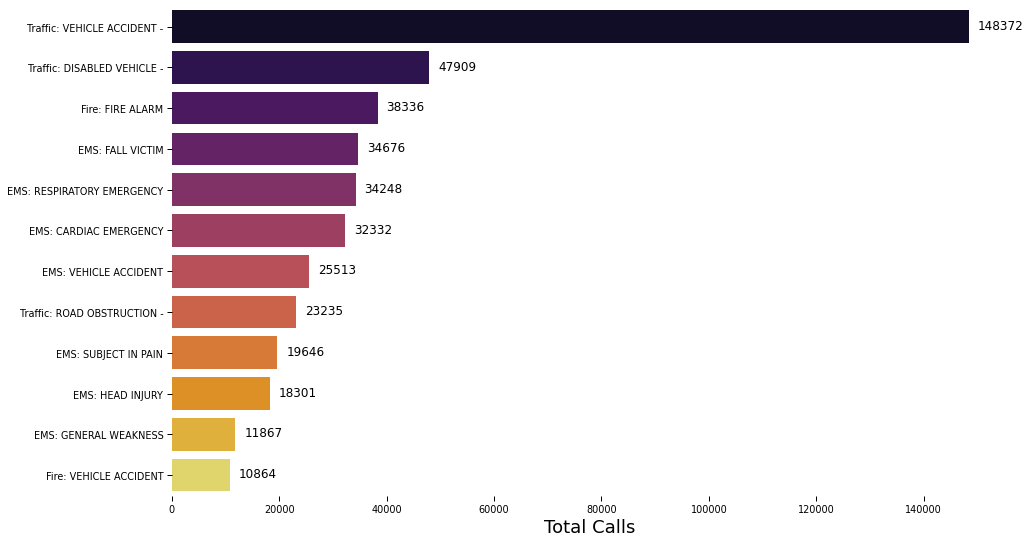

In [14]:
#Top reasons for 911 emergency calls

fig,ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(y='title',data=df,order=df['title'].value_counts().head(12).index,palette='inferno')
#labels
ax.set_ylabel('')
ax.set_xlabel('Total Calls',fontsize=18)
#despine
sns.despine(right=True, left=True, bottom=True)   
#annotations    
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()),
                xytext=(9,-15),fontsize=9,color='#000000',textcoords='offset points', ha='left',va='center',size=12)


In [15]:
#now trying to visualize the data of each reason comparing it to the time that this call occured 
#we need first to know  the data type of the objects in the timeStamp column?

type(df['timeStamp'].iloc[0])

str

In [16]:
#Use pd.to_datetime to convert the column from strings to DateTime objects

df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [17]:
#Use .apply() to create 3 new columns called Hour, Month, and Day of Week.
#we will create these columns based off of the timeStamp column
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day']=df['timeStamp'].apply(lambda time: time.dayofweek)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)


In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,3,2015


In [19]:
df['Year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: Year, dtype: int64

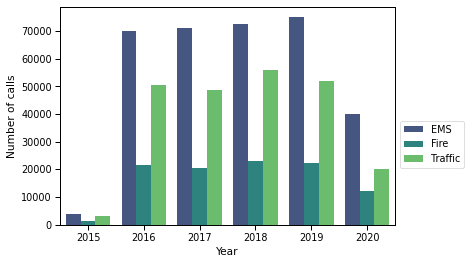

In [20]:
# so we will view the number of calles happend regarding the years 
sns.countplot(x='Year',data=df,hue='Reason',palette='viridis')
plt.ylabel('Number of calls')
plt.legend(loc=0,bbox_to_anchor=(1.,0.5))

In [21]:
from plotly import __version__
import cufflinks as cf


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()


df.groupby("Year").count()
by_year = df.groupby("Year").count()
df_year = by_year.reset_index()

df_year.iplot( x= "Year", y= "lat", title =" Calls", colors="purple", xTitle="Years", 
             yTitle = "Counts")

In [22]:
y15 = df[df["Year"] == 2015].groupby("Hour").count()

df_y15 = y15.reset_index()

df_y15.iplot( x="Hour", y ="lat" , title = "Total number of calls hourly in: 2015", 
            colors = "lightgreen")

In [23]:
y18 = df[df["Year"] == 2018].groupby("Hour").count()

df_y18 = y18.reset_index()

df_y18.iplot( x="Hour", y ="lat", title = "Total number of calls hourly in : 2018" )

In [24]:
# we will view the number of calles happend regarding the days  of the week
#Use the .map() with this dictionary to map the actual string names to the day of the week:

#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day']=df['Day'].map(dmap)


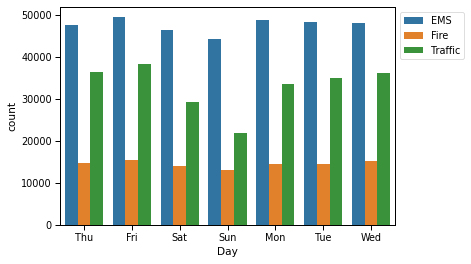

In [25]:
#we create a countplot of the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='Day',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,1),loc=2)

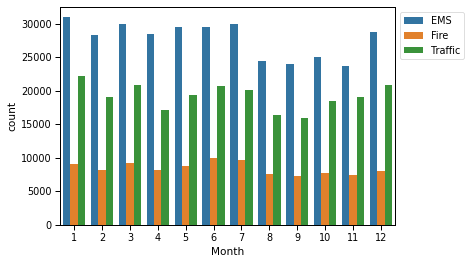

In [26]:
#same for month
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,1),loc=2)



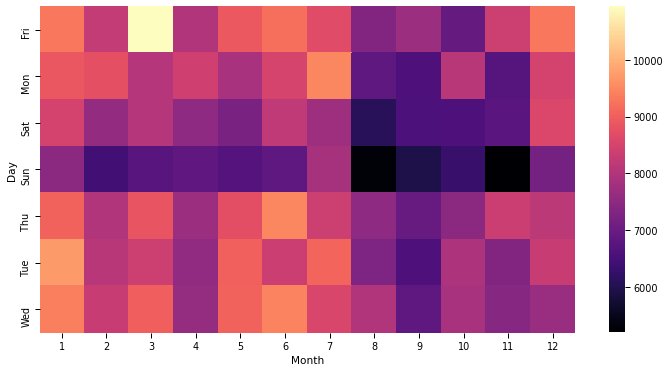

In [27]:
#we create a new dataframe to view the heatmap of the monthly calls.
#trying to combine groupby with an unstack method.

dayMonth = df.groupby(by=['Day','Month']).count()['Reason'].unstack()
dayMonth.head()


plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='magma')

In [28]:
by_month= df.groupby("Month").count()
# Changing index from months to default index(0:)
df_month= by_month.reset_index()
df_month.iplot(x="Month", y = "lat", colors= "pink", title="Monthly calls in all years", xTitle="Month",
               yTitle = "Counts")

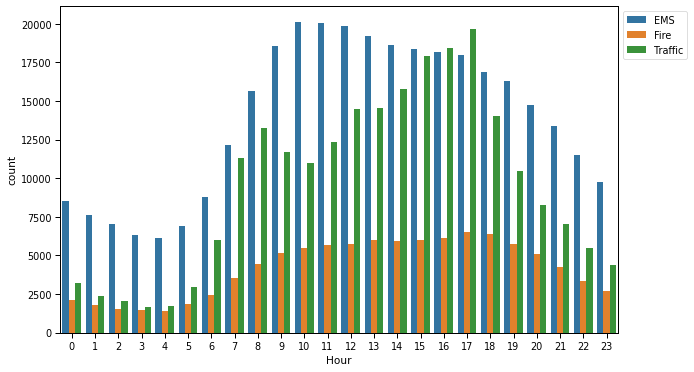

In [29]:
#now we will do the same for hours
plt.figure(figsize=(10,6))
sns.countplot(x='Hour',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [30]:
#We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day 

dayHour = df.groupby(by=['Day','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


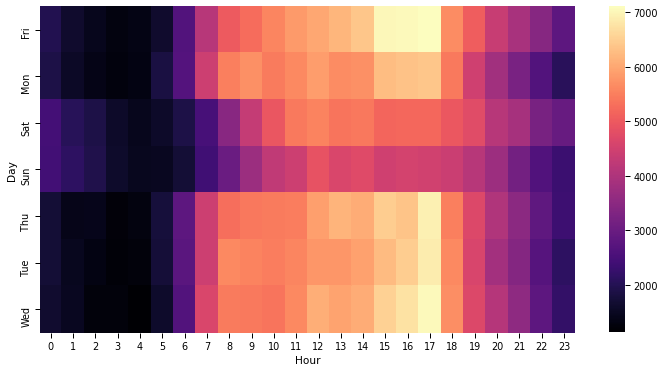

In [31]:


plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='magma')

In [32]:
# We will try to be more specified about days 
#so we will display the number of calls for all Fire, Traffic, and EMS calls from 12/10/2015 to 11/16/2018 for each day.
df["date"] = df["timeStamp"].apply(lambda x: x.date())
df.groupby("Year").count()

ems_gr = df[df["Reason"]== "EMS"].groupby("date").count()

df_ems = ems_gr.reset_index()
df_ems.head()


,date,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day,Year
0,2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58,58
1,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2,2015-12-12,188,188,188,170,188,188,188,188,188,188,188,188,188
3,2015-12-13,191,191,191,179,191,191,191,191,191,191,191,191,191
4,2015-12-14,221,221,221,200,221,221,221,221,221,221,221,221,221


In [33]:

df_ems.iplot(x= "date", y= "lat", colors= "orange", title="EMS Calls", xTitle="Days", 
            yTitle = "Counts")



In [34]:
#the same for Traffic calls
tra_gr = df[df["Reason"]== "Traffic"].groupby("date").count()

df_tra= tra_gr.reset_index()
df_tra.head()


,date,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day,Year
0,2015-12-10,41,41,41,34,41,41,41,41,41,41,41,41,41
1,2015-12-11,137,137,137,107,137,137,137,137,137,137,137,137,137
2,2015-12-12,145,145,145,110,145,145,145,145,145,145,145,145,145
3,2015-12-13,75,75,75,53,75,75,75,75,75,75,75,75,75
4,2015-12-14,184,184,184,150,184,184,184,184,184,184,184,184,184


In [35]:

df_tra.iplot(x= "date", y= "lat", colors= "pink", title="Traffic Calls", xTitle="Days", 
            yTitle = "Counts")



In [36]:
#the same for fire calls
fire_gr = df[df["Reason"]== "Fire"].groupby("date").count()

df_fire= fire_gr.reset_index()

df_fire.iplot(x= "date", y= "lat", colors= "purple", title="Fire Calls", xTitle="Days", 
            yTitle = "Counts")

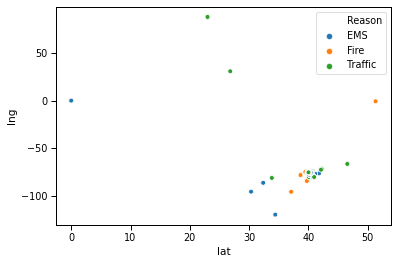

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='lat', y='lng', hue='Reason', data=df)


Text(0, 0.5, 'longitude')

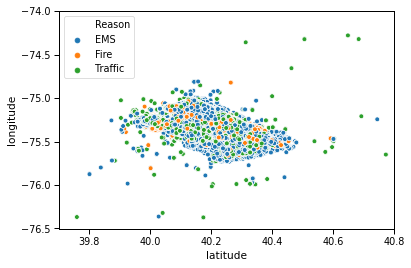

In [40]:
#We can notice that there is a concentration of points around (40,-75). 
#So we can do an scatter plot around this crowded area in otder so see it in detail.

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='lat', y='lng', hue='Reason', data=df)

plt.ylim([-76.5,-74])
plt.xlim([39.7,40.8])
plt.xlabel('latitude')
plt.ylabel('longitude')




Text(0, 0.5, 'longitude')

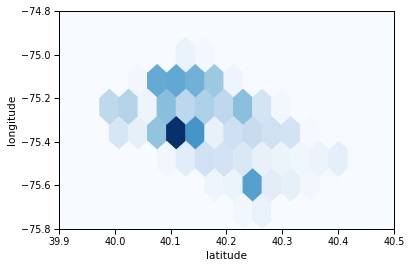

In [41]:
#Make a 2D hexagonal binning plot of points x, y.
plt.hexbin(df['lat'],df['lng'],gridsize=1500,cmap='Blues')
plt.xlim([39.9,40.5])
plt.ylim([-75.8,-74.8])
plt.xlabel('latitude')
plt.ylabel('longitude')

In [46]:

FireRows = (df.loc[ (df['Reason'] == 'Fire') ].groupby(by='date').count()['lat'] )
FireRows[lambda FireRows: FireRows >= 250]


date
2018-03-02    568
2018-03-03    250
2020-06-03    470
Name: lat, dtype: int64

In [47]:
import datetime

Top_Fire_Dates = df.loc[ (df['date'].isin(FireRows[lambda FireRows: FireRows >= 250].index)) & (df['Reason'] == 'Fire'), ['lat','lng','date']]
Top_Fire_Dates['Count'] = Top_Fire_Dates['date'].map(FireRows[lambda FireRows: FireRows >= 250])

In [48]:
Top_Fire_Dates.loc[Top_Fire_Dates['date'] == datetime.date(2020, 6, 3)]

,lat,lng,date,Count
642302,40.118786,-75.346610,2020-06-03,470
642310,40.071011,-75.152726,2020-06-03,470
642312,40.116001,-75.142301,2020-06-03,470
642321,40.085816,-75.093649,2020-06-03,470
642323,40.075623,-75.247869,2020-06-03,470
...,...,...,...,...
643692,40.137593,-75.432606,2020-06-03,470
643693,40.132428,-75.380866,2020-06-03,470
643697,40.114110,-75.181448,2020-06-03,470
643700,40.138027,-75.464795,2020-06-03,470


In [50]:
#import geopy

import folium
from branca.element import Figure
from geopy.geocoders import Nominatim


address = 'Philadelphia'
geolocator = Nominatim(user_agent="911_EDA",timeout=30)
location = geolocator.geocode(address,timeout=30)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Philadelphia are {}, {}.'.format(latitude, longitude))

fig=Figure(width=1000,height=500)

# create map of Philadelphia using latitude and longitude values
map_us = folium.Map(location=[latitude, longitude], zoom_start=9, min_zoom=5, max_zoom=14)
fig.add_child(map_us)


date1= datetime.date(2020, 6, 3)

# add markers to map
for lat, lng, Count in zip(Top_Fire_Dates.loc[Top_Fire_Dates['date'] == date1,'lat'], Top_Fire_Dates.loc[Top_Fire_Dates['date'] == date1,'lng'], Top_Fire_Dates.loc[Top_Fire_Dates['date'] == date1,'Count']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        tooltip=str(Count)+' Fire Calls'+' lat : '+str(lat)+' lng :'+str(lng),
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_us)  
fig

In [51]:
EmsRows = (df.loc[ (df['Reason'] == 'EMS') ].groupby(by='date').count()['lat'] )
EmsRows[lambda EmsRows: EmsRows >= 250]

Top_EMS_Dates = df.loc[ (df['date'].isin(EmsRows[lambda EmsRows: EmsRows >= 250].index)) & (df['Reason'] == 'EMS'), ['lat','lng','date']]
Top_EMS_Dates['Count'] = Top_EMS_Dates['date'].map(EmsRows[lambda EmsRows: EmsRows >= 250])


In [52]:
Top_EMS_Dates.loc[Top_EMS_Dates['date'] == datetime.date(2020, 6, 3)]

,lat,lng,date,Count
642303,40.155283,-75.264230,2020-06-03,272
642304,40.153305,-75.201460,2020-06-03,272
642305,40.122264,-75.348805,2020-06-03,272
642306,40.247617,-75.641584,2020-06-03,272
642307,40.210294,-75.667709,2020-06-03,272
...,...,...,...,...
643694,40.132428,-75.380866,2020-06-03,272
643696,40.160545,-75.472580,2020-06-03,272
643698,40.245791,-75.626121,2020-06-03,272
643699,40.133037,-75.408463,2020-06-03,272


In [53]:

address = 'Philadelphia'
geolocator = Nominatim(user_agent="911_EDA",timeout=30)
location = geolocator.geocode(address,timeout=30)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Philadelphia are {}, {}.'.format(latitude, longitude))

fig=Figure(width=1000,height=500)

# create map of Philadelphia using latitude and longitude values
map_us = folium.Map(location=[latitude, longitude], zoom_start=9, min_zoom=5, max_zoom=14)
fig.add_child(map_us)


date1= datetime.date(2020, 6, 3)

# add markers to map
for lat, lng, Count in zip(Top_EMS_Dates.loc[Top_EMS_Dates['date'] == date1,'lat'], Top_EMS_Dates.loc[Top_EMS_Dates['date'] == date1,'lng'], Top_EMS_Dates.loc[Top_EMS_Dates['date'] == date1,'Count']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        tooltip=str(Count)+' EMS Calls',
        color='red',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_us)  
fig